In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
!pip install SimpleITK
!pip install pyradiomics 
import os
from sklearn.tree import DecisionTreeRegressor

from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression,Ridge
import six

import pandas as pd
import glob
import nibabel as nib
import numpy as np
from glob import glob
# from keras.utils import multi_gpu_model
from keras import optimizers
import matplotlib.pyplot as plt
import collections as clt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
#import radiomics

#Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from radiomics import featureextractor, getTestCase, getFeatureClasses
from radiomics import firstorder, glcm, imageoperations, shape, glrlm, glszm, getTestCase,gldm,ngtdm
import scipy.stats 

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error 
from __future__ import print_function
import numpy
import SimpleITK as sitk
import six
from radiomics import featureextractor, getTestCase, getFeatureClasses
from radiomics import firstorder, glcm, imageoperations, shape, glrlm, glszm, getTestCase,gldm,ngtdm

# **Setting**

In [41]:
applyLog = True
applyWavelet = True

# Setting for the feature calculation.
# Currently, resampling is disabled.
# Can be enabled by setting 'resampledPixelSpacing' to a list of 3 floats (new voxel size in mm for x, y and z)
settings = {'binWidth': 25,
            'interpolator': sitk.sitkBSpline,
            'resampledPixelSpacing': None}

In [42]:
grading_csv=pd.read_csv('/content/drive/MyDrive/MICCAI_BraTS_2019_Data_Training/grading.csv')
path_HGG_2019 = glob('/content/drive/MyDrive/MICCAI_BraTS_2019_Data_Training/Grading/**')

grading_csv

,id,label
0,BraTS19_2013_18_1,0
1,BraTS19_2013_20_1,0
2,BraTS19_2013_14_1,0
3,BraTS19_2013_23_1,0
4,BraTS19_2013_22_1,0
...,...,...
330,BraTS19_TCIA10_330_1,1
331,BraTS19_TCIA10_420_1,1
332,BraTS19_TCIA13_654_1,1
333,BraTS19_TCIA13_653_1,1


# **DataFrame**

In [43]:
mask=sitk.ReadImage('/content/drive/MyDrive/MICCAI_BraTS_2019_Data_Training/Grading/BraTS19_2013_0_1/BraTS19_2013_0_1_seg.nii.gz');
mask_arr = sitk.GetArrayFromImage(mask)
swaped_mask=np.swapaxes(mask_arr,1,2)
mask = sitk.GetImageFromArray(swaped_mask)

image=sitk.ReadImage('/content/drive/MyDrive/MICCAI_BraTS_2019_Data_Training/Grading/BraTS19_2013_0_1/BraTS19_2013_0_1_t1ce.nii.gz');
image_arr = sitk.GetArrayFromImage(image)
swaped_image=np.swapaxes(image_arr,1,2)
image = sitk.GetImageFromArray(swaped_image)

In [44]:
df =  pd.DataFrame(grading_csv)
mod='t1ce_'
# Show Shape features
shapeFeatures = shape.RadiomicsShape(image, mask, **settings)
shapeFeatures.enableAllFeatures()
print('Calculating Shape features...')
results = shapeFeatures.execute()
for (key, val) in six.iteritems(results):
  key=mod+key
  print(key)

  # print(key, ':', val)
  df[key]="" 
  
firstOrderFeatures = firstorder.RadiomicsFirstOrder(image, mask, **settings)
firstOrderFeatures.enableAllFeatures()
print('Calculating first order features...')
results = firstOrderFeatures.execute()
for (key, val) in six.iteritems(results):
  key=mod+key

  # print( key, ':', val)
  print(key)
  df[key]=""  
    

# Show GLCM features
glcmFeatures = glcm.RadiomicsGLCM(image, mask, **settings)
glcmFeatures.enableAllFeatures()
print('Calculating GLCM features...')
results = glcmFeatures.execute()
for (key, val) in six.iteritems(results):
  key=mod+key
  # print( key, ':', val)

  print(key)
  df[key]="" 

# Show GLRLM features
glrlmFeatures = glrlm.RadiomicsGLRLM(image, mask, **settings)
glrlmFeatures.enableAllFeatures()
print('Calculating GLRLM features...')
results = glrlmFeatures.execute()
for (key, val) in six.iteritems(results):
  key=mod+key
  # print( key, ':', val)

  print(key)
  df[key]="" 


# Show GLSZM features
glszmFeatures = glszm.RadiomicsGLSZM(image, mask, **settings)
glszmFeatures.enableAllFeatures()
print('Calculating GLSZM features...')
results = glszmFeatures.execute()
for (key, val) in six.iteritems(results):
  key=mod+key
  # print( key, ':', val)
 
  print(key)
  df[key]="" 

# Show GLDM features
gldmFeatures = gldm.RadiomicsGLDM(image, mask, **settings)
gldmFeatures.enableAllFeatures()
print('Calculating GLDM features...')
results = gldmFeatures.execute()
for (key, val) in six.iteritems(results):
 
    key=mod+key
    # print( key, ':', val)
    print(key)
    df[key]="" 

# Show NGTDM features
ngtdmFeatures = ngtdm.RadiomicsNGTDM(image, mask, **settings)
ngtdmFeatures.enableAllFeatures()
results = ngtdmFeatures.execute()
print('Calculated NGTDM features ')
for (key, val) in six.iteritems(results):
    key=mod+key
    
    # print( key, ':', val)
    print(key)
    df[key]=""  
    

Calculating Shape features...
t1ce_Elongation
t1ce_Flatness
t1ce_LeastAxisLength
t1ce_MajorAxisLength
t1ce_Maximum2DDiameterColumn
t1ce_Maximum2DDiameterRow
t1ce_Maximum2DDiameterSlice
t1ce_Maximum3DDiameter
t1ce_MeshVolume
t1ce_MinorAxisLength
t1ce_Sphericity
t1ce_SurfaceArea
t1ce_SurfaceVolumeRatio
t1ce_VoxelVolume
Calculating first order features...
t1ce_10Percentile
t1ce_90Percentile
t1ce_Energy
t1ce_Entropy
t1ce_InterquartileRange
t1ce_Kurtosis
t1ce_Maximum
t1ce_MeanAbsoluteDeviation
t1ce_Mean
t1ce_Median
t1ce_Minimum
t1ce_Range
t1ce_RobustMeanAbsoluteDeviation
t1ce_RootMeanSquared
t1ce_Skewness
t1ce_TotalEnergy
t1ce_Uniformity
t1ce_Variance
Calculating GLCM features...


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


t1ce_Autocorrelation
t1ce_ClusterProminence
t1ce_ClusterShade
t1ce_ClusterTendency
t1ce_Contrast
t1ce_Correlation
t1ce_DifferenceAverage
t1ce_DifferenceEntropy
t1ce_DifferenceVariance
t1ce_Id
t1ce_Idm
t1ce_Idmn
t1ce_Idn
t1ce_Imc1
t1ce_Imc2
t1ce_InverseVariance
t1ce_JointAverage
t1ce_JointEnergy
t1ce_JointEntropy
t1ce_MCC
t1ce_MaximumProbability
t1ce_SumAverage
t1ce_SumEntropy
t1ce_SumSquares
Calculating GLRLM features...
t1ce_GrayLevelNonUniformity
t1ce_GrayLevelNonUniformityNormalized
t1ce_GrayLevelVariance
t1ce_HighGrayLevelRunEmphasis
t1ce_LongRunEmphasis
t1ce_LongRunHighGrayLevelEmphasis
t1ce_LongRunLowGrayLevelEmphasis
t1ce_LowGrayLevelRunEmphasis
t1ce_RunEntropy
t1ce_RunLengthNonUniformity
t1ce_RunLengthNonUniformityNormalized
t1ce_RunPercentage
t1ce_RunVariance
t1ce_ShortRunEmphasis
t1ce_ShortRunHighGrayLevelEmphasis
t1ce_ShortRunLowGrayLevelEmphasis
Calculating GLSZM features...
t1ce_GrayLevelNonUniformity
t1ce_GrayLevelNonUniformityNormalized
t1ce_GrayLevelVariance
t1ce_HighGr

In [45]:
df

,id,label,t1ce_Elongation,t1ce_Flatness,t1ce_LeastAxisLength,t1ce_MajorAxisLength,t1ce_Maximum2DDiameterColumn,t1ce_Maximum2DDiameterRow,t1ce_Maximum2DDiameterSlice,t1ce_Maximum3DDiameter,t1ce_MeshVolume,t1ce_MinorAxisLength,t1ce_Sphericity,t1ce_SurfaceArea,t1ce_SurfaceVolumeRatio,t1ce_VoxelVolume,t1ce_10Percentile,t1ce_90Percentile,t1ce_Energy,t1ce_Entropy,t1ce_InterquartileRange,t1ce_Kurtosis,t1ce_Maximum,t1ce_MeanAbsoluteDeviation,t1ce_Mean,t1ce_Median,t1ce_Minimum,t1ce_Range,t1ce_RobustMeanAbsoluteDeviation,t1ce_RootMeanSquared,t1ce_Skewness,t1ce_TotalEnergy,t1ce_Uniformity,t1ce_Variance,t1ce_Autocorrelation,t1ce_ClusterProminence,t1ce_ClusterShade,t1ce_ClusterTendency,t1ce_Contrast,t1ce_Correlation,...,t1ce_LongRunHighGrayLevelEmphasis,t1ce_LongRunLowGrayLevelEmphasis,t1ce_LowGrayLevelRunEmphasis,t1ce_RunEntropy,t1ce_RunLengthNonUniformity,t1ce_RunLengthNonUniformityNormalized,t1ce_RunPercentage,t1ce_RunVariance,t1ce_ShortRunEmphasis,t1ce_ShortRunHighGrayLevelEmphasis,t1ce_ShortRunLowGrayLevelEmphasis,t1ce_HighGrayLevelZoneEmphasis,t1ce_LargeAreaEmphasis,t1ce_LargeAreaHighGrayLevelEmphasis,t1ce_LargeAreaLowGrayLevelEmphasis,t1ce_LowGrayLevelZoneEmphasis,t1ce_SizeZoneNonUniformity,t1ce_SizeZoneNonUniformityNormalized,t1ce_SmallAreaEmphasis,t1ce_SmallAreaHighGrayLevelEmphasis,t1ce_SmallAreaLowGrayLevelEmphasis,t1ce_ZoneEntropy,t1ce_ZonePercentage,t1ce_ZoneVariance,t1ce_DependenceEntropy,t1ce_DependenceNonUniformity,t1ce_DependenceNonUniformityNormalized,t1ce_DependenceVariance,t1ce_HighGrayLevelEmphasis,t1ce_LargeDependenceEmphasis,t1ce_LargeDependenceHighGrayLevelEmphasis,t1ce_LargeDependenceLowGrayLevelEmphasis,t1ce_LowGrayLevelEmphasis,t1ce_SmallDependenceEmphasis,t1ce_SmallDependenceHighGrayLevelEmphasis,t1ce_SmallDependenceLowGrayLevelEmphasis,t1ce_Busyness,t1ce_Coarseness,t1ce_Complexity,t1ce_Strength
0,BraTS19_2013_18_1,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,BraTS19_2013_20_1,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,BraTS19_2013_14_1,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,BraTS19_2013_23_1,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,BraTS19_2013_22_1,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,BraTS19_TCIA10_330_1,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
331,BraTS19_TCIA10_420_1,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
332,BraTS19_TCIA13_654_1,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
333,BraTS19_TCIA13_653_1,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


# **Radiomic Feature Extraction**

@@@@@@@@@@@@@@@@@@@patient 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 0   t1ce_Elongation : 0.745087404095685
i= 0   t1ce_Flatness : 0.67757614924824
i= 0   t1ce_LeastAxisLength : 28.73961090588655
i= 0   t1ce_MajorAxisLength : 42.41532252540574
i= 0   t1ce_Maximum2DDiameterColumn : 41.773197148410844
i= 0   t1ce_Maximum2DDiameterRow : 48.16637831516918
i= 0   t1ce_Maximum2DDiameterSlice : 50.08991914547278
i= 0   t1ce_Maximum3DDiameter : 50.28916384272063
i= 0   t1ce_MeshVolume : 3674.7083333333335
i= 0   t1ce_MinorAxisLength : 31.603122554335794
i= 0   t1ce_Sphericity : 0.16320700758473894
i= 0   t1ce_SurfaceArea : 7056.032491326253
i= 0   t1ce_SurfaceVolumeRatio : 1.9201612349260153
i= 0   t1ce_VoxelVolume : 4414.0
i= 0    t1ce_10Percentile : 260.0
i= 0    t1ce_90Percentile : 475.0
i= 0    t1ce_Energy : 580750735.0
i= 0    t1ce_Entropy : 3.746690230193584
i= 0    t1ce_InterquartileRange : 114.0
i= 0    t1ce_Kurtosis : 3.4356258326014686
i= 0    t1ce_Maximum : 711.0
i= 0    t1ce_MeanAbsoluteDeviation : 69.43665211136704

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to b

Calculated NGTDM features 
   t1ce_Busyness : 1.3004133197312877
   t1ce_Coarseness : 0.0020383280703309805
   t1ce_Complexity : 470.75397407769196
   t1ce_Contrast : 0.060873013573232666
   t1ce_Strength : 0.5261580639785788
@@@@@@@@@@@@@@@@@@@patient 1


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 1   t1ce_Elongation : 0.7108408580967399
i= 1   t1ce_Flatness : 0.46024781715842555
i= 1   t1ce_LeastAxisLength : 38.219208623903334
i= 1   t1ce_MajorAxisLength : 83.0404994854057
i= 1   t1ce_Maximum2DDiameterColumn : 80.15609770940699
i= 1   t1ce_Maximum2DDiameterRow : 63.702433234531945
i= 1   t1ce_Maximum2DDiameterSlice : 80.09993757800315
i= 1   t1ce_Maximum3DDiameter : 86.3075894692929
i= 1   t1ce_MeshVolume : 63556.625
i= 1   t1ce_MinorAxisLength : 59.02857991098768
i= 1   t1ce_Sphericity : 0.2059318983152366
i= 1   t1ce_SurfaceArea : 37399.66565009987
i= 1   t1ce_SurfaceVolumeRatio : 0.5884463759694583
i= 1   t1ce_VoxelVolume : 64066.0
i= 1    t1ce_10Percentile : 183.0
i= 1    t1ce_90Percentile : 387.0
i= 1    t1ce_Energy : 5769507863.0
i= 1    t1ce_Entropy : 3.560504529068294
i= 1    t1ce_InterquartileRange : 136.0
i= 1    t1ce_Kurtosis : 1.9331453976759787
i= 1    t1ce_Maximum : 537.0
i= 1    t1ce_MeanAbsoluteDeviation : 67.32998881325058
i= 1 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 2   t1ce_Elongation : 0.8806613902998156
i= 2   t1ce_Flatness : 0.5231844810518769
i= 2   t1ce_LeastAxisLength : 26.64441876923974
i= 2   t1ce_MajorAxisLength : 50.92738744022069
i= 2   t1ce_Maximum2DDiameterColumn : 59.30430001273095
i= 2   t1ce_Maximum2DDiameterRow : 53.665631459994955
i= 2   t1ce_Maximum2DDiameterSlice : 59.135437767890075
i= 2   t1ce_Maximum3DDiameter : 59.824744044584094
i= 2   t1ce_MeshVolume : 20071.083333333332
i= 2   t1ce_MinorAxisLength : 44.849783827442124
i= 2   t1ce_Sphericity : 0.19533204110939442
i= 2   t1ce_SurfaceArea : 18284.840613028784
i= 2   t1ce_SurfaceVolumeRatio : 0.9110041699972408
i= 2   t1ce_VoxelVolume : 21122.0
i= 2    t1ce_10Percentile : 317.0
i= 2    t1ce_90Percentile : 510.0
i= 2    t1ce_Energy : 3759395833.0
i= 2    t1ce_Entropy : 3.688070892750268
i= 2    t1ce_InterquartileRange : 102.0
i= 2    t1ce_Kurtosis : 12.885110933918078
i= 2    t1ce_Maximum : 1227.0
i= 2    t1ce_MeanAbsoluteDeviation : 64.29595

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 3   t1ce_Elongation : 0.9282155540096658
i= 3   t1ce_Flatness : 0.7553211032919649
i= 3   t1ce_LeastAxisLength : 39.95954816479032
i= 3   t1ce_MajorAxisLength : 52.90405364107004
i= 3   t1ce_Maximum2DDiameterColumn : 70.49113419430843
i= 3   t1ce_Maximum2DDiameterRow : 68.24221567329127
i= 3   t1ce_Maximum2DDiameterSlice : 69.46221994724903
i= 3   t1ce_Maximum3DDiameter : 72.72551134230683
i= 3   t1ce_MeshVolume : 49168.541666666664
i= 3   t1ce_MinorAxisLength : 49.10636545980291
i= 3   t1ce_Sphericity : 0.23829487954275935
i= 3   t1ce_SurfaceArea : 27237.10629490958
i= 3   t1ce_SurfaceVolumeRatio : 0.5539539179250198
i= 3   t1ce_VoxelVolume : 51737.0
i= 3    t1ce_10Percentile : 121.0
i= 3    t1ce_90Percentile : 240.0
i= 3    t1ce_Energy : 1742646882.0
i= 3    t1ce_Entropy : 2.9214103713484594
i= 3    t1ce_InterquartileRange : 60.0
i= 3    t1ce_Kurtosis : 10.210265665286144
i= 3    t1ce_Maximum : 825.0
i= 3    t1ce_MeanAbsoluteDeviation : 38.63301798846

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 4   t1ce_Elongation : 0.7123975767522575
i= 4   t1ce_Flatness : 0.4817659966891373
i= 4   t1ce_LeastAxisLength : 40.17378046697702
i= 4   t1ce_MajorAxisLength : 83.38857607856335
i= 4   t1ce_Maximum2DDiameterColumn : 87.13208364316786
i= 4   t1ce_Maximum2DDiameterRow : 77.46612162745726
i= 4   t1ce_Maximum2DDiameterSlice : 92.39588735436226
i= 4   t1ce_Maximum3DDiameter : 92.53107586103168
i= 4   t1ce_MeshVolume : 46640.041666666664
i= 4   t1ce_MinorAxisLength : 59.40581952718979
i= 4   t1ce_Sphericity : 0.1346503885525312
i= 4   t1ce_SurfaceArea : 46535.29449722576
i= 4   t1ce_SurfaceVolumeRatio : 0.9977541364523316
i= 4   t1ce_VoxelVolume : 48805.0
i= 4    t1ce_10Percentile : 33.0
i= 4    t1ce_90Percentile : 61.0
i= 4    t1ce_Energy : 124260368.0
i= 4    t1ce_Entropy : 1.0925813940003855
i= 4    t1ce_InterquartileRange : 14.0
i= 4    t1ce_Kurtosis : 3.7946202819672132
i= 4    t1ce_Maximum : 132.0
i= 4    t1ce_MeanAbsoluteDeviation : 8.486300224793737


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 5   t1ce_Elongation : 0.6007327533597261
i= 5   t1ce_Flatness : 0.4388029533704496
i= 5   t1ce_LeastAxisLength : 24.148527338054446
i= 5   t1ce_MajorAxisLength : 55.03273656790452
i= 5   t1ce_Maximum2DDiameterColumn : 55.80322571321482
i= 5   t1ce_Maximum2DDiameterRow : 58.872744118140105
i= 5   t1ce_Maximum2DDiameterSlice : 53.823786563191554
i= 5   t1ce_Maximum3DDiameter : 73.45066371381542
i= 5   t1ce_MeshVolume : 26202.791666666668
i= 5   t1ce_MinorAxisLength : 33.059967363357764
i= 5   t1ce_Sphericity : 0.366576888416817
i= 5   t1ce_SurfaceArea : 11638.153649681484
i= 5   t1ce_SurfaceVolumeRatio : 0.44415701188384127
i= 5   t1ce_VoxelVolume : 26912.0
i= 5    t1ce_10Percentile : 157.0
i= 5    t1ce_90Percentile : 483.0
i= 5    t1ce_Energy : 2313930971.0
i= 5    t1ce_Entropy : 3.7227403623783477
i= 5    t1ce_InterquartileRange : 161.0
i= 5    t1ce_Kurtosis : 3.561147086095097
i= 5    t1ce_Maximum : 1088.0
i= 5    t1ce_MeanAbsoluteDeviation : 104.14935

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 6   t1ce_Elongation : 0.8787767026706519
i= 6   t1ce_Flatness : 0.5332675275084225
i= 6   t1ce_LeastAxisLength : 35.22415445464393
i= 6   t1ce_MajorAxisLength : 66.05343966699265
i= 6   t1ce_Maximum2DDiameterColumn : 68.8839603971781
i= 6   t1ce_Maximum2DDiameterRow : 65.79513659838392
i= 6   t1ce_Maximum2DDiameterSlice : 65.25335240430181
i= 6   t1ce_Maximum3DDiameter : 70.80254232723568
i= 6   t1ce_MeshVolume : 33121.208333333336
i= 6   t1ce_MinorAxisLength : 58.04622391061464
i= 6   t1ce_Sphericity : 0.21031791584963572
i= 6   t1ce_SurfaceArea : 23714.390659850305
i= 6   t1ce_SurfaceVolumeRatio : 0.715988088996863
i= 6   t1ce_VoxelVolume : 34343.0
i= 6    t1ce_10Percentile : 258.0
i= 6    t1ce_90Percentile : 417.0
i= 6    t1ce_Energy : 3997154921.0
i= 6    t1ce_Entropy : 3.4664162628319115
i= 6    t1ce_InterquartileRange : 83.0
i= 6    t1ce_Kurtosis : 7.544177658094189
i= 6    t1ce_Maximum : 1042.0
i= 6    t1ce_MeanAbsoluteDeviation : 53.071963481255

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 7   t1ce_Elongation : 0.7395449278836966
i= 7   t1ce_Flatness : 0.6870779497544667
i= 7   t1ce_LeastAxisLength : 30.967202302324864
i= 7   t1ce_MajorAxisLength : 45.07087196349594
i= 7   t1ce_Maximum2DDiameterColumn : 57.706152185014034
i= 7   t1ce_Maximum2DDiameterRow : 57.42821606144492
i= 7   t1ce_Maximum2DDiameterSlice : 47.853944456021594
i= 7   t1ce_Maximum3DDiameter : 58.29236656715869
i= 7   t1ce_MeshVolume : 26689.541666666668
i= 7   t1ce_MinorAxisLength : 33.33193475589893
i= 7   t1ce_Sphericity : 0.39481205761437627
i= 7   t1ce_SurfaceArea : 10939.256208813282
i= 7   t1ce_SurfaceVolumeRatio : 0.40987051577868167
i= 7   t1ce_VoxelVolume : 27189.0
i= 7    t1ce_10Percentile : 329.0
i= 7    t1ce_90Percentile : 583.0
i= 7    t1ce_Energy : 5361525824.0
i= 7    t1ce_Entropy : 3.8542345908578257
i= 7    t1ce_InterquartileRange : 123.0
i= 7    t1ce_Kurtosis : 4.3929054827583816
i= 7    t1ce_Maximum : 1064.0
i= 7    t1ce_MeanAbsoluteDeviation : 80.2970

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 8   t1ce_Elongation : 0.7705221899156938
i= 8   t1ce_Flatness : 0.44562043213401586
i= 8   t1ce_LeastAxisLength : 8.942992981667205
i= 8   t1ce_MajorAxisLength : 20.068633161276793
i= 8   t1ce_Maximum2DDiameterColumn : 21.840329667841555
i= 8   t1ce_Maximum2DDiameterRow : 25.553864678361276
i= 8   t1ce_Maximum2DDiameterSlice : 20.0
i= 8   t1ce_Maximum3DDiameter : 27.910571473905726
i= 8   t1ce_MeshVolume : 337.2916666666667
i= 8   t1ce_MinorAxisLength : 15.463327172041707
i= 8   t1ce_Sphericity : 0.3292076033574834
i= 8   t1ce_SurfaceArea : 711.7891139413747
i= 8   t1ce_SurfaceVolumeRatio : 2.110307440962692
i= 8   t1ce_VoxelVolume : 413.0
i= 8    t1ce_10Percentile : 411.0
i= 8    t1ce_90Percentile : 606.0
i= 8    t1ce_Energy : 114374459.0
i= 8    t1ce_Entropy : 3.519128507497631
i= 8    t1ce_InterquartileRange : 94.0
i= 8    t1ce_Kurtosis : 2.6890426472568603
i= 8    t1ce_Maximum : 701.0
i= 8    t1ce_MeanAbsoluteDeviation : 60.32376340366655
i= 8    t1

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 9   t1ce_Elongation : 0.8022087112816958
i= 9   t1ce_Flatness : 0.7192771283786542
i= 9   t1ce_LeastAxisLength : 39.91914467027409
i= 9   t1ce_MajorAxisLength : 55.49897681336974
i= 9   t1ce_Maximum2DDiameterColumn : 62.42595614005443
i= 9   t1ce_Maximum2DDiameterRow : 68.01470429252781
i= 9   t1ce_Maximum2DDiameterSlice : 58.69412236331676
i= 9   t1ce_Maximum3DDiameter : 70.22107945624305
i= 9   t1ce_MeshVolume : 57026.0
i= 9   t1ce_MinorAxisLength : 44.521762666906056
i= 9   t1ce_Sphericity : 0.3639201287750594
i= 9   t1ce_SurfaceArea : 19687.624619191825
i= 9   t1ce_SurfaceVolumeRatio : 0.3452394455019083
i= 9   t1ce_VoxelVolume : 57655.0
i= 9    t1ce_10Percentile : 370.0
i= 9    t1ce_90Percentile : 583.0
i= 9    t1ce_Energy : 14687528434.0
i= 9    t1ce_Entropy : 3.651750678149589
i= 9    t1ce_InterquartileRange : 96.0
i= 9    t1ce_Kurtosis : 4.078008657540009
i= 9    t1ce_Maximum : 1157.0
i= 9    t1ce_MeanAbsoluteDeviation : 63.63165718867236
i= 9  

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 10   t1ce_Elongation : 0.3323803674167276
i= 10   t1ce_Flatness : 0.17979012477577522
i= 10   t1ce_LeastAxisLength : 15.539236626169933
i= 10   t1ce_MajorAxisLength : 86.42986729971766
i= 10   t1ce_Maximum2DDiameterColumn : 66.75327707311455
i= 10   t1ce_Maximum2DDiameterRow : 44.204072210600685
i= 10   t1ce_Maximum2DDiameterSlice : 62.64982043070834
i= 10   t1ce_Maximum3DDiameter : 80.77747210701756
i= 10   t1ce_MeshVolume : 4036.2083333333335
i= 10   t1ce_MinorAxisLength : 28.727591048859164
i= 10   t1ce_Sphericity : 0.23451885618503168
i= 10   t1ce_SurfaceArea : 5227.436191227988
i= 10   t1ce_SurfaceVolumeRatio : 1.2951353744693526
i= 10   t1ce_VoxelVolume : 4514.0
i= 10    t1ce_10Percentile : 207.0
i= 10    t1ce_90Percentile : 448.0
i= 10    t1ce_Energy : 536865779.0
i= 10    t1ce_Entropy : 3.834394060043503
i= 10    t1ce_InterquartileRange : 136.0
i= 10    t1ce_Kurtosis : 2.9065051541336637
i= 10    t1ce_Maximum : 861.0
i= 10    t1ce_MeanAbsoluteDe

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 11   t1ce_Elongation : 0.7128085829987432
i= 11   t1ce_Flatness : 0.6936965021921309
i= 11   t1ce_LeastAxisLength : 39.63260098651376
i= 11   t1ce_MajorAxisLength : 57.13247920563515
i= 11   t1ce_Maximum2DDiameterColumn : 62.03224967708329
i= 11   t1ce_Maximum2DDiameterRow : 64.88451279003334
i= 11   t1ce_Maximum2DDiameterSlice : 64.63745044476924
i= 11   t1ce_Maximum3DDiameter : 73.00684899377592
i= 11   t1ce_MeshVolume : 45223.791666666664
i= 11   t1ce_MinorAxisLength : 40.724521545773946
i= 11   t1ce_Sphericity : 0.2802005698016477
i= 11   t1ce_SurfaceArea : 21907.513680444685
i= 11   t1ce_SurfaceVolumeRatio : 0.4844245224265919
i= 11   t1ce_VoxelVolume : 45839.0
i= 11    t1ce_10Percentile : 27.0
i= 11    t1ce_90Percentile : 41.0
i= 11    t1ce_Energy : 55416870.0
i= 11    t1ce_Entropy : 0.30426196961145097
i= 11    t1ce_InterquartileRange : 8.0
i= 11    t1ce_Kurtosis : 3.260787848214328
i= 11    t1ce_Maximum : 67.0
i= 11    t1ce_MeanAbsoluteDeviation

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 12   t1ce_Elongation : 0.8342650778827111
i= 12   t1ce_Flatness : 0.6063875826070302
i= 12   t1ce_LeastAxisLength : 38.13352137454034
i= 12   t1ce_MajorAxisLength : 62.88638235399485
i= 12   t1ce_Maximum2DDiameterColumn : 63.324560795950255
i= 12   t1ce_Maximum2DDiameterRow : 57.3149195236284
i= 12   t1ce_Maximum2DDiameterSlice : 66.21933252457322
i= 12   t1ce_Maximum3DDiameter : 69.3757882838098
i= 12   t1ce_MeshVolume : 10199.041666666666
i= 12   t1ce_MinorAxisLength : 52.46391267231746
i= 12   t1ce_Sphericity : 0.14226294993386135
i= 12   t1ce_SurfaceArea : 15986.935592039526
i= 12   t1ce_SurfaceVolumeRatio : 1.5674938993816767
i= 12   t1ce_VoxelVolume : 11698.0
i= 12    t1ce_10Percentile : 370.70000000000005
i= 12    t1ce_90Percentile : 813.0
i= 12    t1ce_Energy : 4710282219.0
i= 12    t1ce_Entropy : 4.651977633759028
i= 12    t1ce_InterquartileRange : 188.0
i= 12    t1ce_Kurtosis : 3.008299067460079
i= 12    t1ce_Maximum : 1340.0
i= 12    t1ce_Mea

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 13   t1ce_Elongation : 0.8818377835557635
i= 13   t1ce_Flatness : 0.6928920703461291
i= 13   t1ce_LeastAxisLength : 24.770790061714163
i= 13   t1ce_MajorAxisLength : 35.74985358013998
i= 13   t1ce_Maximum2DDiameterColumn : 43.9089968002003
i= 13   t1ce_Maximum2DDiameterRow : 39.05124837953327
i= 13   t1ce_Maximum2DDiameterSlice : 41.10960958218893
i= 13   t1ce_Maximum3DDiameter : 45.48626166217664
i= 13   t1ce_MeshVolume : 10161.0
i= 13   t1ce_MinorAxisLength : 31.525571643553715
i= 13   t1ce_Sphericity : 0.19911357526098258
i= 13   t1ce_SurfaceArea : 11393.94769588071
i= 13   t1ce_SurfaceVolumeRatio : 1.121341176644101
i= 13   t1ce_VoxelVolume : 10734.0
i= 13    t1ce_10Percentile : 228.0
i= 13    t1ce_90Percentile : 501.0
i= 13    t1ce_Energy : 1654003963.0
i= 13    t1ce_Entropy : 3.996542155514842
i= 13    t1ce_InterquartileRange : 142.0
i= 13    t1ce_Kurtosis : 2.4803619369499854
i= 13    t1ce_Maximum : 743.0
i= 13    t1ce_MeanAbsoluteDeviation : 81.

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 14   t1ce_Elongation : 0.7450435495432197
i= 14   t1ce_Flatness : 0.5981311569307853
i= 14   t1ce_LeastAxisLength : 18.144580357254704
i= 14   t1ce_MajorAxisLength : 30.33545426785778
i= 14   t1ce_Maximum2DDiameterColumn : 40.311288741492746
i= 14   t1ce_Maximum2DDiameterRow : 31.400636936215164
i= 14   t1ce_Maximum2DDiameterSlice : 42.95346318982906
i= 14   t1ce_Maximum3DDiameter : 43.749285708454714
i= 14   t1ce_MeshVolume : 5686.083333333333
i= 14   t1ce_MinorAxisLength : 22.601234524730778
i= 14   t1ce_Sphericity : 0.35210959168436445
i= 14   t1ce_SurfaceArea : 4375.37299833003
i= 14   t1ce_SurfaceVolumeRatio : 0.7694880187000478
i= 14   t1ce_VoxelVolume : 5746.0
i= 14    t1ce_10Percentile : 238.0
i= 14    t1ce_90Percentile : 356.0
i= 14    t1ce_Energy : 516832520.0
i= 14    t1ce_Entropy : 2.972568439826678
i= 14    t1ce_InterquartileRange : 65.0
i= 14    t1ce_Kurtosis : 3.580069104709548
i= 14    t1ce_Maximum : 542.0
i= 14    t1ce_MeanAbsoluteDevia

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 15   t1ce_Elongation : 0.7420912095915037
i= 15   t1ce_Flatness : 0.652476571421174
i= 15   t1ce_LeastAxisLength : 13.038785555103788
i= 15   t1ce_MajorAxisLength : 19.983530637282062
i= 15   t1ce_Maximum2DDiameterColumn : 23.345235059857504
i= 15   t1ce_Maximum2DDiameterRow : 23.430749027719962
i= 15   t1ce_Maximum2DDiameterSlice : 23.259406699226016
i= 15   t1ce_Maximum3DDiameter : 24.596747752497688
i= 15   t1ce_MeshVolume : 405.2083333333333
i= 15   t1ce_MinorAxisLength : 14.829602422529517
i= 15   t1ce_Sphericity : 0.32964857409139575
i= 15   t1ce_SurfaceArea : 803.313690466342
i= 15   t1ce_SurfaceVolumeRatio : 1.9824708042357027
i= 15   t1ce_VoxelVolume : 521.0
i= 15    t1ce_10Percentile : 280.0
i= 15    t1ce_90Percentile : 464.0
i= 15    t1ce_Energy : 76005962.0
i= 15    t1ce_Entropy : 3.563686495327909
i= 15    t1ce_InterquartileRange : 111.0
i= 15    t1ce_Kurtosis : 3.0817559374515873
i= 15    t1ce_Maximum : 662.0
i= 15    t1ce_MeanAbsoluteDevi

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 16   t1ce_Elongation : 0.8540428940483642
i= 16   t1ce_Flatness : 0.791634308312497
i= 16   t1ce_LeastAxisLength : 27.06707641362481
i= 16   t1ce_MajorAxisLength : 34.1913887882435
i= 16   t1ce_Maximum2DDiameterColumn : 44.384682042344295
i= 16   t1ce_Maximum2DDiameterRow : 43.657759905886145
i= 16   t1ce_Maximum2DDiameterSlice : 39.0
i= 16   t1ce_Maximum3DDiameter : 44.82186966202994
i= 16   t1ce_MeshVolume : 7245.125
i= 16   t1ce_MinorAxisLength : 29.200912632244275
i= 16   t1ce_Sphericity : 0.18294869514094228
i= 16   t1ce_SurfaceArea : 9897.345477273097
i= 16   t1ce_SurfaceVolumeRatio : 1.3660696643982122
i= 16   t1ce_VoxelVolume : 8346.0
i= 16    t1ce_10Percentile : 167.0
i= 16    t1ce_90Percentile : 399.0
i= 16    t1ce_Energy : 710462008.0
i= 16    t1ce_Entropy : 3.7602663855857483
i= 16    t1ce_InterquartileRange : 151.0
i= 16    t1ce_Kurtosis : 2.5409071532727157
i= 16    t1ce_Maximum : 676.0
i= 16    t1ce_MeanAbsoluteDeviation : 77.892009379388

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 17   t1ce_Elongation : 0.9169478885364993
i= 17   t1ce_Flatness : 0.8607113085111304
i= 17   t1ce_LeastAxisLength : 37.58639310072734
i= 17   t1ce_MajorAxisLength : 43.668989507927776
i= 17   t1ce_Maximum2DDiameterColumn : 52.55473337388365
i= 17   t1ce_Maximum2DDiameterRow : 53.823786563191554
i= 17   t1ce_Maximum2DDiameterSlice : 51.478150704935004
i= 17   t1ce_Maximum3DDiameter : 53.97221507405454
i= 17   t1ce_MeshVolume : 27694.166666666668
i= 17   t1ce_MinorAxisLength : 40.042187723816916
i= 17   t1ce_Sphericity : 0.23053223180336926
i= 17   t1ce_SurfaceArea : 19201.92065319606
i= 17   t1ce_SurfaceVolumeRatio : 0.6933561455130524
i= 17   t1ce_VoxelVolume : 28051.0
i= 17    t1ce_10Percentile : 523.0
i= 17    t1ce_90Percentile : 782.0
i= 17    t1ce_Energy : 12013341522.0
i= 17    t1ce_Entropy : 4.01461692394088
i= 17    t1ce_InterquartileRange : 150.0
i= 17    t1ce_Kurtosis : 2.7776410149159885
i= 17    t1ce_Maximum : 1139.0
i= 17    t1ce_MeanAbsolut

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 18   t1ce_Elongation : 0.8769091931776829
i= 18   t1ce_Flatness : 0.43378633514034604
i= 18   t1ce_LeastAxisLength : 25.77526917327447
i= 18   t1ce_MajorAxisLength : 59.419274157022976
i= 18   t1ce_Maximum2DDiameterColumn : 68.87670143089025
i= 18   t1ce_Maximum2DDiameterRow : 78.91767862779544
i= 18   t1ce_Maximum2DDiameterSlice : 72.91776189653656
i= 18   t1ce_Maximum3DDiameter : 79.13279977354523
i= 18   t1ce_MeshVolume : 23161.625
i= 18   t1ce_MinorAxisLength : 52.10530776023857
i= 18   t1ce_Sphericity : 0.1827776919053355
i= 18   t1ce_SurfaceArea : 21498.440284430264
i= 18   t1ce_SurfaceVolumeRatio : 0.9281922267729602
i= 18   t1ce_VoxelVolume : 23946.0
i= 18    t1ce_10Percentile : 272.0
i= 18    t1ce_90Percentile : 560.0
i= 18    t1ce_Energy : 4499067846.0
i= 18    t1ce_Entropy : 4.157772109696397
i= 18    t1ce_InterquartileRange : 163.0
i= 18    t1ce_Kurtosis : 2.5019543287828614
i= 18    t1ce_Maximum : 950.0
i= 18    t1ce_MeanAbsoluteDeviation :

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 19   t1ce_Elongation : 0.5405335723478785
i= 19   t1ce_Flatness : 0.36165501909011166
i= 19   t1ce_LeastAxisLength : 7.302108486059515
i= 19   t1ce_MajorAxisLength : 20.190811963375758
i= 19   t1ce_Maximum2DDiameterColumn : 18.788294228055936
i= 19   t1ce_Maximum2DDiameterRow : 18.788294228055936
i= 19   t1ce_Maximum2DDiameterSlice : 13.038404810405298
i= 19   t1ce_Maximum3DDiameter : 23.430749027719962
i= 19   t1ce_MeshVolume : 309.0833333333333
i= 19   t1ce_MinorAxisLength : 10.91381171916778
i= 19   t1ce_Sphericity : 0.48616498726071894
i= 19   t1ce_SurfaceArea : 454.7271002319574
i= 19   t1ce_SurfaceVolumeRatio : 1.4712119716321082
i= 19   t1ce_VoxelVolume : 341.0
i= 19    t1ce_10Percentile : 238.0
i= 19    t1ce_90Percentile : 706.0
i= 19    t1ce_Energy : 76859297.0
i= 19    t1ce_Entropy : 4.58483425454114
i= 19    t1ce_InterquartileRange : 291.0
i= 19    t1ce_Kurtosis : 2.5203482571579965
i= 19    t1ce_Maximum : 910.0
i= 19    t1ce_MeanAbsoluteDevi

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 20   t1ce_Elongation : 0.2545581951304056
i= 20   t1ce_Flatness : 0.2164274742091795
i= 20   t1ce_LeastAxisLength : 21.603604896139544
i= 20   t1ce_MajorAxisLength : 99.81914253298278
i= 20   t1ce_Maximum2DDiameterColumn : 80.65358020571685
i= 20   t1ce_Maximum2DDiameterRow : 73.49829930005184
i= 20   t1ce_Maximum2DDiameterSlice : 37.48332962798263
i= 20   t1ce_Maximum3DDiameter : 84.08329203831163
i= 20   t1ce_MeshVolume : 4538.791666666667
i= 20   t1ce_MinorAxisLength : 25.4097807626608
i= 20   t1ce_Sphericity : 0.21153835686714106
i= 20   t1ce_SurfaceArea : 6266.93461714456
i= 20   t1ce_SurfaceVolumeRatio : 1.380749564508445
i= 20   t1ce_VoxelVolume : 5200.0
i= 20    t1ce_10Percentile : 259.0
i= 20    t1ce_90Percentile : 470.0
i= 20    t1ce_Energy : 704764703.0
i= 20    t1ce_Entropy : 3.6942643257724157
i= 20    t1ce_InterquartileRange : 123.0
i= 20    t1ce_Kurtosis : 3.3365351255336075
i= 20    t1ce_Maximum : 740.0
i= 20    t1ce_MeanAbsoluteDeviatio

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 21   t1ce_Elongation : 0.768372467830098
i= 21   t1ce_Flatness : 0.7224472336371224
i= 21   t1ce_LeastAxisLength : 11.550058123442737
i= 21   t1ce_MajorAxisLength : 15.98740722598463
i= 21   t1ce_Maximum2DDiameterColumn : 18.384776310850235
i= 21   t1ce_Maximum2DDiameterRow : 18.681541692269406
i= 21   t1ce_Maximum2DDiameterSlice : 18.681541692269406
i= 21   t1ce_Maximum3DDiameter : 22.135943621178654
i= 21   t1ce_MeshVolume : 682.8333333333334
i= 21   t1ce_MinorAxisLength : 12.284283544434551
i= 21   t1ce_Sphericity : 0.4042327856035557
i= 21   t1ce_SurfaceArea : 927.6747427475426
i= 21   t1ce_SurfaceVolumeRatio : 1.3585668675824396
i= 21   t1ce_VoxelVolume : 733.0
i= 21    t1ce_10Percentile : 282.2
i= 21    t1ce_90Percentile : 577.0
i= 21    t1ce_Energy : 145228729.0
i= 21    t1ce_Entropy : 4.148339048913414
i= 21    t1ce_InterquartileRange : 168.0
i= 21    t1ce_Kurtosis : 2.450110472555455
i= 21    t1ce_Maximum : 732.0
i= 21    t1ce_MeanAbsoluteDevia

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 22   t1ce_Elongation : 0.5471649227795183
i= 22   t1ce_Flatness : 0.5047359471895851
i= 22   t1ce_LeastAxisLength : 22.245111415832667
i= 22   t1ce_MajorAxisLength : 44.072770207264675
i= 22   t1ce_Maximum2DDiameterColumn : 56.08029957123981
i= 22   t1ce_Maximum2DDiameterRow : 33.61547262794322
i= 22   t1ce_Maximum2DDiameterSlice : 44.181444068749045
i= 22   t1ce_Maximum3DDiameter : 60.37383539249432
i= 22   t1ce_MeshVolume : 6725.583333333333
i= 22   t1ce_MinorAxisLength : 24.115073907137436
i= 22   t1ce_Sphericity : 0.21067551999053283
i= 22   t1ce_SurfaceArea : 8178.808168968444
i= 22   t1ce_SurfaceVolumeRatio : 1.216074169869049
i= 22   t1ce_VoxelVolume : 7491.0
i= 22    t1ce_10Percentile : 233.0
i= 22    t1ce_90Percentile : 512.0
i= 22    t1ce_Energy : 1088892674.0
i= 22    t1ce_Entropy : 4.082954611503825
i= 22    t1ce_InterquartileRange : 157.0
i= 22    t1ce_Kurtosis : 3.5598862110819454
i= 22    t1ce_Maximum : 1047.0
i= 22    t1ce_MeanAbsoluteDe

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 23   t1ce_Elongation : 0.9841767794201587
i= 23   t1ce_Flatness : 0.6849414420662655
i= 23   t1ce_LeastAxisLength : 27.700280061102706
i= 23   t1ce_MajorAxisLength : 40.441822263723985
i= 23   t1ce_Maximum2DDiameterColumn : 54.230987451824994
i= 23   t1ce_Maximum2DDiameterRow : 52.15361924162119
i= 23   t1ce_Maximum2DDiameterSlice : 56.08029957123981
i= 23   t1ce_Maximum3DDiameter : 56.65686189686118
i= 23   t1ce_MeshVolume : 19443.5
i= 23   t1ce_MinorAxisLength : 39.80190238939434
i= 23   t1ce_Sphericity : 0.20691594441882036
i= 23   t1ce_SurfaceArea : 16899.47176424784
i= 23   t1ce_SurfaceVolumeRatio : 0.8691579069739419
i= 23   t1ce_VoxelVolume : 19827.0
i= 23    t1ce_10Percentile : 294.0
i= 23    t1ce_90Percentile : 530.0
i= 23    t1ce_Energy : 3706043025.0
i= 23    t1ce_Entropy : 3.8208068857539565
i= 23    t1ce_InterquartileRange : 117.0
i= 23    t1ce_Kurtosis : 2.7088256637350923
i= 23    t1ce_Maximum : 747.0
i= 23    t1ce_MeanAbsoluteDeviation :

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 24   t1ce_Elongation : 0.7312161139567237
i= 24   t1ce_Flatness : 0.6365380346140138
i= 24   t1ce_LeastAxisLength : 24.67030779822019
i= 24   t1ce_MajorAxisLength : 38.75700501255963
i= 24   t1ce_Maximum2DDiameterColumn : 50.21951811795888
i= 24   t1ce_Maximum2DDiameterRow : 41.10960958218893
i= 24   t1ce_Maximum2DDiameterSlice : 46.61544808322666
i= 24   t1ce_Maximum3DDiameter : 52.44044240850758
i= 24   t1ce_MeshVolume : 11476.375
i= 24   t1ce_MinorAxisLength : 28.339746593885117
i= 24   t1ce_Sphericity : 0.31417069470936004
i= 24   t1ce_SurfaceArea : 7831.680094797228
i= 24   t1ce_SurfaceVolumeRatio : 0.6824175834962893
i= 24   t1ce_VoxelVolume : 11727.0
i= 24    t1ce_10Percentile : 33.0
i= 24    t1ce_90Percentile : 64.0
i= 24    t1ce_Energy : 26665760.0
i= 24    t1ce_Entropy : 1.1246102585393032
i= 24    t1ce_InterquartileRange : 16.0
i= 24    t1ce_Kurtosis : 3.6990790052243727
i= 24    t1ce_Maximum : 100.0
i= 24    t1ce_MeanAbsoluteDeviation : 9.77

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 25   t1ce_Elongation : 0.393585635046481
i= 25   t1ce_Flatness : 0.2805705791302413
i= 25   t1ce_LeastAxisLength : 19.828838041415754
i= 25   t1ce_MajorAxisLength : 70.67326197523788
i= 25   t1ce_Maximum2DDiameterColumn : 35.0
i= 25   t1ce_Maximum2DDiameterRow : 64.88451279003334
i= 25   t1ce_Maximum2DDiameterSlice : 25.495097567963924
i= 25   t1ce_Maximum3DDiameter : 65.50572494064927
i= 25   t1ce_MeshVolume : 3978.2083333333335
i= 25   t1ce_MinorAxisLength : 27.815980695330317
i= 25   t1ce_Sphericity : 0.1758618347338374
i= 25   t1ce_SurfaceArea : 6904.05442983357
i= 25   t1ce_SurfaceVolumeRatio : 1.7354682941023039
i= 25   t1ce_VoxelVolume : 4603.0
i= 25    t1ce_10Percentile : 275.20000000000005
i= 25    t1ce_90Percentile : 707.0
i= 25    t1ce_Energy : 1274440599.0
i= 25    t1ce_Entropy : 4.688940474514373
i= 25    t1ce_InterquartileRange : 218.5
i= 25    t1ce_Kurtosis : 2.784706264906113
i= 25    t1ce_Maximum : 1200.0
i= 25    t1ce_MeanAbsoluteDevia

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 26   t1ce_Elongation : 0.42494938509569347
i= 26   t1ce_Flatness : 0.3268671574836059
i= 26   t1ce_LeastAxisLength : 18.15804037971577
i= 26   t1ce_MajorAxisLength : 55.551743159226675
i= 26   t1ce_Maximum2DDiameterColumn : 44.04543109109048
i= 26   t1ce_Maximum2DDiameterRow : 49.658836071740545
i= 26   t1ce_Maximum2DDiameterSlice : 27.65863337187866
i= 26   t1ce_Maximum3DDiameter : 51.07837115648854
i= 26   t1ce_MeshVolume : 323.4166666666667
i= 26   t1ce_MinorAxisLength : 23.60667909650727
i= 26   t1ce_Sphericity : 0.0870400891937913
i= 26   t1ce_SurfaceArea : 2617.819679634179
i= 26   t1ce_SurfaceVolumeRatio : 8.094263374287593
i= 26   t1ce_VoxelVolume : 1106.0
i= 26    t1ce_10Percentile : 445.0
i= 26    t1ce_90Percentile : 583.5
i= 26    t1ce_Energy : 294023004.0
i= 26    t1ce_Entropy : 3.1493980145951084
i= 26    t1ce_InterquartileRange : 72.0
i= 26    t1ce_Kurtosis : 3.440328492054594
i= 26    t1ce_Maximum : 749.0
i= 26    t1ce_MeanAbsoluteDeviati

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 27   t1ce_Elongation : 0.7792886767717677
i= 27   t1ce_Flatness : 0.629494659121378
i= 27   t1ce_LeastAxisLength : 44.33375873515937
i= 27   t1ce_MajorAxisLength : 70.42753753786975
i= 27   t1ce_Maximum2DDiameterColumn : 86.46964785403026
i= 27   t1ce_Maximum2DDiameterRow : 64.40496875241847
i= 27   t1ce_Maximum2DDiameterSlice : 86.05230967266364
i= 27   t1ce_Maximum3DDiameter : 88.03408430829505
i= 27   t1ce_MeshVolume : 90580.95833333333
i= 27   t1ce_MinorAxisLength : 54.88338253618052
i= 27   t1ce_Sphericity : 0.2044075111337715
i= 27   t1ce_SurfaceArea : 47717.59516355012
i= 27   t1ce_SurfaceVolumeRatio : 0.5267949913706123
i= 27   t1ce_VoxelVolume : 91299.0
i= 27    t1ce_10Percentile : 218.0
i= 27    t1ce_90Percentile : 426.0
i= 27    t1ce_Energy : 10310235380.0
i= 27    t1ce_Entropy : 3.7147053563605077
i= 27    t1ce_InterquartileRange : 116.0
i= 27    t1ce_Kurtosis : 3.089781404732822
i= 27    t1ce_Maximum : 847.0
i= 27    t1ce_MeanAbsoluteDeviat

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 28   t1ce_Elongation : 0.7318294022132731
i= 28   t1ce_Flatness : 0.4197901382786518
i= 28   t1ce_LeastAxisLength : 21.139284830766112
i= 28   t1ce_MajorAxisLength : 50.35679236641357
i= 28   t1ce_Maximum2DDiameterColumn : 59.53990258641679
i= 28   t1ce_Maximum2DDiameterRow : 50.35871324805669
i= 28   t1ce_Maximum2DDiameterSlice : 50.99019513592785
i= 28   t1ce_Maximum3DDiameter : 63.85922016435841
i= 28   t1ce_MeshVolume : 15224.916666666666
i= 28   t1ce_MinorAxisLength : 36.85258125489036
i= 28   t1ce_Sphericity : 0.33450951674624757
i= 28   t1ce_SurfaceArea : 8880.667215094525
i= 28   t1ce_SurfaceVolumeRatio : 0.5832982478346039
i= 28   t1ce_VoxelVolume : 15443.0
i= 28    t1ce_10Percentile : 201.0
i= 28    t1ce_90Percentile : 436.0
i= 28    t1ce_Energy : 1586452172.0
i= 28    t1ce_Entropy : 3.877630266786278
i= 28    t1ce_InterquartileRange : 119.0
i= 28    t1ce_Kurtosis : 3.9059446969650238
i= 28    t1ce_Maximum : 816.0
i= 28    t1ce_MeanAbsoluteDev

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 29   t1ce_Elongation : 0.5892309863119122
i= 29   t1ce_Flatness : 0.5008633755232581
i= 29   t1ce_LeastAxisLength : 19.65450422025648
i= 29   t1ce_MajorAxisLength : 39.24124857347212
i= 29   t1ce_Maximum2DDiameterColumn : 32.57299494980466
i= 29   t1ce_Maximum2DDiameterRow : 34.36568055487916
i= 29   t1ce_Maximum2DDiameterSlice : 43.41658669218482
i= 29   t1ce_Maximum3DDiameter : 46.281745861624536
i= 29   t1ce_MeshVolume : 10326.0
i= 29   t1ce_MinorAxisLength : 23.122159601057895
i= 29   t1ce_Sphericity : 0.4378258137598793
i= 29   t1ce_SurfaceArea : 5237.662473337264
i= 29   t1ce_SurfaceVolumeRatio : 0.5072305319908255
i= 29   t1ce_VoxelVolume : 10496.0
i= 29    t1ce_10Percentile : 181.0
i= 29    t1ce_90Percentile : 389.0
i= 29    t1ce_Energy : 786566851.0
i= 29    t1ce_Entropy : 3.5016897896788235
i= 29    t1ce_InterquartileRange : 98.0
i= 29    t1ce_Kurtosis : 4.035944721242782
i= 29    t1ce_Maximum : 813.0
i= 29    t1ce_MeanAbsoluteDeviation : 64.6

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 30   t1ce_Elongation : 0.6105301421292054
i= 30   t1ce_Flatness : 0.4672926897634234
i= 30   t1ce_LeastAxisLength : 30.279257406145426
i= 30   t1ce_MajorAxisLength : 64.79719899208122
i= 30   t1ce_Maximum2DDiameterColumn : 102.07840124139877
i= 30   t1ce_Maximum2DDiameterRow : 70.25667228100119
i= 30   t1ce_Maximum2DDiameterSlice : 117.88553770501282
i= 30   t1ce_Maximum3DDiameter : 119.64113005150027
i= 30   t1ce_MeshVolume : 24269.458333333332
i= 30   t1ce_MinorAxisLength : 39.56064311020976
i= 30   t1ce_Sphericity : 0.21324337796302145
i= 30   t1ce_SurfaceArea : 19009.993131930303
i= 30   t1ce_SurfaceVolumeRatio : 0.7832887273722413
i= 30   t1ce_VoxelVolume : 25359.0
i= 30    t1ce_10Percentile : 233.0
i= 30    t1ce_90Percentile : 362.0
i= 30    t1ce_Energy : 2229414199.0
i= 30    t1ce_Entropy : 3.0450520997202988
i= 30    t1ce_InterquartileRange : 67.0
i= 30    t1ce_Kurtosis : 8.58133795793589
i= 30    t1ce_Maximum : 914.0
i= 30    t1ce_MeanAbsoluteD

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 31   t1ce_Elongation : 0.9350061210525039
i= 31   t1ce_Flatness : 0.5584456951573822
i= 31   t1ce_LeastAxisLength : 22.914479138397578
i= 31   t1ce_MajorAxisLength : 41.03260055024648
i= 31   t1ce_Maximum2DDiameterColumn : 46.2709412050371
i= 31   t1ce_Maximum2DDiameterRow : 40.52159917870962
i= 31   t1ce_Maximum2DDiameterSlice : 48.75448697299562
i= 31   t1ce_Maximum3DDiameter : 51.03920062069938
i= 31   t1ce_MeshVolume : 8201.0
i= 31   t1ce_MinorAxisLength : 38.3657326771828
i= 31   t1ce_Sphericity : 0.19387668048537388
i= 31   t1ce_SurfaceArea : 10143.85635276012
i= 31   t1ce_SurfaceVolumeRatio : 1.2369048107255358
i= 31   t1ce_VoxelVolume : 8675.0
i= 31    t1ce_10Percentile : 347.0
i= 31    t1ce_90Percentile : 507.0
i= 31    t1ce_Energy : 1687700603.0
i= 31    t1ce_Entropy : 3.4688967846276313
i= 31    t1ce_InterquartileRange : 69.0
i= 31    t1ce_Kurtosis : 6.76398005376156
i= 31    t1ce_Maximum : 990.0
i= 31    t1ce_MeanAbsoluteDeviation : 51.76000

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 32   t1ce_Elongation : 0.8631920701692956
i= 32   t1ce_Flatness : 0.6360644027216188
i= 32   t1ce_LeastAxisLength : 14.017709799732529
i= 32   t1ce_MajorAxisLength : 22.038192578853604
i= 32   t1ce_Maximum2DDiameterColumn : 28.0
i= 32   t1ce_Maximum2DDiameterRow : 26.0
i= 32   t1ce_Maximum2DDiameterSlice : 29.410882339705484
i= 32   t1ce_Maximum3DDiameter : 30.14962686336267
i= 32   t1ce_MeshVolume : 2097.7083333333335
i= 32   t1ce_MinorAxisLength : 19.023193074930248
i= 32   t1ce_Sphericity : 0.3162617010616612
i= 32   t1ce_SurfaceArea : 2505.729913366532
i= 32   t1ce_SurfaceVolumeRatio : 1.1945082514807184
i= 32   t1ce_VoxelVolume : 2307.0
i= 32    t1ce_10Percentile : 208.0
i= 32    t1ce_90Percentile : 486.4000000000001
i= 32    t1ce_Energy : 299442862.0
i= 32    t1ce_Entropy : 4.00045774839153
i= 32    t1ce_InterquartileRange : 183.0
i= 32    t1ce_Kurtosis : 2.1482780520223357
i= 32    t1ce_Maximum : 670.0
i= 32    t1ce_MeanAbsoluteDeviation : 92.997

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 33   t1ce_Elongation : 0.5310774113538382
i= 33   t1ce_Flatness : 0.4241288303978138
i= 33   t1ce_LeastAxisLength : 23.35718881449798
i= 33   t1ce_MajorAxisLength : 55.07097641202554
i= 33   t1ce_Maximum2DDiameterColumn : 62.369864518050704
i= 33   t1ce_Maximum2DDiameterRow : 61.18823416311342
i= 33   t1ce_Maximum2DDiameterSlice : 45.48626166217664
i= 33   t1ce_Maximum3DDiameter : 70.39176088151227
i= 33   t1ce_MeshVolume : 6031.041666666667
i= 33   t1ce_MinorAxisLength : 29.246951593626804
i= 33   t1ce_Sphericity : 0.2602852623946524
i= 33   t1ce_SurfaceArea : 6155.9643832172815
i= 33   t1ce_SurfaceVolumeRatio : 1.0207132902498515
i= 33   t1ce_VoxelVolume : 6619.0
i= 33    t1ce_10Percentile : 198.0
i= 33    t1ce_90Percentile : 428.0
i= 33    t1ce_Energy : 702641717.0
i= 33    t1ce_Entropy : 3.816887955057727
i= 33    t1ce_InterquartileRange : 142.5
i= 33    t1ce_Kurtosis : 2.4995981441509683
i= 33    t1ce_Maximum : 688.0
i= 33    t1ce_MeanAbsoluteDevia

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 34   t1ce_Elongation : 0.6454450188013026
i= 34   t1ce_Flatness : 0.5493030268015581
i= 34   t1ce_LeastAxisLength : 24.01009788995113
i= 34   t1ce_MajorAxisLength : 43.71011394158046
i= 34   t1ce_Maximum2DDiameterColumn : 50.28916384272063
i= 34   t1ce_Maximum2DDiameterRow : 49.09175083453431
i= 34   t1ce_Maximum2DDiameterSlice : 43.56604182158393
i= 34   t1ce_Maximum3DDiameter : 51.07837115648854
i= 34   t1ce_MeshVolume : 19290.541666666668
i= 34   t1ce_MinorAxisLength : 28.212475314830478
i= 34   t1ce_Sphericity : 0.5825026049174074
i= 34   t1ce_SurfaceArea : 5971.487593472727
i= 34   t1ce_SurfaceVolumeRatio : 0.3095552056887668
i= 34   t1ce_VoxelVolume : 19476.0
i= 34    t1ce_10Percentile : 262.0
i= 34    t1ce_90Percentile : 420.0
i= 34    t1ce_Energy : 2265446589.0
i= 34    t1ce_Entropy : 3.2820671283351537
i= 34    t1ce_InterquartileRange : 59.0
i= 34    t1ce_Kurtosis : 12.735480005425831
i= 34    t1ce_Maximum : 1094.0
i= 34    t1ce_MeanAbsoluteDev

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 35   t1ce_Elongation : 0.8604321846124913
i= 35   t1ce_Flatness : 0.7672402050470895
i= 35   t1ce_LeastAxisLength : 15.433341466747049
i= 35   t1ce_MajorAxisLength : 20.115397192721183
i= 35   t1ce_Maximum2DDiameterColumn : 21.93171219946131
i= 35   t1ce_Maximum2DDiameterRow : 19.849433241279208
i= 35   t1ce_Maximum2DDiameterSlice : 21.213203435596427
i= 35   t1ce_Maximum3DDiameter : 22.9128784747792
i= 35   t1ce_MeshVolume : 160.75
i= 35   t1ce_MinorAxisLength : 17.30793515088106
i= 35   t1ce_Sphericity : 0.20843242826292135
i= 35   t1ce_SurfaceArea : 685.9400447072152
i= 35   t1ce_SurfaceVolumeRatio : 4.267123139702738
i= 35   t1ce_VoxelVolume : 310.0
i= 35    t1ce_10Percentile : 309.0
i= 35    t1ce_90Percentile : 424.0
i= 35    t1ce_Energy : 41607414.0
i= 35    t1ce_Entropy : 2.8741249409604177
i= 35    t1ce_InterquartileRange : 63.0
i= 35    t1ce_Kurtosis : 2.771445836978999
i= 35    t1ce_Maximum : 490.0
i= 35    t1ce_MeanAbsoluteDeviation : 36.8203

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 36   t1ce_Elongation : 0.9010504862555437
i= 36   t1ce_Flatness : 0.5167008900744382
i= 36   t1ce_LeastAxisLength : 18.348919627625516
i= 36   t1ce_MajorAxisLength : 35.5116857355947
i= 36   t1ce_Maximum2DDiameterColumn : 45.34313619501854
i= 36   t1ce_Maximum2DDiameterRow : 43.08131845707603
i= 36   t1ce_Maximum2DDiameterSlice : 43.41658669218482
i= 36   t1ce_Maximum3DDiameter : 50.33885179461288
i= 36   t1ce_MeshVolume : 10172.125
i= 36   t1ce_MinorAxisLength : 31.997821699811666
i= 36   t1ce_Sphericity : 0.3235778596984479
i= 36   t1ce_SurfaceArea : 7016.380270404073
i= 36   t1ce_SurfaceVolumeRatio : 0.6897654394144854
i= 36   t1ce_VoxelVolume : 10430.0
i= 36    t1ce_10Percentile : 36.0
i= 36    t1ce_90Percentile : 60.0
i= 36    t1ce_Energy : 24247965.0
i= 36    t1ce_Entropy : 1.0251830707239769
i= 36    t1ce_InterquartileRange : 13.0
i= 36    t1ce_Kurtosis : 3.916865618338586
i= 36    t1ce_Maximum : 101.0
i= 36    t1ce_MeanAbsoluteDeviation : 7.5574

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 37   t1ce_Elongation : 0.8909876095026805
i= 37   t1ce_Flatness : 0.7131076556258291
i= 37   t1ce_LeastAxisLength : 29.709401995827477
i= 37   t1ce_MajorAxisLength : 41.66187497980829
i= 37   t1ce_Maximum2DDiameterColumn : 61.61168720299745
i= 37   t1ce_Maximum2DDiameterRow : 52.46903848937962
i= 37   t1ce_Maximum2DDiameterSlice : 48.84669896727925
i= 37   t1ce_Maximum3DDiameter : 62.23343153000644
i= 37   t1ce_MeshVolume : 19535.041666666668
i= 37   t1ce_MinorAxisLength : 37.12021439565893
i= 37   t1ce_Sphericity : 0.2257359771716937
i= 37   t1ce_SurfaceArea : 15539.113463538322
i= 37   t1ce_SurfaceVolumeRatio : 0.7954481863252568
i= 37   t1ce_VoxelVolume : 20231.0
i= 37    t1ce_10Percentile : 131.0
i= 37    t1ce_90Percentile : 316.0
i= 37    t1ce_Energy : 1017870590.0
i= 37    t1ce_Entropy : 3.4280203948961843
i= 37    t1ce_InterquartileRange : 112.0
i= 37    t1ce_Kurtosis : 3.188150145603682
i= 37    t1ce_Maximum : 712.0
i= 37    t1ce_MeanAbsoluteDev

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 38   t1ce_Elongation : 0.4495898208702366
i= 38   t1ce_Flatness : 0.36274765033043593
i= 38   t1ce_LeastAxisLength : 16.602641451651664
i= 38   t1ce_MajorAxisLength : 45.76912196819993
i= 38   t1ce_Maximum2DDiameterColumn : 26.1725046566048
i= 38   t1ce_Maximum2DDiameterRow : 34.828149534535996
i= 38   t1ce_Maximum2DDiameterSlice : 42.190046219457976
i= 38   t1ce_Maximum3DDiameter : 43.3358973600409
i= 38   t1ce_MeshVolume : 2393.1666666666665
i= 38   t1ce_MinorAxisLength : 20.57733134707102
i= 38   t1ce_Sphericity : 0.24334461127317872
i= 38   t1ce_SurfaceArea : 3555.5846374555026
i= 38   t1ce_SurfaceVolumeRatio : 1.4857237847157196
i= 38   t1ce_VoxelVolume : 2666.0
i= 38    t1ce_10Percentile : 467.0
i= 38    t1ce_90Percentile : 572.5
i= 38    t1ce_Energy : 730464189.0
i= 38    t1ce_Entropy : 2.9337037533476096
i= 38    t1ce_InterquartileRange : 52.0
i= 38    t1ce_Kurtosis : 5.96914997627437
i= 38    t1ce_Maximum : 758.0
i= 38    t1ce_MeanAbsoluteDevia

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 39   t1ce_Elongation : 0.6562303736800763
i= 39   t1ce_Flatness : 0.5422495524759394
i= 39   t1ce_LeastAxisLength : 12.85472341346063
i= 39   t1ce_MajorAxisLength : 23.706286809763697
i= 39   t1ce_Maximum2DDiameterColumn : 25.238858928247925
i= 39   t1ce_Maximum2DDiameterRow : 21.633307652783937
i= 39   t1ce_Maximum2DDiameterSlice : 24.839484696748443
i= 39   t1ce_Maximum3DDiameter : 28.39013913315678
i= 39   t1ce_MeshVolume : 1647.625
i= 39   t1ce_MinorAxisLength : 15.556785451738293
i= 39   t1ce_Sphericity : 0.4095399277433245
i= 39   t1ce_SurfaceArea : 1647.2523047105037
i= 39   t1ce_SurfaceVolumeRatio : 0.9997737984738662
i= 39   t1ce_VoxelVolume : 1693.0
i= 39    t1ce_10Percentile : 167.0
i= 39    t1ce_90Percentile : 340.0
i= 39    t1ce_Energy : 113331865.0
i= 39    t1ce_Entropy : 3.4278314796072964
i= 39    t1ce_InterquartileRange : 97.0
i= 39    t1ce_Kurtosis : 2.643324721343059
i= 39    t1ce_Maximum : 494.0
i= 39    t1ce_MeanAbsoluteDeviation : 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 40   t1ce_Elongation : 0.8092672245775524
i= 40   t1ce_Flatness : 0.6155046963697184
i= 40   t1ce_LeastAxisLength : 26.786008490802953
i= 40   t1ce_MajorAxisLength : 43.5187719099275
i= 40   t1ce_Maximum2DDiameterColumn : 54.00925846556311
i= 40   t1ce_Maximum2DDiameterRow : 54.037024344425184
i= 40   t1ce_Maximum2DDiameterSlice : 46.87216658103186
i= 40   t1ce_Maximum3DDiameter : 55.5517776493246
i= 40   t1ce_MeshVolume : 20079.791666666668
i= 40   t1ce_MinorAxisLength : 35.218315760570576
i= 40   t1ce_Sphericity : 0.3135496708178072
i= 40   t1ce_SurfaceArea : 11394.201891708712
i= 40   t1ce_SurfaceVolumeRatio : 0.5674462206011621
i= 40   t1ce_VoxelVolume : 20555.0
i= 40    t1ce_10Percentile : 247.0
i= 40    t1ce_90Percentile : 370.0
i= 40    t1ce_Energy : 1992929084.0
i= 40    t1ce_Entropy : 3.0218200045763237
i= 40    t1ce_InterquartileRange : 65.0
i= 40    t1ce_Kurtosis : 3.262533453414889
i= 40    t1ce_Maximum : 570.0
i= 40    t1ce_MeanAbsoluteDevi

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 41   t1ce_Elongation : 0.43065027702015335
i= 41   t1ce_Flatness : 0.35614253744331714
i= 41   t1ce_LeastAxisLength : 21.891100506319788
i= 41   t1ce_MajorAxisLength : 61.46724472586745
i= 41   t1ce_Maximum2DDiameterColumn : 56.79788728465171
i= 41   t1ce_Maximum2DDiameterRow : 49.24428900898052
i= 41   t1ce_Maximum2DDiameterSlice : 54.589376255824725
i= 41   t1ce_Maximum3DDiameter : 63.88270501473775
i= 41   t1ce_MeshVolume : 10668.208333333334
i= 41   t1ce_MinorAxisLength : 26.470885968860376
i= 41   t1ce_Sphericity : 0.24203816350527618
i= 41   t1ce_SurfaceArea : 9682.658188976255
i= 41   t1ce_SurfaceVolumeRatio : 0.9076180260486965
i= 41   t1ce_VoxelVolume : 11237.0
i= 41    t1ce_10Percentile : 308.0
i= 41    t1ce_90Percentile : 541.0
i= 41    t1ce_Energy : 1990831841.0
i= 41    t1ce_Entropy : 3.5277289058544055
i= 41    t1ce_InterquartileRange : 171.0
i= 41    t1ce_Kurtosis : 2.176857455773645
i= 41    t1ce_Maximum : 794.0
i= 41    t1ce_MeanAbsolut

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 42   t1ce_Elongation : 0.6048876409288846
i= 42   t1ce_Flatness : 0.5757999790183473
i= 42   t1ce_LeastAxisLength : 19.751974163184954
i= 42   t1ce_MajorAxisLength : 34.30353400995101
i= 42   t1ce_Maximum2DDiameterColumn : 38.47076812334269
i= 42   t1ce_Maximum2DDiameterRow : 39.81205847478876
i= 42   t1ce_Maximum2DDiameterSlice : 27.730849247724095
i= 42   t1ce_Maximum3DDiameter : 40.91454509095757
i= 42   t1ce_MeshVolume : 8451.083333333334
i= 42   t1ce_MinorAxisLength : 20.749783762803027
i= 42   t1ce_Sphericity : 0.4820293492538337
i= 42   t1ce_SurfaceArea : 4162.480692447574
i= 42   t1ce_SurfaceVolumeRatio : 0.4925381194656591
i= 42   t1ce_VoxelVolume : 8413.0
i= 42    t1ce_10Percentile : 162.0
i= 42    t1ce_90Percentile : 248.80000000000018
i= 42    t1ce_Energy : 355058322.0
i= 42    t1ce_Entropy : 2.5237232004079195
i= 42    t1ce_InterquartileRange : 45.0
i= 42    t1ce_Kurtosis : 4.404762880271027
i= 42    t1ce_Maximum : 423.0
i= 42    t1ce_MeanA

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 43   t1ce_Elongation : 0.7872061871075179
i= 43   t1ce_Flatness : 0.6840761713024958
i= 43   t1ce_LeastAxisLength : 25.00677698830968
i= 43   t1ce_MajorAxisLength : 36.55554459775472
i= 43   t1ce_Maximum2DDiameterColumn : 46.2709412050371
i= 43   t1ce_Maximum2DDiameterRow : 47.41307836451879
i= 43   t1ce_Maximum2DDiameterSlice : 49.16299421312742
i= 43   t1ce_Maximum3DDiameter : 52.230259428802384
i= 43   t1ce_MeshVolume : 11953.416666666666
i= 43   t1ce_MinorAxisLength : 28.776750880437316
i= 43   t1ce_Sphericity : 0.2613249692626282
i= 43   t1ce_SurfaceArea : 9674.560733402437
i= 43   t1ce_SurfaceVolumeRatio : 0.8093552666310835
i= 43   t1ce_VoxelVolume : 12416.0
i= 43    t1ce_10Percentile : 245.0
i= 43    t1ce_90Percentile : 476.0
i= 43    t1ce_Energy : 1667660191.0
i= 43    t1ce_Entropy : 3.8640981637895258
i= 43    t1ce_InterquartileRange : 131.0
i= 43    t1ce_Kurtosis : 4.8366095047914435
i= 43    t1ce_Maximum : 1091.0
i= 43    t1ce_MeanAbsoluteDe

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 44   t1ce_Elongation : 0.5370474204618896
i= 44   t1ce_Flatness : 0.29978675785765846
i= 44   t1ce_LeastAxisLength : 12.698943724789652
i= 44   t1ce_MajorAxisLength : 42.35992215112859
i= 44   t1ce_Maximum2DDiameterColumn : 49.25444142409901
i= 44   t1ce_Maximum2DDiameterRow : 33.83784863137726
i= 44   t1ce_Maximum2DDiameterSlice : 47.51841748206689
i= 44   t1ce_Maximum3DDiameter : 51.42956348249516
i= 44   t1ce_MeshVolume : 3274.2083333333335
i= 44   t1ce_MinorAxisLength : 22.74928692223007
i= 44   t1ce_Sphericity : 0.41445961187074765
i= 44   t1ce_SurfaceArea : 2572.8005201485853
i= 44   t1ce_SurfaceVolumeRatio : 0.7857778913931618
i= 44   t1ce_VoxelVolume : 3398.0
i= 44    t1ce_10Percentile : 170.0
i= 44    t1ce_90Percentile : 366.0
i= 44    t1ce_Energy : 240368016.0
i= 44    t1ce_Entropy : 3.5376627854865133
i= 44    t1ce_InterquartileRange : 114.0
i= 44    t1ce_Kurtosis : 3.0928168147081014
i= 44    t1ce_Maximum : 595.0
i= 44    t1ce_MeanAbsoluteDe

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 45   t1ce_Elongation : 0.7797574084028145
i= 45   t1ce_Flatness : 0.41476081259463987
i= 45   t1ce_LeastAxisLength : 21.673192413233085
i= 45   t1ce_MajorAxisLength : 52.25467728653297
i= 45   t1ce_Maximum2DDiameterColumn : 55.08175741568164
i= 45   t1ce_Maximum2DDiameterRow : 43.0
i= 45   t1ce_Maximum2DDiameterSlice : 57.48912940721924
i= 45   t1ce_Maximum3DDiameter : 59.50630218724736
i= 45   t1ce_MeshVolume : 8404.25
i= 45   t1ce_MinorAxisLength : 40.74597173787236
i= 45   t1ce_Sphericity : 0.1730827505655278
i= 45   t1ce_SurfaceArea : 11549.494546918333
i= 45   t1ce_SurfaceVolumeRatio : 1.374244524724792
i= 45   t1ce_VoxelVolume : 9313.0
i= 45    t1ce_10Percentile : 228.0
i= 45    t1ce_90Percentile : 569.0
i= 45    t1ce_Energy : 1621103895.0
i= 45    t1ce_Entropy : 4.312414840524429
i= 45    t1ce_InterquartileRange : 212.0
i= 45    t1ce_Kurtosis : 2.5831141012862306
i= 45    t1ce_Maximum : 1027.0
i= 45    t1ce_MeanAbsoluteDeviation : 110.10381835099

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 46   t1ce_Elongation : 0.2224975823301925
i= 46   t1ce_Flatness : 0.14469970155314912
i= 46   t1ce_LeastAxisLength : 24.885370329541256
i= 46   t1ce_MajorAxisLength : 171.97941711303878
i= 46   t1ce_Maximum2DDiameterColumn : 58.855755878248644
i= 46   t1ce_Maximum2DDiameterRow : 42.190046219457976
i= 46   t1ce_Maximum2DDiameterSlice : 55.326304774492215
i= 46   t1ce_Maximum3DDiameter : 131.33544837552427
i= 46   t1ce_MeshVolume : 15309.125
i= 46   t1ce_MinorAxisLength : 38.26500451820687
i= 46   t1ce_Sphericity : 0.1815499354672232
i= 46   t1ce_SurfaceArea : 16423.092476437087
i= 46   t1ce_SurfaceVolumeRatio : 1.0727649344059238
i= 46   t1ce_VoxelVolume : 16412.0
i= 46    t1ce_10Percentile : 39.0
i= 46    t1ce_90Percentile : 57.0
i= 46    t1ce_Energy : 38868046.0
i= 46    t1ce_Entropy : 1.024198727728849
i= 46    t1ce_InterquartileRange : 9.0
i= 46    t1ce_Kurtosis : 8.016945095832778
i= 46    t1ce_Maximum : 143.0
i= 46    t1ce_MeanAbsoluteDeviation : 6

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 47   t1ce_Elongation : 0.8131545127312374
i= 47   t1ce_Flatness : 0.46307347896503714
i= 47   t1ce_LeastAxisLength : 16.008966859318182
i= 47   t1ce_MajorAxisLength : 34.571115787278515
i= 47   t1ce_Maximum2DDiameterColumn : 41.400483088968905
i= 47   t1ce_Maximum2DDiameterRow : 36.24913792078372
i= 47   t1ce_Maximum2DDiameterSlice : 37.64306044943742
i= 47   t1ce_Maximum3DDiameter : 42.95346318982906
i= 47   t1ce_MeshVolume : 7704.625
i= 47   t1ce_MinorAxisLength : 28.111658812579652
i= 47   t1ce_Sphericity : 0.3516586265022478
i= 47   t1ce_SurfaceArea : 5364.5156838707435
i= 47   t1ce_SurfaceVolumeRatio : 0.6962721331499903
i= 47   t1ce_VoxelVolume : 7867.0
i= 47    t1ce_10Percentile : 241.0
i= 47    t1ce_90Percentile : 402.0
i= 47    t1ce_Energy : 827012713.0
i= 47    t1ce_Entropy : 3.3260284847918653
i= 47    t1ce_InterquartileRange : 88.0
i= 47    t1ce_Kurtosis : 2.6593910355703807
i= 47    t1ce_Maximum : 566.0
i= 47    t1ce_MeanAbsoluteDeviation :

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 48   t1ce_Elongation : 0.8805630989287803
i= 48   t1ce_Flatness : 0.556199246811145
i= 48   t1ce_LeastAxisLength : 21.603686821672405
i= 48   t1ce_MajorAxisLength : 38.841632644295615
i= 48   t1ce_Maximum2DDiameterColumn : 46.238512086787566
i= 48   t1ce_Maximum2DDiameterRow : 42.720018726587654
i= 48   t1ce_Maximum2DDiameterSlice : 44.384682042344295
i= 48   t1ce_Maximum3DDiameter : 46.9148164229596
i= 48   t1ce_MeshVolume : 10556.041666666666
i= 48   t1ce_MinorAxisLength : 34.202508408714216
i= 48   t1ce_Sphericity : 0.24536317947412675
i= 48   t1ce_SurfaceArea : 9484.376759230741
i= 48   t1ce_SurfaceVolumeRatio : 0.8984785262055214
i= 48   t1ce_VoxelVolume : 10902.0
i= 48    t1ce_10Percentile : 185.0
i= 48    t1ce_90Percentile : 410.0
i= 48    t1ce_Energy : 998265829.0
i= 48    t1ce_Entropy : 3.722207721505173
i= 48    t1ce_InterquartileRange : 139.0
i= 48    t1ce_Kurtosis : 2.5741083003556717
i= 48    t1ce_Maximum : 659.0
i= 48    t1ce_MeanAbsoluteD

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 49   t1ce_Elongation : 0.48493488296342757
i= 49   t1ce_Flatness : 0.3875871185735677
i= 49   t1ce_LeastAxisLength : 20.064091165139942
i= 49   t1ce_MajorAxisLength : 51.766661490148536
i= 49   t1ce_Maximum2DDiameterColumn : 46.87216658103186
i= 49   t1ce_Maximum2DDiameterRow : 50.44799302251776
i= 49   t1ce_Maximum2DDiameterSlice : 38.47076812334269
i= 49   t1ce_Maximum3DDiameter : 58.215118311311535
i= 49   t1ce_MeshVolume : 8429.166666666666
i= 49   t1ce_MinorAxisLength : 25.103459931132555
i= 49   t1ce_Sphericity : 0.35507825954054323
i= 49   t1ce_SurfaceArea : 5640.918209623819
i= 49   t1ce_SurfaceVolumeRatio : 0.6692142216063849
i= 49   t1ce_VoxelVolume : 8653.0
i= 49    t1ce_10Percentile : 187.0
i= 49    t1ce_90Percentile : 340.0
i= 49    t1ce_Energy : 609879408.0
i= 49    t1ce_Entropy : 3.2978037626598486
i= 49    t1ce_InterquartileRange : 79.0
i= 49    t1ce_Kurtosis : 4.666192683989814
i= 49    t1ce_Maximum : 664.0
i= 49    t1ce_MeanAbsoluteDev

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 50   t1ce_Elongation : 0.805200614946918
i= 50   t1ce_Flatness : 0.5968980747404031
i= 50   t1ce_LeastAxisLength : 17.91911104855965
i= 50   t1ce_MajorAxisLength : 30.020386740823128
i= 50   t1ce_Maximum2DDiameterColumn : 34.52535300326414
i= 50   t1ce_Maximum2DDiameterRow : 34.132096331752024
i= 50   t1ce_Maximum2DDiameterSlice : 31.144823004794873
i= 50   t1ce_Maximum3DDiameter : 35.4964786985977
i= 50   t1ce_MeshVolume : 9074.625
i= 50   t1ce_MinorAxisLength : 24.172433864655083
i= 50   t1ce_Sphericity : 0.7318682397035972
i= 50   t1ce_SurfaceArea : 2874.7738244292264
i= 50   t1ce_SurfaceVolumeRatio : 0.3167925753878784
i= 50   t1ce_VoxelVolume : 9160.0
i= 50    t1ce_10Percentile : 166.0
i= 50    t1ce_90Percentile : 288.0
i= 50    t1ce_Energy : 465682737.0
i= 50    t1ce_Entropy : 2.8670114085623313
i= 50    t1ce_InterquartileRange : 46.0
i= 50    t1ce_Kurtosis : 10.59543550767997
i= 50    t1ce_Maximum : 676.0
i= 50    t1ce_MeanAbsoluteDeviation : 40.

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 51   t1ce_Elongation : 0.8404879849162822
i= 51   t1ce_Flatness : 0.6566054923811504
i= 51   t1ce_LeastAxisLength : 9.336674494632227
i= 51   t1ce_MajorAxisLength : 14.219610714453813
i= 51   t1ce_Maximum2DDiameterColumn : 14.560219778561036
i= 51   t1ce_Maximum2DDiameterRow : 13.92838827718412
i= 51   t1ce_Maximum2DDiameterSlice : 13.601470508735444
i= 51   t1ce_Maximum3DDiameter : 15.588457268119896
i= 51   t1ce_MeshVolume : 100.66666666666667
i= 51   t1ce_MinorAxisLength : 11.95141195568526
i= 51   t1ce_Sphericity : 0.3041209950551357
i= 51   t1ce_SurfaceArea : 344.1080616052385
i= 51   t1ce_SurfaceVolumeRatio : 3.4182920027010444
i= 51   t1ce_VoxelVolume : 157.0
i= 51    t1ce_10Percentile : 328.80000000000007
i= 51    t1ce_90Percentile : 460.0
i= 51    t1ce_Energy : 25884426.0
i= 51    t1ce_Entropy : 3.0154263570490576
i= 51    t1ce_InterquartileRange : 56.0
i= 51    t1ce_Kurtosis : 3.4876408731347683
i= 51    t1ce_Maximum : 527.0
i= 51    t1ce_Mean

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 52   t1ce_Elongation : 0.5953137150026707
i= 52   t1ce_Flatness : 0.19827463898245692
i= 52   t1ce_LeastAxisLength : 14.071133475605059
i= 52   t1ce_MajorAxisLength : 70.96789356328146
i= 52   t1ce_Maximum2DDiameterColumn : 49.658836071740545
i= 52   t1ce_Maximum2DDiameterRow : 41.86884283091664
i= 52   t1ce_Maximum2DDiameterSlice : 50.21951811795888
i= 52   t1ce_Maximum3DDiameter : 59.22837157984339
i= 52   t1ce_MeshVolume : 1517.5833333333333
i= 52   t1ce_MinorAxisLength : 42.248160363071214
i= 52   t1ce_Sphericity : 0.22561775259682895
i= 52   t1ce_SurfaceArea : 2830.60468523009
i= 52   t1ce_SurfaceVolumeRatio : 1.8652054375246325
i= 52   t1ce_VoxelVolume : 1748.0
i= 52    t1ce_10Percentile : 393.0
i= 52    t1ce_90Percentile : 536.0
i= 52    t1ce_Energy : 380680282.0
i= 52    t1ce_Entropy : 3.328591575787572
i= 52    t1ce_InterquartileRange : 80.0
i= 52    t1ce_Kurtosis : 6.384715634913044
i= 52    t1ce_Maximum : 660.0
i= 52    t1ce_MeanAbsoluteDevia

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 53   t1ce_Elongation : 0.87105374363443
i= 53   t1ce_Flatness : 0.7834015321954492
i= 53   t1ce_LeastAxisLength : 19.856309856914653
i= 53   t1ce_MajorAxisLength : 25.346273961538213
i= 53   t1ce_Maximum2DDiameterColumn : 38.3275357934736
i= 53   t1ce_Maximum2DDiameterRow : 30.4138126514911
i= 53   t1ce_Maximum2DDiameterSlice : 36.6742416417845
i= 53   t1ce_Maximum3DDiameter : 39.16631205513228
i= 53   t1ce_MeshVolume : 6418.375
i= 53   t1ce_MinorAxisLength : 22.077966821381732
i= 53   t1ce_Sphericity : 0.45294047262245246
i= 53   t1ce_SurfaceArea : 3687.4520979237523
i= 53   t1ce_SurfaceVolumeRatio : 0.5745149041499994
i= 53   t1ce_VoxelVolume : 6589.0
i= 53    t1ce_10Percentile : 363.80000000000007
i= 53    t1ce_90Percentile : 543.0
i= 53    t1ce_Energy : 1335185055.0
i= 53    t1ce_Entropy : 3.512686191519143
i= 53    t1ce_InterquartileRange : 89.0
i= 53    t1ce_Kurtosis : 4.172357546261017
i= 53    t1ce_Maximum : 860.0
i= 53    t1ce_MeanAbsoluteDevia

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 54   t1ce_Elongation : 0.34274737262961724
i= 54   t1ce_Flatness : 0.3092309923066659
i= 54   t1ce_LeastAxisLength : 20.046939739116183
i= 54   t1ce_MajorAxisLength : 64.82836532515321
i= 54   t1ce_Maximum2DDiameterColumn : 32.28002478313795
i= 54   t1ce_Maximum2DDiameterRow : 60.60528029800704
i= 54   t1ce_Maximum2DDiameterSlice : 48.75448697299562
i= 54   t1ce_Maximum3DDiameter : 61.43289021363068
i= 54   t1ce_MeshVolume : 3131.4166666666665
i= 54   t1ce_MinorAxisLength : 22.219751887069247
i= 54   t1ce_Sphericity : 0.19802642039086207
i= 54   t1ce_SurfaceArea : 5227.028803245227
i= 54   t1ce_SurfaceVolumeRatio : 1.6692217483817955
i= 54   t1ce_VoxelVolume : 3624.0
i= 54    t1ce_10Percentile : 341.0
i= 54    t1ce_90Percentile : 607.7000000000003
i= 54    t1ce_Energy : 850959319.0
i= 54    t1ce_Entropy : 4.0482452299096625
i= 54    t1ce_InterquartileRange : 139.0
i= 54    t1ce_Kurtosis : 3.29102884252612
i= 54    t1ce_Maximum : 923.0
i= 54    t1ce_Mean

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 55   t1ce_Elongation : 0.5329571072046095
i= 55   t1ce_Flatness : 0.22384655459947914
i= 55   t1ce_LeastAxisLength : 6.982199557933074
i= 55   t1ce_MajorAxisLength : 31.191900944940077
i= 55   t1ce_Maximum2DDiameterColumn : 34.20526275297414
i= 55   t1ce_Maximum2DDiameterRow : 24.331050121192877
i= 55   t1ce_Maximum2DDiameterSlice : 30.0
i= 55   t1ce_Maximum3DDiameter : 34.20526275297414
i= 55   t1ce_MeshVolume : 632.2083333333334
i= 55   t1ce_MinorAxisLength : 16.62394529582799
i= 55   t1ce_Sphericity : 0.27339910945528384
i= 55   t1ce_SurfaceArea : 1302.9482681335926
i= 55   t1ce_SurfaceVolumeRatio : 2.060947632980045
i= 55   t1ce_VoxelVolume : 782.0
i= 55    t1ce_10Percentile : 207.0
i= 55    t1ce_90Percentile : 453.0
i= 55    t1ce_Energy : 97476572.0
i= 55    t1ce_Entropy : 3.8940639782937168
i= 55    t1ce_InterquartileRange : 154.0
i= 55    t1ce_Kurtosis : 2.3529721419749756
i= 55    t1ce_Maximum : 609.0
i= 55    t1ce_MeanAbsoluteDeviation : 80.586

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 56   t1ce_Elongation : 0.3263366775197228
i= 56   t1ce_Flatness : 0.2481358843985513
i= 56   t1ce_LeastAxisLength : 17.272473053031185
i= 56   t1ce_MajorAxisLength : 69.60892857112297
i= 56   t1ce_Maximum2DDiameterColumn : 30.364452901377952
i= 56   t1ce_Maximum2DDiameterRow : 29.732137494637012
i= 56   t1ce_Maximum2DDiameterSlice : 37.589892258425
i= 56   t1ce_Maximum3DDiameter : 81.04936767180853
i= 56   t1ce_MeshVolume : 6599.916666666667
i= 56   t1ce_MinorAxisLength : 22.715946475607975
i= 56   t1ce_Sphericity : 0.4314840392043655
i= 56   t1ce_SurfaceArea : 3943.468325747196
i= 56   t1ce_SurfaceVolumeRatio : 0.5975027450973668
i= 56   t1ce_VoxelVolume : 6796.0
i= 56    t1ce_10Percentile : 207.0
i= 56    t1ce_90Percentile : 406.0
i= 56    t1ce_Energy : 606169659.0
i= 56    t1ce_Entropy : 3.4489073042714455
i= 56    t1ce_InterquartileRange : 118.0
i= 56    t1ce_Kurtosis : 3.3188762180465674
i= 56    t1ce_Maximum : 642.0
i= 56    t1ce_MeanAbsoluteDevia

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 57   t1ce_Elongation : 0.6561987709393481
i= 57   t1ce_Flatness : 0.6269064373949638
i= 57   t1ce_LeastAxisLength : 9.233970691616374
i= 57   t1ce_MajorAxisLength : 14.729423947195466
i= 57   t1ce_Maximum2DDiameterColumn : 24.186773244895647
i= 57   t1ce_Maximum2DDiameterRow : 17.08800749063506
i= 57   t1ce_Maximum2DDiameterSlice : 22.360679774997898
i= 57   t1ce_Maximum3DDiameter : 25.13961017995307
i= 57   t1ce_MeshVolume : 543.7916666666666
i= 57   t1ce_MinorAxisLength : 9.665429890794266
i= 57   t1ce_Sphericity : 0.5763350107409961
i= 57   t1ce_SurfaceArea : 559.0244726142555
i= 57   t1ce_SurfaceVolumeRatio : 1.0280122092362374
i= 57   t1ce_VoxelVolume : 585.0
i= 57    t1ce_10Percentile : 185.4
i= 57    t1ce_90Percentile : 433.20000000000005
i= 57    t1ce_Energy : 52831308.0
i= 57    t1ce_Entropy : 3.6941149140347496
i= 57    t1ce_InterquartileRange : 131.0
i= 57    t1ce_Kurtosis : 4.395366956910891
i= 57    t1ce_Maximum : 733.0
i= 57    t1ce_MeanAb

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 58   t1ce_Elongation : 0.7257836229302866
i= 58   t1ce_Flatness : 0.5622177275901333
i= 58   t1ce_LeastAxisLength : 17.4041259670828
i= 58   t1ce_MajorAxisLength : 30.95620275383902
i= 58   t1ce_Maximum2DDiameterColumn : 25.709920264364882
i= 58   t1ce_Maximum2DDiameterRow : 30.59411708155671
i= 58   t1ce_Maximum2DDiameterSlice : 46.861498055439924
i= 58   t1ce_Maximum3DDiameter : 47.02127178203499
i= 58   t1ce_MeshVolume : 4953.083333333333
i= 58   t1ce_MinorAxisLength : 22.467504986845803
i= 58   t1ce_Sphericity : 0.38574563241719007
i= 58   t1ce_SurfaceArea : 3642.7849214015528
i= 58   t1ce_SurfaceVolumeRatio : 0.7354580321486387
i= 58   t1ce_VoxelVolume : 5082.0
i= 58    t1ce_10Percentile : 294.0
i= 58    t1ce_90Percentile : 643.0
i= 58    t1ce_Energy : 1217326626.0
i= 58    t1ce_Entropy : 4.374350198389349
i= 58    t1ce_InterquartileRange : 223.0
i= 58    t1ce_Kurtosis : 2.419487461130788
i= 58    t1ce_Maximum : 1073.0
i= 58    t1ce_MeanAbsoluteDev

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 59   t1ce_Elongation : 0.8299424398483947
i= 59   t1ce_Flatness : 0.6610254701873481
i= 59   t1ce_LeastAxisLength : 24.353442497860367
i= 59   t1ce_MajorAxisLength : 36.84191244697138
i= 59   t1ce_Maximum2DDiameterColumn : 40.80441152620633
i= 59   t1ce_Maximum2DDiameterRow : 44.68780594300866
i= 59   t1ce_Maximum2DDiameterSlice : 42.04759208325728
i= 59   t1ce_Maximum3DDiameter : 45.81484475582123
i= 59   t1ce_MeshVolume : 11906.583333333334
i= 59   t1ce_MinorAxisLength : 30.576666704920363
i= 59   t1ce_Sphericity : 0.2578394825585127
i= 59   t1ce_SurfaceArea : 9779.713694626444
i= 59   t1ce_SurfaceVolumeRatio : 0.8213702806956747
i= 59   t1ce_VoxelVolume : 12395.0
i= 59    t1ce_10Percentile : 239.0
i= 59    t1ce_90Percentile : 442.0
i= 59    t1ce_Energy : 1513708875.0
i= 59    t1ce_Entropy : 3.6831262233584336
i= 59    t1ce_InterquartileRange : 129.0
i= 59    t1ce_Kurtosis : 3.949508230763558
i= 59    t1ce_Maximum : 876.0
i= 59    t1ce_MeanAbsoluteDev

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 60   t1ce_Elongation : 0.7084058915004102
i= 60   t1ce_Flatness : 0.47079070084509284
i= 60   t1ce_LeastAxisLength : 25.15335914512453
i= 60   t1ce_MajorAxisLength : 53.427901400713715
i= 60   t1ce_Maximum2DDiameterColumn : 54.817880294662984
i= 60   t1ce_Maximum2DDiameterRow : 55.71355310873648
i= 60   t1ce_Maximum2DDiameterSlice : 59.135437767890075
i= 60   t1ce_Maximum3DDiameter : 60.091596750294464
i= 60   t1ce_MeshVolume : 18229.5
i= 60   t1ce_MinorAxisLength : 37.848640122768614
i= 60   t1ce_Sphericity : 0.2596840627521671
i= 60   t1ce_SurfaceArea : 12898.97889169013
i= 60   t1ce_SurfaceVolumeRatio : 0.7075881890172594
i= 60   t1ce_VoxelVolume : 19298.0
i= 60    t1ce_10Percentile : 261.0
i= 60    t1ce_90Percentile : 485.0
i= 60    t1ce_Energy : 2692051773.0
i= 60    t1ce_Entropy : 3.77698068638137
i= 60    t1ce_InterquartileRange : 130.0
i= 60    t1ce_Kurtosis : 3.8736817773094687
i= 60    t1ce_Maximum : 1040.0
i= 60    t1ce_MeanAbsoluteDeviation 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 61   t1ce_Elongation : 0.8709208882672506
i= 61   t1ce_Flatness : 0.6832738414690488
i= 61   t1ce_LeastAxisLength : 22.550074289608844
i= 61   t1ce_MajorAxisLength : 33.002981997855876
i= 61   t1ce_Maximum2DDiameterColumn : 47.70744176750625
i= 61   t1ce_Maximum2DDiameterRow : 56.639209034025185
i= 61   t1ce_Maximum2DDiameterSlice : 51.85556864985669
i= 61   t1ce_Maximum3DDiameter : 59.33801479658719
i= 61   t1ce_MeshVolume : 5458.25
i= 61   t1ce_MinorAxisLength : 28.74298639704072
i= 61   t1ce_Sphericity : 0.22572515930830928
i= 61   t1ce_SurfaceArea : 6641.605952146475
i= 61   t1ce_SurfaceVolumeRatio : 1.2168013469786974
i= 61   t1ce_VoxelVolume : 6590.0
i= 61    t1ce_10Percentile : 190.0
i= 61    t1ce_90Percentile : 447.0
i= 61    t1ce_Energy : 667924743.0
i= 61    t1ce_Entropy : 3.7393909282749904
i= 61    t1ce_InterquartileRange : 177.0
i= 61    t1ce_Kurtosis : 2.4151216459889007
i= 61    t1ce_Maximum : 747.0
i= 61    t1ce_MeanAbsoluteDeviation : 9

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 62   t1ce_Elongation : 0.9028211395277751
i= 62   t1ce_Flatness : 0.6946775701863335
i= 62   t1ce_LeastAxisLength : 20.40685687541133
i= 62   t1ce_MajorAxisLength : 29.37601234186616
i= 62   t1ce_Maximum2DDiameterColumn : 32.2490309931942
i= 62   t1ce_Maximum2DDiameterRow : 34.132096331752024
i= 62   t1ce_Maximum2DDiameterSlice : 34.058772731852805
i= 62   t1ce_Maximum3DDiameter : 35.482389998420345
i= 62   t1ce_MeshVolume : 10447.791666666666
i= 62   t1ce_MinorAxisLength : 26.521284937265595
i= 62   t1ce_Sphericity : 0.6483792229283886
i= 62   t1ce_SurfaceArea : 3564.5499448583305
i= 62   t1ce_SurfaceVolumeRatio : 0.34117735676438776
i= 62   t1ce_VoxelVolume : 10482.0
i= 62    t1ce_10Percentile : 191.0
i= 62    t1ce_90Percentile : 329.0
i= 62    t1ce_Energy : 752104174.0
i= 62    t1ce_Entropy : 3.195294201283061
i= 62    t1ce_InterquartileRange : 73.0
i= 62    t1ce_Kurtosis : 4.047693290759153
i= 62    t1ce_Maximum : 653.0
i= 62    t1ce_MeanAbsoluteDev

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 63   t1ce_Elongation : 0.7191600106391255
i= 63   t1ce_Flatness : 0.36065151743058815
i= 63   t1ce_LeastAxisLength : 17.00949158995328
i= 63   t1ce_MajorAxisLength : 47.16323311526609
i= 63   t1ce_Maximum2DDiameterColumn : 42.2965719651132
i= 63   t1ce_Maximum2DDiameterRow : 45.31004303683677
i= 63   t1ce_Maximum2DDiameterSlice : 47.80167361086848
i= 63   t1ce_Maximum3DDiameter : 55.5517776493246
i= 63   t1ce_MeshVolume : 9539.791666666666
i= 63   t1ce_MinorAxisLength : 33.91791122895032
i= 63   t1ce_Sphericity : 0.2582645468745535
i= 63   t1ce_SurfaceArea : 8422.582212053883
i= 63   t1ce_SurfaceVolumeRatio : 0.8828895332676431
i= 63   t1ce_VoxelVolume : 9752.0
i= 63    t1ce_10Percentile : 156.0
i= 63    t1ce_90Percentile : 386.0
i= 63    t1ce_Energy : 706477670.0
i= 63    t1ce_Entropy : 3.718756817012525
i= 63    t1ce_InterquartileRange : 130.0
i= 63    t1ce_Kurtosis : 4.281497466681856
i= 63    t1ce_Maximum : 784.0
i= 63    t1ce_MeanAbsoluteDeviation 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 64   t1ce_Elongation : 0.8908306897247905
i= 64   t1ce_Flatness : 0.6998003225434394
i= 64   t1ce_LeastAxisLength : 42.208796869720295
i= 64   t1ce_MajorAxisLength : 60.31548644663596
i= 64   t1ce_Maximum2DDiameterColumn : 68.15423684555495
i= 64   t1ce_Maximum2DDiameterRow : 71.11961754677819
i= 64   t1ce_Maximum2DDiameterSlice : 68.15423684555495
i= 64   t1ce_Maximum3DDiameter : 73.81056834898374
i= 64   t1ce_MeshVolume : 78387.16666666667
i= 64   t1ce_MinorAxisLength : 53.73088639234297
i= 64   t1ce_Sphericity : 0.3031205483374781
i= 64   t1ce_SurfaceArea : 29221.245608957284
i= 64   t1ce_SurfaceVolumeRatio : 0.3727809901998067
i= 64   t1ce_VoxelVolume : 80489.0
i= 64    t1ce_10Percentile : 288.0
i= 64    t1ce_90Percentile : 445.0
i= 64    t1ce_Energy : 10809703533.0
i= 64    t1ce_Entropy : 3.4065037495504855
i= 64    t1ce_InterquartileRange : 76.0
i= 64    t1ce_Kurtosis : 4.206111614752792
i= 64    t1ce_Maximum : 757.0
i= 64    t1ce_MeanAbsoluteDevi

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 65   t1ce_Elongation : 0.47073561566084093
i= 65   t1ce_Flatness : 0.3889934698093308
i= 65   t1ce_LeastAxisLength : 23.479429887048028
i= 65   t1ce_MajorAxisLength : 60.359444847639
i= 65   t1ce_Maximum2DDiameterColumn : 56.0357029044876
i= 65   t1ce_Maximum2DDiameterRow : 50.11985634456667
i= 65   t1ce_Maximum2DDiameterSlice : 52.69724850502159
i= 65   t1ce_Maximum3DDiameter : 78.33900688673555
i= 65   t1ce_MeshVolume : 15717.416666666666
i= 65   t1ce_MinorAxisLength : 28.413340431299915
i= 65   t1ce_Sphericity : 0.20631065195968235
i= 65   t1ce_SurfaceArea : 14707.874562408331
i= 65   t1ce_SurfaceVolumeRatio : 0.9357692090456976
i= 65   t1ce_VoxelVolume : 16558.0
i= 65    t1ce_10Percentile : 340.0
i= 65    t1ce_90Percentile : 772.0
i= 65    t1ce_Energy : 4973775668.0
i= 65    t1ce_Entropy : 4.625287740299021
i= 65    t1ce_InterquartileRange : 245.0
i= 65    t1ce_Kurtosis : 3.7928102652975273
i= 65    t1ce_Maximum : 1686.0
i= 65    t1ce_MeanAbsoluteDe

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 66   t1ce_Elongation : 0.6410503536159742
i= 66   t1ce_Flatness : 0.6315882390274681
i= 66   t1ce_LeastAxisLength : 37.612977367326316
i= 66   t1ce_MajorAxisLength : 59.55300470009307
i= 66   t1ce_Maximum2DDiameterColumn : 71.58910531638176
i= 66   t1ce_Maximum2DDiameterRow : 76.83749084919418
i= 66   t1ce_Maximum2DDiameterSlice : 70.178344238091
i= 66   t1ce_Maximum3DDiameter : 88.28363381737297
i= 66   t1ce_MeshVolume : 28044.291666666668
i= 66   t1ce_MinorAxisLength : 38.17647472188843
i= 66   t1ce_Sphericity : 0.2131350164795962
i= 66   t1ce_SurfaceArea : 20943.968100641116
i= 66   t1ce_SurfaceVolumeRatio : 0.7468175110136596
i= 66   t1ce_VoxelVolume : 30245.0
i= 66    t1ce_10Percentile : 229.0
i= 66    t1ce_90Percentile : 442.0
i= 66    t1ce_Energy : 3412588201.0
i= 66    t1ce_Entropy : 3.7416768103879243
i= 66    t1ce_InterquartileRange : 108.0
i= 66    t1ce_Kurtosis : 4.104765671847999
i= 66    t1ce_Maximum : 957.0
i= 66    t1ce_MeanAbsoluteDevia

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 67   t1ce_Elongation : 0.5673359029599649
i= 67   t1ce_Flatness : 0.3581295020455671
i= 67   t1ce_LeastAxisLength : 14.432196865920611
i= 67   t1ce_MajorAxisLength : 40.29882146957084
i= 67   t1ce_Maximum2DDiameterColumn : 41.97618372363071
i= 67   t1ce_Maximum2DDiameterRow : 35.22782990761707
i= 67   t1ce_Maximum2DDiameterSlice : 40.792156108742276
i= 67   t1ce_Maximum3DDiameter : 43.05810028322197
i= 67   t1ce_MeshVolume : 4270.166666666667
i= 67   t1ce_MinorAxisLength : 22.86296826666139
i= 67   t1ce_Sphericity : 0.3305711805444381
i= 67   t1ce_SurfaceArea : 3850.48722155613
i= 67   t1ce_SurfaceVolumeRatio : 0.9017182517987892
i= 67   t1ce_VoxelVolume : 4449.0
i= 67    t1ce_10Percentile : 266.0
i= 67    t1ce_90Percentile : 536.2000000000003
i= 67    t1ce_Energy : 696278839.0
i= 67    t1ce_Entropy : 3.9753176695130352
i= 67    t1ce_InterquartileRange : 139.0
i= 67    t1ce_Kurtosis : 4.396956524395502
i= 67    t1ce_Maximum : 930.0
i= 67    t1ce_MeanAbs

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 68   t1ce_Elongation : 0.8051414727877834
i= 68   t1ce_Flatness : 0.6623583803389523
i= 68   t1ce_LeastAxisLength : 26.694751714675967
i= 68   t1ce_MajorAxisLength : 40.3025801545914
i= 68   t1ce_Maximum2DDiameterColumn : 51.78802950489621
i= 68   t1ce_Maximum2DDiameterRow : 51.66236541235796
i= 68   t1ce_Maximum2DDiameterSlice : 51.62363799656123
i= 68   t1ce_Maximum3DDiameter : 54.08326913195984
i= 68   t1ce_MeshVolume : 12921.291666666666
i= 68   t1ce_MinorAxisLength : 32.44927874281541
i= 68   t1ce_Sphericity : 0.28730873730570594
i= 68   t1ce_SurfaceArea : 9268.424378313512
i= 68   t1ce_SurfaceVolumeRatio : 0.7172985965655017
i= 68   t1ce_VoxelVolume : 13856.0
i= 68    t1ce_10Percentile : 233.0
i= 68    t1ce_90Percentile : 464.0
i= 68    t1ce_Energy : 1680583101.0
i= 68    t1ce_Entropy : 3.780758600099273
i= 68    t1ce_InterquartileRange : 132.0
i= 68    t1ce_Kurtosis : 2.8289340241171645
i= 68    t1ce_Maximum : 722.0
i= 68    t1ce_MeanAbsoluteDevi

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 69   t1ce_Elongation : 0.7498072571819631
i= 69   t1ce_Flatness : 0.6173991957240301
i= 69   t1ce_LeastAxisLength : 33.13121975102346
i= 69   t1ce_MajorAxisLength : 53.66255735427409
i= 69   t1ce_Maximum2DDiameterColumn : 58.728187440104094
i= 69   t1ce_Maximum2DDiameterRow : 64.81512169239521
i= 69   t1ce_Maximum2DDiameterSlice : 57.38466694161429
i= 69   t1ce_Maximum3DDiameter : 67.60177512462228
i= 69   t1ce_MeshVolume : 34418.041666666664
i= 69   t1ce_MinorAxisLength : 40.236574943178034
i= 69   t1ce_Sphericity : 0.2184363695664694
i= 69   t1ce_SurfaceArea : 23425.19844039619
i= 69   t1ce_SurfaceVolumeRatio : 0.6806081144088779
i= 69   t1ce_VoxelVolume : 35661.0
i= 69    t1ce_10Percentile : 283.0
i= 69    t1ce_90Percentile : 490.0
i= 69    t1ce_Energy : 5472081916.0
i= 69    t1ce_Entropy : 3.747394505659175
i= 69    t1ce_InterquartileRange : 99.0
i= 69    t1ce_Kurtosis : 5.542492445643411
i= 69    t1ce_Maximum : 1075.0
i= 69    t1ce_MeanAbsoluteDevi

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 70   t1ce_Elongation : 0.7393147712507022
i= 70   t1ce_Flatness : 0.6822375379248157
i= 70   t1ce_LeastAxisLength : 27.603055846459352
i= 70   t1ce_MajorAxisLength : 40.45959700549529
i= 70   t1ce_Maximum2DDiameterColumn : 47.75981574503821
i= 70   t1ce_Maximum2DDiameterRow : 50.695167422546305
i= 70   t1ce_Maximum2DDiameterSlice : 56.08029957123981
i= 70   t1ce_Maximum3DDiameter : 57.52390807307862
i= 70   t1ce_MeshVolume : 19468.166666666668
i= 70   t1ce_MinorAxisLength : 29.91237770501335
i= 70   t1ce_Sphericity : 0.3676790465709588
i= 70   t1ce_SurfaceArea : 9518.429130194594
i= 70   t1ce_SurfaceVolumeRatio : 0.4889227266834539
i= 70   t1ce_VoxelVolume : 20008.0
i= 70    t1ce_10Percentile : 219.0
i= 70    t1ce_90Percentile : 436.0
i= 70    t1ce_Energy : 1986053432.0
i= 70    t1ce_Entropy : 3.57315529730008
i= 70    t1ce_InterquartileRange : 96.0
i= 70    t1ce_Kurtosis : 4.610912373562118
i= 70    t1ce_Maximum : 811.0
i= 70    t1ce_MeanAbsoluteDeviat

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 71   t1ce_Elongation : 0.8959991603766464
i= 71   t1ce_Flatness : 0.7257802806962798
i= 71   t1ce_LeastAxisLength : 11.880234930030639
i= 71   t1ce_MajorAxisLength : 16.368913906882806
i= 71   t1ce_Maximum2DDiameterColumn : 23.0
i= 71   t1ce_Maximum2DDiameterRow : 20.248456731316587
i= 71   t1ce_Maximum2DDiameterSlice : 23.021728866442675
i= 71   t1ce_Maximum3DDiameter : 23.021728866442675
i= 71   t1ce_MeshVolume : 1319.0833333333333
i= 71   t1ce_MinorAxisLength : 14.666533116844603
i= 71   t1ce_Sphericity : 0.4328883864841581
i= 71   t1ce_SurfaceArea : 1343.6608966076847
i= 71   t1ce_SurfaceVolumeRatio : 1.0186323052177786
i= 71   t1ce_VoxelVolume : 1420.0
i= 71    t1ce_10Percentile : 165.0
i= 71    t1ce_90Percentile : 368.0
i= 71    t1ce_Energy : 92782661.0
i= 71    t1ce_Entropy : 3.266208629631155
i= 71    t1ce_InterquartileRange : 130.0
i= 71    t1ce_Kurtosis : 2.498863555523893
i= 71    t1ce_Maximum : 534.0
i= 71    t1ce_MeanAbsoluteDeviation : 68.

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 72   t1ce_Elongation : 0.5555056623751817
i= 72   t1ce_Flatness : 0.4703530254703387
i= 72   t1ce_LeastAxisLength : 16.69062227889857
i= 72   t1ce_MajorAxisLength : 35.48530864069271
i= 72   t1ce_Maximum2DDiameterColumn : 34.92849839314596
i= 72   t1ce_Maximum2DDiameterRow : 34.48187929913333
i= 72   t1ce_Maximum2DDiameterSlice : 25.0
i= 72   t1ce_Maximum3DDiameter : 37.05401462729781
i= 72   t1ce_MeshVolume : 3017.8333333333335
i= 72   t1ce_MinorAxisLength : 19.712289881035762
i= 72   t1ce_Sphericity : 0.32190787180048586
i= 72   t1ce_SurfaceArea : 3137.2516887916195
i= 72   t1ce_SurfaceVolumeRatio : 1.0395708915198385
i= 72   t1ce_VoxelVolume : 3149.0
i= 72    t1ce_10Percentile : 283.0
i= 72    t1ce_90Percentile : 440.0
i= 72    t1ce_Energy : 416698233.0
i= 72    t1ce_Entropy : 3.348588925495681
i= 72    t1ce_InterquartileRange : 82.0
i= 72    t1ce_Kurtosis : 4.985866079134181
i= 72    t1ce_Maximum : 694.0
i= 72    t1ce_MeanAbsoluteDeviation : 50.3952

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 73   t1ce_Elongation : 0.6431941213138065
i= 73   t1ce_Flatness : 0.5140093456640683
i= 73   t1ce_LeastAxisLength : 29.334896708607065
i= 73   t1ce_MajorAxisLength : 57.07074580659267
i= 73   t1ce_Maximum2DDiameterColumn : 84.72307831990054
i= 73   t1ce_Maximum2DDiameterRow : 45.35416188179427
i= 73   t1ce_Maximum2DDiameterSlice : 54.230987451824994
i= 73   t1ce_Maximum3DDiameter : 85.11169132381285
i= 73   t1ce_MeshVolume : 10593.333333333334
i= 73   t1ce_MinorAxisLength : 36.70756820179498
i= 73   t1ce_Sphericity : 0.22495695904692375
i= 73   t1ce_SurfaceArea : 10369.069465896391
i= 73   t1ce_SurfaceVolumeRatio : 0.9788297167303075
i= 73   t1ce_VoxelVolume : 10976.0
i= 73    t1ce_10Percentile : 209.0
i= 73    t1ce_90Percentile : 474.5
i= 73    t1ce_Energy : 1314506835.0
i= 73    t1ce_Entropy : 3.974203152490923
i= 73    t1ce_InterquartileRange : 167.0
i= 73    t1ce_Kurtosis : 2.9028630891286777
i= 73    t1ce_Maximum : 804.0
i= 73    t1ce_MeanAbsoluteD

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 74   t1ce_Elongation : 0.6633073788790521
i= 74   t1ce_Flatness : 0.5394694042592484
i= 74   t1ce_LeastAxisLength : 16.908923560672143
i= 74   t1ce_MajorAxisLength : 31.34361916945036
i= 74   t1ce_Maximum2DDiameterColumn : 37.12142238654117
i= 74   t1ce_Maximum2DDiameterRow : 30.463092423455635
i= 74   t1ce_Maximum2DDiameterSlice : 35.12833614050059
i= 74   t1ce_Maximum3DDiameter : 43.55456348076513
i= 74   t1ce_MeshVolume : 5877.583333333333
i= 74   t1ce_MinorAxisLength : 20.79045387587133
i= 74   t1ce_Sphericity : 0.34749849001957517
i= 74   t1ce_SurfaceArea : 4532.422633205903
i= 74   t1ce_SurfaceVolumeRatio : 0.7711371113194317
i= 74   t1ce_VoxelVolume : 5989.0
i= 74    t1ce_10Percentile : 196.0
i= 74    t1ce_90Percentile : 489.0
i= 74    t1ce_Energy : 703395232.0
i= 74    t1ce_Entropy : 4.098177787632589
i= 74    t1ce_InterquartileRange : 169.0
i= 74    t1ce_Kurtosis : 3.1726772489071746
i= 74    t1ce_Maximum : 934.0
i= 74    t1ce_MeanAbsoluteDevia

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 75   t1ce_Elongation : 0.6659729303805003
i= 75   t1ce_Flatness : 0.6421513985365144
i= 75   t1ce_LeastAxisLength : 12.197609059854276
i= 75   t1ce_MajorAxisLength : 18.994911616875797
i= 75   t1ce_Maximum2DDiameterColumn : 20.248456731316587
i= 75   t1ce_Maximum2DDiameterRow : 16.492422502470642
i= 75   t1ce_Maximum2DDiameterSlice : 19.849433241279208
i= 75   t1ce_Maximum3DDiameter : 22.360679774997898
i= 75   t1ce_MeshVolume : 795.75
i= 75   t1ce_MinorAxisLength : 12.650096951809381
i= 75   t1ce_Sphericity : 0.3021303269761424
i= 75   t1ce_SurfaceArea : 1374.4878398834028
i= 75   t1ce_SurfaceVolumeRatio : 1.7272860067651936
i= 75   t1ce_VoxelVolume : 901.0
i= 75    t1ce_10Percentile : 280.0
i= 75    t1ce_90Percentile : 437.0
i= 75    t1ce_Energy : 132014924.0
i= 75    t1ce_Entropy : 3.121539100769851
i= 75    t1ce_InterquartileRange : 60.0
i= 75    t1ce_Kurtosis : 3.811594994313011
i= 75    t1ce_Maximum : 559.0
i= 75    t1ce_MeanAbsoluteDeviation : 44

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 76   t1ce_Elongation : 0.3205142609386191
i= 76   t1ce_Flatness : 0.2950313570242932
i= 76   t1ce_LeastAxisLength : 23.453689929266787
i= 76   t1ce_MajorAxisLength : 79.49558367565515
i= 76   t1ce_Maximum2DDiameterColumn : 75.28612089887484
i= 76   t1ce_Maximum2DDiameterRow : 44.94441010848846
i= 76   t1ce_Maximum2DDiameterSlice : 35.22782990761707
i= 76   t1ce_Maximum3DDiameter : 79.1012010022604
i= 76   t1ce_MeshVolume : 7938.375
i= 76   t1ce_MinorAxisLength : 25.479468249686768
i= 76   t1ce_Sphericity : 0.17500317250929986
i= 76   t1ce_SurfaceArea : 10996.621485593778
i= 76   t1ce_SurfaceVolumeRatio : 1.3852484274922485
i= 76   t1ce_VoxelVolume : 8432.0
i= 76    t1ce_10Percentile : 267.0
i= 76    t1ce_90Percentile : 516.0
i= 76    t1ce_Energy : 1537580556.0
i= 76    t1ce_Entropy : 3.7553456464450705
i= 76    t1ce_InterquartileRange : 93.0
i= 76    t1ce_Kurtosis : 3.320977590558686
i= 76    t1ce_Maximum : 758.0
i= 76    t1ce_MeanAbsoluteDeviation : 69

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 77   t1ce_Elongation : 0.799053899766866
i= 77   t1ce_Flatness : 0.5837350774457621
i= 77   t1ce_LeastAxisLength : 10.811536427609346
i= 77   t1ce_MajorAxisLength : 18.5213067457196
i= 77   t1ce_Maximum2DDiameterColumn : 17.72004514666935
i= 77   t1ce_Maximum2DDiameterRow : 35.38361202590826
i= 77   t1ce_Maximum2DDiameterSlice : 17.029386365926403
i= 77   t1ce_Maximum3DDiameter : 36.851051545376556
i= 77   t1ce_MeshVolume : 363.4583333333333
i= 77   t1ce_MinorAxisLength : 14.799522383945607
i= 77   t1ce_Sphericity : 0.3228456803135049
i= 77   t1ce_SurfaceArea : 762.884688433514
i= 77   t1ce_SurfaceVolumeRatio : 2.0989605092748294
i= 77   t1ce_VoxelVolume : 402.0
i= 77    t1ce_10Percentile : 544.0
i= 77    t1ce_90Percentile : 731.0
i= 77    t1ce_Energy : 165326051.0
i= 77    t1ce_Entropy : 3.5794380593382056
i= 77    t1ce_InterquartileRange : 108.0
i= 77    t1ce_Kurtosis : 2.8239390557208064
i= 77    t1ce_Maximum : 871.0
i= 77    t1ce_MeanAbsoluteDeviati

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 78   t1ce_Elongation : 0.7576637482268632
i= 78   t1ce_Flatness : 0.6167491919523725
i= 78   t1ce_LeastAxisLength : 26.802893405026765
i= 78   t1ce_MajorAxisLength : 43.45833566506979
i= 78   t1ce_Maximum2DDiameterColumn : 48.662100242385755
i= 78   t1ce_Maximum2DDiameterRow : 43.382023926967726
i= 78   t1ce_Maximum2DDiameterSlice : 48.16637831516918
i= 78   t1ce_Maximum3DDiameter : 57.105166141076936
i= 78   t1ce_MeshVolume : 15429.541666666666
i= 78   t1ce_MinorAxisLength : 32.92680549169795
i= 78   t1ce_Sphericity : 0.21232509210536732
i= 78   t1ce_SurfaceArea : 14116.211403920151
i= 78   t1ce_SurfaceVolumeRatio : 0.9148820949371569
i= 78   t1ce_VoxelVolume : 15955.0
i= 78    t1ce_10Percentile : 310.0
i= 78    t1ce_90Percentile : 444.0
i= 78    t1ce_Energy : 2310136069.0
i= 78    t1ce_Entropy : 3.158281166381208
i= 78    t1ce_InterquartileRange : 68.0
i= 78    t1ce_Kurtosis : 8.12155542569487
i= 78    t1ce_Maximum : 852.0
i= 78    t1ce_MeanAbsoluteDe

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 79   t1ce_Elongation : 0.7300710164704586
i= 79   t1ce_Flatness : 0.608041496297729
i= 79   t1ce_LeastAxisLength : 17.488220593424614
i= 79   t1ce_MajorAxisLength : 28.761557722470748
i= 79   t1ce_Maximum2DDiameterColumn : 35.4682957019364
i= 79   t1ce_Maximum2DDiameterRow : 39.44616584663204
i= 79   t1ce_Maximum2DDiameterSlice : 36.76955262170047
i= 79   t1ce_Maximum3DDiameter : 41.72529209005013
i= 79   t1ce_MeshVolume : 6000.458333333333
i= 79   t1ce_MinorAxisLength : 20.997979681717986
i= 79   t1ce_Sphericity : 0.5344442765730693
i= 79   t1ce_SurfaceArea : 2987.936133058763
i= 79   t1ce_SurfaceVolumeRatio : 0.49795131756192457
i= 79   t1ce_VoxelVolume : 6192.0
i= 79    t1ce_10Percentile : 217.0
i= 79    t1ce_90Percentile : 400.0
i= 79    t1ce_Energy : 576160875.0
i= 79    t1ce_Entropy : 3.4491593759225703
i= 79    t1ce_InterquartileRange : 85.0
i= 79    t1ce_Kurtosis : 6.841819988087953
i= 79    t1ce_Maximum : 807.0
i= 79    t1ce_MeanAbsoluteDeviati

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 80   t1ce_Elongation : 0.7303951498370723
i= 80   t1ce_Flatness : 0.5069533705370809
i= 80   t1ce_LeastAxisLength : 23.11484707538745
i= 80   t1ce_MajorAxisLength : 45.595607838446604
i= 80   t1ce_Maximum2DDiameterColumn : 44.598206241955516
i= 80   t1ce_Maximum2DDiameterRow : 48.25971404805462
i= 80   t1ce_Maximum2DDiameterSlice : 53.075418038862395
i= 80   t1ce_Maximum3DDiameter : 57.56735185849702
i= 80   t1ce_MeshVolume : 18425.458333333332
i= 80   t1ce_MinorAxisLength : 33.302810819074594
i= 80   t1ce_Sphericity : 0.26211771860539645
i= 80   t1ce_SurfaceArea : 12870.634132109311
i= 80   t1ce_SurfaceVolumeRatio : 0.6985245033945865
i= 80   t1ce_VoxelVolume : 19169.0
i= 80    t1ce_10Percentile : 188.0
i= 80    t1ce_90Percentile : 484.0
i= 80    t1ce_Energy : 2154166064.0
i= 80    t1ce_Entropy : 4.038744092286199
i= 80    t1ce_InterquartileRange : 181.0
i= 80    t1ce_Kurtosis : 3.183286408842137
i= 80    t1ce_Maximum : 946.0
i= 80    t1ce_MeanAbsolute

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 81   t1ce_Elongation : 0.5373028545487841
i= 81   t1ce_Flatness : 0.5011771040922677
i= 81   t1ce_LeastAxisLength : 27.20763944069681
i= 81   t1ce_MajorAxisLength : 54.28747486375162
i= 81   t1ce_Maximum2DDiameterColumn : 44.91102314577124
i= 81   t1ce_Maximum2DDiameterRow : 55.758407437802596
i= 81   t1ce_Maximum2DDiameterSlice : 59.033888572581766
i= 81   t1ce_Maximum3DDiameter : 60.67124524847005
i= 81   t1ce_MeshVolume : 19070.75
i= 81   t1ce_MinorAxisLength : 29.16881521053911
i= 81   t1ce_Sphericity : 0.2837868586817628
i= 81   t1ce_SurfaceArea : 12163.830482409328
i= 81   t1ce_SurfaceVolumeRatio : 0.6378265397223144
i= 81   t1ce_VoxelVolume : 19830.0
i= 81    t1ce_10Percentile : 254.0
i= 81    t1ce_90Percentile : 430.0
i= 81    t1ce_Energy : 2270478415.0
i= 81    t1ce_Entropy : 3.4250745027356375
i= 81    t1ce_InterquartileRange : 99.0
i= 81    t1ce_Kurtosis : 4.221806285735546
i= 81    t1ce_Maximum : 789.0
i= 81    t1ce_MeanAbsoluteDeviation : 5

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 82   t1ce_Elongation : 0.6993888981812615
i= 82   t1ce_Flatness : 0.4424295894159164
i= 82   t1ce_LeastAxisLength : 21.677829269779977
i= 82   t1ce_MajorAxisLength : 48.997241116712964
i= 82   t1ce_Maximum2DDiameterColumn : 63.06346010171025
i= 82   t1ce_Maximum2DDiameterRow : 44.9221548904324
i= 82   t1ce_Maximum2DDiameterSlice : 59.00847396772772
i= 82   t1ce_Maximum3DDiameter : 63.37191807101944
i= 82   t1ce_MeshVolume : 19938.375
i= 82   t1ce_MinorAxisLength : 34.268126478539486
i= 82   t1ce_Sphericity : 0.41416758527740116
i= 82   t1ce_SurfaceArea : 8585.54479522622
i= 82   t1ce_SurfaceVolumeRatio : 0.4306040384547999
i= 82   t1ce_VoxelVolume : 20192.0
i= 82    t1ce_10Percentile : 263.0
i= 82    t1ce_90Percentile : 499.0
i= 82    t1ce_Energy : 2941292393.0
i= 82    t1ce_Entropy : 3.8667541026576817
i= 82    t1ce_InterquartileRange : 105.0
i= 82    t1ce_Kurtosis : 8.368423504906426
i= 82    t1ce_Maximum : 1167.0
i= 82    t1ce_MeanAbsoluteDeviation :

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 83   t1ce_Elongation : 0.8704789171967656
i= 83   t1ce_Flatness : 0.6762680459921532
i= 83   t1ce_LeastAxisLength : 25.333797347402925
i= 83   t1ce_MajorAxisLength : 37.46117755754037
i= 83   t1ce_Maximum2DDiameterColumn : 44.294469180700204
i= 83   t1ce_Maximum2DDiameterRow : 43.86342439892262
i= 83   t1ce_Maximum2DDiameterSlice : 41.617304093369626
i= 83   t1ce_Maximum3DDiameter : 50.33885179461288
i= 83   t1ce_MeshVolume : 19673.166666666668
i= 83   t1ce_MinorAxisLength : 32.609165277203516
i= 83   t1ce_Sphericity : 0.47740206435779653
i= 83   t1ce_SurfaceArea : 7382.146835515342
i= 83   t1ce_SurfaceVolumeRatio : 0.3752393786214052
i= 83   t1ce_VoxelVolume : 19887.0
i= 83    t1ce_10Percentile : 300.0
i= 83    t1ce_90Percentile : 460.0
i= 83    t1ce_Energy : 2763553672.0
i= 83    t1ce_Entropy : 3.27659422909117
i= 83    t1ce_InterquartileRange : 68.0
i= 83    t1ce_Kurtosis : 8.25656323374045
i= 83    t1ce_Maximum : 960.0
i= 83    t1ce_MeanAbsoluteDevi

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 84   t1ce_Elongation : 0.606520050134589
i= 84   t1ce_Flatness : 0.4706877510319595
i= 84   t1ce_LeastAxisLength : 20.948035172661754
i= 84   t1ce_MajorAxisLength : 44.50516319308125
i= 84   t1ce_Maximum2DDiameterColumn : 59.22837157984339
i= 84   t1ce_Maximum2DDiameterRow : 42.42640687119285
i= 84   t1ce_Maximum2DDiameterSlice : 56.293871780150276
i= 84   t1ce_Maximum3DDiameter : 60.860496218811754
i= 84   t1ce_MeshVolume : 6264.291666666667
i= 84   t1ce_MinorAxisLength : 26.993273811115706
i= 84   t1ce_Sphericity : 0.2337060148703529
i= 84   t1ce_SurfaceArea : 7031.730456206672
i= 84   t1ce_SurfaceVolumeRatio : 1.1225100666406824
i= 84   t1ce_VoxelVolume : 6651.0
i= 84    t1ce_10Percentile : 232.0
i= 84    t1ce_90Percentile : 500.0
i= 84    t1ce_Energy : 882540703.0
i= 84    t1ce_Entropy : 4.009029997543959
i= 84    t1ce_InterquartileRange : 144.0
i= 84    t1ce_Kurtosis : 4.198664016921455
i= 84    t1ce_Maximum : 971.0
i= 84    t1ce_MeanAbsoluteDeviat

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 85   t1ce_Elongation : 0.7247153283227545
i= 85   t1ce_Flatness : 0.5325636784289773
i= 85   t1ce_LeastAxisLength : 25.86712869207047
i= 85   t1ce_MajorAxisLength : 48.57095919191588
i= 85   t1ce_Maximum2DDiameterColumn : 51.73973328110612
i= 85   t1ce_Maximum2DDiameterRow : 43.18564576337837
i= 85   t1ce_Maximum2DDiameterSlice : 51.35172830587107
i= 85   t1ce_Maximum3DDiameter : 55.44366510251645
i= 85   t1ce_MeshVolume : 10149.375
i= 85   t1ce_MinorAxisLength : 35.200118637720436
i= 85   t1ce_Sphericity : 0.1969771607789944
i= 85   t1ce_SurfaceArea : 11508.74013788592
i= 85   t1ce_SurfaceVolumeRatio : 1.13393584707294
i= 85   t1ce_VoxelVolume : 10817.0
i= 85    t1ce_10Percentile : 292.0
i= 85    t1ce_90Percentile : 550.0
i= 85    t1ce_Energy : 2075428354.0
i= 85    t1ce_Entropy : 3.9940439304756343
i= 85    t1ce_InterquartileRange : 158.0
i= 85    t1ce_Kurtosis : 2.504870978036266
i= 85    t1ce_Maximum : 866.0
i= 85    t1ce_MeanAbsoluteDeviation : 83.

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 86   t1ce_Elongation : 0.5692153641208545
i= 86   t1ce_Flatness : 0.38620555515184996
i= 86   t1ce_LeastAxisLength : 22.041691483846023
i= 86   t1ce_MajorAxisLength : 57.07243510565139
i= 86   t1ce_Maximum2DDiameterColumn : 88.29496021857646
i= 86   t1ce_Maximum2DDiameterRow : 39.21734310225516
i= 86   t1ce_Maximum2DDiameterSlice : 72.06247289678588
i= 86   t1ce_Maximum3DDiameter : 91.53141537199127
i= 86   t1ce_MeshVolume : 8560.708333333334
i= 86   t1ce_MinorAxisLength : 32.486506929927195
i= 86   t1ce_Sphericity : 0.28946770115873394
i= 86   t1ce_SurfaceArea : 6991.287247994686
i= 86   t1ce_SurfaceVolumeRatio : 0.8166715855476935
i= 86   t1ce_VoxelVolume : 8872.0
i= 86    t1ce_10Percentile : 347.0
i= 86    t1ce_90Percentile : 586.0
i= 86    t1ce_Energy : 1825352736.0
i= 86    t1ce_Entropy : 3.7719884418452825
i= 86    t1ce_InterquartileRange : 124.0
i= 86    t1ce_Kurtosis : 4.599314619912265
i= 86    t1ce_Maximum : 1022.0
i= 86    t1ce_MeanAbsoluteDe

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 87   t1ce_Elongation : 0.7886327231497512
i= 87   t1ce_Flatness : 0.6420869709042343
i= 87   t1ce_LeastAxisLength : 19.926226924288457
i= 87   t1ce_MajorAxisLength : 31.03353256993655
i= 87   t1ce_Maximum2DDiameterColumn : 31.016124838541646
i= 87   t1ce_Maximum2DDiameterRow : 35.4682957019364
i= 87   t1ce_Maximum2DDiameterSlice : 41.773197148410844
i= 87   t1ce_Maximum3DDiameter : 42.05948168962618
i= 87   t1ce_MeshVolume : 7325.041666666667
i= 87   t1ce_MinorAxisLength : 24.474059299585555
i= 87   t1ce_Sphericity : 0.4954320344287752
i= 87   t1ce_SurfaceArea : 3681.6297125028696
i= 87   t1ce_SurfaceVolumeRatio : 0.5026087058666837
i= 87   t1ce_VoxelVolume : 7469.0
i= 87    t1ce_10Percentile : 385.0
i= 87    t1ce_90Percentile : 506.0
i= 87    t1ce_Energy : 1473796363.0
i= 87    t1ce_Entropy : 3.0506622230108564
i= 87    t1ce_InterquartileRange : 45.0
i= 87    t1ce_Kurtosis : 7.200783780330923
i= 87    t1ce_Maximum : 834.0
i= 87    t1ce_MeanAbsoluteDevi

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 88   t1ce_Elongation : 0.6897914815105208
i= 88   t1ce_Flatness : 0.6748204456828069
i= 88   t1ce_LeastAxisLength : 11.888939049450604
i= 88   t1ce_MajorAxisLength : 17.617929518156433
i= 88   t1ce_Maximum2DDiameterColumn : 19.235384061671343
i= 88   t1ce_Maximum2DDiameterRow : 18.24828759089466
i= 88   t1ce_Maximum2DDiameterSlice : 20.808652046684813
i= 88   t1ce_Maximum3DDiameter : 21.283796653792763
i= 88   t1ce_MeshVolume : 927.7916666666666
i= 88   t1ce_MinorAxisLength : 12.152697703477065
i= 88   t1ce_Sphericity : 0.4003193803298334
i= 88   t1ce_SurfaceArea : 1149.1529078324822
i= 88   t1ce_SurfaceVolumeRatio : 1.2385893828526329
i= 88   t1ce_VoxelVolume : 1034.0
i= 88    t1ce_10Percentile : 278.3
i= 88    t1ce_90Percentile : 510.70000000000005
i= 88    t1ce_Energy : 163472661.0
i= 88    t1ce_Entropy : 3.7957471129403717
i= 88    t1ce_InterquartileRange : 146.0
i= 88    t1ce_Kurtosis : 2.3550532599568026
i= 88    t1ce_Maximum : 644.0
i= 88    t1ce

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 89   t1ce_Elongation : 0.28288325680275467
i= 89   t1ce_Flatness : 0.13338806871534636
i= 89   t1ce_LeastAxisLength : 5.835389658744815
i= 89   t1ce_MajorAxisLength : 43.74746343466213
i= 89   t1ce_Maximum2DDiameterColumn : 24.186773244895647
i= 89   t1ce_Maximum2DDiameterRow : 9.486832980505138
i= 89   t1ce_Maximum2DDiameterSlice : 42.44997055358225
i= 89   t1ce_Maximum3DDiameter : 44.87761134463375
i= 89   t1ce_MeshVolume : 122.79166666666667
i= 89   t1ce_MinorAxisLength : 12.375424933256648
i= 89   t1ce_Sphericity : 0.43290668219649714
i= 89   t1ce_SurfaceArea : 275.9745906064531
i= 89   t1ce_SurfaceVolumeRatio : 2.2475026041923565
i= 89   t1ce_VoxelVolume : 163.0
i= 89    t1ce_10Percentile : 297.0
i= 89    t1ce_90Percentile : 580.2
i= 89    t1ce_Energy : 32457490.0
i= 89    t1ce_Entropy : 4.052024278604978
i= 89    t1ce_InterquartileRange : 167.0
i= 89    t1ce_Kurtosis : 2.2392454390275565
i= 89    t1ce_Maximum : 713.0
i= 89    t1ce_MeanAbsoluteDevi

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 90   t1ce_Elongation : 0.7362227470156923
i= 90   t1ce_Flatness : 0.65928840978774
i= 90   t1ce_LeastAxisLength : 18.910133603042755
i= 90   t1ce_MajorAxisLength : 28.682642258387244
i= 90   t1ce_Maximum2DDiameterColumn : 29.154759474226502
i= 90   t1ce_Maximum2DDiameterRow : 32.202484376209235
i= 90   t1ce_Maximum2DDiameterSlice : 33.61547262794322
i= 90   t1ce_Maximum3DDiameter : 33.91164991562634
i= 90   t1ce_MeshVolume : 3479.4583333333335
i= 90   t1ce_MinorAxisLength : 21.11681367513824
i= 90   t1ce_Sphericity : 0.3264726318313954
i= 90   t1ce_SurfaceArea : 3401.3012941839934
i= 90   t1ce_SurfaceVolumeRatio : 0.9775375843991023
i= 90   t1ce_VoxelVolume : 3736.0
i= 90    t1ce_10Percentile : 184.0
i= 90    t1ce_90Percentile : 417.0
i= 90    t1ce_Energy : 332459589.0
i= 90    t1ce_Entropy : 3.807261201962836
i= 90    t1ce_InterquartileRange : 122.0
i= 90    t1ce_Kurtosis : 4.219124779673445
i= 90    t1ce_Maximum : 730.0
i= 90    t1ce_MeanAbsoluteDevia

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 91   t1ce_Elongation : 0.6579938709567189
i= 91   t1ce_Flatness : 0.6229866984134161
i= 91   t1ce_LeastAxisLength : 18.05778278431631
i= 91   t1ce_MajorAxisLength : 28.98582398356939
i= 91   t1ce_Maximum2DDiameterColumn : 34.132096331752024
i= 91   t1ce_Maximum2DDiameterRow : 27.51363298439521
i= 91   t1ce_Maximum2DDiameterSlice : 32.14031735997639
i= 91   t1ce_Maximum3DDiameter : 35.04283093587046
i= 91   t1ce_MeshVolume : 2491.875
i= 91   t1ce_MinorAxisLength : 19.072494525818925
i= 91   t1ce_Sphericity : 0.20569260059397868
i= 91   t1ce_SurfaceArea : 4321.318638240908
i= 91   t1ce_SurfaceVolumeRatio : 1.7341634866279036
i= 91   t1ce_VoxelVolume : 2853.0
i= 91    t1ce_10Percentile : 315.0
i= 91    t1ce_90Percentile : 679.0
i= 91    t1ce_Energy : 756028264.0
i= 91    t1ce_Entropy : 4.530976864215869
i= 91    t1ce_InterquartileRange : 199.0
i= 91    t1ce_Kurtosis : 3.0564763071617036
i= 91    t1ce_Maximum : 1208.0
i= 91    t1ce_MeanAbsoluteDeviation : 1

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 92   t1ce_Elongation : 0.25033918806610495
i= 92   t1ce_Flatness : 0.1806524709167376
i= 92   t1ce_LeastAxisLength : 23.725280087809374
i= 92   t1ce_MajorAxisLength : 131.33105773429642
i= 92   t1ce_Maximum2DDiameterColumn : 47.042533945356304
i= 92   t1ce_Maximum2DDiameterRow : 105.47511554864494
i= 92   t1ce_Maximum2DDiameterSlice : 43.93176527297759
i= 92   t1ce_Maximum3DDiameter : 113.51651862174069
i= 92   t1ce_MeshVolume : 21792.291666666668
i= 92   t1ce_MinorAxisLength : 32.87731036106651
i= 92   t1ce_Sphericity : 0.21980933795882424
i= 92   t1ce_SurfaceArea : 17164.846400601687
i= 92   t1ce_SurfaceVolumeRatio : 0.7876567853970545
i= 92   t1ce_VoxelVolume : 22543.0
i= 92    t1ce_10Percentile : 215.0
i= 92    t1ce_90Percentile : 432.0
i= 92    t1ce_Energy : 2455014123.0
i= 92    t1ce_Entropy : 3.6649840540189227
i= 92    t1ce_InterquartileRange : 124.0
i= 92    t1ce_Kurtosis : 2.4476470237386025
i= 92    t1ce_Maximum : 861.0
i= 92    t1ce_MeanAbso

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 93   t1ce_Elongation : 0.8789742446719762
i= 93   t1ce_Flatness : 0.667431564831659
i= 93   t1ce_LeastAxisLength : 26.031519377150648
i= 93   t1ce_MajorAxisLength : 39.00252962072055
i= 93   t1ce_Maximum2DDiameterColumn : 43.829214001622255
i= 93   t1ce_Maximum2DDiameterRow : 41.773197148410844
i= 93   t1ce_Maximum2DDiameterSlice : 43.46262762420146
i= 93   t1ce_Maximum3DDiameter : 47.10626285325551
i= 93   t1ce_MeshVolume : 18194.541666666668
i= 93   t1ce_MinorAxisLength : 34.28221901366923
i= 93   t1ce_Sphericity : 0.4184672015796731
i= 93   t1ce_SurfaceArea : 7994.355304701106
i= 93   t1ce_SurfaceVolumeRatio : 0.4393820658503959
i= 93   t1ce_VoxelVolume : 18358.0
i= 93    t1ce_10Percentile : 190.0
i= 93    t1ce_90Percentile : 351.2999999999993
i= 93    t1ce_Energy : 1208379553.0
i= 93    t1ce_Entropy : 3.0091281033954376
i= 93    t1ce_InterquartileRange : 68.0
i= 93    t1ce_Kurtosis : 4.700977149694527
i= 93    t1ce_Maximum : 643.0
i= 93    t1ce_Mean

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 94   t1ce_Elongation : 0.691891363426387
i= 94   t1ce_Flatness : 0.6855512557086031
i= 94   t1ce_LeastAxisLength : 15.976239838012729
i= 94   t1ce_MajorAxisLength : 23.304223725036113
i= 94   t1ce_Maximum2DDiameterColumn : 27.202941017470888
i= 94   t1ce_Maximum2DDiameterRow : 23.769728648009426
i= 94   t1ce_Maximum2DDiameterSlice : 27.294688127912362
i= 94   t1ce_Maximum3DDiameter : 29.017236257093817
i= 94   t1ce_MeshVolume : 1364.0833333333333
i= 94   t1ce_MinorAxisLength : 16.123991126708795
i= 94   t1ce_Sphericity : 0.2471214976343903
i= 94   t1ce_SurfaceArea : 2406.952569554314
i= 94   t1ce_SurfaceVolumeRatio : 1.7645201805028876
i= 94   t1ce_VoxelVolume : 1588.0
i= 94    t1ce_10Percentile : 362.0
i= 94    t1ce_90Percentile : 564.3
i= 94    t1ce_Energy : 360531844.0
i= 94    t1ce_Entropy : 3.6994311939278517
i= 94    t1ce_InterquartileRange : 107.0
i= 94    t1ce_Kurtosis : 3.116272623867034
i= 94    t1ce_Maximum : 712.0
i= 94    t1ce_MeanAbsoluteD

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 95   t1ce_Elongation : 0.8127651102731632
i= 95   t1ce_Flatness : 0.7750890964636619
i= 95   t1ce_LeastAxisLength : 38.94156321377288
i= 95   t1ce_MajorAxisLength : 50.24140242901554
i= 95   t1ce_Maximum2DDiameterColumn : 67.35725647619564
i= 95   t1ce_Maximum2DDiameterRow : 56.08029957123981
i= 95   t1ce_Maximum2DDiameterSlice : 61.35144660071187
i= 95   t1ce_Maximum3DDiameter : 67.80855403265875
i= 95   t1ce_MeshVolume : 43556.458333333336
i= 95   t1ce_MinorAxisLength : 40.834458985497186
i= 95   t1ce_Sphericity : 0.26308221379236235
i= 95   t1ce_SurfaceArea : 22755.917094479144
i= 95   t1ce_SurfaceVolumeRatio : 0.5224464514614647
i= 95   t1ce_VoxelVolume : 44601.0
i= 95    t1ce_10Percentile : 217.0
i= 95    t1ce_90Percentile : 431.0
i= 95    t1ce_Energy : 4649266452.0
i= 95    t1ce_Entropy : 3.7279000200266297
i= 95    t1ce_InterquartileRange : 101.0
i= 95    t1ce_Kurtosis : 5.5587583719626625
i= 95    t1ce_Maximum : 1055.0
i= 95    t1ce_MeanAbsolute

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 96   t1ce_Elongation : 0.6324380786418372
i= 96   t1ce_Flatness : 0.49366876070132026
i= 96   t1ce_LeastAxisLength : 17.018966162869496
i= 96   t1ce_MajorAxisLength : 34.47446449455674
i= 96   t1ce_Maximum2DDiameterColumn : 32.38826948140329
i= 96   t1ce_Maximum2DDiameterRow : 39.698866482558415
i= 96   t1ce_Maximum2DDiameterSlice : 29.154759474226502
i= 96   t1ce_Maximum3DDiameter : 41.41255848169731
i= 96   t1ce_MeshVolume : 6534.166666666667
i= 96   t1ce_MinorAxisLength : 21.8029640871437
i= 96   t1ce_Sphericity : 0.3615120868010277
i= 96   t1ce_SurfaceArea : 4675.428727185394
i= 96   t1ce_SurfaceVolumeRatio : 0.7155355787045622
i= 96   t1ce_VoxelVolume : 6878.0
i= 96    t1ce_10Percentile : 490.0
i= 96    t1ce_90Percentile : 641.0
i= 96    t1ce_Energy : 2174374249.0
i= 96    t1ce_Entropy : 3.285270451424438
i= 96    t1ce_InterquartileRange : 58.0
i= 96    t1ce_Kurtosis : 5.904309589550291
i= 96    t1ce_Maximum : 1030.0
i= 96    t1ce_MeanAbsoluteDevia

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 97   t1ce_Elongation : 0.7510938129277439
i= 97   t1ce_Flatness : 0.4103159036015557
i= 97   t1ce_LeastAxisLength : 17.561569905351462
i= 97   t1ce_MajorAxisLength : 42.800119983662455
i= 97   t1ce_Maximum2DDiameterColumn : 45.39823785126467
i= 97   t1ce_Maximum2DDiameterRow : 40.85339643163099
i= 97   t1ce_Maximum2DDiameterSlice : 52.630789467763066
i= 97   t1ce_Maximum3DDiameter : 54.13871073455665
i= 97   t1ce_MeshVolume : 5539.625
i= 97   t1ce_MinorAxisLength : 32.14690531229396
i= 97   t1ce_Sphericity : 0.26737306525986465
i= 97   t1ce_SurfaceArea : 5662.654274559036
i= 97   t1ce_SurfaceVolumeRatio : 1.0222089535950603
i= 97   t1ce_VoxelVolume : 5976.0
i= 97    t1ce_10Percentile : 241.0
i= 97    t1ce_90Percentile : 374.0
i= 97    t1ce_Energy : 572993459.0
i= 97    t1ce_Entropy : 3.084079522196334
i= 97    t1ce_InterquartileRange : 82.0
i= 97    t1ce_Kurtosis : 4.778705949958315
i= 97    t1ce_Maximum : 661.0
i= 97    t1ce_MeanAbsoluteDeviation : 46.

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 98   t1ce_Elongation : 0.6560369626421851
i= 98   t1ce_Flatness : 0.3137638407626274
i= 98   t1ce_LeastAxisLength : 10.41861488480689
i= 98   t1ce_MajorAxisLength : 33.205275851683986
i= 98   t1ce_Maximum2DDiameterColumn : 40.162171256046406
i= 98   t1ce_Maximum2DDiameterRow : 43.657759905886145
i= 98   t1ce_Maximum2DDiameterSlice : 34.058772731852805
i= 98   t1ce_Maximum3DDiameter : 46.06517122512408
i= 98   t1ce_MeshVolume : 3191.0833333333335
i= 98   t1ce_MinorAxisLength : 21.78388831343466
i= 98   t1ce_Sphericity : 0.4621679557108562
i= 98   t1ce_SurfaceArea : 2268.0000395120196
i= 98   t1ce_SurfaceVolumeRatio : 0.7107304330855309
i= 98   t1ce_VoxelVolume : 3277.0
i= 98    t1ce_10Percentile : 290.0
i= 98    t1ce_90Percentile : 377.0
i= 98    t1ce_Energy : 359722240.0
i= 98    t1ce_Entropy : 2.519979769054726
i= 98    t1ce_InterquartileRange : 44.0
i= 98    t1ce_Kurtosis : 7.455412866552332
i= 98    t1ce_Maximum : 626.0
i= 98    t1ce_MeanAbsoluteDevi

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 99   t1ce_Elongation : 0.8682148742612593
i= 99   t1ce_Flatness : 0.6286824143258284
i= 99   t1ce_LeastAxisLength : 22.409432617576048
i= 99   t1ce_MajorAxisLength : 35.64507628483126
i= 99   t1ce_Maximum2DDiameterColumn : 43.174066289845804
i= 99   t1ce_Maximum2DDiameterRow : 36.87817782917155
i= 99   t1ce_Maximum2DDiameterSlice : 39.11521443121589
i= 99   t1ce_Maximum3DDiameter : 44.46346815083142
i= 99   t1ce_MeshVolume : 17372.5
i= 99   t1ce_MinorAxisLength : 30.94758542466777
i= 99   t1ce_Sphericity : 0.79366077154913
i= 99   t1ce_SurfaceArea : 4087.1830617304004
i= 99   t1ce_SurfaceVolumeRatio : 0.23526740893540943
i= 99   t1ce_VoxelVolume : 17388.0
i= 99    t1ce_10Percentile : 293.0
i= 99    t1ce_90Percentile : 329.0
i= 99    t1ce_Energy : 1661274624.0
i= 99    t1ce_Entropy : 1.5284458242850965
i= 99    t1ce_InterquartileRange : 17.0
i= 99    t1ce_Kurtosis : 6.999520320183992
i= 99    t1ce_Maximum : 433.0
i= 99    t1ce_MeanAbsoluteDeviation : 11.

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 100   t1ce_Elongation : 0.7762225471737592
i= 100   t1ce_Flatness : 0.5822637754536434
i= 100   t1ce_LeastAxisLength : 21.639688758034826
i= 100   t1ce_MajorAxisLength : 37.16475190505417
i= 100   t1ce_Maximum2DDiameterColumn : 50.15974481593781
i= 100   t1ce_Maximum2DDiameterRow : 51.24451190127583
i= 100   t1ce_Maximum2DDiameterSlice : 51.42956348249516
i= 100   t1ce_Maximum3DDiameter : 58.35237784358063
i= 100   t1ce_MeshVolume : 12985.083333333334
i= 100   t1ce_MinorAxisLength : 28.84811838882196
i= 100   t1ce_Sphericity : 0.5181578365597448
i= 100   t1ce_SurfaceArea : 5156.066948791624
i= 100   t1ce_SurfaceVolumeRatio : 0.3970761539554969
i= 100   t1ce_VoxelVolume : 13188.0
i= 100    t1ce_10Percentile : 242.0
i= 100    t1ce_90Percentile : 369.0
i= 100    t1ce_Energy : 1155731688.0
i= 100    t1ce_Entropy : 2.793236228424885
i= 100    t1ce_InterquartileRange : 72.0
i= 100    t1ce_Kurtosis : 2.714935205101293
i= 100    t1ce_Maximum : 432.0
i= 100    t

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 101   t1ce_Elongation : 0.7220240896113872
i= 101   t1ce_Flatness : 0.6756789921346829
i= 101   t1ce_LeastAxisLength : 32.150867577579405
i= 101   t1ce_MajorAxisLength : 47.583050460107806
i= 101   t1ce_Maximum2DDiameterColumn : 54.48853090330111
i= 101   t1ce_Maximum2DDiameterRow : 57.245087125446844
i= 101   t1ce_Maximum2DDiameterSlice : 53.665631459994955
i= 101   t1ce_Maximum3DDiameter : 58.26662852782886
i= 101   t1ce_MeshVolume : 23245.666666666668
i= 101   t1ce_MinorAxisLength : 34.35610868939204
i= 101   t1ce_Sphericity : 0.29408469750588045
i= 101   t1ce_SurfaceArea : 13393.878907453587
i= 101   t1ce_SurfaceVolumeRatio : 0.5761882031398076
i= 101   t1ce_VoxelVolume : 23875.0
i= 101    t1ce_10Percentile : 199.0
i= 101    t1ce_90Percentile : 356.0
i= 101    t1ce_Energy : 1870057165.0
i= 101    t1ce_Entropy : 3.1744797580244453
i= 101    t1ce_InterquartileRange : 101.0
i= 101    t1ce_Kurtosis : 2.188027964011687
i= 101    t1ce_Maximum : 523.0
i= 1

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 102   t1ce_Elongation : 0.7261159300201434
i= 102   t1ce_Flatness : 0.6149850418144218
i= 102   t1ce_LeastAxisLength : 29.58973663672868
i= 102   t1ce_MajorAxisLength : 48.11456315982673
i= 102   t1ce_Maximum2DDiameterColumn : 63.90618123468183
i= 102   t1ce_Maximum2DDiameterRow : 53.25410782277739
i= 102   t1ce_Maximum2DDiameterSlice : 59.30430001273095
i= 102   t1ce_Maximum3DDiameter : 65.5133574166368
i= 102   t1ce_MeshVolume : 24700.083333333332
i= 102   t1ce_MinorAxisLength : 34.93675077631052
i= 102   t1ce_Sphericity : 0.3145182412257435
i= 102   t1ce_SurfaceArea : 13040.78990949298
i= 102   t1ce_SurfaceVolumeRatio : 0.5279654215536242
i= 102   t1ce_VoxelVolume : 25394.0
i= 102    t1ce_10Percentile : 441.0
i= 102    t1ce_90Percentile : 639.0
i= 102    t1ce_Energy : 7137809595.0
i= 102    t1ce_Entropy : 3.526260106253045
i= 102    t1ce_InterquartileRange : 113.0
i= 102    t1ce_Kurtosis : 2.943161455550243
i= 102    t1ce_Maximum : 1005.0
i= 102    t

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 103   t1ce_Elongation : 0.366466164966203
i= 103   t1ce_Flatness : 0.2672280884499009
i= 103   t1ce_LeastAxisLength : 19.567976113262624
i= 103   t1ce_MajorAxisLength : 73.2257459414906
i= 103   t1ce_Maximum2DDiameterColumn : 65.36818798161687
i= 103   t1ce_Maximum2DDiameterRow : 36.6742416417845
i= 103   t1ce_Maximum2DDiameterSlice : 52.88667128870941
i= 103   t1ce_Maximum3DDiameter : 66.89544080129826
i= 103   t1ce_MeshVolume : 3838.9166666666665
i= 103   t1ce_MinorAxisLength : 26.834758291967567
i= 103   t1ce_Sphericity : 0.2332320158479457
i= 103   t1ce_SurfaceArea : 5083.565399157353
i= 103   t1ce_SurfaceVolumeRatio : 1.3242187420471971
i= 103   t1ce_VoxelVolume : 4212.0
i= 103    t1ce_10Percentile : 296.0
i= 103    t1ce_90Percentile : 373.0
i= 103    t1ce_Energy : 472564865.0
i= 103    t1ce_Entropy : 2.3811092384863186
i= 103    t1ce_InterquartileRange : 38.0
i= 103    t1ce_Kurtosis : 3.8595531356712462
i= 103    t1ce_Maximum : 484.0
i= 103    t1c

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 104   t1ce_Elongation : 0.5869907604495891
i= 104   t1ce_Flatness : 0.49238691412961033
i= 104   t1ce_LeastAxisLength : 35.62289947657033
i= 104   t1ce_MajorAxisLength : 72.34737247138409
i= 104   t1ce_Maximum2DDiameterColumn : 63.8200595424354
i= 104   t1ce_Maximum2DDiameterRow : 64.8459713474939
i= 104   t1ce_Maximum2DDiameterSlice : 67.68308503607086
i= 104   t1ce_Maximum3DDiameter : 67.91906948714772
i= 104   t1ce_MeshVolume : 15656.458333333334
i= 104   t1ce_MinorAxisLength : 42.46723918350742
i= 104   t1ce_Sphericity : 0.2727069170963973
i= 104   t1ce_SurfaceArea : 11098.143136017276
i= 104   t1ce_SurfaceVolumeRatio : 0.7088540013157898
i= 104   t1ce_VoxelVolume : 16013.0
i= 104    t1ce_10Percentile : 242.0
i= 104    t1ce_90Percentile : 365.0
i= 104    t1ce_Energy : 1537451708.0
i= 104    t1ce_Entropy : 2.9352786775714215
i= 104    t1ce_InterquartileRange : 69.0
i= 104    t1ce_Kurtosis : 2.532753237232518
i= 104    t1ce_Maximum : 480.0
i= 104    t

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 105   t1ce_Elongation : 0.727380087042932
i= 105   t1ce_Flatness : 0.662281952137059
i= 105   t1ce_LeastAxisLength : 25.992478975440658
i= 105   t1ce_MajorAxisLength : 39.24684779883829
i= 105   t1ce_Maximum2DDiameterColumn : 45.34313619501854
i= 105   t1ce_Maximum2DDiameterRow : 43.139309220245984
i= 105   t1ce_Maximum2DDiameterSlice : 43.01162633521314
i= 105   t1ce_Maximum3DDiameter : 50.28916384272063
i= 105   t1ce_MeshVolume : 11531.875
i= 105   t1ce_MinorAxisLength : 28.547375568079694
i= 105   t1ce_Sphericity : 0.26886755189626704
i= 105   t1ce_SurfaceArea : 9180.768062625895
i= 105   t1ce_SurfaceVolumeRatio : 0.796121017841929
i= 105   t1ce_VoxelVolume : 11978.0
i= 105    t1ce_10Percentile : 272.0
i= 105    t1ce_90Percentile : 401.0
i= 105    t1ce_Energy : 1368648353.0
i= 105    t1ce_Entropy : 2.877334554667646
i= 105    t1ce_InterquartileRange : 83.0
i= 105    t1ce_Kurtosis : 1.9023795959205347
i= 105    t1ce_Maximum : 457.0
i= 105    t1ce_Mean

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 106   t1ce_Elongation : 0.6394438908366533
i= 106   t1ce_Flatness : 0.6218372922978861
i= 106   t1ce_LeastAxisLength : 31.608969303644997
i= 106   t1ce_MajorAxisLength : 50.831575550639336
i= 106   t1ce_Maximum2DDiameterColumn : 71.06335201775947
i= 106   t1ce_Maximum2DDiameterRow : 61.465437442517235
i= 106   t1ce_Maximum2DDiameterSlice : 59.07622195096772
i= 106   t1ce_Maximum3DDiameter : 72.18032973047436
i= 106   t1ce_MeshVolume : 26681.708333333332
i= 106   t1ce_MinorAxisLength : 32.50394044745811
i= 106   t1ce_Sphericity : 0.3493479249000782
i= 106   t1ce_SurfaceArea : 12360.47170725601
i= 106   t1ce_SurfaceVolumeRatio : 0.46325638346830034
i= 106   t1ce_VoxelVolume : 27014.0
i= 106    t1ce_10Percentile : 882.0
i= 106    t1ce_90Percentile : 1094.0
i= 106    t1ce_Energy : 25861271674.0
i= 106    t1ce_Entropy : 3.7268434480660204
i= 106    t1ce_InterquartileRange : 102.0
i= 106    t1ce_Kurtosis : 13.829889065899492
i= 106    t1ce_Maximum : 2411.0
i=

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 107   t1ce_Elongation : 0.4700544393382458
i= 107   t1ce_Flatness : 0.340465010552747
i= 107   t1ce_LeastAxisLength : 11.745251054096148
i= 107   t1ce_MajorAxisLength : 34.49767432790718
i= 107   t1ce_Maximum2DDiameterColumn : 33.60059523282288
i= 107   t1ce_Maximum2DDiameterRow : 30.610455730027933
i= 107   t1ce_Maximum2DDiameterSlice : 29.732137494637012
i= 107   t1ce_Maximum3DDiameter : 38.7556447501522
i= 107   t1ce_MeshVolume : 1951.625
i= 107   t1ce_MinorAxisLength : 16.215784964677802
i= 107   t1ce_Sphericity : 0.37625334014559786
i= 107   t1ce_SurfaceArea : 2007.2494254714159
i= 107   t1ce_SurfaceVolumeRatio : 1.0285015950663758
i= 107   t1ce_VoxelVolume : 2147.0
i= 107    t1ce_10Percentile : 154.0
i= 107    t1ce_90Percentile : 432.0
i= 107    t1ce_Energy : 193400621.0
i= 107    t1ce_Entropy : 4.1309307419395065
i= 107    t1ce_InterquartileRange : 152.5
i= 107    t1ce_Kurtosis : 3.3349031956510315
i= 107    t1ce_Maximum : 745.0
i= 107    t1ce_Me

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 108   t1ce_Elongation : 0.5983828509780088
i= 108   t1ce_Flatness : 0.4851215995951825
i= 108   t1ce_LeastAxisLength : 25.220092396383862
i= 108   t1ce_MajorAxisLength : 51.98715624583439
i= 108   t1ce_Maximum2DDiameterColumn : 56.43580423808985
i= 108   t1ce_Maximum2DDiameterRow : 41.78516483155236
i= 108   t1ce_Maximum2DDiameterSlice : 55.08175741568164
i= 108   t1ce_Maximum3DDiameter : 57.105166141076936
i= 108   t1ce_MeshVolume : 8951.375
i= 108   t1ce_MinorAxisLength : 31.10822276862158
i= 108   t1ce_Sphericity : 0.15165015652608674
i= 108   t1ce_SurfaceArea : 13747.838736848005
i= 108   t1ce_SurfaceVolumeRatio : 1.5358354148773798
i= 108   t1ce_VoxelVolume : 10055.0
i= 108    t1ce_10Percentile : 304.4000000000001
i= 108    t1ce_90Percentile : 817.0
i= 108    t1ce_Energy : 3523906969.0
i= 108    t1ce_Entropy : 4.883927166862273
i= 108    t1ce_InterquartileRange : 326.0
i= 108    t1ce_Kurtosis : 2.3187706491083313
i= 108    t1ce_Maximum : 1278.0
i= 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 109   t1ce_Elongation : 0.9014329477558127
i= 109   t1ce_Flatness : 0.5940343403646826
i= 109   t1ce_LeastAxisLength : 4.328812503429806
i= 109   t1ce_MajorAxisLength : 7.287141852392427
i= 109   t1ce_Maximum2DDiameterColumn : 8.06225774829855
i= 109   t1ce_Maximum2DDiameterRow : 8.06225774829855
i= 109   t1ce_Maximum2DDiameterSlice : 7.615773105863909
i= 109   t1ce_Maximum3DDiameter : 9.0
i= 109   t1ce_MeshVolume : 116.70833333333333
i= 109   t1ce_MinorAxisLength : 6.568869760716859
i= 109   t1ce_Sphericity : 0.7699851837338689
i= 109   t1ce_SurfaceArea : 149.99254271097033
i= 109   t1ce_SurfaceVolumeRatio : 1.2851913691764685
i= 109   t1ce_VoxelVolume : 125.0
i= 109    t1ce_10Percentile : 225.6
i= 109    t1ce_90Percentile : 383.00000000000006
i= 109    t1ce_Energy : 12513397.0
i= 109    t1ce_Entropy : 3.3169528661611696
i= 109    t1ce_InterquartileRange : 76.0
i= 109    t1ce_Kurtosis : 3.2575841424481444
i= 109    t1ce_Maximum : 503.0
i= 109    t1ce_M

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 5285.351303195948
   t1ce_ClusterProminence : 11421607.206083868
   t1ce_ClusterShade : 46458.16079313414
   t1ce_ClusterTendency : 2244.5952038933838
   t1ce_Contrast : 93.50837432745386
   t1ce_Correlation : 0.9198027184262416
   t1ce_DifferenceAverage : 6.703710293743625
   t1ce_DifferenceEntropy : 4.222237208305109
   t1ce_DifferenceVariance : 47.60374170131652
   t1ce_Id : 0.2545741609698752
   t1ce_Idm : 0.16616843318204108
   t1ce_Idmn : 0.9966951942166788
   t1ce_Idn : 0.962614396441051
   t1ce_Imc1 : -0.2410802948261318
   t1ce_Imc2 : 0.976368587016534
   t1ce_InverseVariance : 0.1731187984663463
   t1ce_JointAverage : 68.90219192908401
   t1ce_JointEnergy : 0.0005311862865683748
   t1ce_JointEntropy : 11.44715641082185
   t1ce_MCC : 0.9367558381893002
   t1ce_MaximumProbability : 0.0017517066408750987
   t1ce_SumAverage : 137.80438385816814
   t1ce_SumEntropy : 7.467620028351172
   t1ce_SumSquares : 584.5258945552097
Calculating GLRLM features...
   

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 111   t1ce_Elongation : 0.9415934104349583
i= 111   t1ce_Flatness : 0.6807435359788966
i= 111   t1ce_LeastAxisLength : 20.02543262423991
i= 111   t1ce_MajorAxisLength : 29.41700003870578
i= 111   t1ce_Maximum2DDiameterColumn : 38.948684188300895
i= 111   t1ce_Maximum2DDiameterRow : 34.132096331752024
i= 111   t1ce_Maximum2DDiameterSlice : 38.91015291668744
i= 111   t1ce_Maximum3DDiameter : 41.82104733265297
i= 111   t1ce_MeshVolume : 7072.958333333333
i= 111   t1ce_MinorAxisLength : 27.698853391210275
i= 111   t1ce_Sphericity : 0.4940300986743557
i= 111   t1ce_SurfaceArea : 3606.877964290457
i= 111   t1ce_SurfaceVolumeRatio : 0.5099532323401392
i= 111   t1ce_VoxelVolume : 7137.0
i= 111    t1ce_10Percentile : 302.0
i= 111    t1ce_90Percentile : 361.0
i= 111    t1ce_Energy : 774302813.0
i= 111    t1ce_Entropy : 2.0740022960315745
i= 111    t1ce_InterquartileRange : 29.0
i= 111    t1ce_Kurtosis : 6.059885777272428
i= 111    t1ce_Maximum : 491.0
i= 111    t

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 112   t1ce_Elongation : 0.816542331383941
i= 112   t1ce_Flatness : 0.5387183467257219
i= 112   t1ce_LeastAxisLength : 34.61603529475153
i= 112   t1ce_MajorAxisLength : 64.25627696762966
i= 112   t1ce_Maximum2DDiameterColumn : 92.76313923105448
i= 112   t1ce_Maximum2DDiameterRow : 63.41135544995076
i= 112   t1ce_Maximum2DDiameterSlice : 70.22819946431775
i= 112   t1ce_Maximum3DDiameter : 104.27847332982968
i= 112   t1ce_MeshVolume : 48267.583333333336
i= 112   t1ce_MinorAxisLength : 52.46797020120055
i= 112   t1ce_Sphericity : 0.34931262379725525
i= 112   t1ce_SurfaceArea : 18352.99221206019
i= 112   t1ce_SurfaceVolumeRatio : 0.3802343300536804
i= 112   t1ce_VoxelVolume : 48610.0
i= 112    t1ce_10Percentile : 258.0
i= 112    t1ce_90Percentile : 329.0
i= 112    t1ce_Energy : 4353914903.0
i= 112    t1ce_Entropy : 2.1769010751047335
i= 112    t1ce_InterquartileRange : 36.0
i= 112    t1ce_Kurtosis : 3.623618944873947
i= 112    t1ce_Maximum : 384.0
i= 112    

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 113   t1ce_Elongation : 0.6712758651483046
i= 113   t1ce_Flatness : 0.43945926242191025
i= 113   t1ce_LeastAxisLength : 12.722329072405062
i= 113   t1ce_MajorAxisLength : 28.94996228385505
i= 113   t1ce_Maximum2DDiameterColumn : 27.80287754891569
i= 113   t1ce_Maximum2DDiameterRow : 23.021728866442675
i= 113   t1ce_Maximum2DDiameterSlice : 28.0178514522438
i= 113   t1ce_Maximum3DDiameter : 28.42534080710379
i= 113   t1ce_MeshVolume : 1965.8333333333333
i= 113   t1ce_MinorAxisLength : 19.433410978105588
i= 113   t1ce_Sphericity : 0.287322179700299
i= 113   t1ce_SurfaceArea : 2641.269817555549
i= 113   t1ce_SurfaceVolumeRatio : 1.3435878681927336
i= 113   t1ce_VoxelVolume : 2139.0
i= 113    t1ce_10Percentile : 398.0
i= 113    t1ce_90Percentile : 547.0
i= 113    t1ce_Energy : 482385632.0
i= 113    t1ce_Entropy : 3.2906107126164037
i= 113    t1ce_InterquartileRange : 75.5
i= 113    t1ce_Kurtosis : 3.8327900546464497
i= 113    t1ce_Maximum : 677.0
i= 113    

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 114   t1ce_Elongation : 0.8087390322911402
i= 114   t1ce_Flatness : 0.6743054120641935
i= 114   t1ce_LeastAxisLength : 37.667249719541594
i= 114   t1ce_MajorAxisLength : 55.860814766759866
i= 114   t1ce_Maximum2DDiameterColumn : 66.61080993352356
i= 114   t1ce_Maximum2DDiameterRow : 63.89053137985315
i= 114   t1ce_Maximum2DDiameterSlice : 66.27216610312357
i= 114   t1ce_Maximum3DDiameter : 68.9129886160802
i= 114   t1ce_MeshVolume : 30203.375
i= 114   t1ce_MinorAxisLength : 45.17682127746401
i= 114   t1ce_Sphericity : 0.2060348699909464
i= 114   t1ce_SurfaceArea : 22763.91977569282
i= 114   t1ce_SurfaceVolumeRatio : 0.753687949631219
i= 114   t1ce_VoxelVolume : 30888.0
i= 114    t1ce_10Percentile : 282.0
i= 114    t1ce_90Percentile : 557.0
i= 114    t1ce_Energy : 6014157604.0
i= 114    t1ce_Entropy : 3.8934144848162666
i= 114    t1ce_InterquartileRange : 176.0
i= 114    t1ce_Kurtosis : 1.8928929721376566
i= 114    t1ce_Maximum : 630.0
i= 114    t1ce_Mea

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 115   t1ce_Elongation : 0.8330047986592262
i= 115   t1ce_Flatness : 0.8132663197836811
i= 115   t1ce_LeastAxisLength : 15.295745306823516
i= 115   t1ce_MajorAxisLength : 18.80779387358866
i= 115   t1ce_Maximum2DDiameterColumn : 21.213203435596427
i= 115   t1ce_Maximum2DDiameterRow : 21.840329667841555
i= 115   t1ce_Maximum2DDiameterSlice : 18.681541692269406
i= 115   t1ce_Maximum3DDiameter : 21.840329667841555
i= 115   t1ce_MeshVolume : 259.2083333333333
i= 115   t1ce_MinorAxisLength : 15.666982548892951
i= 115   t1ce_Sphericity : 0.29032653648237267
i= 115   t1ce_SurfaceArea : 677.1684221335505
i= 115   t1ce_SurfaceVolumeRatio : 2.6124485020423105
i= 115   t1ce_VoxelVolume : 343.0
i= 115    t1ce_10Percentile : 314.2
i= 115    t1ce_90Percentile : 675.8
i= 115    t1ce_Energy : 93419778.0
i= 115    t1ce_Entropy : 4.442612967000496
i= 115    t1ce_InterquartileRange : 245.0
i= 115    t1ce_Kurtosis : 2.137352261778181
i= 115    t1ce_Maximum : 877.0
i= 115   

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 116   t1ce_Elongation : 0.6234924998276301
i= 116   t1ce_Flatness : 0.5895258629346773
i= 116   t1ce_LeastAxisLength : 42.626348652898045
i= 116   t1ce_MajorAxisLength : 72.30615539189886
i= 116   t1ce_Maximum2DDiameterColumn : 77.83315488916018
i= 116   t1ce_Maximum2DDiameterRow : 62.0966987850401
i= 116   t1ce_Maximum2DDiameterSlice : 76.92203845452875
i= 116   t1ce_Maximum3DDiameter : 82.71033792700887
i= 116   t1ce_MeshVolume : 14604.625
i= 116   t1ce_MinorAxisLength : 45.08234557822009
i= 116   t1ce_Sphericity : 0.15013265284823618
i= 116   t1ce_SurfaceArea : 19245.797234094465
i= 116   t1ce_SurfaceVolumeRatio : 1.3177878400913727
i= 116   t1ce_VoxelVolume : 15951.0
i= 116    t1ce_10Percentile : 445.0
i= 116    t1ce_90Percentile : 529.0
i= 116    t1ce_Energy : 3853334717.0
i= 116    t1ce_Entropy : 2.4362449479382153
i= 116    t1ce_InterquartileRange : 46.0
i= 116    t1ce_Kurtosis : 3.7946098631577203
i= 116    t1ce_Maximum : 661.0
i= 116    t1ce_Me

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 117   t1ce_Elongation : 0.5714924873737246
i= 117   t1ce_Flatness : 0.41990504714675125
i= 117   t1ce_LeastAxisLength : 15.497765926520403
i= 117   t1ce_MajorAxisLength : 36.90778672899385
i= 117   t1ce_Maximum2DDiameterColumn : 44.0
i= 117   t1ce_Maximum2DDiameterRow : 26.476404589747453
i= 117   t1ce_Maximum2DDiameterSlice : 45.09988913511872
i= 117   t1ce_Maximum3DDiameter : 45.902069670114
i= 117   t1ce_MeshVolume : 7064.625
i= 117   t1ce_MinorAxisLength : 21.09252284121164
i= 117   t1ce_Sphericity : 0.45728596411512
i= 117   t1ce_SurfaceArea : 3893.638811942164
i= 117   t1ce_SurfaceVolumeRatio : 0.5511458586891964
i= 117   t1ce_VoxelVolume : 7110.0
i= 117    t1ce_10Percentile : 411.9000000000001
i= 117    t1ce_90Percentile : 559.0
i= 117    t1ce_Energy : 1710577242.0
i= 117    t1ce_Entropy : 3.3305172286013978
i= 117    t1ce_InterquartileRange : 73.0
i= 117    t1ce_Kurtosis : 50.92923144953063
i= 117    t1ce_Maximum : 1720.0
i= 117    t1ce_MeanAbso

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 118   t1ce_Elongation : 0.4800131286125351
i= 118   t1ce_Flatness : 0.45761626136071987
i= 118   t1ce_LeastAxisLength : 21.335450028510536
i= 118   t1ce_MajorAxisLength : 46.62301546074799
i= 118   t1ce_Maximum2DDiameterColumn : 62.80127387243033
i= 118   t1ce_Maximum2DDiameterRow : 50.039984012787215
i= 118   t1ce_Maximum2DDiameterSlice : 45.044422518220834
i= 118   t1ce_Maximum3DDiameter : 67.07458535093602
i= 118   t1ce_MeshVolume : 11862.041666666666
i= 118   t1ce_MinorAxisLength : 22.37965951666424
i= 118   t1ce_Sphericity : 0.5938285994002636
i= 118   t1ce_SurfaceArea : 4235.740168245576
i= 118   t1ce_SurfaceVolumeRatio : 0.3570835685182561
i= 118   t1ce_VoxelVolume : 11908.0
i= 118    t1ce_10Percentile : 207.0
i= 118    t1ce_90Percentile : 335.0
i= 118    t1ce_Energy : 841852970.0
i= 118    t1ce_Entropy : 2.770614719244857
i= 118    t1ce_InterquartileRange : 82.0
i= 118    t1ce_Kurtosis : 2.17542643330887
i= 118    t1ce_Maximum : 422.0
i= 118    

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 119   t1ce_Elongation : 0.6932687337382151
i= 119   t1ce_Flatness : 0.5598831075108074
i= 119   t1ce_LeastAxisLength : 23.190174138726857
i= 119   t1ce_MajorAxisLength : 41.419671048530816
i= 119   t1ce_Maximum2DDiameterColumn : 54.00925846556311
i= 119   t1ce_Maximum2DDiameterRow : 54.00925846556311
i= 119   t1ce_Maximum2DDiameterSlice : 51.07837115648854
i= 119   t1ce_Maximum3DDiameter : 55.08175741568164
i= 119   t1ce_MeshVolume : 12022.208333333334
i= 119   t1ce_MinorAxisLength : 28.714962899668365
i= 119   t1ce_Sphericity : 0.3451433125538793
i= 119   t1ce_SurfaceArea : 7353.162458462383
i= 119   t1ce_SurfaceVolumeRatio : 0.6116315950102664
i= 119   t1ce_VoxelVolume : 12627.0
i= 119    t1ce_10Percentile : 329.0
i= 119    t1ce_90Percentile : 376.0
i= 119    t1ce_Energy : 1565975577.0
i= 119    t1ce_Entropy : 1.7463241602374864
i= 119    t1ce_InterquartileRange : 25.0
i= 119    t1ce_Kurtosis : 4.6764240756961675
i= 119    t1ce_Maximum : 456.0
i= 119 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 120   t1ce_Elongation : 0.7542247051706334
i= 120   t1ce_Flatness : 0.49164713639847646
i= 120   t1ce_LeastAxisLength : 14.28548275133112
i= 120   t1ce_MajorAxisLength : 29.056373349346305
i= 120   t1ce_Maximum2DDiameterColumn : 32.01562118716424
i= 120   t1ce_Maximum2DDiameterRow : 32.2490309931942
i= 120   t1ce_Maximum2DDiameterSlice : 32.2490309931942
i= 120   t1ce_Maximum3DDiameter : 33.421549934136806
i= 120   t1ce_MeshVolume : 3147.4166666666665
i= 120   t1ce_MinorAxisLength : 21.915034622738567
i= 120   t1ce_Sphericity : 0.3006691072688478
i= 120   t1ce_SurfaceArea : 3454.3378386736294
i= 120   t1ce_SurfaceVolumeRatio : 1.0975152655374396
i= 120   t1ce_VoxelVolume : 3391.0
i= 120    t1ce_10Percentile : 186.0
i= 120    t1ce_90Percentile : 424.0
i= 120    t1ce_Energy : 324195829.0
i= 120    t1ce_Entropy : 3.778811152229405
i= 120    t1ce_InterquartileRange : 152.0
i= 120    t1ce_Kurtosis : 2.5494241772452493
i= 120    t1ce_Maximum : 626.0
i= 120   

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 121   t1ce_Elongation : 0.6623126602755995
i= 121   t1ce_Flatness : 0.46400556671220444
i= 121   t1ce_LeastAxisLength : 15.908311977102736
i= 121   t1ce_MajorAxisLength : 34.284743801295235
i= 121   t1ce_Maximum2DDiameterColumn : 40.311288741492746
i= 121   t1ce_Maximum2DDiameterRow : 31.400636936215164
i= 121   t1ce_Maximum2DDiameterSlice : 33.95585369269929
i= 121   t1ce_Maximum3DDiameter : 45.71651780264984
i= 121   t1ce_MeshVolume : 3717.0416666666665
i= 121   t1ce_MinorAxisLength : 22.70721987390322
i= 121   t1ce_Sphericity : 0.35101123715442695
i= 121   t1ce_SurfaceArea : 3305.938148819257
i= 121   t1ce_SurfaceVolumeRatio : 0.8894003471809142
i= 121   t1ce_VoxelVolume : 3940.0
i= 121    t1ce_10Percentile : 259.0
i= 121    t1ce_90Percentile : 796.0
i= 121    t1ce_Energy : 1058122068.0
i= 121    t1ce_Entropy : 4.763338634474327
i= 121    t1ce_InterquartileRange : 330.25
i= 121    t1ce_Kurtosis : 2.0596671940805793
i= 121    t1ce_Maximum : 895.0
i= 1

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 122   t1ce_Elongation : 0.6651250927447888
i= 122   t1ce_Flatness : 0.6547252148606704
i= 122   t1ce_LeastAxisLength : 19.890434846111525
i= 122   t1ce_MajorAxisLength : 30.37982102208227
i= 122   t1ce_Maximum2DDiameterColumn : 49.39635614091387
i= 122   t1ce_Maximum2DDiameterRow : 40.19950248448356
i= 122   t1ce_Maximum2DDiameterSlice : 27.073972741361768
i= 122   t1ce_Maximum3DDiameter : 50.17967716117751
i= 122   t1ce_MeshVolume : 3833.7916666666665
i= 122   t1ce_MinorAxisLength : 20.206381274882556
i= 122   t1ce_Sphericity : 0.24451269297739409
i= 122   t1ce_SurfaceArea : 4844.71672279126
i= 122   t1ce_SurfaceVolumeRatio : 1.2636880519393359
i= 122   t1ce_VoxelVolume : 4122.0
i= 122    t1ce_10Percentile : 352.0
i= 122    t1ce_90Percentile : 720.0
i= 122    t1ce_Energy : 1344214065.0
i= 122    t1ce_Entropy : 4.464360045297738
i= 122    t1ce_InterquartileRange : 162.0
i= 122    t1ce_Kurtosis : 4.44157541522626
i= 122    t1ce_Maximum : 1479.0
i= 122   

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 123   t1ce_Elongation : 0.9751928399046002
i= 123   t1ce_Flatness : 0.7155081270939676
i= 123   t1ce_LeastAxisLength : 31.41106550232688
i= 123   t1ce_MajorAxisLength : 43.900361593239694
i= 123   t1ce_Maximum2DDiameterColumn : 72.00694410957877
i= 123   t1ce_Maximum2DDiameterRow : 49.09175083453431
i= 123   t1ce_Maximum2DDiameterSlice : 68.26419266350405
i= 123   t1ce_Maximum3DDiameter : 85.11169132381285
i= 123   t1ce_MeshVolume : 25614.041666666668
i= 123   t1ce_MinorAxisLength : 42.811318294950254
i= 123   t1ce_Sphericity : 0.2897735726080054
i= 123   t1ce_SurfaceArea : 14501.427545608934
i= 123   t1ce_SurfaceVolumeRatio : 0.5661514779403459
i= 123   t1ce_VoxelVolume : 25826.0
i= 123    t1ce_10Percentile : 1048.0
i= 123    t1ce_90Percentile : 1739.0
i= 123    t1ce_Energy : 54092532178.0
i= 123    t1ce_Entropy : 5.196559650958441
i= 123    t1ce_InterquartileRange : 417.0
i= 123    t1ce_Kurtosis : 2.057053224576582
i= 123    t1ce_Maximum : 2159.0
i= 1

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 124   t1ce_Elongation : 0.8321553878411257
i= 124   t1ce_Flatness : 0.8068435155424649
i= 124   t1ce_LeastAxisLength : 22.150523210501184
i= 124   t1ce_MajorAxisLength : 27.45330759163223
i= 124   t1ce_Maximum2DDiameterColumn : 30.14962686336267
i= 124   t1ce_Maximum2DDiameterRow : 32.802438933713454
i= 124   t1ce_Maximum2DDiameterSlice : 30.528675044947494
i= 124   t1ce_Maximum3DDiameter : 32.93933818400121
i= 124   t1ce_MeshVolume : 9200.416666666666
i= 124   t1ce_MinorAxisLength : 22.845417826436435
i= 124   t1ce_Sphericity : 0.6392056177480047
i= 124   t1ce_SurfaceArea : 3321.8641828880736
i= 124   t1ce_SurfaceVolumeRatio : 0.36105584162544163
i= 124   t1ce_VoxelVolume : 9230.0
i= 124    t1ce_10Percentile : 282.0
i= 124    t1ce_90Percentile : 460.0
i= 124    t1ce_Energy : 1271828472.0
i= 124    t1ce_Entropy : 3.505621612152074
i= 124    t1ce_InterquartileRange : 80.0
i= 124    t1ce_Kurtosis : 7.9767043258366295
i= 124    t1ce_Maximum : 970.0
i= 124 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 125   t1ce_Elongation : 0.8273322269545609
i= 125   t1ce_Flatness : 0.6082769825729255
i= 125   t1ce_LeastAxisLength : 7.7272233532645105
i= 125   t1ce_MajorAxisLength : 12.70346170354737
i= 125   t1ce_Maximum2DDiameterColumn : 14.035668847618199
i= 125   t1ce_Maximum2DDiameterRow : 14.142135623730951
i= 125   t1ce_Maximum2DDiameterSlice : 13.92838827718412
i= 125   t1ce_Maximum3DDiameter : 15.0996688705415
i= 125   t1ce_MeshVolume : 432.4166666666667
i= 125   t1ce_MinorAxisLength : 10.509983261227825
i= 125   t1ce_Sphericity : 0.46172659196100535
i= 125   t1ce_SurfaceArea : 598.9182131784968
i= 125   t1ce_SurfaceVolumeRatio : 1.3850488645484604
i= 125   t1ce_VoxelVolume : 455.0
i= 125    t1ce_10Percentile : 430.0
i= 125    t1ce_90Percentile : 503.0
i= 125    t1ce_Energy : 99962000.0
i= 125    t1ce_Entropy : 2.3110672789379425
i= 125    t1ce_InterquartileRange : 37.0
i= 125    t1ce_Kurtosis : 4.502830584940551
i= 125    t1ce_Maximum : 595.0
i= 125    t1

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 126   t1ce_Elongation : 0.8034294956189104
i= 126   t1ce_Flatness : 0.645099481690626
i= 126   t1ce_LeastAxisLength : 18.829635640516216
i= 126   t1ce_MajorAxisLength : 29.188731621933698
i= 126   t1ce_Maximum2DDiameterColumn : 40.024992192379
i= 126   t1ce_Maximum2DDiameterRow : 30.4138126514911
i= 126   t1ce_Maximum2DDiameterSlice : 41.773197148410844
i= 126   t1ce_Maximum3DDiameter : 43.243496620879306
i= 126   t1ce_MeshVolume : 3633.625
i= 126   t1ce_MinorAxisLength : 23.451087924765933
i= 126   t1ce_Sphericity : 0.2514309893357008
i= 126   t1ce_SurfaceArea : 4545.9576986174025
i= 126   t1ce_SurfaceVolumeRatio : 1.251080587187011
i= 126   t1ce_VoxelVolume : 3872.0
i= 126    t1ce_10Percentile : 158.0
i= 126    t1ce_90Percentile : 348.0
i= 126    t1ce_Energy : 261631039.0
i= 126    t1ce_Entropy : 3.5536504915221654
i= 126    t1ce_InterquartileRange : 99.0
i= 126    t1ce_Kurtosis : 3.7893560177992995
i= 126    t1ce_Maximum : 586.0
i= 126    t1ce_MeanAb

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 127   t1ce_Elongation : 0.5980767782102053
i= 127   t1ce_Flatness : 0.4747861877723736
i= 127   t1ce_LeastAxisLength : 28.34553165532088
i= 127   t1ce_MajorAxisLength : 59.70167706081323
i= 127   t1ce_Maximum2DDiameterColumn : 70.3846574190711
i= 127   t1ce_Maximum2DDiameterRow : 38.07886552931954
i= 127   t1ce_Maximum2DDiameterSlice : 61.814237842102365
i= 127   t1ce_Maximum3DDiameter : 70.80254232723568
i= 127   t1ce_MeshVolume : 8595.791666666666
i= 127   t1ce_MinorAxisLength : 35.7061866702773
i= 127   t1ce_Sphericity : 0.21655118734656734
i= 127   t1ce_SurfaceArea : 9370.889337524317
i= 127   t1ce_SurfaceVolumeRatio : 1.090171760893575
i= 127   t1ce_VoxelVolume : 8969.0
i= 127    t1ce_10Percentile : 324.0
i= 127    t1ce_90Percentile : 377.0
i= 127    t1ce_Energy : 1121652277.0
i= 127    t1ce_Entropy : 1.8625375521282845
i= 127    t1ce_InterquartileRange : 29.0
i= 127    t1ce_Kurtosis : 4.480691633112024
i= 127    t1ce_Maximum : 419.0
i= 127    t1ce

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 128   t1ce_Elongation : 0.5492303083772243
i= 128   t1ce_Flatness : 0.47787732817384715
i= 128   t1ce_LeastAxisLength : 12.557805703868679
i= 128   t1ce_MajorAxisLength : 26.278303998762357
i= 128   t1ce_Maximum2DDiameterColumn : 47.042533945356304
i= 128   t1ce_Maximum2DDiameterRow : 26.90724809414742
i= 128   t1ce_Maximum2DDiameterSlice : 47.01063709417264
i= 128   t1ce_Maximum3DDiameter : 48.35286961494633
i= 128   t1ce_MeshVolume : 1580.0416666666667
i= 128   t1ce_MinorAxisLength : 14.432841008870694
i= 128   t1ce_Sphericity : 0.47305894987392194
i= 128   t1ce_SurfaceArea : 1386.80230317129
i= 128   t1ce_SurfaceVolumeRatio : 0.8776998305981109
i= 128   t1ce_VoxelVolume : 1665.0
i= 128    t1ce_10Percentile : 314.4
i= 128    t1ce_90Percentile : 420.0
i= 128    t1ce_Energy : 222781148.0
i= 128    t1ce_Entropy : 2.788607480618159
i= 128    t1ce_InterquartileRange : 58.0
i= 128    t1ce_Kurtosis : 5.5214515697228315
i= 128    t1ce_Maximum : 520.0
i= 128  

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 129   t1ce_Elongation : 0.8566875563041927
i= 129   t1ce_Flatness : 0.6081677792679411
i= 129   t1ce_LeastAxisLength : 14.195948005156318
i= 129   t1ce_MajorAxisLength : 23.342157360332624
i= 129   t1ce_Maximum2DDiameterColumn : 31.016124838541646
i= 129   t1ce_Maximum2DDiameterRow : 28.442925306655784
i= 129   t1ce_Maximum2DDiameterSlice : 30.4138126514911
i= 129   t1ce_Maximum3DDiameter : 32.90896534380867
i= 129   t1ce_MeshVolume : 2041.6666666666667
i= 129   t1ce_MinorAxisLength : 19.996935747891282
i= 129   t1ce_Sphericity : 0.37508436049454336
i= 129   t1ce_SurfaceArea : 2074.969546679357
i= 129   t1ce_SurfaceVolumeRatio : 1.0163116147000932
i= 129   t1ce_VoxelVolume : 2310.0
i= 129    t1ce_10Percentile : 276.0
i= 129    t1ce_90Percentile : 441.0
i= 129    t1ce_Energy : 298897300.0
i= 129    t1ce_Entropy : 3.4240753245048285
i= 129    t1ce_InterquartileRange : 81.75
i= 129    t1ce_Kurtosis : 12.704822768357344
i= 129    t1ce_Maximum : 1087.0
i= 12

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 130   t1ce_Elongation : 0.6473462951267058
i= 130   t1ce_Flatness : 0.6221430781730661
i= 130   t1ce_LeastAxisLength : 12.398795834238722
i= 130   t1ce_MajorAxisLength : 19.929171068893027
i= 130   t1ce_Maximum2DDiameterColumn : 18.35755975068582
i= 130   t1ce_Maximum2DDiameterRow : 17.4928556845359
i= 130   t1ce_Maximum2DDiameterSlice : 16.401219466856727
i= 130   t1ce_Maximum3DDiameter : 19.026297590440446
i= 130   t1ce_MeshVolume : 324.4583333333333
i= 130   t1ce_MinorAxisLength : 12.901075056394234
i= 130   t1ce_Sphericity : 0.29042926968487903
i= 130   t1ce_SurfaceArea : 786.2301556342335
i= 130   t1ce_SurfaceVolumeRatio : 2.423208390294286
i= 130   t1ce_VoxelVolume : 384.0
i= 130    t1ce_10Percentile : 324.0
i= 130    t1ce_90Percentile : 357.7
i= 130    t1ce_Energy : 45181604.0
i= 130    t1ce_Entropy : 1.654062155728473
i= 130    t1ce_InterquartileRange : 21.25
i= 130    t1ce_Kurtosis : 4.31863792735592
i= 130    t1ce_Maximum : 400.0
i= 130    t1c

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 131   t1ce_Elongation : 0.717130684330776
i= 131   t1ce_Flatness : 0.5639305755085813
i= 131   t1ce_LeastAxisLength : 17.18816836475461
i= 131   t1ce_MajorAxisLength : 30.479227605726905
i= 131   t1ce_Maximum2DDiameterColumn : 31.04834939252005
i= 131   t1ce_Maximum2DDiameterRow : 28.160255680657446
i= 131   t1ce_Maximum2DDiameterSlice : 33.28663395418648
i= 131   t1ce_Maximum3DDiameter : 36.24913792078372
i= 131   t1ce_MeshVolume : 4249.375
i= 131   t1ce_MinorAxisLength : 21.857589350768414
i= 131   t1ce_Sphericity : 0.35177216371245945
i= 131   t1ce_SurfaceArea : 3606.6668386533647
i= 131   t1ce_SurfaceVolumeRatio : 0.8487523079637276
i= 131   t1ce_VoxelVolume : 4349.0
i= 131    t1ce_10Percentile : 383.0
i= 131    t1ce_90Percentile : 419.0
i= 131    t1ce_Energy : 702250225.0
i= 131    t1ce_Entropy : 1.4309577151785668
i= 131    t1ce_InterquartileRange : 19.0
i= 131    t1ce_Kurtosis : 4.943698834665501
i= 131    t1ce_Maximum : 461.0
i= 131    t1ce_Mean

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 132   t1ce_Elongation : 0.5997380591268343
i= 132   t1ce_Flatness : 0.466858588181369
i= 132   t1ce_LeastAxisLength : 23.808614205682883
i= 132   t1ce_MajorAxisLength : 50.997485766361265
i= 132   t1ce_Maximum2DDiameterColumn : 52.392747589718944
i= 132   t1ce_Maximum2DDiameterRow : 41.340053217188775
i= 132   t1ce_Maximum2DDiameterSlice : 52.61178575186362
i= 132   t1ce_Maximum3DDiameter : 54.16641025580336
i= 132   t1ce_MeshVolume : 3196.6666666666665
i= 132   t1ce_MinorAxisLength : 30.585133133865867
i= 132   t1ce_Sphericity : 0.23935542904634477
i= 132   t1ce_SurfaceArea : 4384.355322501615
i= 132   t1ce_SurfaceVolumeRatio : 1.3715397254958128
i= 132   t1ce_VoxelVolume : 3614.0
i= 132    t1ce_10Percentile : 220.0
i= 132    t1ce_90Percentile : 300.0
i= 132    t1ce_Energy : 251360562.0
i= 132    t1ce_Entropy : 2.3766489732448854
i= 132    t1ce_InterquartileRange : 42.0
i= 132    t1ce_Kurtosis : 3.4148216578906085
i= 132    t1ce_Maximum : 345.0
i= 132 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 133   t1ce_Elongation : 0.736524603642708
i= 133   t1ce_Flatness : 0.5444831995746263
i= 133   t1ce_LeastAxisLength : 13.473240348882129
i= 133   t1ce_MajorAxisLength : 24.74500656660849
i= 133   t1ce_Maximum2DDiameterColumn : 29.0
i= 133   t1ce_Maximum2DDiameterRow : 28.600699292150182
i= 133   t1ce_Maximum2DDiameterSlice : 25.079872407968907
i= 133   t1ce_Maximum3DDiameter : 33.075670817082454
i= 133   t1ce_MeshVolume : 3081.0416666666665
i= 133   t1ce_MinorAxisLength : 18.225306153607526
i= 133   t1ce_Sphericity : 0.503321961381991
i= 133   t1ce_SurfaceArea : 2034.4013024365822
i= 133   t1ce_SurfaceVolumeRatio : 0.6602965887954287
i= 133   t1ce_VoxelVolume : 3169.0
i= 133    t1ce_10Percentile : 679.0
i= 133    t1ce_90Percentile : 1026.0
i= 133    t1ce_Energy : 2401800946.0
i= 133    t1ce_Entropy : 4.260917346722145
i= 133    t1ce_InterquartileRange : 216.0
i= 133    t1ce_Kurtosis : 1.899294798733048
i= 133    t1ce_Maximum : 1146.0
i= 133    t1ce_Mean

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 1652.097116144031
   t1ce_ClusterProminence : 2901669.1217302796
   t1ce_ClusterShade : 26016.352776267515
   t1ce_ClusterTendency : 862.3347935958001
   t1ce_Contrast : 196.52990273945835
   t1ce_Correlation : 0.6273828651641445
   t1ce_DifferenceAverage : 9.633236727563254
   t1ce_DifferenceEntropy : 4.725434887624222
   t1ce_DifferenceVariance : 101.88333564892994
   t1ce_Id : 0.2137189018606221
   t1ce_Idm : 0.13128846279944856
   t1ce_Idmn : 0.9846114827329164
   t1ce_Idn : 0.9240887054960608
   t1ce_Imc1 : -0.1355716839132922
   t1ce_Imc2 : 0.8841526388758886
   t1ce_InverseVariance : 0.13582408044485003
   t1ce_JointAverage : 38.54256763648509
   t1ce_JointEnergy : 0.000915369942303566
   t1ce_JointEntropy : 10.90667361294868
   t1ce_MCC : 0.6803858526791442
   t1ce_MaximumProbability : 0.0033695694122549
   t1ce_SumAverage : 77.08513527297019
   t1ce_SumEntropy : 6.717161093653344
   t1ce_SumSquares : 264.7161740838142
Calculating GLRLM features...
   

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 135   t1ce_Elongation : 0.7680044283729046
i= 135   t1ce_Flatness : 0.6247671171764148
i= 135   t1ce_LeastAxisLength : 24.44082097069407
i= 135   t1ce_MajorAxisLength : 39.119890113859405
i= 135   t1ce_Maximum2DDiameterColumn : 47.20169488482379
i= 135   t1ce_Maximum2DDiameterRow : 45.45327270945405
i= 135   t1ce_Maximum2DDiameterSlice : 37.656340767525464
i= 135   t1ce_Maximum3DDiameter : 49.39635614091387
i= 135   t1ce_MeshVolume : 11464.375
i= 135   t1ce_MinorAxisLength : 30.044248844905436
i= 135   t1ce_Sphericity : 0.30775308109521377
i= 135   t1ce_SurfaceArea : 7989.4209457819015
i= 135   t1ce_SurfaceVolumeRatio : 0.6968911035954338
i= 135   t1ce_VoxelVolume : 11782.0
i= 135    t1ce_10Percentile : 325.0
i= 135    t1ce_90Percentile : 714.0
i= 135    t1ce_Energy : 3185355916.0
i= 135    t1ce_Entropy : 4.605683206819447
i= 135    t1ce_InterquartileRange : 203.0
i= 135    t1ce_Kurtosis : 3.271916811709778
i= 135    t1ce_Maximum : 1217.0
i= 135    t1ce

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 136   t1ce_Elongation : 0.9632465775866874
i= 136   t1ce_Flatness : 0.7172957161420235
i= 136   t1ce_LeastAxisLength : 9.88768775988172
i= 136   t1ce_MajorAxisLength : 13.784674210885669
i= 136   t1ce_Maximum2DDiameterColumn : 19.697715603592208
i= 136   t1ce_Maximum2DDiameterRow : 14.317821063276353
i= 136   t1ce_Maximum2DDiameterSlice : 15.297058540778355
i= 136   t1ce_Maximum3DDiameter : 19.697715603592208
i= 136   t1ce_MeshVolume : 156.45833333333334
i= 136   t1ce_MinorAxisLength : 13.278040256783092
i= 136   t1ce_Sphericity : 0.3425610272613111
i= 136   t1ce_SurfaceArea : 409.90067983033026
i= 136   t1ce_SurfaceVolumeRatio : 2.619871189328342
i= 136   t1ce_VoxelVolume : 204.0
i= 136    t1ce_10Percentile : 266.3
i= 136    t1ce_90Percentile : 297.70000000000005
i= 136    t1ce_Energy : 16570098.0
i= 136    t1ce_Entropy : 1.0922909889353856
i= 136    t1ce_InterquartileRange : 15.0
i= 136    t1ce_Kurtosis : 3.334164265491251
i= 136    t1ce_Maximum : 312

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 137   t1ce_Elongation : 0.8879052538156793
i= 137   t1ce_Flatness : 0.823125285255291
i= 137   t1ce_LeastAxisLength : 17.683891233292755
i= 137   t1ce_MajorAxisLength : 21.483839155552275
i= 137   t1ce_Maximum2DDiameterColumn : 27.313000567495326
i= 137   t1ce_Maximum2DDiameterRow : 25.0
i= 137   t1ce_Maximum2DDiameterSlice : 23.706539182259394
i= 137   t1ce_Maximum3DDiameter : 28.61817604250837
i= 137   t1ce_MeshVolume : 218.45833333333334
i= 137   t1ce_MinorAxisLength : 19.075613658345873
i= 137   t1ce_Sphericity : 0.2601490813704116
i= 137   t1ce_SurfaceArea : 674.2809734891042
i= 137   t1ce_SurfaceVolumeRatio : 3.086542697642285
i= 137   t1ce_VoxelVolume : 326.0
i= 137    t1ce_10Percentile : 309.5
i= 137    t1ce_90Percentile : 385.5
i= 137    t1ce_Energy : 40091159.0
i= 137    t1ce_Entropy : 2.3159071538597984
i= 137    t1ce_InterquartileRange : 34.75
i= 137    t1ce_Kurtosis : 4.4431186483772995
i= 137    t1ce_Maximum : 469.0
i= 137    t1ce_MeanAbso

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 138   t1ce_Elongation : 0.632806266905024
i= 138   t1ce_Flatness : 0.5129700173443542
i= 138   t1ce_LeastAxisLength : 18.98472962264707
i= 138   t1ce_MajorAxisLength : 37.00943326265152
i= 138   t1ce_Maximum2DDiameterColumn : 40.311288741492746
i= 138   t1ce_Maximum2DDiameterRow : 35.22782990761707
i= 138   t1ce_Maximum2DDiameterSlice : 47.01063709417264
i= 138   t1ce_Maximum3DDiameter : 47.968739820845826
i= 138   t1ce_MeshVolume : 7245.625
i= 138   t1ce_MinorAxisLength : 23.41980130320913
i= 138   t1ce_Sphericity : 0.40096940327196634
i= 138   t1ce_SurfaceArea : 4516.029730895379
i= 138   t1ce_SurfaceVolumeRatio : 0.6232767678282244
i= 138   t1ce_VoxelVolume : 7587.0
i= 138    t1ce_10Percentile : 2459.0
i= 138    t1ce_90Percentile : 3665.0
i= 138    t1ce_Energy : 71394874253.0
i= 138    t1ce_Entropy : 6.103813336378303
i= 138    t1ce_InterquartileRange : 661.0
i= 138    t1ce_Kurtosis : 2.3104673198783767
i= 138    t1ce_Maximum : 4528.0
i= 138    t1ce_

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 139   t1ce_Elongation : 0.6159244981937873
i= 139   t1ce_Flatness : 0.5580935757836895
i= 139   t1ce_LeastAxisLength : 13.056671029682839
i= 139   t1ce_MajorAxisLength : 23.395128695664205
i= 139   t1ce_Maximum2DDiameterColumn : 26.019223662515376
i= 139   t1ce_Maximum2DDiameterRow : 19.4164878389476
i= 139   t1ce_Maximum2DDiameterSlice : 25.317977802344327
i= 139   t1ce_Maximum3DDiameter : 26.38181191654584
i= 139   t1ce_MeshVolume : 1683.0833333333333
i= 139   t1ce_MinorAxisLength : 14.409632902056048
i= 139   t1ce_Sphericity : 0.3427201536167719
i= 139   t1ce_SurfaceArea : 1996.5562959181011
i= 139   t1ce_SurfaceVolumeRatio : 1.1862492227071948
i= 139   t1ce_VoxelVolume : 1777.0
i= 139    t1ce_10Percentile : 226.0
i= 139    t1ce_90Percentile : 405.0
i= 139    t1ce_Energy : 175681144.0
i= 139    t1ce_Entropy : 3.4243139249383288
i= 139    t1ce_InterquartileRange : 102.0
i= 139    t1ce_Kurtosis : 2.6279465913946445
i= 139    t1ce_Maximum : 556.0
i= 139

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 2904.207901762954
   t1ce_ClusterProminence : 1481268.5765190958
   t1ce_ClusterShade : 11189.777974189985
   t1ce_ClusterTendency : 708.6530276018934
   t1ce_Contrast : 124.03181343813029
   t1ce_Correlation : 0.7020667967980945
   t1ce_DifferenceAverage : 7.54227646193693
   t1ce_DifferenceEntropy : 4.397780152597648
   t1ce_DifferenceVariance : 66.25956880406613
   t1ce_Id : 0.2505091732067228
   t1ce_Idm : 0.16543845001766652
   t1ce_Idmn : 0.9940954626129231
   t1ce_Idn : 0.9521299221957685
   t1ce_Imc1 : -0.1280433297991637
   t1ce_Imc2 : 0.8712583572128145
   t1ce_InverseVariance : 0.17107558491873245
   t1ce_JointAverage : 52.51695842824634
   t1ce_JointEnergy : 0.0009659522459372094
   t1ce_JointEntropy : 10.8238207649234
   t1ce_MCC : 0.7752825868621505
   t1ce_MaximumProbability : 0.0031473764714104627
   t1ce_SumAverage : 105.03391685649287
   t1ce_SumEntropy : 6.69260070117998
   t1ce_SumSquares : 208.171210260006
Calculating GLRLM features...
   

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 141   t1ce_Elongation : 0.8842983152192245
i= 141   t1ce_Flatness : 0.739476528838693
i= 141   t1ce_LeastAxisLength : 21.5396685704542
i= 141   t1ce_MajorAxisLength : 29.1282653748065
i= 141   t1ce_Maximum2DDiameterColumn : 38.41874542459709
i= 141   t1ce_Maximum2DDiameterRow : 36.345563690772494
i= 141   t1ce_Maximum2DDiameterSlice : 37.48332962798263
i= 141   t1ce_Maximum3DDiameter : 39.774363602702685
i= 141   t1ce_MeshVolume : 7043.541666666667
i= 141   t1ce_MinorAxisLength : 25.75807599619986
i= 141   t1ce_Sphericity : 0.4437277247295877
i= 141   t1ce_SurfaceArea : 4004.6228243756746
i= 141   t1ce_SurfaceVolumeRatio : 0.5685524433435841
i= 141   t1ce_VoxelVolume : 7328.0
i= 141    t1ce_10Percentile : 41.0
i= 141    t1ce_90Percentile : 59.0
i= 141    t1ce_Energy : 17654222.0
i= 141    t1ce_Entropy : 0.9528050893927836
i= 141    t1ce_InterquartileRange : 9.0
i= 141    t1ce_Kurtosis : 3.1115877693488754
i= 141    t1ce_Maximum : 79.0
i= 141    t1ce_Mea

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 142   t1ce_Elongation : 0.8016653651505616
i= 142   t1ce_Flatness : 0.5562292957211762
i= 142   t1ce_LeastAxisLength : 25.876521119239406
i= 142   t1ce_MajorAxisLength : 46.5213201071859
i= 142   t1ce_Maximum2DDiameterColumn : 58.215118311311535
i= 142   t1ce_Maximum2DDiameterRow : 43.01162633521314
i= 142   t1ce_Maximum2DDiameterSlice : 57.42821606144492
i= 142   t1ce_Maximum3DDiameter : 59.2452529743945
i= 142   t1ce_MeshVolume : 21768.166666666668
i= 142   t1ce_MinorAxisLength : 37.294531071013346
i= 142   t1ce_Sphericity : 0.35901087436513673
i= 142   t1ce_SurfaceArea : 10501.65524706379
i= 142   t1ce_SurfaceVolumeRatio : 0.48243177332636145
i= 142   t1ce_VoxelVolume : 21996.0
i= 142    t1ce_10Percentile : 41.0
i= 142    t1ce_90Percentile : 81.0
i= 142    t1ce_Energy : 80613270.0
i= 142    t1ce_Entropy : 1.5638825632692435
i= 142    t1ce_InterquartileRange : 22.0
i= 142    t1ce_Kurtosis : 3.640964577678298
i= 142    t1ce_Maximum : 141.0
i= 142    t1

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 143   t1ce_Elongation : 0.8324823946306894
i= 143   t1ce_Flatness : 0.5970039806840616
i= 143   t1ce_LeastAxisLength : 18.61540814730056
i= 143   t1ce_MajorAxisLength : 31.18138027483598
i= 143   t1ce_Maximum2DDiameterColumn : 31.064449134018133
i= 143   t1ce_Maximum2DDiameterRow : 32.89376840679705
i= 143   t1ce_Maximum2DDiameterSlice : 35.17101079013795
i= 143   t1ce_Maximum3DDiameter : 35.958309192730404
i= 143   t1ce_MeshVolume : 2895.6666666666665
i= 143   t1ce_MinorAxisLength : 25.957950119085602
i= 143   t1ce_Sphericity : 0.25540779980953
i= 143   t1ce_SurfaceArea : 3846.647112965802
i= 143   t1ce_SurfaceVolumeRatio : 1.3284150269249921
i= 143   t1ce_VoxelVolume : 3066.0
i= 143    t1ce_10Percentile : 41.0
i= 143    t1ce_90Percentile : 77.0
i= 143    t1ce_Energy : 11508315.0
i= 143    t1ce_Entropy : 1.3744303551968264
i= 143    t1ce_InterquartileRange : 19.0
i= 143    t1ce_Kurtosis : 3.4272703609100095
i= 143    t1ce_Maximum : 130.0
i= 143    t1ce

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 144   t1ce_Elongation : 0.9175335049761393
i= 144   t1ce_Flatness : 0.5649668202508776
i= 144   t1ce_LeastAxisLength : 11.96848678687602
i= 144   t1ce_MajorAxisLength : 21.184406513574242
i= 144   t1ce_Maximum2DDiameterColumn : 22.135943621178654
i= 144   t1ce_Maximum2DDiameterRow : 23.40939982143925
i= 144   t1ce_Maximum2DDiameterSlice : 24.698178070456937
i= 144   t1ce_Maximum3DDiameter : 26.92582403567252
i= 144   t1ce_MeshVolume : 219.79166666666666
i= 144   t1ce_MinorAxisLength : 19.43740275923913
i= 144   t1ce_Sphericity : 0.2577854128669218
i= 144   t1ce_SurfaceArea : 683.2294858457437
i= 144   t1ce_SurfaceVolumeRatio : 3.10853225787637
i= 144   t1ce_VoxelVolume : 319.0
i= 144    t1ce_10Percentile : 584.0
i= 144    t1ce_90Percentile : 1036.4
i= 144    t1ce_Energy : 225128020.0
i= 144    t1ce_Entropy : 4.909535543298451
i= 144    t1ce_InterquartileRange : 262.0
i= 144    t1ce_Kurtosis : 3.8482830797893666
i= 144    t1ce_Maximum : 1541.0
i= 144    

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 1299.186830103322
   t1ce_ClusterProminence : 785275.2347959001
   t1ce_ClusterShade : 4737.368023260215
   t1ce_ClusterTendency : 604.8258615825629
   t1ce_Contrast : 145.48905103301948
   t1ce_Correlation : 0.6117050553038076
   t1ce_DifferenceAverage : 8.573284333779494
   t1ce_DifferenceEntropy : 4.57205862055051
   t1ce_DifferenceVariance : 70.92550643113212
   t1ce_Id : 0.23211482102292033
   t1ce_Idm : 0.15036645854664715
   t1ce_Idmn : 0.9870930279907888
   t1ce_Idn : 0.9279942956040654
   t1ce_Imc1 : -0.10532081850780514
   t1ce_Imc2 : 0.8255289684552426
   t1ce_InverseVariance : 0.15549164162288287
   t1ce_JointAverage : 34.40969846269715
   t1ce_JointEnergy : 0.000908030769601549
   t1ce_JointEntropy : 10.71330251272887
   t1ce_MCC : 0.6702416677119147
   t1ce_MaximumProbability : 0.0038527883392108337
   t1ce_SumAverage : 68.81939692539429
   t1ce_SumEntropy : 6.544942509467727
   t1ce_SumSquares : 187.57872815389555
Calculating GLRLM features...
 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 146   t1ce_Elongation : 0.8999348479142688
i= 146   t1ce_Flatness : 0.7312917054905254
i= 146   t1ce_LeastAxisLength : 29.004753866102202
i= 146   t1ce_MajorAxisLength : 39.66235860236759
i= 146   t1ce_Maximum2DDiameterColumn : 54.037024344425184
i= 146   t1ce_Maximum2DDiameterRow : 52.3450093132096
i= 146   t1ce_Maximum2DDiameterSlice : 53.150729063673246
i= 146   t1ce_Maximum3DDiameter : 54.872579673275794
i= 146   t1ce_MeshVolume : 6401.833333333333
i= 146   t1ce_MinorAxisLength : 35.693538656742874
i= 146   t1ce_Sphericity : 0.25715154888782116
i= 146   t1ce_SurfaceArea : 6483.824068860087
i= 146   t1ce_SurfaceVolumeRatio : 1.0128073836442821
i= 146   t1ce_VoxelVolume : 7195.0
i= 146    t1ce_10Percentile : 194.0
i= 146    t1ce_90Percentile : 258.0
i= 146    t1ce_Energy : 369682655.0
i= 146    t1ce_Entropy : 2.124235510107508
i= 146    t1ce_InterquartileRange : 35.0
i= 146    t1ce_Kurtosis : 3.42875867735654
i= 146    t1ce_Maximum : 357.0
i= 146    t

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 147   t1ce_Elongation : 0.8477190589346176
i= 147   t1ce_Flatness : 0.761350842366264
i= 147   t1ce_LeastAxisLength : 37.188041054446416
i= 147   t1ce_MajorAxisLength : 48.84481501178443
i= 147   t1ce_Maximum2DDiameterColumn : 71.84705978674423
i= 147   t1ce_Maximum2DDiameterRow : 54.405882034941776
i= 147   t1ce_Maximum2DDiameterSlice : 70.45565981523414
i= 147   t1ce_Maximum3DDiameter : 74.53187237685633
i= 147   t1ce_MeshVolume : 34915.583333333336
i= 147   t1ce_MinorAxisLength : 41.40668061562538
i= 147   t1ce_Sphericity : 0.3829787929778229
i= 147   t1ce_SurfaceArea : 13489.285084525814
i= 147   t1ce_SurfaceVolumeRatio : 0.3863399604625197
i= 147   t1ce_VoxelVolume : 35326.0
i= 147    t1ce_10Percentile : 53.0
i= 147    t1ce_90Percentile : 77.0
i= 147    t1ce_Energy : 147258728.0
i= 147    t1ce_Entropy : 0.8181914254471183
i= 147    t1ce_InterquartileRange : 12.75
i= 147    t1ce_Kurtosis : 3.1944902725810724
i= 147    t1ce_Maximum : 101.0
i= 147    

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 148   t1ce_Elongation : 0.4181380288368767
i= 148   t1ce_Flatness : 0.2382739386836048
i= 148   t1ce_LeastAxisLength : 18.24934045700857
i= 148   t1ce_MajorAxisLength : 76.5897460621625
i= 148   t1ce_Maximum2DDiameterColumn : 48.703182647543684
i= 148   t1ce_Maximum2DDiameterRow : 36.61966684720111
i= 148   t1ce_Maximum2DDiameterSlice : 67.11929677819934
i= 148   t1ce_Maximum3DDiameter : 70.24243731534378
i= 148   t1ce_MeshVolume : 7073.75
i= 148   t1ce_MinorAxisLength : 32.02508544754957
i= 148   t1ce_Sphericity : 0.2669164551113063
i= 148   t1ce_SurfaceArea : 6676.393321731088
i= 148   t1ce_SurfaceVolumeRatio : 0.9438265872742305
i= 148   t1ce_VoxelVolume : 7311.0
i= 148    t1ce_10Percentile : 344.0
i= 148    t1ce_90Percentile : 484.0
i= 148    t1ce_Energy : 1296515952.0
i= 148    t1ce_Entropy : 3.18927472358011
i= 148    t1ce_InterquartileRange : 73.0
i= 148    t1ce_Kurtosis : 3.437287121876131
i= 148    t1ce_Maximum : 760.0
i= 148    t1ce_MeanAbsolu

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 149   t1ce_Elongation : 0.9341355447334876
i= 149   t1ce_Flatness : 0.6096348649824056
i= 149   t1ce_LeastAxisLength : 18.07231830377206
i= 149   t1ce_MajorAxisLength : 29.644495979234453
i= 149   t1ce_Maximum2DDiameterColumn : 40.792156108742276
i= 149   t1ce_Maximum2DDiameterRow : 38.897300677553446
i= 149   t1ce_Maximum2DDiameterSlice : 31.78049716414141
i= 149   t1ce_Maximum3DDiameter : 42.49705872175156
i= 149   t1ce_MeshVolume : 520.2083333333334
i= 149   t1ce_MinorAxisLength : 27.69197739991186
i= 149   t1ce_Sphericity : 0.23849756343675038
i= 149   t1ce_SurfaceArea : 1311.5505924505806
i= 149   t1ce_SurfaceVolumeRatio : 2.5212025806018366
i= 149   t1ce_VoxelVolume : 736.0
i= 149    t1ce_10Percentile : 364.0
i= 149    t1ce_90Percentile : 1398.5
i= 149    t1ce_Energy : 705001116.0
i= 149    t1ce_Entropy : 5.7645549587462925
i= 149    t1ce_InterquartileRange : 631.5
i= 149    t1ce_Kurtosis : 1.90166310115832
i= 149    t1ce_Maximum : 1735.0
i= 149  

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 150   t1ce_Elongation : 0.7206347436497055
i= 150   t1ce_Flatness : 0.6387538961525071
i= 150   t1ce_LeastAxisLength : 31.313101183842733
i= 150   t1ce_MajorAxisLength : 49.022168588646075
i= 150   t1ce_Maximum2DDiameterColumn : 62.369864518050704
i= 150   t1ce_Maximum2DDiameterRow : 55.569775957799216
i= 150   t1ce_Maximum2DDiameterSlice : 62.96824596572466
i= 150   t1ce_Maximum3DDiameter : 64.91532946846992
i= 150   t1ce_MeshVolume : 17655.583333333332
i= 150   t1ce_MinorAxisLength : 35.32707789403161
i= 150   t1ce_Sphericity : 0.3164944136568787
i= 150   t1ce_SurfaceArea : 10360.310934696208
i= 150   t1ce_SurfaceVolumeRatio : 0.5868008288990475
i= 150   t1ce_VoxelVolume : 18042.0
i= 150    t1ce_10Percentile : 85.0
i= 150    t1ce_90Percentile : 129.0
i= 150    t1ce_Energy : 203007056.0
i= 150    t1ce_Entropy : 1.5712745926954397
i= 150    t1ce_InterquartileRange : 27.0
i= 150    t1ce_Kurtosis : 3.0628519689979266
i= 150    t1ce_Maximum : 187.0
i= 150 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 151   t1ce_Elongation : 0.7087593227477025
i= 151   t1ce_Flatness : 0.5496775511343617
i= 151   t1ce_LeastAxisLength : 15.680238801172532
i= 151   t1ce_MajorAxisLength : 28.52624919612134
i= 151   t1ce_Maximum2DDiameterColumn : 34.66987164671943
i= 151   t1ce_Maximum2DDiameterRow : 32.7566787083184
i= 151   t1ce_Maximum2DDiameterSlice : 28.160255680657446
i= 151   t1ce_Maximum3DDiameter : 36.30426972134269
i= 151   t1ce_MeshVolume : 2151.7916666666665
i= 151   t1ce_MinorAxisLength : 20.218245060775153
i= 151   t1ce_Sphericity : 0.3657369039615515
i= 151   t1ce_SurfaceArea : 2203.850621951799
i= 151   t1ce_SurfaceVolumeRatio : 1.024193306485742
i= 151   t1ce_VoxelVolume : 2287.0
i= 151    t1ce_10Percentile : 56.0
i= 151    t1ce_90Percentile : 85.0
i= 151    t1ce_Energy : 10920800.0
i= 151    t1ce_Entropy : 0.9081448011858003
i= 151    t1ce_InterquartileRange : 19.0
i= 151    t1ce_Kurtosis : 2.0017803622665857
i= 151    t1ce_Maximum : 101.0
i= 151    t1ce

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 152   t1ce_Elongation : 0.6267491271267221
i= 152   t1ce_Flatness : 0.5305379875213949
i= 152   t1ce_LeastAxisLength : 29.50577590568316
i= 152   t1ce_MajorAxisLength : 55.614822311839234
i= 152   t1ce_Maximum2DDiameterColumn : 62.96824596572466
i= 152   t1ce_Maximum2DDiameterRow : 48.41487374764082
i= 152   t1ce_Maximum2DDiameterSlice : 64.8459713474939
i= 152   t1ce_Maximum3DDiameter : 65.90902821313632
i= 152   t1ce_MeshVolume : 38960.708333333336
i= 152   t1ce_MinorAxisLength : 34.85654133925299
i= 152   t1ce_Sphericity : 0.7437090208298147
i= 152   t1ce_SurfaceArea : 7473.068639397733
i= 152   t1ce_SurfaceVolumeRatio : 0.1918103894688191
i= 152   t1ce_VoxelVolume : 39266.0
i= 152    t1ce_10Percentile : 61.0
i= 152    t1ce_90Percentile : 77.0
i= 152    t1ce_Energy : 185207235.0
i= 152    t1ce_Entropy : 0.6034368082771506
i= 152    t1ce_InterquartileRange : 7.0
i= 152    t1ce_Kurtosis : 6.275037774734863
i= 152    t1ce_Maximum : 114.0
i= 152    t1ce_

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 153   t1ce_Elongation : 0.9355998957006627
i= 153   t1ce_Flatness : 0.6851136223118163
i= 153   t1ce_LeastAxisLength : 23.13276497520082
i= 153   t1ce_MajorAxisLength : 33.76485917349398
i= 153   t1ce_Maximum2DDiameterColumn : 54.817880294662984
i= 153   t1ce_Maximum2DDiameterRow : 45.17742799230607
i= 153   t1ce_Maximum2DDiameterSlice : 54.12947441089743
i= 153   t1ce_Maximum3DDiameter : 56.471231613982
i= 153   t1ce_MeshVolume : 6036.041666666667
i= 153   t1ce_MinorAxisLength : 31.590398721068535
i= 153   t1ce_Sphericity : 0.30624825590221816
i= 153   t1ce_SurfaceArea : 5234.943351725404
i= 153   t1ce_SurfaceVolumeRatio : 0.867280850732818
i= 153   t1ce_VoxelVolume : 6284.0
i= 153    t1ce_10Percentile : 243.0
i= 153    t1ce_90Percentile : 335.0
i= 153    t1ce_Energy : 528024994.0
i= 153    t1ce_Entropy : 2.5824087375673623
i= 153    t1ce_InterquartileRange : 50.0
i= 153    t1ce_Kurtosis : 4.182793585263811
i= 153    t1ce_Maximum : 571.0
i= 153    t1ce

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 154   t1ce_Elongation : 0.6756745281274948
i= 154   t1ce_Flatness : 0.48961260121780315
i= 154   t1ce_LeastAxisLength : 38.889260402580234
i= 154   t1ce_MajorAxisLength : 79.4286346099994
i= 154   t1ce_Maximum2DDiameterColumn : 82.76472678623425
i= 154   t1ce_Maximum2DDiameterRow : 70.83078426785913
i= 154   t1ce_Maximum2DDiameterSlice : 74.43117626371358
i= 154   t1ce_Maximum3DDiameter : 84.36231386110744
i= 154   t1ce_MeshVolume : 71955.79166666667
i= 154   t1ce_MinorAxisLength : 53.66790520992255
i= 154   t1ce_Sphericity : 0.25519558905747297
i= 154   t1ce_SurfaceArea : 32783.460797307176
i= 154   t1ce_SurfaceVolumeRatio : 0.45560558834757464
i= 154   t1ce_VoxelVolume : 72190.0
i= 154    t1ce_10Percentile : 266.0
i= 154    t1ce_90Percentile : 901.0
i= 154    t1ce_Energy : 32269911326.0
i= 154    t1ce_Entropy : 4.973691959811119
i= 154    t1ce_InterquartileRange : 322.0
i= 154    t1ce_Kurtosis : 2.400492349874407
i= 154    t1ce_Maximum : 1507.0
i= 154

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 155   t1ce_Elongation : 0.8731288708740395
i= 155   t1ce_Flatness : 0.7049524495448563
i= 155   t1ce_LeastAxisLength : 24.44963227111844
i= 155   t1ce_MajorAxisLength : 34.68266872028608
i= 155   t1ce_Maximum2DDiameterColumn : 42.941821107167776
i= 155   t1ce_Maximum2DDiameterRow : 42.190046219457976
i= 155   t1ce_Maximum2DDiameterSlice : 43.965895873961216
i= 155   t1ce_Maximum3DDiameter : 48.7134478352744
i= 155   t1ce_MeshVolume : 4261.333333333333
i= 155   t1ce_MinorAxisLength : 30.282439378641755
i= 155   t1ce_Sphericity : 0.2362481409603928
i= 155   t1ce_SurfaceArea : 5380.3772736832
i= 155   t1ce_SurfaceVolumeRatio : 1.2626041787429287
i= 155   t1ce_VoxelVolume : 4749.0
i= 155    t1ce_10Percentile : 66.0
i= 155    t1ce_90Percentile : 122.0
i= 155    t1ce_Energy : 42546570.0
i= 155    t1ce_Entropy : 1.8976591769977846
i= 155    t1ce_InterquartileRange : 32.0
i= 155    t1ce_Kurtosis : 2.7098445091139793
i= 155    t1ce_Maximum : 164.0
i= 155    t1ce

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 156   t1ce_Elongation : 0.7056400643625395
i= 156   t1ce_Flatness : 0.6937681564945394
i= 156   t1ce_LeastAxisLength : 23.96163820368677
i= 156   t1ce_MajorAxisLength : 34.53839438921462
i= 156   t1ce_Maximum2DDiameterColumn : 43.829214001622255
i= 156   t1ce_Maximum2DDiameterRow : 38.3275357934736
i= 156   t1ce_Maximum2DDiameterSlice : 36.40054944640259
i= 156   t1ce_Maximum3DDiameter : 45.221676218380054
i= 156   t1ce_MeshVolume : 11066.583333333334
i= 156   t1ce_MinorAxisLength : 24.37167483978418
i= 156   t1ce_Sphericity : 0.4336789433166408
i= 156   t1ce_SurfaceArea : 5537.6413837267755
i= 156   t1ce_SurfaceVolumeRatio : 0.5003930496820105
i= 156   t1ce_VoxelVolume : 11141.0
i= 156    t1ce_10Percentile : 670.0
i= 156    t1ce_90Percentile : 1263.0
i= 156    t1ce_Energy : 10891613270.0
i= 156    t1ce_Entropy : 5.278949849985361
i= 156    t1ce_InterquartileRange : 302.0
i= 156    t1ce_Kurtosis : 5.458019042408598
i= 156    t1ce_Maximum : 2650.0
i= 156

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 157   t1ce_Elongation : 0.6086069710554627
i= 157   t1ce_Flatness : 0.46178750915064554
i= 157   t1ce_LeastAxisLength : 34.952641829324996
i= 157   t1ce_MajorAxisLength : 75.68988146433959
i= 157   t1ce_Maximum2DDiameterColumn : 84.59905436823747
i= 157   t1ce_Maximum2DDiameterRow : 59.841457201508724
i= 157   t1ce_Maximum2DDiameterSlice : 91.706052144883
i= 157   t1ce_Maximum3DDiameter : 95.29428104561154
i= 157   t1ce_MeshVolume : 15827.208333333334
i= 157   t1ce_MinorAxisLength : 46.065389497558726
i= 157   t1ce_Sphericity : 0.16702602133393812
i= 157   t1ce_SurfaceArea : 18251.680921171424
i= 157   t1ce_SurfaceVolumeRatio : 1.1531838424551448
i= 157   t1ce_VoxelVolume : 17679.0
i= 157    t1ce_10Percentile : 36.0
i= 157    t1ce_90Percentile : 67.0
i= 157    t1ce_Energy : 49646095.0
i= 157    t1ce_Entropy : 1.2160034103781936
i= 157    t1ce_InterquartileRange : 17.0
i= 157    t1ce_Kurtosis : 3.6969485410002543
i= 157    t1ce_Maximum : 152.0
i= 157    

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 158   t1ce_Elongation : 0.8444572916279669
i= 158   t1ce_Flatness : 0.6337387528458628
i= 158   t1ce_LeastAxisLength : 13.277083198296987
i= 158   t1ce_MajorAxisLength : 20.950404466627628
i= 158   t1ce_Maximum2DDiameterColumn : 27.459060435491963
i= 158   t1ce_Maximum2DDiameterRow : 21.633307652783937
i= 158   t1ce_Maximum2DDiameterSlice : 22.847319317591726
i= 158   t1ce_Maximum3DDiameter : 29.154759474226502
i= 158   t1ce_MeshVolume : 1670.25
i= 158   t1ce_MinorAxisLength : 17.69172181439883
i= 158   t1ce_Sphericity : 0.4327644879210652
i= 158   t1ce_SurfaceArea : 1573.0897291039087
i= 158   t1ce_SurfaceVolumeRatio : 0.941828905315916
i= 158   t1ce_VoxelVolume : 1719.0
i= 158    t1ce_10Percentile : 518.6
i= 158    t1ce_90Percentile : 1140.0
i= 158    t1ce_Energy : 1201310856.0
i= 158    t1ce_Entropy : 5.205703132706066
i= 158    t1ce_InterquartileRange : 337.5
i= 158    t1ce_Kurtosis : 2.6912974861324046
i= 158    t1ce_Maximum : 1658.0
i= 158    t1ce

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 159   t1ce_Elongation : 0.7299928482995947
i= 159   t1ce_Flatness : 0.5780812853812853
i= 159   t1ce_LeastAxisLength : 26.039717755119817
i= 159   t1ce_MajorAxisLength : 45.04508001490619
i= 159   t1ce_Maximum2DDiameterColumn : 59.90826320300064
i= 159   t1ce_Maximum2DDiameterRow : 52.20153254455275
i= 159   t1ce_Maximum2DDiameterSlice : 59.464274989274024
i= 159   t1ce_Maximum3DDiameter : 65.46754921333164
i= 159   t1ce_MeshVolume : 14940.583333333334
i= 159   t1ce_MinorAxisLength : 32.88258626196451
i= 159   t1ce_Sphericity : 0.285459675110579
i= 159   t1ce_SurfaceArea : 10276.63803720781
i= 159   t1ce_SurfaceVolumeRatio : 0.6878337885429155
i= 159   t1ce_VoxelVolume : 15565.0
i= 159    t1ce_10Percentile : 458.0
i= 159    t1ce_90Percentile : 1064.0
i= 159    t1ce_Energy : 9117768045.0
i= 159    t1ce_Entropy : 5.183307985364061
i= 159    t1ce_InterquartileRange : 330.0
i= 159    t1ce_Kurtosis : 2.834985500877104
i= 159    t1ce_Maximum : 1835.0
i= 159  

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 160   t1ce_Elongation : 0.8320523269605771
i= 160   t1ce_Flatness : 0.6726355640948407
i= 160   t1ce_LeastAxisLength : 24.12424114518845
i= 160   t1ce_MajorAxisLength : 35.86524774028595
i= 160   t1ce_Maximum2DDiameterColumn : 47.265209192385896
i= 160   t1ce_Maximum2DDiameterRow : 46.32493928760188
i= 160   t1ce_Maximum2DDiameterSlice : 50.28916384272063
i= 160   t1ce_Maximum3DDiameter : 54.30469592954186
i= 160   t1ce_MeshVolume : 4378.708333333333
i= 160   t1ce_MinorAxisLength : 29.841762839322502
i= 160   t1ce_Sphericity : 0.29724054172712683
i= 160   t1ce_SurfaceArea : 4354.518020473828
i= 160   t1ce_SurfaceVolumeRatio : 0.9944754683303855
i= 160   t1ce_VoxelVolume : 4556.0
i= 160    t1ce_10Percentile : 215.0
i= 160    t1ce_90Percentile : 318.0
i= 160    t1ce_Energy : 339087976.0
i= 160    t1ce_Entropy : 2.5990712382022543
i= 160    t1ce_InterquartileRange : 63.0
i= 160    t1ce_Kurtosis : 2.010403078630666
i= 160    t1ce_Maximum : 365.0
i= 160    t

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


 t1ce_Strength : 0.06471751173581367
@@@@@@@@@@@@@@@@@@@patient 161
Calculating Shape features...
i= 161   t1ce_Elongation : 0.8343015080914505
i= 161   t1ce_Flatness : 0.663039429562123
i= 161   t1ce_LeastAxisLength : 33.295166682700135
i= 161   t1ce_MajorAxisLength : 50.21596785682649
i= 161   t1ce_Maximum2DDiameterColumn : 64.40496875241847
i= 161   t1ce_Maximum2DDiameterRow : 55.71355310873648
i= 161   t1ce_Maximum2DDiameterSlice : 53.75872022286245
i= 161   t1ce_Maximum3DDiameter : 66.88049042882386
i= 161   t1ce_MeshVolume : 24638.541666666668
i= 161   t1ce_MinorAxisLength : 41.89525771322214
i= 161   t1ce_Sphericity : 0.29312165740186513
i= 161   t1ce_SurfaceArea : 13969.457777227628
i= 161   t1ce_SurfaceVolumeRatio : 0.5669758367284709
i= 161   t1ce_VoxelVolume : 24961.0
i= 161    t1ce_10Percentile : 285.0
i= 161    t1ce_90Percentile : 388.0
i= 161    t1ce_Energy : 2816670571.0
i= 161    t1ce_Entropy : 2.7040454117174515
i= 161    t1ce_InterquartileRange : 54.0
i= 161    t1ce_K

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 162   t1ce_Elongation : 0.636463312802779
i= 162   t1ce_Flatness : 0.4890541539354136
i= 162   t1ce_LeastAxisLength : 23.86920000551384
i= 162   t1ce_MajorAxisLength : 48.80686487056421
i= 162   t1ce_Maximum2DDiameterColumn : 53.23532661682466
i= 162   t1ce_Maximum2DDiameterRow : 38.8329756778952
i= 162   t1ce_Maximum2DDiameterSlice : 53.9351462406472
i= 162   t1ce_Maximum3DDiameter : 55.83009940883144
i= 162   t1ce_MeshVolume : 9905.416666666666
i= 162   t1ce_MinorAxisLength : 31.063778903036876
i= 162   t1ce_Sphericity : 0.28692607605200193
i= 162   t1ce_SurfaceArea : 7773.726755322017
i= 162   t1ce_SurfaceVolumeRatio : 0.7847955332845178
i= 162   t1ce_VoxelVolume : 10058.0
i= 162    t1ce_10Percentile : 48.0
i= 162    t1ce_90Percentile : 89.0
i= 162    t1ce_Energy : 54497263.0
i= 162    t1ce_Entropy : 1.410701722371104
i= 162    t1ce_InterquartileRange : 21.0
i= 162    t1ce_Kurtosis : 2.319411105840158
i= 162    t1ce_Maximum : 106.0
i= 162    t1ce_Mea

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 163   t1ce_Elongation : 0.4052919411279715
i= 163   t1ce_Flatness : 0.34513607142864355
i= 163   t1ce_LeastAxisLength : 20.145752145056896
i= 163   t1ce_MajorAxisLength : 58.37046258788979
i= 163   t1ce_Maximum2DDiameterColumn : 66.40783086353596
i= 163   t1ce_Maximum2DDiameterRow : 34.48187929913333
i= 163   t1ce_Maximum2DDiameterSlice : 61.5223536610881
i= 163   t1ce_Maximum3DDiameter : 69.44062211702888
i= 163   t1ce_MeshVolume : 8674.291666666666
i= 163   t1ce_MinorAxisLength : 23.657078086783496
i= 163   t1ce_Sphericity : 0.40385643000274873
i= 163   t1ce_SurfaceArea : 5055.294605174461
i= 163   t1ce_SurfaceVolumeRatio : 0.5827904801265573
i= 163   t1ce_VoxelVolume : 8884.0
i= 163    t1ce_10Percentile : 75.0
i= 163    t1ce_90Percentile : 156.0
i= 163    t1ce_Energy : 136023880.0
i= 163    t1ce_Entropy : 2.4100256483945848
i= 163    t1ce_InterquartileRange : 43.0
i= 163    t1ce_Kurtosis : 3.1907439985559174
i= 163    t1ce_Maximum : 257.0
i= 163    t

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 164   t1ce_Elongation : 0.6569343253849873
i= 164   t1ce_Flatness : 0.5574934473785805
i= 164   t1ce_LeastAxisLength : 26.71542424335579
i= 164   t1ce_MajorAxisLength : 47.920606724573716
i= 164   t1ce_Maximum2DDiameterColumn : 55.0
i= 164   t1ce_Maximum2DDiameterRow : 41.14608122288197
i= 164   t1ce_Maximum2DDiameterSlice : 52.009614495783374
i= 164   t1ce_Maximum3DDiameter : 57.323642591866054
i= 164   t1ce_MeshVolume : 24595.458333333332
i= 164   t1ce_MinorAxisLength : 31.480691450647118
i= 164   t1ce_Sphericity : 0.5263888284277076
i= 164   t1ce_SurfaceArea : 7769.875753886048
i= 164   t1ce_SurfaceVolumeRatio : 0.31590693080745796
i= 164   t1ce_VoxelVolume : 24733.0
i= 164    t1ce_10Percentile : 141.0
i= 164    t1ce_90Percentile : 406.0
i= 164    t1ce_Energy : 1573835105.0
i= 164    t1ce_Entropy : 3.473838261072088
i= 164    t1ce_InterquartileRange : 99.0
i= 164    t1ce_Kurtosis : 5.269265356880791
i= 164    t1ce_Maximum : 876.0
i= 164    t1ce_MeanA

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 165   t1ce_Elongation : 0.6477835184368429
i= 165   t1ce_Flatness : 0.4870854183560443
i= 165   t1ce_LeastAxisLength : 12.936477807056553
i= 165   t1ce_MajorAxisLength : 26.558951098799657
i= 165   t1ce_Maximum2DDiameterColumn : 33.015148038438355
i= 165   t1ce_Maximum2DDiameterRow : 29.120439557122072
i= 165   t1ce_Maximum2DDiameterSlice : 24.351591323771842
i= 165   t1ce_Maximum3DDiameter : 36.89173349139343
i= 165   t1ce_MeshVolume : 2449.375
i= 165   t1ce_MinorAxisLength : 17.204450788772498
i= 165   t1ce_Sphericity : 0.4798318703880474
i= 165   t1ce_SurfaceArea : 1831.3241447292269
i= 165   t1ce_SurfaceVolumeRatio : 0.747669974883073
i= 165   t1ce_VoxelVolume : 2506.0
i= 165    t1ce_10Percentile : 58.0
i= 165    t1ce_90Percentile : 112.0
i= 165    t1ce_Energy : 18583030.0
i= 165    t1ce_Entropy : 1.8582668846885588
i= 165    t1ce_InterquartileRange : 26.0
i= 165    t1ce_Kurtosis : 9.146764636414028
i= 165    t1ce_Maximum : 264.0
i= 165    t1ce_Mean

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 166   t1ce_Elongation : 0.587881218840031
i= 166   t1ce_Flatness : 0.5151116037805796
i= 166   t1ce_LeastAxisLength : 22.553669343878948
i= 166   t1ce_MajorAxisLength : 43.78404442522723
i= 166   t1ce_Maximum2DDiameterColumn : 62.00806399170998
i= 166   t1ce_Maximum2DDiameterRow : 42.579337712087536
i= 166   t1ce_Maximum2DDiameterSlice : 62.6418390534633
i= 166   t1ce_Maximum3DDiameter : 63.33245613427605
i= 166   t1ce_MeshVolume : 5342.958333333333
i= 166   t1ce_MinorAxisLength : 25.73981740244865
i= 166   t1ce_Sphericity : 0.2632351835926086
i= 166   t1ce_SurfaceArea : 5614.71926921212
i= 166   t1ce_SurfaceVolumeRatio : 1.0508633829658265
i= 166   t1ce_VoxelVolume : 5991.0
i= 166    t1ce_10Percentile : 241.0
i= 166    t1ce_90Percentile : 296.0
i= 166    t1ce_Energy : 443734176.0
i= 166    t1ce_Entropy : 1.9702993986624162
i= 166    t1ce_InterquartileRange : 28.0
i= 166    t1ce_Kurtosis : 4.055423855973535
i= 166    t1ce_Maximum : 366.0
i= 166    t1ce_

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 167   t1ce_Elongation : 0.4929374086905048
i= 167   t1ce_Flatness : 0.430621287670013
i= 167   t1ce_LeastAxisLength : 30.042597434939083
i= 167   t1ce_MajorAxisLength : 69.76570433266843
i= 167   t1ce_Maximum2DDiameterColumn : 65.0
i= 167   t1ce_Maximum2DDiameterRow : 43.56604182158393
i= 167   t1ce_Maximum2DDiameterSlice : 60.40695324215582
i= 167   t1ce_Maximum3DDiameter : 65.0
i= 167   t1ce_MeshVolume : 7113.25
i= 167   t1ce_MinorAxisLength : 34.3901255092135
i= 167   t1ce_Sphericity : 0.18771564395096837
i= 167   t1ce_SurfaceArea : 9528.598737173981
i= 167   t1ce_SurfaceVolumeRatio : 1.3395562840015438
i= 167   t1ce_VoxelVolume : 7774.0
i= 167    t1ce_10Percentile : 936.0
i= 167    t1ce_90Percentile : 1295.0
i= 167    t1ce_Energy : 9831694139.0
i= 167    t1ce_Entropy : 4.480572241218833
i= 167    t1ce_InterquartileRange : 206.0
i= 167    t1ce_Kurtosis : 2.554370782996895
i= 167    t1ce_Maximum : 1519.0
i= 167    t1ce_MeanAbsoluteDeviation : 113.6900

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 168   t1ce_Elongation : 0.6265712294139628
i= 168   t1ce_Flatness : 0.5303968745472871
i= 168   t1ce_LeastAxisLength : 27.75312044092652
i= 168   t1ce_MajorAxisLength : 52.32519604233115
i= 168   t1ce_Maximum2DDiameterColumn : 65.45991139621256
i= 168   t1ce_Maximum2DDiameterRow : 57.55866572463264
i= 168   t1ce_Maximum2DDiameterSlice : 64.93843238021688
i= 168   t1ce_Maximum3DDiameter : 65.45991139621256
i= 168   t1ce_MeshVolume : 14885.958333333334
i= 168   t1ce_MinorAxisLength : 32.78546241357005
i= 168   t1ce_Sphericity : 0.28899562267211787
i= 168   t1ce_SurfaceArea : 10126.143070554948
i= 168   t1ce_SurfaceVolumeRatio : 0.6802479789211834
i= 168   t1ce_VoxelVolume : 15982.0
i= 168    t1ce_10Percentile : 299.0
i= 168    t1ce_90Percentile : 426.0
i= 168    t1ce_Energy : 2084598534.0
i= 168    t1ce_Entropy : 2.9618213745510324
i= 168    t1ce_InterquartileRange : 73.0
i= 168    t1ce_Kurtosis : 2.40338613079576
i= 168    t1ce_Maximum : 510.0
i= 168    

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 169   t1ce_Elongation : 0.8998577419197505
i= 169   t1ce_Flatness : 0.7634744546223665
i= 169   t1ce_LeastAxisLength : 25.29966473005262
i= 169   t1ce_MajorAxisLength : 33.137539280952716
i= 169   t1ce_Maximum2DDiameterColumn : 42.43819034784589
i= 169   t1ce_Maximum2DDiameterRow : 42.720018726587654
i= 169   t1ce_Maximum2DDiameterSlice : 41.78516483155236
i= 169   t1ce_Maximum3DDiameter : 44.73253849269008
i= 169   t1ce_MeshVolume : 5784.75
i= 169   t1ce_MinorAxisLength : 29.819071270135144
i= 169   t1ce_Sphericity : 0.2901165786424247
i= 169   t1ce_SurfaceArea : 5371.570835036118
i= 169   t1ce_SurfaceVolumeRatio : 0.9285744129022202
i= 169   t1ce_VoxelVolume : 6401.0
i= 169    t1ce_10Percentile : 235.0
i= 169    t1ce_90Percentile : 339.0
i= 169    t1ce_Energy : 519967508.0
i= 169    t1ce_Entropy : 2.6659955335156846
i= 169    t1ce_InterquartileRange : 62.0
i= 169    t1ce_Kurtosis : 2.424507503750384
i= 169    t1ce_Maximum : 428.0
i= 169    t1ce_MeanAb

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 170   t1ce_Elongation : 0.7763963142549939
i= 170   t1ce_Flatness : 0.6566077887830116
i= 170   t1ce_LeastAxisLength : 16.144088640273104
i= 170   t1ce_MajorAxisLength : 24.587111082241858
i= 170   t1ce_Maximum2DDiameterColumn : 29.427877939124322
i= 170   t1ce_Maximum2DDiameterRow : 26.90724809414742
i= 170   t1ce_Maximum2DDiameterSlice : 27.073972741361768
i= 170   t1ce_Maximum3DDiameter : 30.430248109405877
i= 170   t1ce_MeshVolume : 989.6666666666666
i= 170   t1ce_MinorAxisLength : 19.089342422430693
i= 170   t1ce_Sphericity : 0.26703138907230883
i= 170   t1ce_SurfaceArea : 1798.516548290064
i= 170   t1ce_SurfaceVolumeRatio : 1.8172952660391353
i= 170   t1ce_VoxelVolume : 1167.0
i= 170    t1ce_10Percentile : 225.0
i= 170    t1ce_90Percentile : 278.0
i= 170    t1ce_Energy : 73730630.0
i= 170    t1ce_Entropy : 1.8403061938090663
i= 170    t1ce_InterquartileRange : 27.0
i= 170    t1ce_Kurtosis : 3.016134055205049
i= 170    t1ce_Maximum : 318.0
i= 170  

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 171   t1ce_Elongation : 0.8593773927727176
i= 171   t1ce_Flatness : 0.7651589399889416
i= 171   t1ce_LeastAxisLength : 30.013614512027207
i= 171   t1ce_MajorAxisLength : 39.22533338297136
i= 171   t1ce_Maximum2DDiameterColumn : 37.44329045369811
i= 171   t1ce_Maximum2DDiameterRow : 39.824615503479755
i= 171   t1ce_Maximum2DDiameterSlice : 32.38826948140329
i= 171   t1ce_Maximum3DDiameter : 41.24318125460256
i= 171   t1ce_MeshVolume : 104.0
i= 171   t1ce_MinorAxisLength : 33.70936473329857
i= 171   t1ce_Sphericity : 0.08164309467345549
i= 171   t1ce_SurfaceArea : 1309.9465008080203
i= 171   t1ce_SurfaceVolumeRatio : 12.595639430846349
i= 171   t1ce_VoxelVolume : 574.0
i= 171    t1ce_10Percentile : 262.0
i= 171    t1ce_90Percentile : 319.0
i= 171    t1ce_Energy : 49453002.0
i= 171    t1ce_Entropy : 1.8873727992871916
i= 171    t1ce_InterquartileRange : 30.0
i= 171    t1ce_Kurtosis : 3.004882991577253
i= 171    t1ce_Maximum : 343.0
i= 171    t1ce_MeanAbsol

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 172   t1ce_Elongation : 0.7363234759339983
i= 172   t1ce_Flatness : 0.6758126294930784
i= 172   t1ce_LeastAxisLength : 30.617524422217244
i= 172   t1ce_MajorAxisLength : 45.30475324970355
i= 172   t1ce_Maximum2DDiameterColumn : 57.14017850864661
i= 172   t1ce_Maximum2DDiameterRow : 55.47071299343465
i= 172   t1ce_Maximum2DDiameterSlice : 51.22499389946279
i= 172   t1ce_Maximum3DDiameter : 58.56620185738529
i= 172   t1ce_MeshVolume : 7979.666666666667
i= 172   t1ce_MinorAxisLength : 33.358953389153825
i= 172   t1ce_Sphericity : 0.20227339098143912
i= 172   t1ce_SurfaceArea : 9547.035467337737
i= 172   t1ce_SurfaceVolumeRatio : 1.1964203351022686
i= 172   t1ce_VoxelVolume : 8759.0
i= 172    t1ce_10Percentile : 257.0
i= 172    t1ce_90Percentile : 332.0
i= 172    t1ce_Energy : 763100359.0
i= 172    t1ce_Entropy : 2.3447589948837484
i= 172    t1ce_InterquartileRange : 37.0
i= 172    t1ce_Kurtosis : 3.9752375427907163
i= 172    t1ce_Maximum : 425.0
i= 172    

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 173   t1ce_Elongation : 0.5507847506145223
i= 173   t1ce_Flatness : 0.4870769069311422
i= 173   t1ce_LeastAxisLength : 23.24119776951082
i= 173   t1ce_MajorAxisLength : 47.71566345845342
i= 173   t1ce_Maximum2DDiameterColumn : 59.481089431852205
i= 173   t1ce_Maximum2DDiameterRow : 50.24937810560445
i= 173   t1ce_Maximum2DDiameterSlice : 54.3415126767741
i= 173   t1ce_Maximum3DDiameter : 67.512961718473
i= 173   t1ce_MeshVolume : 15532.708333333334
i= 173   t1ce_MinorAxisLength : 26.281059798370737
i= 173   t1ce_Sphericity : 0.4380348110145494
i= 173   t1ce_SurfaceArea : 6872.904199741939
i= 173   t1ce_SurfaceVolumeRatio : 0.44247944738604433
i= 173   t1ce_VoxelVolume : 15826.0
i= 173    t1ce_10Percentile : 234.0
i= 173    t1ce_90Percentile : 367.0
i= 173    t1ce_Energy : 1379984279.0
i= 173    t1ce_Entropy : 2.98244184184606
i= 173    t1ce_InterquartileRange : 76.0
i= 173    t1ce_Kurtosis : 3.5220370723376924
i= 173    t1ce_Maximum : 512.0
i= 173    t1

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 174   t1ce_Elongation : 0.4492656877573906
i= 174   t1ce_Flatness : 0.29342623179768557
i= 174   t1ce_LeastAxisLength : 16.194281204789295
i= 174   t1ce_MajorAxisLength : 55.19029810516427
i= 174   t1ce_Maximum2DDiameterColumn : 46.84015371452148
i= 174   t1ce_Maximum2DDiameterRow : 49.24428900898052
i= 174   t1ce_Maximum2DDiameterSlice : 36.87817782917155
i= 174   t1ce_Maximum3DDiameter : 50.0999001995014
i= 174   t1ce_MeshVolume : 1819.9166666666667
i= 174   t1ce_MinorAxisLength : 24.795107235752035
i= 174   t1ce_Sphericity : 0.27782069101952755
i= 174   t1ce_SurfaceArea : 2594.7003204356047
i= 174   t1ce_SurfaceVolumeRatio : 1.4257247971622902
i= 174   t1ce_VoxelVolume : 2030.0
i= 174    t1ce_10Percentile : 164.9
i= 174    t1ce_90Percentile : 266.0
i= 174    t1ce_Energy : 97381301.0
i= 174    t1ce_Entropy : 2.6147714459640374
i= 174    t1ce_InterquartileRange : 66.0
i= 174    t1ce_Kurtosis : 1.9558268111437338
i= 174    t1ce_Maximum : 300.0
i= 174   

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 175   t1ce_Elongation : 0.6883997848415929
i= 175   t1ce_Flatness : 0.5280412508680781
i= 175   t1ce_LeastAxisLength : 24.40814591381691
i= 175   t1ce_MajorAxisLength : 46.223937758065155
i= 175   t1ce_Maximum2DDiameterColumn : 44.384682042344295
i= 175   t1ce_Maximum2DDiameterRow : 37.013511046643494
i= 175   t1ce_Maximum2DDiameterSlice : 48.08326112068523
i= 175   t1ce_Maximum3DDiameter : 48.54894437575342
i= 175   t1ce_MeshVolume : 3170.7083333333335
i= 175   t1ce_MinorAxisLength : 31.820548807183236
i= 175   t1ce_Sphericity : 0.15667212331432293
i= 175   t1ce_SurfaceArea : 6661.876713120057
i= 175   t1ce_SurfaceVolumeRatio : 2.101068913556137
i= 175   t1ce_VoxelVolume : 4159.0
i= 175    t1ce_10Percentile : 481.0
i= 175    t1ce_90Percentile : 721.0
i= 175    t1ce_Energy : 1639859366.0
i= 175    t1ce_Entropy : 3.736806287859946
i= 175    t1ce_InterquartileRange : 127.0
i= 175    t1ce_Kurtosis : 4.169376230809669
i= 175    t1ce_Maximum : 762.0
i= 175  

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 176   t1ce_Elongation : 0.7456063616254056
i= 176   t1ce_Flatness : 0.6373522921789825
i= 176   t1ce_LeastAxisLength : 28.86675736734508
i= 176   t1ce_MajorAxisLength : 45.291682043937264
i= 176   t1ce_Maximum2DDiameterColumn : 58.83026432033091
i= 176   t1ce_Maximum2DDiameterRow : 50.80354318352215
i= 176   t1ce_Maximum2DDiameterSlice : 56.293871780150276
i= 176   t1ce_Maximum3DDiameter : 59.447455790807396
i= 176   t1ce_MeshVolume : 16630.583333333332
i= 176   t1ce_MinorAxisLength : 33.76976626067478
i= 176   t1ce_Sphericity : 0.24992991490696742
i= 176   t1ce_SurfaceArea : 12606.7808984592
i= 176   t1ce_SurfaceVolumeRatio : 0.7580480278879294
i= 176   t1ce_VoxelVolume : 17111.0
i= 176    t1ce_10Percentile : 260.0
i= 176    t1ce_90Percentile : 349.0
i= 176    t1ce_Energy : 1613802851.0
i= 176    t1ce_Entropy : 2.5011432208019886
i= 176    t1ce_InterquartileRange : 51.0
i= 176    t1ce_Kurtosis : 3.246780767893869
i= 176    t1ce_Maximum : 498.0
i= 176  

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 177   t1ce_Elongation : 0.836552405391674
i= 177   t1ce_Flatness : 0.6277752382460552
i= 177   t1ce_LeastAxisLength : 35.15113015816967
i= 177   t1ce_MajorAxisLength : 55.993177202048635
i= 177   t1ce_Maximum2DDiameterColumn : 71.11258679024411
i= 177   t1ce_Maximum2DDiameterRow : 53.2634959423431
i= 177   t1ce_Maximum2DDiameterSlice : 70.178344238091
i= 177   t1ce_Maximum3DDiameter : 73.68853370776216
i= 177   t1ce_MeshVolume : 20848.041666666668
i= 177   t1ce_MinorAxisLength : 46.84122707389603
i= 177   t1ce_Sphericity : 0.19044921265170878
i= 177   t1ce_SurfaceArea : 19234.539232996132
i= 177   t1ce_SurfaceVolumeRatio : 0.9226065229785914
i= 177   t1ce_VoxelVolume : 21404.0
i= 177    t1ce_10Percentile : 71.0
i= 177    t1ce_90Percentile : 133.0
i= 177    t1ce_Energy : 235666747.0
i= 177    t1ce_Entropy : 2.044553932593085
i= 177    t1ce_InterquartileRange : 34.0
i= 177    t1ce_Kurtosis : 2.8055202338190046
i= 177    t1ce_Maximum : 217.0
i= 177    t1ce

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 178   t1ce_Elongation : 0.580683115104876
i= 178   t1ce_Flatness : 0.540752994807758
i= 178   t1ce_LeastAxisLength : 36.427689863239905
i= 178   t1ce_MajorAxisLength : 67.36474917941091
i= 178   t1ce_Maximum2DDiameterColumn : 71.80529228406496
i= 178   t1ce_Maximum2DDiameterRow : 61.91122676865643
i= 178   t1ce_Maximum2DDiameterSlice : 72.03471385380801
i= 178   t1ce_Maximum3DDiameter : 72.3394774656273
i= 178   t1ce_MeshVolume : 8426.208333333334
i= 178   t1ce_MinorAxisLength : 39.11757240175897
i= 178   t1ce_Sphericity : 0.19418163084302828
i= 178   t1ce_SurfaceArea : 10312.50349366848
i= 178   t1ce_SurfaceVolumeRatio : 1.2238604940342064
i= 178   t1ce_VoxelVolume : 8971.0
i= 178    t1ce_10Percentile : 86.0
i= 178    t1ce_90Percentile : 139.0
i= 178    t1ce_Energy : 114726250.0
i= 178    t1ce_Entropy : 1.899686793030762
i= 178    t1ce_InterquartileRange : 29.0
i= 178    t1ce_Kurtosis : 4.956329737913512
i= 178    t1ce_Maximum : 286.0
i= 178    t1ce_Me

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 179   t1ce_Elongation : 0.7466723921800146
i= 179   t1ce_Flatness : 0.5701783316882196
i= 179   t1ce_LeastAxisLength : 25.811944579855144
i= 179   t1ce_MajorAxisLength : 45.26995002323137
i= 179   t1ce_Maximum2DDiameterColumn : 56.08029957123981
i= 179   t1ce_Maximum2DDiameterRow : 47.853944456021594
i= 179   t1ce_Maximum2DDiameterSlice : 63.60031446463138
i= 179   t1ce_Maximum3DDiameter : 67.03730304837748
i= 179   t1ce_MeshVolume : 16331.208333333334
i= 179   t1ce_MinorAxisLength : 33.801821877715874
i= 179   t1ce_Sphericity : 0.26824283095930757
i= 179   t1ce_SurfaceArea : 11604.725711986308
i= 179   t1ce_SurfaceVolumeRatio : 0.7105858596084474
i= 179   t1ce_VoxelVolume : 18024.0
i= 179    t1ce_10Percentile : 244.0
i= 179    t1ce_90Percentile : 562.0
i= 179    t1ce_Energy : 2890893806.0
i= 179    t1ce_Entropy : 4.232716583236965
i= 179    t1ce_InterquartileRange : 163.0
i= 179    t1ce_Kurtosis : 3.2816226668433925
i= 179    t1ce_Maximum : 1099.0
i= 1

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 180   t1ce_Elongation : 0.838463971785298
i= 180   t1ce_Flatness : 0.4589892715992656
i= 180   t1ce_LeastAxisLength : 10.06655613650796
i= 180   t1ce_MajorAxisLength : 21.932007476847673
i= 180   t1ce_Maximum2DDiameterColumn : 17.804493814764857
i= 180   t1ce_Maximum2DDiameterRow : 18.973665961010276
i= 180   t1ce_Maximum2DDiameterSlice : 15.297058540778355
i= 180   t1ce_Maximum3DDiameter : 18.973665961010276
i= 180   t1ce_MeshVolume : 25.083333333333332
i= 180   t1ce_MinorAxisLength : 18.38919809826255
i= 180   t1ce_Sphericity : 0.2900852401291432
i= 180   t1ce_SurfaceArea : 142.85057479767883
i= 180   t1ce_SurfaceVolumeRatio : 5.695039526817761
i= 180   t1ce_VoxelVolume : 60.0
i= 180    t1ce_10Percentile : 595.0
i= 180    t1ce_90Percentile : 661.0
i= 180    t1ce_Energy : 23294162.0
i= 180    t1ce_Entropy : 2.1263483888502015
i= 180    t1ce_InterquartileRange : 34.75
i= 180    t1ce_Kurtosis : 2.38148410200034
i= 180    t1ce_Maximum : 682.0
i= 180    t1

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 181   t1ce_Elongation : 0.7740339771845458
i= 181   t1ce_Flatness : 0.584705445650043
i= 181   t1ce_LeastAxisLength : 14.423100752977737
i= 181   t1ce_MajorAxisLength : 24.667293353053925
i= 181   t1ce_Maximum2DDiameterColumn : 34.48187929913333
i= 181   t1ce_Maximum2DDiameterRow : 26.1725046566048
i= 181   t1ce_Maximum2DDiameterSlice : 26.92582403567252
i= 181   t1ce_Maximum3DDiameter : 35.679125549822544
i= 181   t1ce_MeshVolume : 3246.1666666666665
i= 181   t1ce_MinorAxisLength : 19.09332318044224
i= 181   t1ce_Sphericity : 0.5069399713936218
i= 181   t1ce_SurfaceArea : 2091.4209997637827
i= 181   t1ce_SurfaceVolumeRatio : 0.6442740667753092
i= 181   t1ce_VoxelVolume : 3342.0
i= 181    t1ce_10Percentile : 244.0
i= 181    t1ce_90Percentile : 338.0
i= 181    t1ce_Energy : 287034784.0
i= 181    t1ce_Entropy : 2.555162208445243
i= 181    t1ce_InterquartileRange : 54.0
i= 181    t1ce_Kurtosis : 2.3045375786835636
i= 181    t1ce_Maximum : 390.0
i= 181    t

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 182   t1ce_Elongation : 0.6461735263371361
i= 182   t1ce_Flatness : 0.4181432075839591
i= 182   t1ce_LeastAxisLength : 8.766175234758615
i= 182   t1ce_MajorAxisLength : 20.964528601121547
i= 182   t1ce_Maximum2DDiameterColumn : 19.1049731745428
i= 182   t1ce_Maximum2DDiameterRow : 26.019223662515376
i= 182   t1ce_Maximum2DDiameterSlice : 25.0
i= 182   t1ce_Maximum3DDiameter : 28.30194339616981
i= 182   t1ce_MeshVolume : 409.4583333333333
i= 182   t1ce_MinorAxisLength : 13.546723374182458
i= 182   t1ce_Sphericity : 0.46960510910869574
i= 182   t1ce_SurfaceArea : 567.8380023636212
i= 182   t1ce_SurfaceVolumeRatio : 1.3868028957695033
i= 182   t1ce_VoxelVolume : 460.0
i= 182    t1ce_10Percentile : 245.0
i= 182    t1ce_90Percentile : 339.0
i= 182    t1ce_Energy : 41071008.0
i= 182    t1ce_Entropy : 2.6010412354920875
i= 182    t1ce_InterquartileRange : 50.0
i= 182    t1ce_Kurtosis : 3.5833794694739347
i= 182    t1ce_Maximum : 367.0
i= 182    t1ce_MeanAbsolu

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 183   t1ce_Elongation : 0.7394888935361916
i= 183   t1ce_Flatness : 0.5797962425599376
i= 183   t1ce_LeastAxisLength : 32.615202460928394
i= 183   t1ce_MajorAxisLength : 56.25286965801048
i= 183   t1ce_Maximum2DDiameterColumn : 74.06078584514209
i= 183   t1ce_Maximum2DDiameterRow : 65.60487786742691
i= 183   t1ce_Maximum2DDiameterSlice : 73.10950690573696
i= 183   t1ce_Maximum3DDiameter : 77.34339015067803
i= 183   t1ce_MeshVolume : 25637.958333333332
i= 183   t1ce_MinorAxisLength : 41.59837234163778
i= 183   t1ce_Sphericity : 0.24843938246331423
i= 183   t1ce_SurfaceArea : 16924.634881907186
i= 183   t1ce_SurfaceVolumeRatio : 0.6601397296095348
i= 183   t1ce_VoxelVolume : 26654.0
i= 183    t1ce_10Percentile : 597.0
i= 183    t1ce_90Percentile : 859.0
i= 183    t1ce_Energy : 14160459083.0
i= 183    t1ce_Entropy : 3.995633817903098
i= 183    t1ce_InterquartileRange : 144.0
i= 183    t1ce_Kurtosis : 2.5661096139610633
i= 183    t1ce_Maximum : 1131.0
i= 18

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 184   t1ce_Elongation : 0.92921818052429
i= 184   t1ce_Flatness : 0.6931526848656241
i= 184   t1ce_LeastAxisLength : 28.953801690509938
i= 184   t1ce_MajorAxisLength : 41.77117440744383
i= 184   t1ce_Maximum2DDiameterColumn : 53.009433122794285
i= 184   t1ce_Maximum2DDiameterRow : 56.08029957123981
i= 184   t1ce_Maximum2DDiameterSlice : 50.039984012787215
i= 184   t1ce_Maximum3DDiameter : 60.241181927316134
i= 184   t1ce_MeshVolume : 22225.125
i= 184   t1ce_MinorAxisLength : 38.81453468124774
i= 184   t1ce_Sphericity : 0.3242243609877741
i= 184   t1ce_SurfaceArea : 11790.565167189372
i= 184   t1ce_SurfaceVolumeRatio : 0.5305061351596165
i= 184   t1ce_VoxelVolume : 22932.0
i= 184    t1ce_10Percentile : 420.0
i= 184    t1ce_90Percentile : 589.0
i= 184    t1ce_Energy : 6159607650.0
i= 184    t1ce_Entropy : 3.2786687985985057
i= 184    t1ce_InterquartileRange : 94.0
i= 184    t1ce_Kurtosis : 3.3311935064575926
i= 184    t1ce_Maximum : 635.0
i= 184    t1ce_M

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 185   t1ce_Elongation : 0.6616728282159738
i= 185   t1ce_Flatness : 0.5470558203970011
i= 185   t1ce_LeastAxisLength : 33.18218930162015
i= 185   t1ce_MajorAxisLength : 60.65594782912587
i= 185   t1ce_Maximum2DDiameterColumn : 62.369864518050704
i= 185   t1ce_Maximum2DDiameterRow : 56.32051136131489
i= 185   t1ce_Maximum2DDiameterSlice : 62.5859409132754
i= 185   t1ce_Maximum3DDiameter : 63.85138996137829
i= 185   t1ce_MeshVolume : 8531.791666666666
i= 185   t1ce_MinorAxisLength : 40.13439254821827
i= 185   t1ce_Sphericity : 0.21276134864129287
i= 185   t1ce_SurfaceArea : 9490.408026050884
i= 185   t1ce_SurfaceVolumeRatio : 1.1123581536958398
i= 185   t1ce_VoxelVolume : 9087.0
i= 185    t1ce_10Percentile : 423.0
i= 185    t1ce_90Percentile : 593.0
i= 185    t1ce_Energy : 2450991688.0
i= 185    t1ce_Entropy : 3.3750857150397127
i= 185    t1ce_InterquartileRange : 97.0
i= 185    t1ce_Kurtosis : 2.3791690640234986
i= 185    t1ce_Maximum : 737.0
i= 185    t

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 186   t1ce_Elongation : 0.6129222699660164
i= 186   t1ce_Flatness : 0.42550257780308975
i= 186   t1ce_LeastAxisLength : 18.213799595830597
i= 186   t1ce_MajorAxisLength : 42.805380145686016
i= 186   t1ce_Maximum2DDiameterColumn : 51.62363799656123
i= 186   t1ce_Maximum2DDiameterRow : 37.20215047547655
i= 186   t1ce_Maximum2DDiameterSlice : 53.53503525729669
i= 186   t1ce_Maximum3DDiameter : 55.036351623268054
i= 186   t1ce_MeshVolume : 2301.0833333333335
i= 186   t1ce_MinorAxisLength : 26.23637076565212
i= 186   t1ce_Sphericity : 0.2248459999805767
i= 186   t1ce_SurfaceArea : 3748.756138075278
i= 186   t1ce_SurfaceVolumeRatio : 1.6291266308225594
i= 186   t1ce_VoxelVolume : 2593.0
i= 186    t1ce_10Percentile : 698.0
i= 186    t1ce_90Percentile : 954.0
i= 186    t1ce_Energy : 1893660538.0
i= 186    t1ce_Entropy : 3.8560789999752174
i= 186    t1ce_InterquartileRange : 135.0
i= 186    t1ce_Kurtosis : 3.1762292115767017
i= 186    t1ce_Maximum : 1139.0
i= 18

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 187   t1ce_Elongation : 0.7512943812807591
i= 187   t1ce_Flatness : 0.6219617647734849
i= 187   t1ce_LeastAxisLength : 31.38836036311562
i= 187   t1ce_MajorAxisLength : 50.46670413019214
i= 187   t1ce_Maximum2DDiameterColumn : 56.22277118748239
i= 187   t1ce_Maximum2DDiameterRow : 49.39635614091387
i= 187   t1ce_Maximum2DDiameterSlice : 75.39230729988306
i= 187   t1ce_Maximum3DDiameter : 80.85790004693419
i= 187   t1ce_MeshVolume : 31586.291666666668
i= 187   t1ce_MinorAxisLength : 37.915351254771835
i= 187   t1ce_Sphericity : 0.34768902900167936
i= 187   t1ce_SurfaceArea : 13898.21091824124
i= 187   t1ce_SurfaceVolumeRatio : 0.4400076800692676
i= 187   t1ce_VoxelVolume : 31605.0
i= 187    t1ce_10Percentile : 263.0
i= 187    t1ce_90Percentile : 383.0
i= 187    t1ce_Energy : 3384104442.0
i= 187    t1ce_Entropy : 2.941372825757585
i= 187    t1ce_InterquartileRange : 59.0
i= 187    t1ce_Kurtosis : 3.2827517509463133
i= 187    t1ce_Maximum : 460.0
i= 187   

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 188   t1ce_Elongation : 0.7951916347784589
i= 188   t1ce_Flatness : 0.6573504741329786
i= 188   t1ce_LeastAxisLength : 21.056432947765853
i= 188   t1ce_MajorAxisLength : 32.032277721467416
i= 188   t1ce_Maximum2DDiameterColumn : 39.96248240537617
i= 188   t1ce_Maximum2DDiameterRow : 41.617304093369626
i= 188   t1ce_Maximum2DDiameterSlice : 37.589892258425
i= 188   t1ce_Maximum3DDiameter : 42.0
i= 188   t1ce_MeshVolume : 2591.6666666666665
i= 188   t1ce_MinorAxisLength : 25.47179928701128
i= 188   t1ce_Sphericity : 0.2460794621320886
i= 188   t1ce_SurfaceArea : 3707.9014627431775
i= 188   t1ce_SurfaceVolumeRatio : 1.4307015290327374
i= 188   t1ce_VoxelVolume : 3274.0
i= 188    t1ce_10Percentile : 136.0
i= 188    t1ce_90Percentile : 219.0
i= 188    t1ce_Energy : 112627575.0
i= 188    t1ce_Entropy : 2.3264996815145365
i= 188    t1ce_InterquartileRange : 54.0
i= 188    t1ce_Kurtosis : 2.226493114625025
i= 188    t1ce_Maximum : 256.0
i= 188    t1ce_MeanAbsol

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 189   t1ce_Elongation : 0.880869173676935
i= 189   t1ce_Flatness : 0.6987946957209473
i= 189   t1ce_LeastAxisLength : 44.33824377521044
i= 189   t1ce_MajorAxisLength : 63.44959978476456
i= 189   t1ce_Maximum2DDiameterColumn : 68.15423684555495
i= 189   t1ce_Maximum2DDiameterRow : 72.20110802473879
i= 189   t1ce_Maximum2DDiameterSlice : 68.06614430096654
i= 189   t1ce_Maximum3DDiameter : 74.06753674856482
i= 189   t1ce_MeshVolume : 97632.20833333333
i= 189   t1ce_MinorAxisLength : 55.890796532537784
i= 189   t1ce_Sphericity : 0.5899514827660486
i= 189   t1ce_SurfaceArea : 17380.53881611805
i= 189   t1ce_SurfaceVolumeRatio : 0.17802054376131562
i= 189   t1ce_VoxelVolume : 97830.0
i= 189    t1ce_10Percentile : 173.0
i= 189    t1ce_90Percentile : 230.0
i= 189    t1ce_Energy : 3844319105.0
i= 189    t1ce_Entropy : 1.9053633699734835
i= 189    t1ce_InterquartileRange : 29.0
i= 189    t1ce_Kurtosis : 4.065874303342733
i= 189    t1ce_Maximum : 332.0
i= 189    t

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 190   t1ce_Elongation : 0.377220626996216
i= 190   t1ce_Flatness : 0.26039561335815936
i= 190   t1ce_LeastAxisLength : 3.7383389453048994
i= 190   t1ce_MajorAxisLength : 14.35638218744886
i= 190   t1ce_Maximum2DDiameterColumn : 11.704699910719626
i= 190   t1ce_Maximum2DDiameterRow : 23.345235059857504
i= 190   t1ce_Maximum2DDiameterSlice : 5.385164807134504
i= 190   t1ce_Maximum3DDiameter : 30.93541659651604
i= 190   t1ce_MeshVolume : 40.75
i= 190   t1ce_MinorAxisLength : 5.415523490146765
i= 190   t1ce_Sphericity : 0.8317834304991292
i= 190   t1ce_SurfaceArea : 68.84814896812904
i= 190   t1ce_SurfaceVolumeRatio : 1.6895251280522463
i= 190   t1ce_VoxelVolume : 47.0
i= 190    t1ce_10Percentile : 122.6
i= 190    t1ce_90Percentile : 210.2
i= 190    t1ce_Energy : 1343365.0
i= 190    t1ce_Entropy : 2.3103248968326637
i= 190    t1ce_InterquartileRange : 46.5
i= 190    t1ce_Kurtosis : 2.988957032316664
i= 190    t1ce_Maximum : 224.0
i= 190    t1ce_MeanAbsolute

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 191   t1ce_Elongation : 0.6878489382516573
i= 191   t1ce_Flatness : 0.47830759319301225
i= 191   t1ce_LeastAxisLength : 20.409990599022684
i= 191   t1ce_MajorAxisLength : 42.67126612557582
i= 191   t1ce_Maximum2DDiameterColumn : 46.69047011971501
i= 191   t1ce_Maximum2DDiameterRow : 43.382023926967726
i= 191   t1ce_Maximum2DDiameterSlice : 37.8549864614954
i= 191   t1ce_Maximum3DDiameter : 47.24404724407086
i= 191   t1ce_MeshVolume : 10398.916666666666
i= 191   t1ce_MinorAxisLength : 29.35138509833124
i= 191   t1ce_Sphericity : 0.31186649657050364
i= 191   t1ce_SurfaceArea : 7387.669668929693
i= 191   t1ce_SurfaceVolumeRatio : 0.7104268555791575
i= 191   t1ce_VoxelVolume : 10590.0
i= 191    t1ce_10Percentile : 315.0
i= 191    t1ce_90Percentile : 412.0
i= 191    t1ce_Energy : 1445881938.0
i= 191    t1ce_Entropy : 2.6168564849298637
i= 191    t1ce_InterquartileRange : 55.0
i= 191    t1ce_Kurtosis : 3.1282827666628887
i= 191    t1ce_Maximum : 455.0
i= 191 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 192   t1ce_Elongation : 0.7034846042633599
i= 192   t1ce_Flatness : 0.465008629065434
i= 192   t1ce_LeastAxisLength : 33.25261061440726
i= 192   t1ce_MajorAxisLength : 71.5096635544974
i= 192   t1ce_Maximum2DDiameterColumn : 77.92945527847606
i= 192   t1ce_Maximum2DDiameterRow : 66.03786792439622
i= 192   t1ce_Maximum2DDiameterSlice : 74.52516353554684
i= 192   t1ce_Maximum3DDiameter : 78.8416133777081
i= 192   t1ce_MeshVolume : 48227.208333333336
i= 192   t1ce_MinorAxisLength : 50.30594736664161
i= 192   t1ce_Sphericity : 0.3097515803886083
i= 192   t1ce_SurfaceArea : 20685.46758754903
i= 192   t1ce_SurfaceVolumeRatio : 0.42891695999852836
i= 192   t1ce_VoxelVolume : 48940.0
i= 192    t1ce_10Percentile : 430.0
i= 192    t1ce_90Percentile : 604.0
i= 192    t1ce_Energy : 13746557340.0
i= 192    t1ce_Entropy : 3.2621529034658914
i= 192    t1ce_InterquartileRange : 108.0
i= 192    t1ce_Kurtosis : 2.073550403805416
i= 192    t1ce_Maximum : 664.0
i= 192    t

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 193   t1ce_Elongation : 0.7270836151162758
i= 193   t1ce_Flatness : 0.41096543797732027
i= 193   t1ce_LeastAxisLength : 23.50244726826063
i= 193   t1ce_MajorAxisLength : 57.18837911025902
i= 193   t1ce_Maximum2DDiameterColumn : 67.60177512462228
i= 193   t1ce_Maximum2DDiameterRow : 60.166435825965294
i= 193   t1ce_Maximum2DDiameterSlice : 53.665631459994955
i= 193   t1ce_Maximum3DDiameter : 67.63135367564367
i= 193   t1ce_MeshVolume : 9717.166666666666
i= 193   t1ce_MinorAxisLength : 41.58073342612724
i= 193   t1ce_Sphericity : 0.18771246216997498
i= 193   t1ce_SurfaceArea : 11731.425474803063
i= 193   t1ce_SurfaceVolumeRatio : 1.2072886961017166
i= 193   t1ce_VoxelVolume : 10326.0
i= 193    t1ce_10Percentile : 253.0
i= 193    t1ce_90Percentile : 367.0
i= 193    t1ce_Energy : 1016963958.0
i= 193    t1ce_Entropy : 3.0546965922457003
i= 193    t1ce_InterquartileRange : 64.0
i= 193    t1ce_Kurtosis : 7.227515296949915
i= 193    t1ce_Maximum : 635.0
i= 193 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 194   t1ce_Elongation : 0.7192009048142839
i= 194   t1ce_Flatness : 0.4968756665147652
i= 194   t1ce_LeastAxisLength : 21.403710195058256
i= 194   t1ce_MajorAxisLength : 43.076591665658114
i= 194   t1ce_Maximum2DDiameterColumn : 40.311288741492746
i= 194   t1ce_Maximum2DDiameterRow : 33.015148038438355
i= 194   t1ce_Maximum2DDiameterSlice : 36.49657518178932
i= 194   t1ce_Maximum3DDiameter : 43.05810028322197
i= 194   t1ce_MeshVolume : 1215.4583333333333
i= 194   t1ce_MinorAxisLength : 30.980723702256757
i= 194   t1ce_Sphericity : 0.18067137027296234
i= 194   t1ce_SurfaceArea : 3048.51383127095
i= 194   t1ce_SurfaceVolumeRatio : 2.5081187463749206
i= 194   t1ce_VoxelVolume : 1590.0
i= 194    t1ce_10Percentile : 335.0
i= 194    t1ce_90Percentile : 522.1000000000001
i= 194    t1ce_Energy : 249102282.0
i= 194    t1ce_Entropy : 2.6129173340559064
i= 194    t1ce_InterquartileRange : 42.0
i= 194    t1ce_Kurtosis : 3.6435596940397876
i= 194    t1ce_Maximum : 5

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 195   t1ce_Elongation : 0.7069567027840413
i= 195   t1ce_Flatness : 0.4591475250941018
i= 195   t1ce_LeastAxisLength : 27.11534631440695
i= 195   t1ce_MajorAxisLength : 59.05584770134542
i= 195   t1ce_Maximum2DDiameterColumn : 77.38862965578342
i= 195   t1ce_Maximum2DDiameterRow : 58.137767414994535
i= 195   t1ce_Maximum2DDiameterSlice : 57.21887800367987
i= 195   t1ce_Maximum3DDiameter : 78.90500617831546
i= 195   t1ce_MeshVolume : 7535.0
i= 195   t1ce_MinorAxisLength : 41.74992737105966
i= 195   t1ce_Sphericity : 0.17964556864060113
i= 195   t1ce_SurfaceArea : 10346.412440459304
i= 195   t1ce_SurfaceVolumeRatio : 1.373113794354254
i= 195   t1ce_VoxelVolume : 8116.0
i= 195    t1ce_10Percentile : 656.5
i= 195    t1ce_90Percentile : 897.0
i= 195    t1ce_Energy : 5099477646.0
i= 195    t1ce_Entropy : 3.905088507090169
i= 195    t1ce_InterquartileRange : 163.0
i= 195    t1ce_Kurtosis : 3.586380345503063
i= 195    t1ce_Maximum : 1260.0
i= 195    t1ce_MeanAb

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 196   t1ce_Elongation : 0.9430278870716253
i= 196   t1ce_Flatness : 0.8781470505386099
i= 196   t1ce_LeastAxisLength : 38.621901358564074
i= 196   t1ce_MajorAxisLength : 43.98113201527626
i= 196   t1ce_Maximum2DDiameterColumn : 57.48912940721924
i= 196   t1ce_Maximum2DDiameterRow : 55.97320787662612
i= 196   t1ce_Maximum2DDiameterSlice : 57.8013840664737
i= 196   t1ce_Maximum3DDiameter : 58.56620185738529
i= 196   t1ce_MeshVolume : 37065.833333333336
i= 196   t1ce_MinorAxisLength : 41.475433995384186
i= 196   t1ce_Sphericity : 0.3105198012054878
i= 196   t1ce_SurfaceArea : 17313.19965943339
i= 196   t1ce_SurfaceVolumeRatio : 0.4670932258216252
i= 196   t1ce_VoxelVolume : 37590.0
i= 196    t1ce_10Percentile : 601.0
i= 196    t1ce_90Percentile : 962.0
i= 196    t1ce_Energy : 23654035689.0
i= 196    t1ce_Entropy : 4.310650900769608
i= 196    t1ce_InterquartileRange : 239.0
i= 196    t1ce_Kurtosis : 1.8393973708673192
i= 196    t1ce_Maximum : 1046.0
i= 196 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 197   t1ce_Elongation : 0.7260136903282338
i= 197   t1ce_Flatness : 0.5549628462422264
i= 197   t1ce_LeastAxisLength : 23.651203292500966
i= 197   t1ce_MajorAxisLength : 42.61763368962154
i= 197   t1ce_Maximum2DDiameterColumn : 58.240879114244144
i= 197   t1ce_Maximum2DDiameterRow : 39.92492955535426
i= 197   t1ce_Maximum2DDiameterSlice : 58.137767414994535
i= 197   t1ce_Maximum3DDiameter : 59.371710435189584
i= 197   t1ce_MeshVolume : 8346.75
i= 197   t1ce_MinorAxisLength : 30.940985508059
i= 197   t1ce_Sphericity : 0.2531368282209641
i= 197   t1ce_SurfaceArea : 7860.926354001158
i= 197   t1ce_SurfaceVolumeRatio : 0.9417948727350356
i= 197   t1ce_VoxelVolume : 8769.0
i= 197    t1ce_10Percentile : 443.0
i= 197    t1ce_90Percentile : 694.0
i= 197    t1ce_Energy : 2861091654.0
i= 197    t1ce_Entropy : 3.827621922783215
i= 197    t1ce_InterquartileRange : 133.0
i= 197    t1ce_Kurtosis : 2.3137304843139987
i= 197    t1ce_Maximum : 881.0
i= 197    t1ce_MeanA

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 198   t1ce_Elongation : 0.7399696025126141
i= 198   t1ce_Flatness : 0.6381210146425963
i= 198   t1ce_LeastAxisLength : 33.263381842898724
i= 198   t1ce_MajorAxisLength : 52.12707477049495
i= 198   t1ce_Maximum2DDiameterColumn : 62.177166226839255
i= 198   t1ce_Maximum2DDiameterRow : 55.60575509783138
i= 198   t1ce_Maximum2DDiameterSlice : 61.18823416311342
i= 198   t1ce_Maximum3DDiameter : 67.23838189605696
i= 198   t1ce_MeshVolume : 35377.166666666664
i= 198   t1ce_MinorAxisLength : 38.572450798068466
i= 198   t1ce_Sphericity : 0.3535160121895853
i= 198   t1ce_SurfaceArea : 14742.022397106692
i= 198   t1ce_SurfaceVolumeRatio : 0.41671009258627345
i= 198   t1ce_VoxelVolume : 35617.0
i= 198    t1ce_10Percentile : 201.0
i= 198    t1ce_90Percentile : 397.0
i= 198    t1ce_Energy : 3341333898.0
i= 198    t1ce_Entropy : 3.5830205601770184
i= 198    t1ce_InterquartileRange : 110.0
i= 198    t1ce_Kurtosis : 3.6652084361894657
i= 198    t1ce_Maximum : 811.0
i= 1

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 199   t1ce_Elongation : 0.8828377630870488
i= 199   t1ce_Flatness : 0.5724786417585325
i= 199   t1ce_LeastAxisLength : 26.789308978444666
i= 199   t1ce_MajorAxisLength : 46.7952985916708
i= 199   t1ce_Maximum2DDiameterColumn : 55.60575509783138
i= 199   t1ce_Maximum2DDiameterRow : 53.16013544000805
i= 199   t1ce_Maximum2DDiameterSlice : 56.515484603779164
i= 199   t1ce_Maximum3DDiameter : 58.60034129593445
i= 199   t1ce_MeshVolume : 29449.166666666668
i= 199   t1ce_MinorAxisLength : 41.31265673166118
i= 199   t1ce_Sphericity : 0.5198666591543674
i= 199   t1ce_SurfaceArea : 8871.032402816621
i= 199   t1ce_SurfaceVolumeRatio : 0.3012320349579769
i= 199   t1ce_VoxelVolume : 29581.0
i= 199    t1ce_10Percentile : 834.0
i= 199    t1ce_90Percentile : 1063.0
i= 199    t1ce_Energy : 25905406069.0
i= 199    t1ce_Entropy : 3.7662303471503416
i= 199    t1ce_InterquartileRange : 105.0
i= 199    t1ce_Kurtosis : 3.513440318456252
i= 199    t1ce_Maximum : 1334.0
i= 199

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 200   t1ce_Elongation : 0.8889931812251509
i= 200   t1ce_Flatness : 0.6031238680841323
i= 200   t1ce_LeastAxisLength : 21.02666400017296
i= 200   t1ce_MajorAxisLength : 34.8629280200197
i= 200   t1ce_Maximum2DDiameterColumn : 34.655446902326915
i= 200   t1ce_Maximum2DDiameterRow : 32.202484376209235
i= 200   t1ce_Maximum2DDiameterSlice : 31.78049716414141
i= 200   t1ce_Maximum3DDiameter : 35.70714214271425
i= 200   t1ce_MeshVolume : 1158.625
i= 200   t1ce_MinorAxisLength : 30.992905287340765
i= 200   t1ce_Sphericity : 0.16469149472444522
i= 200   t1ce_SurfaceArea : 3239.2282405393744
i= 200   t1ce_SurfaceVolumeRatio : 2.7957520686498
i= 200   t1ce_VoxelVolume : 1523.0
i= 200    t1ce_10Percentile : 932.0
i= 200    t1ce_90Percentile : 1101.0
i= 200    t1ce_Energy : 1582020516.0
i= 200    t1ce_Entropy : 3.454264963101578
i= 200    t1ce_InterquartileRange : 95.0
i= 200    t1ce_Kurtosis : 2.8130740794392324
i= 200    t1ce_Maximum : 1204.0
i= 200    t1ce_Mean

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 201   t1ce_Elongation : 0.8086339435845212
i= 201   t1ce_Flatness : 0.4895345693071211
i= 201   t1ce_LeastAxisLength : 27.632227889380342
i= 201   t1ce_MajorAxisLength : 56.44591745275626
i= 201   t1ce_Maximum2DDiameterColumn : 68.6804193347711
i= 201   t1ce_Maximum2DDiameterRow : 64.88451279003334
i= 201   t1ce_Maximum2DDiameterSlice : 63.56099432828282
i= 201   t1ce_Maximum3DDiameter : 68.74590896918885
i= 201   t1ce_MeshVolume : 22816.291666666668
i= 201   t1ce_MinorAxisLength : 45.644084829068646
i= 201   t1ce_Sphericity : 0.2542215812760955
i= 201   t1ce_SurfaceArea : 15302.712371232454
i= 201   t1ce_SurfaceVolumeRatio : 0.6706923541650226
i= 201   t1ce_VoxelVolume : 23009.0
i= 201    t1ce_10Percentile : 422.0
i= 201    t1ce_90Percentile : 530.0
i= 201    t1ce_Energy : 5327995339.0
i= 201    t1ce_Entropy : 2.7107464047779346
i= 201    t1ce_InterquartileRange : 66.0
i= 201    t1ce_Kurtosis : 2.3748956766171676
i= 201    t1ce_Maximum : 581.0
i= 201  

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 202   t1ce_Elongation : 0.7606894830713821
i= 202   t1ce_Flatness : 0.650081534954808
i= 202   t1ce_LeastAxisLength : 36.26092373205137
i= 202   t1ce_MajorAxisLength : 55.77903967780308
i= 202   t1ce_Maximum2DDiameterColumn : 66.49060083951716
i= 202   t1ce_Maximum2DDiameterRow : 61.1310068623117
i= 202   t1ce_Maximum2DDiameterSlice : 65.11528238439882
i= 202   t1ce_Maximum3DDiameter : 70.2922470831599
i= 202   t1ce_MeshVolume : 31598.5
i= 202   t1ce_MinorAxisLength : 42.430528858726134
i= 202   t1ce_Sphericity : 0.25002661053420044
i= 202   t1ce_SurfaceArea : 19331.944320964758
i= 202   t1ce_SurfaceVolumeRatio : 0.6117994310161798
i= 202   t1ce_VoxelVolume : 32228.0
i= 202    t1ce_10Percentile : 447.0
i= 202    t1ce_90Percentile : 597.0
i= 202    t1ce_Energy : 8887292874.0
i= 202    t1ce_Entropy : 3.122311373377026
i= 202    t1ce_InterquartileRange : 97.0
i= 202    t1ce_Kurtosis : 2.108581819719133
i= 202    t1ce_Maximum : 659.0
i= 202    t1ce_MeanAbso

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 203   t1ce_Elongation : 0.5740073641546587
i= 203   t1ce_Flatness : 0.4670460725214274
i= 203   t1ce_LeastAxisLength : 30.331273968259925
i= 203   t1ce_MajorAxisLength : 64.94278777361599
i= 203   t1ce_Maximum2DDiameterColumn : 74.04052944165107
i= 203   t1ce_Maximum2DDiameterRow : 60.14149981501958
i= 203   t1ce_Maximum2DDiameterSlice : 71.11258679024411
i= 203   t1ce_Maximum3DDiameter : 78.20485918406861
i= 203   t1ce_MeshVolume : 28537.791666666668
i= 203   t1ce_MinorAxisLength : 37.27763843078871
i= 203   t1ce_Sphericity : 0.34047944877655995
i= 203   t1ce_SurfaceArea : 13263.967938219874
i= 203   t1ce_SurfaceVolumeRatio : 0.46478606660068733
i= 203   t1ce_VoxelVolume : 28927.0
i= 203    t1ce_10Percentile : 54.0
i= 203    t1ce_90Percentile : 117.0
i= 203    t1ce_Energy : 201933510.0
i= 203    t1ce_Entropy : 1.98166044010034
i= 203    t1ce_InterquartileRange : 31.0
i= 203    t1ce_Kurtosis : 3.4898770525246143
i= 203    t1ce_Maximum : 250.0
i= 203    

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 204   t1ce_Elongation : 0.8268722759357683
i= 204   t1ce_Flatness : 0.6410150032743946
i= 204   t1ce_LeastAxisLength : 25.023166835177065
i= 204   t1ce_MajorAxisLength : 39.03678807415616
i= 204   t1ce_Maximum2DDiameterColumn : 51.24451190127583
i= 204   t1ce_Maximum2DDiameterRow : 43.657759905886145
i= 204   t1ce_Maximum2DDiameterSlice : 52.15361924162119
i= 204   t1ce_Maximum3DDiameter : 52.478567053607705
i= 204   t1ce_MeshVolume : 5291.333333333333
i= 204   t1ce_MinorAxisLength : 32.278437800099766
i= 204   t1ce_Sphericity : 0.20130886465307737
i= 204   t1ce_SurfaceArea : 7294.541047674538
i= 204   t1ce_SurfaceVolumeRatio : 1.3785827858777633
i= 204   t1ce_VoxelVolume : 6323.0
i= 204    t1ce_10Percentile : 277.20000000000005
i= 204    t1ce_90Percentile : 391.0
i= 204    t1ce_Energy : 730963410.0
i= 204    t1ce_Entropy : 2.8413857308069774
i= 204    t1ce_InterquartileRange : 60.0
i= 204    t1ce_Kurtosis : 2.748920255868469
i= 204    t1ce_Maximum : 46

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 205   t1ce_Elongation : 0.37535813471579166
i= 205   t1ce_Flatness : 0.28054158188149986
i= 205   t1ce_LeastAxisLength : 20.458116679104528
i= 205   t1ce_MajorAxisLength : 72.92365196595345
i= 205   t1ce_Maximum2DDiameterColumn : 35.608987629529715
i= 205   t1ce_Maximum2DDiameterRow : 32.449961479175904
i= 205   t1ce_Maximum2DDiameterSlice : 36.40054944640259
i= 205   t1ce_Maximum3DDiameter : 91.50956234186677
i= 205   t1ce_MeshVolume : 5714.916666666667
i= 205   t1ce_MinorAxisLength : 27.372485978603862
i= 205   t1ce_Sphericity : 0.30031424066484536
i= 205   t1ce_SurfaceArea : 5147.32352577681
i= 205   t1ce_SurfaceVolumeRatio : 0.9006821666883699
i= 205   t1ce_VoxelVolume : 5985.0
i= 205    t1ce_10Percentile : 224.0
i= 205    t1ce_90Percentile : 325.0
i= 205    t1ce_Energy : 444740721.0
i= 205    t1ce_Entropy : 2.6900341438695134
i= 205    t1ce_InterquartileRange : 53.0
i= 205    t1ce_Kurtosis : 4.256496323520689
i= 205    t1ce_Maximum : 576.0
i= 205  

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 206   t1ce_Elongation : 0.8844004302129788
i= 206   t1ce_Flatness : 0.6779415660627706
i= 206   t1ce_LeastAxisLength : 35.79175630453435
i= 206   t1ce_MajorAxisLength : 52.79475119426502
i= 206   t1ce_Maximum2DDiameterColumn : 65.25335240430181
i= 206   t1ce_Maximum2DDiameterRow : 66.2117814289874
i= 206   t1ce_Maximum2DDiameterSlice : 73.59347797189639
i= 206   t1ce_Maximum3DDiameter : 77.3950902835574
i= 206   t1ce_MeshVolume : 51394.375
i= 206   t1ce_MinorAxisLength : 46.69170066919516
i= 206   t1ce_Sphericity : 0.5061621917367521
i= 206   t1ce_SurfaceArea : 13207.019381585274
i= 206   t1ce_SurfaceVolumeRatio : 0.2569740245228252
i= 206   t1ce_VoxelVolume : 52012.0
i= 206    t1ce_10Percentile : 454.0
i= 206    t1ce_90Percentile : 573.0
i= 206    t1ce_Energy : 13360637666.0
i= 206    t1ce_Entropy : 2.879973421237427
i= 206    t1ce_InterquartileRange : 48.0
i= 206    t1ce_Kurtosis : 6.399242983454591
i= 206    t1ce_Maximum : 1009.0
i= 206    t1ce_MeanA

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 207   t1ce_Elongation : 0.7154590349371502
i= 207   t1ce_Flatness : 0.37109190036308604
i= 207   t1ce_LeastAxisLength : 21.13402640397017
i= 207   t1ce_MajorAxisLength : 56.95092343242222
i= 207   t1ce_Maximum2DDiameterColumn : 56.61271941887264
i= 207   t1ce_Maximum2DDiameterRow : 51.0
i= 207   t1ce_Maximum2DDiameterSlice : 49.49747468305833
i= 207   t1ce_Maximum3DDiameter : 60.241181927316134
i= 207   t1ce_MeshVolume : 8992.75
i= 207   t1ce_MinorAxisLength : 40.74605271774034
i= 207   t1ce_Sphericity : 0.21926799526919213
i= 207   t1ce_SurfaceArea : 9537.55873091457
i= 207   t1ce_SurfaceVolumeRatio : 1.0605831064929605
i= 207   t1ce_VoxelVolume : 9487.0
i= 207    t1ce_10Percentile : 304.0
i= 207    t1ce_90Percentile : 450.0
i= 207    t1ce_Energy : 1472186693.0
i= 207    t1ce_Entropy : 3.027540289732564
i= 207    t1ce_InterquartileRange : 80.0
i= 207    t1ce_Kurtosis : 2.9031922811875694
i= 207    t1ce_Maximum : 486.0
i= 207    t1ce_MeanAbsoluteDeviati

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculated NGTDM features 
   t1ce_Busyness : 8.320720901092358
   t1ce_Coarseness : 0.0010812073923097125
   t1ce_Complexity : 45.80681885615528
   t1ce_Contrast : 0.05600845816285431
   t1ce_Strength : 0.0697398988462302
@@@@@@@@@@@@@@@@@@@patient 208
Calculating Shape features...
i= 208   t1ce_Elongation : 0.7336264856267208
i= 208   t1ce_Flatness : 0.5352302625400479
i= 208   t1ce_LeastAxisLength : 36.26667944827804
i= 208   t1ce_MajorAxisLength : 67.75902258621714
i= 208   t1ce_Maximum2DDiameterColumn : 83.18653737234169
i= 208   t1ce_Maximum2DDiameterRow : 66.03786792439622
i= 208   t1ce_Maximum2DDiameterSlice : 73.33484846919642
i= 208   t1ce_Maximum3DDiameter : 83.98214095865859
i= 208   t1ce_MeshVolume : 76372.25
i= 208   t1ce_MinorAxisLength : 49.70981360942809
i= 208   t1ce_Sphericity : 0.4403873735125211
i= 208   t1ce_SurfaceArea : 19766.949655140386
i= 208   t1ce_SurfaceVolumeRatio : 0.25882371745156635
i= 208   t1ce_VoxelVolume : 76834.0
i= 208    t1ce_10Percentile : 511.

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 209   t1ce_Elongation : 0.8664768216277138
i= 209   t1ce_Flatness : 0.696041053479649
i= 209   t1ce_LeastAxisLength : 27.1155147478375
i= 209   t1ce_MajorAxisLength : 38.956775052680584
i= 209   t1ce_Maximum2DDiameterColumn : 47.29693436154187
i= 209   t1ce_Maximum2DDiameterRow : 43.04648650006177
i= 209   t1ce_Maximum2DDiameterSlice : 48.507731342539614
i= 209   t1ce_Maximum3DDiameter : 51.24451190127583
i= 209   t1ce_MeshVolume : 11231.875
i= 209   t1ce_MinorAxisLength : 33.75514262851249
i= 209   t1ce_Sphericity : 0.23659377298606615
i= 209   t1ce_SurfaceArea : 10251.379759091551
i= 209   t1ce_SurfaceVolumeRatio : 0.91270422428059
i= 209   t1ce_VoxelVolume : 11694.0
i= 209    t1ce_10Percentile : 331.0
i= 209    t1ce_90Percentile : 485.0
i= 209    t1ce_Energy : 2088045739.0
i= 209    t1ce_Entropy : 3.1828822109991903
i= 209    t1ce_InterquartileRange : 82.0
i= 209    t1ce_Kurtosis : 4.00826641314823
i= 209    t1ce_Maximum : 525.0
i= 209    t1ce_MeanAb

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 211   t1ce_Elongation : 0.6805963218022479
i= 211   t1ce_Flatness : 0.3963683872080239
i= 211   t1ce_LeastAxisLength : 23.86667163537839
i= 211   t1ce_MajorAxisLength : 60.2133580921845
i= 211   t1ce_Maximum2DDiameterColumn : 52.3450093132096
i= 211   t1ce_Maximum2DDiameterRow : 69.00724599634447
i= 211   t1ce_Maximum2DDiameterSlice : 69.1158447825099
i= 211   t1ce_Maximum3DDiameter : 70.60453243241541
i= 211   t1ce_MeshVolume : 13347.791666666666
i= 211   t1ce_MinorAxisLength : 40.98099004090239
i= 211   t1ce_Sphericity : 0.18792839680325754
i= 211   t1ce_SurfaceArea : 14479.869973217033
i= 211   t1ce_SurfaceVolumeRatio : 1.0848139029153039
i= 211   t1ce_VoxelVolume : 14829.0
i= 211    t1ce_10Percentile : 418.0
i= 211    t1ce_90Percentile : 591.0
i= 211    t1ce_Energy : 3880481138.0
i= 211    t1ce_Entropy : 3.309605245620267
i= 211    t1ce_InterquartileRange : 111.0
i= 211    t1ce_Kurtosis : 2.1456385754827583
i= 211    t1ce_Maximum : 608.0
i= 211    t

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 212   t1ce_Elongation : 0.9147134450829129
i= 212   t1ce_Flatness : 0.6163677020655447
i= 212   t1ce_LeastAxisLength : 18.55107764648889
i= 212   t1ce_MajorAxisLength : 30.097420069742984
i= 212   t1ce_Maximum2DDiameterColumn : 39.35733730830886
i= 212   t1ce_Maximum2DDiameterRow : 38.600518131237564
i= 212   t1ce_Maximum2DDiameterSlice : 50.0
i= 212   t1ce_Maximum3DDiameter : 57.175169435691224
i= 212   t1ce_MeshVolume : 4836.666666666667
i= 212   t1ce_MinorAxisLength : 27.530514800102207
i= 212   t1ce_Sphericity : 0.3184315533794796
i= 212   t1ce_SurfaceArea : 4343.423074345483
i= 212   t1ce_SurfaceVolumeRatio : 0.898019932669638
i= 212   t1ce_VoxelVolume : 5112.0
i= 212    t1ce_10Percentile : 196.0
i= 212    t1ce_90Percentile : 383.0
i= 212    t1ce_Energy : 456458072.0
i= 212    t1ce_Entropy : 3.5559234123337613
i= 212    t1ce_InterquartileRange : 108.0
i= 212    t1ce_Kurtosis : 2.4791325428674678
i= 212    t1ce_Maximum : 537.0
i= 212    t1ce_MeanAbs

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 213   t1ce_Elongation : 0.778402109843606
i= 213   t1ce_Flatness : 0.6683723361614686
i= 213   t1ce_LeastAxisLength : 20.398678529242222
i= 213   t1ce_MajorAxisLength : 30.519932417301913
i= 213   t1ce_Maximum2DDiameterColumn : 27.892651361962706
i= 213   t1ce_Maximum2DDiameterRow : 34.48187929913333
i= 213   t1ce_Maximum2DDiameterSlice : 34.713109915419565
i= 213   t1ce_Maximum3DDiameter : 36.0416425818802
i= 213   t1ce_MeshVolume : 10024.208333333334
i= 213   t1ce_MinorAxisLength : 23.756779785912077
i= 213   t1ce_Sphericity : 0.6805166930703015
i= 213   t1ce_SurfaceArea : 3303.7871849767284
i= 213   t1ce_SurfaceVolumeRatio : 0.32958085817018584
i= 213   t1ce_VoxelVolume : 10067.0
i= 213    t1ce_10Percentile : 235.0
i= 213    t1ce_90Percentile : 436.0
i= 213    t1ce_Energy : 1015544466.0
i= 213    t1ce_Entropy : 3.2881850957075027
i= 213    t1ce_InterquartileRange : 58.0
i= 213    t1ce_Kurtosis : 6.858435432083317
i= 213    t1ce_Maximum : 748.0
i= 213

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 214   t1ce_Elongation : 0.8156483290080644
i= 214   t1ce_Flatness : 0.6378540551207165
i= 214   t1ce_LeastAxisLength : 33.89515107244404
i= 214   t1ce_MajorAxisLength : 53.139351863224014
i= 214   t1ce_Maximum2DDiameterColumn : 64.19501538281614
i= 214   t1ce_Maximum2DDiameterRow : 56.22277118748239
i= 214   t1ce_Maximum2DDiameterSlice : 65.92419889539804
i= 214   t1ce_Maximum3DDiameter : 70.8660708661063
i= 214   t1ce_MeshVolume : 46363.75
i= 214   t1ce_MinorAxisLength : 43.34302355181024
i= 214   t1ce_Sphericity : 0.36176091408766864
i= 214   t1ce_SurfaceArea : 17252.34704351812
i= 214   t1ce_SurfaceVolumeRatio : 0.3721085340059447
i= 214   t1ce_VoxelVolume : 47184.0
i= 214    t1ce_10Percentile : 202.0
i= 214    t1ce_90Percentile : 379.0
i= 214    t1ce_Energy : 3779191074.0
i= 214    t1ce_Entropy : 3.278978722168242
i= 214    t1ce_InterquartileRange : 88.0
i= 214    t1ce_Kurtosis : 2.524807870748505
i= 214    t1ce_Maximum : 423.0
i= 214    t1ce_MeanAb

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 215   t1ce_Elongation : 0.540275148374507
i= 215   t1ce_Flatness : 0.4185230369593375
i= 215   t1ce_LeastAxisLength : 15.95855381440358
i= 215   t1ce_MajorAxisLength : 38.130646117704785
i= 215   t1ce_Maximum2DDiameterColumn : 44.181444068749045
i= 215   t1ce_Maximum2DDiameterRow : 28.160255680657446
i= 215   t1ce_Maximum2DDiameterSlice : 44.553338819890925
i= 215   t1ce_Maximum3DDiameter : 45.574115460423364
i= 215   t1ce_MeshVolume : 7265.5
i= 215   t1ce_MinorAxisLength : 20.601040488858775
i= 215   t1ce_Sphericity : 0.50068418634756
i= 215   t1ce_SurfaceArea : 3623.241269451212
i= 215   t1ce_SurfaceVolumeRatio : 0.4986912489782137
i= 215   t1ce_VoxelVolume : 7362.0
i= 215    t1ce_10Percentile : 265.0
i= 215    t1ce_90Percentile : 392.0
i= 215    t1ce_Energy : 760118657.0
i= 215    t1ce_Entropy : 2.9504060221342057
i= 215    t1ce_InterquartileRange : 60.0
i= 215    t1ce_Kurtosis : 3.673450008995013
i= 215    t1ce_Maximum : 534.0
i= 215    t1ce_MeanAbs

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 216   t1ce_Elongation : 0.7047658290453248
i= 216   t1ce_Flatness : 0.5812646394846723
i= 216   t1ce_LeastAxisLength : 28.0974004619356
i= 216   t1ce_MajorAxisLength : 48.3383962369459
i= 216   t1ce_Maximum2DDiameterColumn : 52.392747589718944
i= 216   t1ce_Maximum2DDiameterRow : 46.84015371452148
i= 216   t1ce_Maximum2DDiameterSlice : 48.83646178829912
i= 216   t1ce_Maximum3DDiameter : 54.0740233383831
i= 216   t1ce_MeshVolume : 14425.833333333334
i= 216   t1ce_MinorAxisLength : 34.067249898652584
i= 216   t1ce_Sphericity : 0.1773211717674723
i= 216   t1ce_SurfaceArea : 16161.592002181837
i= 216   t1ce_SurfaceVolumeRatio : 1.12032293932287
i= 216   t1ce_VoxelVolume : 15191.0
i= 216    t1ce_10Percentile : 248.0
i= 216    t1ce_90Percentile : 452.0
i= 216    t1ce_Energy : 2003044190.0
i= 216    t1ce_Entropy : 3.505334869150042
i= 216    t1ce_InterquartileRange : 125.0
i= 216    t1ce_Kurtosis : 2.339648726741486
i= 216    t1ce_Maximum : 470.0
i= 216    t1c

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 217   t1ce_Elongation : 0.43176286856891016
i= 217   t1ce_Flatness : 0.3342762548818871
i= 217   t1ce_LeastAxisLength : 24.295554657921308
i= 217   t1ce_MajorAxisLength : 72.68106634288421
i= 217   t1ce_Maximum2DDiameterColumn : 52.40229002629561
i= 217   t1ce_Maximum2DDiameterRow : 63.52952069707436
i= 217   t1ce_Maximum2DDiameterSlice : 65.37583651472461
i= 217   t1ce_Maximum3DDiameter : 82.66801074176153
i= 217   t1ce_MeshVolume : 9854.791666666666
i= 217   t1ce_MinorAxisLength : 31.380985694850956
i= 217   t1ce_Sphericity : 0.2684787830929306
i= 217   t1ce_SurfaceArea : 8279.531933934646
i= 217   t1ce_SurfaceVolumeRatio : 0.8401529138297001
i= 217   t1ce_VoxelVolume : 10225.0
i= 217    t1ce_10Percentile : 256.0
i= 217    t1ce_90Percentile : 506.0
i= 217    t1ce_Energy : 1524324861.0
i= 217    t1ce_Entropy : 3.9693982220424626
i= 217    t1ce_InterquartileRange : 138.0
i= 217    t1ce_Kurtosis : 2.6547673337773947
i= 217    t1ce_Maximum : 733.0
i= 217 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 218   t1ce_Elongation : 0.6606412709276799
i= 218   t1ce_Flatness : 0.5907614998053855
i= 218   t1ce_LeastAxisLength : 21.672466234858597
i= 218   t1ce_MajorAxisLength : 36.68564427776379
i= 218   t1ce_Maximum2DDiameterColumn : 47.53945729601885
i= 218   t1ce_Maximum2DDiameterRow : 40.496913462633174
i= 218   t1ce_Maximum2DDiameterSlice : 41.30375285612676
i= 218   t1ce_Maximum3DDiameter : 49.73932046178355
i= 218   t1ce_MeshVolume : 7111.833333333333
i= 218   t1ce_MinorAxisLength : 24.23605066046264
i= 218   t1ce_Sphericity : 0.307562226045519
i= 218   t1ce_SurfaceArea : 5814.854369794163
i= 218   t1ce_SurfaceVolumeRatio : 0.8176308551185812
i= 218   t1ce_VoxelVolume : 7262.0
i= 218    t1ce_10Percentile : 179.0
i= 218    t1ce_90Percentile : 364.0
i= 218    t1ce_Energy : 564616035.0
i= 218    t1ce_Entropy : 3.477080205633084
i= 218    t1ce_InterquartileRange : 114.0
i= 218    t1ce_Kurtosis : 2.13701999435677
i= 218    t1ce_Maximum : 477.0
i= 218    t1ce

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 219   t1ce_Elongation : 0.5047110167390624
i= 219   t1ce_Flatness : 0.17494659195213977
i= 219   t1ce_LeastAxisLength : 5.9523544528837755
i= 219   t1ce_MajorAxisLength : 34.0238377122097
i= 219   t1ce_Maximum2DDiameterColumn : 18.027756377319946
i= 219   t1ce_Maximum2DDiameterRow : 23.706539182259394
i= 219   t1ce_Maximum2DDiameterSlice : 26.1725046566048
i= 219   t1ce_Maximum3DDiameter : 28.879058156387302
i= 219   t1ce_MeshVolume : 83.5
i= 219   t1ce_MinorAxisLength : 17.172205725094212
i= 219   t1ce_Sphericity : 0.42409220513606444
i= 219   t1ce_SurfaceArea : 217.8452783466605
i= 219   t1ce_SurfaceVolumeRatio : 2.608925489181563
i= 219   t1ce_VoxelVolume : 109.0
i= 219    t1ce_10Percentile : 342.6
i= 219    t1ce_90Percentile : 522.2
i= 219    t1ce_Energy : 21775858.0
i= 219    t1ce_Entropy : 3.4395749501033928
i= 219    t1ce_InterquartileRange : 89.0
i= 219    t1ce_Kurtosis : 3.0656561008854983
i= 219    t1ce_Maximum : 598.0
i= 219    t1ce_MeanAbsol

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 220   t1ce_Elongation : 0.3043737458917478
i= 220   t1ce_Flatness : 0.19555055999188167
i= 220   t1ce_LeastAxisLength : 20.63445389917197
i= 220   t1ce_MajorAxisLength : 105.51978935794718
i= 220   t1ce_Maximum2DDiameterColumn : 83.72574275573791
i= 220   t1ce_Maximum2DDiameterRow : 42.15447781671598
i= 220   t1ce_Maximum2DDiameterSlice : 92.17917335276988
i= 220   t1ce_Maximum3DDiameter : 93.4558719396486
i= 220   t1ce_MeshVolume : 15449.833333333334
i= 220   t1ce_MinorAxisLength : 32.11745355258657
i= 220   t1ce_Sphericity : 0.2930536875301089
i= 220   t1ce_SurfaceArea : 10236.530854794131
i= 220   t1ce_SurfaceVolumeRatio : 0.6625657787976654
i= 220   t1ce_VoxelVolume : 15768.0
i= 220    t1ce_10Percentile : 252.0
i= 220    t1ce_90Percentile : 443.0
i= 220    t1ce_Energy : 1948778525.0
i= 220    t1ce_Entropy : 3.5457105932466546
i= 220    t1ce_InterquartileRange : 114.0
i= 220    t1ce_Kurtosis : 2.256612227451358
i= 220    t1ce_Maximum : 568.0
i= 220  

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 221   t1ce_Elongation : 0.6121584896056941
i= 221   t1ce_Flatness : 0.5012585099362764
i= 221   t1ce_LeastAxisLength : 21.392405310088
i= 221   t1ce_MajorAxisLength : 42.67739077947536
i= 221   t1ce_Maximum2DDiameterColumn : 41.23105625617661
i= 221   t1ce_Maximum2DDiameterRow : 47.41307836451879
i= 221   t1ce_Maximum2DDiameterSlice : 48.33218389437829
i= 221   t1ce_Maximum3DDiameter : 56.3382640840131
i= 221   t1ce_MeshVolume : 8990.666666666666
i= 221   t1ce_MinorAxisLength : 26.12532707987561
i= 221   t1ce_Sphericity : 0.254246457142266
i= 221   t1ce_SurfaceArea : 8224.13969864535
i= 221   t1ce_SurfaceVolumeRatio : 0.9147419211009955
i= 221   t1ce_VoxelVolume : 9263.0
i= 221    t1ce_10Percentile : 313.0
i= 221    t1ce_90Percentile : 545.0
i= 221    t1ce_Energy : 1758055759.0
i= 221    t1ce_Entropy : 3.836914086910459
i= 221    t1ce_InterquartileRange : 132.0
i= 221    t1ce_Kurtosis : 2.4840655193242163
i= 221    t1ce_Maximum : 732.0
i= 221    t1ce_Me

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 222   t1ce_Elongation : 0.850421415313043
i= 222   t1ce_Flatness : 0.7410882860946462
i= 222   t1ce_LeastAxisLength : 13.80128972139077
i= 222   t1ce_MajorAxisLength : 18.623003467131003
i= 222   t1ce_Maximum2DDiameterColumn : 25.495097567963924
i= 222   t1ce_Maximum2DDiameterRow : 21.93171219946131
i= 222   t1ce_Maximum2DDiameterSlice : 23.021728866442675
i= 222   t1ce_Maximum3DDiameter : 25.80697580112788
i= 222   t1ce_MeshVolume : 1986.5416666666667
i= 222   t1ce_MinorAxisLength : 15.837400965897256
i= 222   t1ce_Sphericity : 0.4475413171828497
i= 222   t1ce_SurfaceArea : 1707.5867430639255
i= 222   t1ce_SurfaceVolumeRatio : 0.8595776125497454
i= 222   t1ce_VoxelVolume : 2073.0
i= 222    t1ce_10Percentile : 215.20000000000002
i= 222    t1ce_90Percentile : 560.0
i= 222    t1ce_Energy : 326876138.0
i= 222    t1ce_Entropy : 4.290536817314685
i= 222    t1ce_InterquartileRange : 223.0
i= 222    t1ce_Kurtosis : 2.2155438342171805
i= 222    t1ce_Maximum : 7

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 223   t1ce_Elongation : 0.6350097782515202
i= 223   t1ce_Flatness : 0.39202776809028567
i= 223   t1ce_LeastAxisLength : 17.195242285608913
i= 223   t1ce_MajorAxisLength : 43.862306921199455
i= 223   t1ce_Maximum2DDiameterColumn : 48.82622246293481
i= 223   t1ce_Maximum2DDiameterRow : 39.0
i= 223   t1ce_Maximum2DDiameterSlice : 40.496913462633174
i= 223   t1ce_Maximum3DDiameter : 50.049975024968795
i= 223   t1ce_MeshVolume : 4867.041666666667
i= 223   t1ce_MinorAxisLength : 27.852993791630983
i= 223   t1ce_Sphericity : 0.2816645545973668
i= 223   t1ce_SurfaceArea : 4930.927718180759
i= 223   t1ce_SurfaceVolumeRatio : 1.0131262594178378
i= 223   t1ce_VoxelVolume : 4996.0
i= 223    t1ce_10Percentile : 208.0
i= 223    t1ce_90Percentile : 434.0
i= 223    t1ce_Energy : 524659176.0
i= 223    t1ce_Entropy : 3.8130690598539063
i= 223    t1ce_InterquartileRange : 118.0
i= 223    t1ce_Kurtosis : 3.0561250489319964
i= 223    t1ce_Maximum : 744.0
i= 223    t1ce_Mean

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 224   t1ce_Elongation : 0.792378749337635
i= 224   t1ce_Flatness : 0.6909623132890357
i= 224   t1ce_LeastAxisLength : 30.72941744695296
i= 224   t1ce_MajorAxisLength : 44.47336252056713
i= 224   t1ce_Maximum2DDiameterColumn : 57.14017850864661
i= 224   t1ce_Maximum2DDiameterRow : 50.44799302251776
i= 224   t1ce_Maximum2DDiameterSlice : 52.20153254455275
i= 224   t1ce_Maximum3DDiameter : 64.1248781675256
i= 224   t1ce_MeshVolume : 22426.416666666668
i= 224   t1ce_MinorAxisLength : 35.23974737288623
i= 224   t1ce_Sphericity : 0.3682319248187241
i= 224   t1ce_SurfaceArea : 10444.058062927372
i= 224   t1ce_SurfaceVolumeRatio : 0.46570338089057345
i= 224   t1ce_VoxelVolume : 22889.0
i= 224    t1ce_10Percentile : 281.0
i= 224    t1ce_90Percentile : 527.0
i= 224    t1ce_Energy : 3663787174.0
i= 224    t1ce_Entropy : 3.861429656034258
i= 224    t1ce_InterquartileRange : 139.0
i= 224    t1ce_Kurtosis : 2.9412154906172785
i= 224    t1ce_Maximum : 820.0
i= 224    

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 225   t1ce_Elongation : 0.7382234643192923
i= 225   t1ce_Flatness : 0.3973375757224821
i= 225   t1ce_LeastAxisLength : 23.38004481317389
i= 225   t1ce_MajorAxisLength : 58.84176640143276
i= 225   t1ce_Maximum2DDiameterColumn : 67.23094525588644
i= 225   t1ce_Maximum2DDiameterRow : 48.703182647543684
i= 225   t1ce_Maximum2DDiameterSlice : 64.32728814430156
i= 225   t1ce_Maximum3DDiameter : 68.7386354243376
i= 225   t1ce_MeshVolume : 24529.25
i= 225   t1ce_MinorAxisLength : 43.438372639532226
i= 225   t1ce_Sphericity : 0.2876978574549347
i= 225   t1ce_SurfaceArea : 14190.695348832089
i= 225   t1ce_SurfaceVolumeRatio : 0.5785213713762992
i= 225   t1ce_VoxelVolume : 24770.0
i= 225    t1ce_10Percentile : 269.0
i= 225    t1ce_90Percentile : 425.0
i= 225    t1ce_Energy : 2898072166.0
i= 225    t1ce_Entropy : 3.2456147270050013
i= 225    t1ce_InterquartileRange : 83.0
i= 225    t1ce_Kurtosis : 3.428582177285603
i= 225    t1ce_Maximum : 698.0
i= 225    t1ce_Mean

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 226   t1ce_Elongation : 0.9169055398466199
i= 226   t1ce_Flatness : 0.7170650851681188
i= 226   t1ce_LeastAxisLength : 28.38538668686817
i= 226   t1ce_MajorAxisLength : 39.58550942445218
i= 226   t1ce_Maximum2DDiameterColumn : 48.104053883222775
i= 226   t1ce_Maximum2DDiameterRow : 44.40720662234904
i= 226   t1ce_Maximum2DDiameterSlice : 51.0
i= 226   t1ce_Maximum3DDiameter : 51.58488150611572
i= 226   t1ce_MeshVolume : 13597.625
i= 226   t1ce_MinorAxisLength : 36.29617288893078
i= 226   t1ce_Sphericity : 0.24479560910488393
i= 226   t1ce_SurfaceArea : 11254.405031515378
i= 226   t1ce_SurfaceVolumeRatio : 0.82767432044312
i= 226   t1ce_VoxelVolume : 13957.0
i= 226    t1ce_10Percentile : 242.0
i= 226    t1ce_90Percentile : 458.39999999999964
i= 226    t1ce_Energy : 1710471785.0
i= 226    t1ce_Entropy : 3.6129372722092805
i= 226    t1ce_InterquartileRange : 140.0
i= 226    t1ce_Kurtosis : 4.341339670783759
i= 226    t1ce_Maximum : 1148.0
i= 226    t1ce_Me

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 227   t1ce_Elongation : 0.6445677086902726
i= 227   t1ce_Flatness : 0.5152496661037402
i= 227   t1ce_LeastAxisLength : 4.711106751280963
i= 227   t1ce_MajorAxisLength : 9.14334750938476
i= 227   t1ce_Maximum2DDiameterColumn : 7.280109889280518
i= 227   t1ce_Maximum2DDiameterRow : 9.848857801796104
i= 227   t1ce_Maximum2DDiameterSlice : 8.94427190999916
i= 227   t1ce_Maximum3DDiameter : 10.488088481701515
i= 227   t1ce_MeshVolume : 151.83333333333334
i= 227   t1ce_MinorAxisLength : 5.8935065538830465
i= 227   t1ce_Sphericity : 0.7702460885850615
i= 227   t1ce_SurfaceArea : 178.68964003442852
i= 227   t1ce_SurfaceVolumeRatio : 1.1768801758579266
i= 227   t1ce_VoxelVolume : 160.0
i= 227    t1ce_10Percentile : 266.8
i= 227    t1ce_90Percentile : 374.1
i= 227    t1ce_Energy : 16774410.0
i= 227    t1ce_Entropy : 2.7504064762199256
i= 227    t1ce_InterquartileRange : 59.5
i= 227    t1ce_Kurtosis : 2.4601867266461763
i= 227    t1ce_Maximum : 407.0
i= 227    t1c

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 228   t1ce_Elongation : 0.780405960269327
i= 228   t1ce_Flatness : 0.38359532396639806
i= 228   t1ce_LeastAxisLength : 19.0174869028044
i= 228   t1ce_MajorAxisLength : 49.57695184123329
i= 228   t1ce_Maximum2DDiameterColumn : 52.81098370604357
i= 228   t1ce_Maximum2DDiameterRow : 43.73785545725808
i= 228   t1ce_Maximum2DDiameterSlice : 52.630789467763066
i= 228   t1ce_Maximum3DDiameter : 55.49774770204643
i= 228   t1ce_MeshVolume : 3714.9166666666665
i= 228   t1ce_MinorAxisLength : 38.69014870888384
i= 228   t1ce_Sphericity : 0.22248009510575767
i= 228   t1ce_SurfaceArea : 5213.855776129153
i= 228   t1ce_SurfaceVolumeRatio : 1.4034919875625258
i= 228   t1ce_VoxelVolume : 4073.0
i= 228    t1ce_10Percentile : 253.20000000000005
i= 228    t1ce_90Percentile : 453.0
i= 228    t1ce_Energy : 546317666.0
i= 228    t1ce_Entropy : 3.7789835552277418
i= 228    t1ce_InterquartileRange : 102.0
i= 228    t1ce_Kurtosis : 8.746581372947132
i= 228    t1ce_Maximum : 905.

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 229   t1ce_Elongation : 0.8169791290026687
i= 229   t1ce_Flatness : 0.49409799952417804
i= 229   t1ce_LeastAxisLength : 18.967544542003477
i= 229   t1ce_MajorAxisLength : 38.38822371325008
i= 229   t1ce_Maximum2DDiameterColumn : 37.69615364994153
i= 229   t1ce_Maximum2DDiameterRow : 53.600373133029585
i= 229   t1ce_Maximum2DDiameterSlice : 47.70744176750625
i= 229   t1ce_Maximum3DDiameter : 56.542019772908716
i= 229   t1ce_MeshVolume : 8159.833333333333
i= 229   t1ce_MinorAxisLength : 31.36237757321064
i= 229   t1ce_Sphericity : 0.3270440101354277
i= 229   t1ce_SurfaceArea : 5993.292180793713
i= 229   t1ce_SurfaceVolumeRatio : 0.7344870827582728
i= 229   t1ce_VoxelVolume : 8380.0
i= 229    t1ce_10Percentile : 263.0
i= 229    t1ce_90Percentile : 445.0
i= 229    t1ce_Energy : 1037806859.0
i= 229    t1ce_Entropy : 3.5202499960584963
i= 229    t1ce_InterquartileRange : 104.0
i= 229    t1ce_Kurtosis : 2.769869220192068
i= 229    t1ce_Maximum : 593.0
i= 229  

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 1248.7277714252782
   t1ce_ClusterProminence : 3428805.8604353666
   t1ce_ClusterShade : 36113.13456631764
   t1ce_ClusterTendency : 942.4826512627587
   t1ce_Contrast : 153.62796656456723
   t1ce_Correlation : 0.717855319253397
   t1ce_DifferenceAverage : 8.150851988003625
   t1ce_DifferenceEntropy : 4.486155024792006
   t1ce_DifferenceVariance : 86.04213751642261
   t1ce_Id : 0.2612309863016603
   t1ce_Idm : 0.18098536794648645
   t1ce_Idmn : 0.9853408875583667
   t1ce_Idn : 0.9294412139148076
   t1ce_Imc1 : -0.12248589716512484
   t1ce_Imc2 : 0.8552297468273676
   t1ce_InverseVariance : 0.18560541821288498
   t1ce_JointAverage : 32.42474380871119
   t1ce_JointEnergy : 0.001542746484286752
   t1ce_JointEntropy : 10.614063442206517
   t1ce_MCC : 0.7362380233718994
   t1ce_MaximumProbability : 0.005768579497726555
   t1ce_SumAverage : 64.84948761742231
   t1ce_SumEntropy : 6.579843393238396
   t1ce_SumSquares : 274.02765445683184
Calculating GLRLM features...


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 231   t1ce_Elongation : 0.6282875863207683
i= 231   t1ce_Flatness : 0.2538471317904591
i= 231   t1ce_LeastAxisLength : 5.1807491878141985
i= 231   t1ce_MajorAxisLength : 20.40893332641909
i= 231   t1ce_Maximum2DDiameterColumn : 14.866068747318506
i= 231   t1ce_Maximum2DDiameterRow : 17.46424919657298
i= 231   t1ce_Maximum2DDiameterSlice : 13.601470508735444
i= 231   t1ce_Maximum3DDiameter : 18.138357147217054
i= 231   t1ce_MeshVolume : 59.666666666666664
i= 231   t1ce_MinorAxisLength : 12.822679459037337
i= 231   t1ce_Sphericity : 0.4142077660173214
i= 231   t1ce_SurfaceArea : 178.27361511658287
i= 231   t1ce_SurfaceVolumeRatio : 2.9878259516745733
i= 231   t1ce_VoxelVolume : 86.0
i= 231    t1ce_10Percentile : 333.5
i= 231    t1ce_90Percentile : 429.0
i= 231    t1ce_Energy : 12764494.0
i= 231    t1ce_Entropy : 2.612902425572321
i= 231    t1ce_InterquartileRange : 52.25
i= 231    t1ce_Kurtosis : 23.58305034654275
i= 231    t1ce_Maximum : 469.0
i= 231    

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 232   t1ce_Elongation : 0.8486140605540228
i= 232   t1ce_Flatness : 0.5978004752445453
i= 232   t1ce_LeastAxisLength : 13.37911784916029
i= 232   t1ce_MajorAxisLength : 22.380574126655258
i= 232   t1ce_Maximum2DDiameterColumn : 23.769728648009426
i= 232   t1ce_Maximum2DDiameterRow : 25.942243542145693
i= 232   t1ce_Maximum2DDiameterSlice : 24.413111231467404
i= 232   t1ce_Maximum3DDiameter : 28.722813232690143
i= 232   t1ce_MeshVolume : 3222.9583333333335
i= 232   t1ce_MinorAxisLength : 18.992469887151223
i= 232   t1ce_Sphericity : 0.5050207129149
i= 232   t1ce_SurfaceArea : 2089.350947979666
i= 232   t1ce_SurfaceVolumeRatio : 0.6482711632882832
i= 232   t1ce_VoxelVolume : 3279.0
i= 232    t1ce_10Percentile : 256.8
i= 232    t1ce_90Percentile : 471.2000000000003
i= 232    t1ce_Energy : 443113856.0
i= 232    t1ce_Entropy : 3.735746891066867
i= 232    t1ce_InterquartileRange : 119.0
i= 232    t1ce_Kurtosis : 2.873096608272318
i= 232    t1ce_Maximum : 707.

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 233   t1ce_Elongation : 0.7070463837051797
i= 233   t1ce_Flatness : 0.39760872242869627
i= 233   t1ce_LeastAxisLength : 18.935388773362238
i= 233   t1ce_MajorAxisLength : 47.62317249405399
i= 233   t1ce_Maximum2DDiameterColumn : 58.69412236331676
i= 233   t1ce_Maximum2DDiameterRow : 47.50789408087881
i= 233   t1ce_Maximum2DDiameterSlice : 53.150729063673246
i= 233   t1ce_Maximum3DDiameter : 60.30754513325841
i= 233   t1ce_MeshVolume : 16314.0
i= 233   t1ce_MinorAxisLength : 33.671791892488855
i= 233   t1ce_Sphericity : 0.3737250383034472
i= 233   t1ce_SurfaceArea : 8323.49203078269
i= 233   t1ce_SurfaceVolumeRatio : 0.510205469583345
i= 233   t1ce_VoxelVolume : 16504.0
i= 233    t1ce_10Percentile : 219.0
i= 233    t1ce_90Percentile : 452.0
i= 233    t1ce_Energy : 1837448321.0
i= 233    t1ce_Entropy : 3.7778093142184135
i= 233    t1ce_InterquartileRange : 138.0
i= 233    t1ce_Kurtosis : 2.519064381011295
i= 233    t1ce_Maximum : 642.0
i= 233    t1ce_Mean

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 234   t1ce_Elongation : 0.26146055578785626
i= 234   t1ce_Flatness : 0.12490669708083842
i= 234   t1ce_LeastAxisLength : 3.98260609492687
i= 234   t1ce_MajorAxisLength : 31.88464820544703
i= 234   t1ce_Maximum2DDiameterColumn : 9.055385138137417
i= 234   t1ce_Maximum2DDiameterRow : 18.027756377319946
i= 234   t1ce_Maximum2DDiameterSlice : 15.0
i= 234   t1ce_Maximum3DDiameter : 25.0
i= 234   t1ce_MeshVolume : 90.45833333333333
i= 234   t1ce_MinorAxisLength : 8.336577840896455
i= 234   t1ce_Sphericity : 0.410644832006048
i= 234   t1ce_SurfaceArea : 237.3104251661338
i= 234   t1ce_SurfaceVolumeRatio : 2.62342247995726
i= 234   t1ce_VoxelVolume : 115.0
i= 234    t1ce_10Percentile : 356.8
i= 234    t1ce_90Percentile : 433.0
i= 234    t1ce_Energy : 18193746.0
i= 234    t1ce_Entropy : 2.5054564249748337
i= 234    t1ce_InterquartileRange : 37.5
i= 234    t1ce_Kurtosis : 4.404437902865483
i= 234    t1ce_Maximum : 499.0
i= 234    t1ce_MeanAbsoluteDeviation : 25.8

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 235   t1ce_Elongation : 0.9334375193057859
i= 235   t1ce_Flatness : 0.612979480997776
i= 235   t1ce_LeastAxisLength : 31.56605613432368
i= 235   t1ce_MajorAxisLength : 51.49610568194241
i= 235   t1ce_Maximum2DDiameterColumn : 63.60031446463138
i= 235   t1ce_Maximum2DDiameterRow : 54.67174773134658
i= 235   t1ce_Maximum2DDiameterSlice : 58.180752831155424
i= 235   t1ce_Maximum3DDiameter : 65.00769185258002
i= 235   t1ce_MeshVolume : 37506.583333333336
i= 235   t1ce_MinorAxisLength : 48.06839714166091
i= 235   t1ce_Sphericity : 0.2973328978238792
i= 235   t1ce_SurfaceArea : 18224.103092391684
i= 235   t1ce_SurfaceVolumeRatio : 0.48589078163766847
i= 235   t1ce_VoxelVolume : 37835.0
i= 235    t1ce_10Percentile : 76.0
i= 235    t1ce_90Percentile : 197.0
i= 235    t1ce_Energy : 682747724.0
i= 235    t1ce_Entropy : 2.838056356549564
i= 235    t1ce_InterquartileRange : 63.0
i= 235    t1ce_Kurtosis : 3.2018520513425717
i= 235    t1ce_Maximum : 339.0
i= 235    t

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 236   t1ce_Elongation : 0.7742922944387779
i= 236   t1ce_Flatness : 0.655385439117179
i= 236   t1ce_LeastAxisLength : 31.266906279841887
i= 236   t1ce_MajorAxisLength : 47.70766088724708
i= 236   t1ce_Maximum2DDiameterColumn : 55.44366510251645
i= 236   t1ce_Maximum2DDiameterRow : 49.040799340956916
i= 236   t1ce_Maximum2DDiameterSlice : 51.24451190127583
i= 236   t1ce_Maximum3DDiameter : 56.674509261219015
i= 236   t1ce_MeshVolume : 32658.291666666668
i= 236   t1ce_MinorAxisLength : 36.93967421069368
i= 236   t1ce_Sphericity : 0.34601033863444264
i= 236   t1ce_SurfaceArea : 14279.862462959585
i= 236   t1ce_SurfaceVolumeRatio : 0.43725074810127346
i= 236   t1ce_VoxelVolume : 32906.0
i= 236    t1ce_10Percentile : 218.0
i= 236    t1ce_90Percentile : 411.0
i= 236    t1ce_Energy : 3104869668.0
i= 236    t1ce_Entropy : 3.449757814727746
i= 236    t1ce_InterquartileRange : 106.0
i= 236    t1ce_Kurtosis : 2.9727115540226636
i= 236    t1ce_Maximum : 627.0
i= 23

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 237   t1ce_Elongation : 0.8668561109952237
i= 237   t1ce_Flatness : 0.6416466695596567
i= 237   t1ce_LeastAxisLength : 27.172461959398095
i= 237   t1ce_MajorAxisLength : 42.34801370985961
i= 237   t1ce_Maximum2DDiameterColumn : 53.23532661682466
i= 237   t1ce_Maximum2DDiameterRow : 49.24428900898052
i= 237   t1ce_Maximum2DDiameterSlice : 46.14108798023731
i= 237   t1ce_Maximum3DDiameter : 53.46026561849464
i= 237   t1ce_MeshVolume : 5141.583333333333
i= 237   t1ce_MinorAxisLength : 36.709634472901314
i= 237   t1ce_Sphericity : 0.25232304224267293
i= 237   t1ce_SurfaceArea : 5709.4174530171495
i= 237   t1ce_SurfaceVolumeRatio : 1.1104395441774713
i= 237   t1ce_VoxelVolume : 5549.0
i= 237    t1ce_10Percentile : 854.0
i= 237    t1ce_90Percentile : 1090.1999999999998
i= 237    t1ce_Energy : 5337190548.0
i= 237    t1ce_Entropy : 3.912654024600104
i= 237    t1ce_InterquartileRange : 132.0
i= 237    t1ce_Kurtosis : 18.031392621154605
i= 237    t1ce_Maximum : 1

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 238   t1ce_Elongation : 0.4883217476939662
i= 238   t1ce_Flatness : 0.2927831382339541
i= 238   t1ce_LeastAxisLength : 6.642637460391673
i= 238   t1ce_MajorAxisLength : 22.68790989966008
i= 238   t1ce_Maximum2DDiameterColumn : 11.40175425099138
i= 238   t1ce_Maximum2DDiameterRow : 20.09975124224178
i= 238   t1ce_Maximum2DDiameterSlice : 20.223748416156685
i= 238   t1ce_Maximum3DDiameter : 20.83266665599966
i= 238   t1ce_MeshVolume : 126.41666666666667
i= 238   t1ce_MinorAxisLength : 11.078999813725247
i= 238   t1ce_Sphericity : 0.45566230072385316
i= 238   t1ce_SurfaceArea : 267.32767154667033
i= 238   t1ce_SurfaceVolumeRatio : 2.114655279208994
i= 238   t1ce_VoxelVolume : 156.0
i= 238    t1ce_10Percentile : 235.5
i= 238    t1ce_90Percentile : 384.5
i= 238    t1ce_Energy : 15575007.0
i= 238    t1ce_Entropy : 3.1308453169735464
i= 238    t1ce_InterquartileRange : 87.5
i= 238    t1ce_Kurtosis : 2.563650139739103
i= 238    t1ce_Maximum : 474.0
i= 238    t1

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 239   t1ce_Elongation : 0.6744832850980025
i= 239   t1ce_Flatness : 0.35121173575712566
i= 239   t1ce_LeastAxisLength : 12.797246150035873
i= 239   t1ce_MajorAxisLength : 36.43741039133608
i= 239   t1ce_Maximum2DDiameterColumn : 38.63935817272331
i= 239   t1ce_Maximum2DDiameterRow : 37.656340767525464
i= 239   t1ce_Maximum2DDiameterSlice : 36.124783736376884
i= 239   t1ce_Maximum3DDiameter : 38.691084244306204
i= 239   t1ce_MeshVolume : 3430.4166666666665
i= 239   t1ce_MinorAxisLength : 24.576424261212452
i= 239   t1ce_Sphericity : 0.377798073225375
i= 239   t1ce_SurfaceArea : 2911.536920095585
i= 239   t1ce_SurfaceVolumeRatio : 0.8487414804116853
i= 239   t1ce_VoxelVolume : 3560.0
i= 239    t1ce_10Percentile : 275.0
i= 239    t1ce_90Percentile : 526.0
i= 239    t1ce_Energy : 540909453.0
i= 239    t1ce_Entropy : 3.781017982218444
i= 239    t1ce_InterquartileRange : 148.0
i= 239    t1ce_Kurtosis : 3.169566658692561
i= 239    t1ce_Maximum : 956.0
i= 239  

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 240   t1ce_Elongation : 0.8046089801457428
i= 240   t1ce_Flatness : 0.4947328820340181
i= 240   t1ce_LeastAxisLength : 22.860072311779003
i= 240   t1ce_MajorAxisLength : 46.20689899930107
i= 240   t1ce_Maximum2DDiameterColumn : 96.60227740586657
i= 240   t1ce_Maximum2DDiameterRow : 70.83784299369935
i= 240   t1ce_Maximum2DDiameterSlice : 51.97114584074513
i= 240   t1ce_Maximum3DDiameter : 98.45811292118086
i= 240   t1ce_MeshVolume : 11474.0
i= 240   t1ce_MinorAxisLength : 37.17848587952497
i= 240   t1ce_Sphericity : 0.2978523293410869
i= 240   t1ce_SurfaceArea : 8259.61277572309
i= 240   t1ce_SurfaceVolumeRatio : 0.7198546954613116
i= 240   t1ce_VoxelVolume : 11829.0
i= 240    t1ce_10Percentile : 1362.8
i= 240    t1ce_90Percentile : 2484.0
i= 240    t1ce_Energy : 43483088221.0
i= 240    t1ce_Entropy : 5.978982910681209
i= 240    t1ce_InterquartileRange : 720.0
i= 240    t1ce_Kurtosis : 2.069899735748934
i= 240    t1ce_Maximum : 3095.0
i= 240    t1ce_Mea

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 241   t1ce_Elongation : 0.924671935147057
i= 241   t1ce_Flatness : 0.5915029515167379
i= 241   t1ce_LeastAxisLength : 13.106449942424923
i= 241   t1ce_MajorAxisLength : 22.157877503091456
i= 241   t1ce_Maximum2DDiameterColumn : 27.80287754891569
i= 241   t1ce_Maximum2DDiameterRow : 30.0
i= 241   t1ce_Maximum2DDiameterSlice : 29.410882339705484
i= 241   t1ce_Maximum3DDiameter : 30.066592756745816
i= 241   t1ce_MeshVolume : 2795.4583333333335
i= 241   t1ce_MinorAxisLength : 20.488767469535016
i= 241   t1ce_Sphericity : 0.44738191491888873
i= 241   t1ce_SurfaceArea : 2145.0679269425063
i= 241   t1ce_SurfaceVolumeRatio : 0.7673403324830477
i= 241   t1ce_VoxelVolume : 2881.0
i= 241    t1ce_10Percentile : 222.0
i= 241    t1ce_90Percentile : 547.0
i= 241    t1ce_Energy : 501674315.0
i= 241    t1ce_Entropy : 4.204476549736719
i= 241    t1ce_InterquartileRange : 184.0
i= 241    t1ce_Kurtosis : 2.202507412256728
i= 241    t1ce_Maximum : 709.0
i= 241    t1ce_MeanA

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 242   t1ce_Elongation : 0.6489348317935558
i= 242   t1ce_Flatness : 0.451551551338426
i= 242   t1ce_LeastAxisLength : 20.99078724371144
i= 242   t1ce_MajorAxisLength : 46.485915465229795
i= 242   t1ce_Maximum2DDiameterColumn : 45.39823785126467
i= 242   t1ce_Maximum2DDiameterRow : 55.90169943749474
i= 242   t1ce_Maximum2DDiameterSlice : 61.40032573203501
i= 242   t1ce_Maximum3DDiameter : 64.7533782902483
i= 242   t1ce_MeshVolume : 7269.208333333333
i= 242   t1ce_MinorAxisLength : 30.16632973319835
i= 242   t1ce_Sphericity : 0.4159603140680108
i= 242   t1ce_SurfaceArea : 4362.716284158351
i= 242   t1ce_SurfaceVolumeRatio : 0.6001638808662133
i= 242   t1ce_VoxelVolume : 7519.0
i= 242    t1ce_10Percentile : 302.0
i= 242    t1ce_90Percentile : 879.0
i= 242    t1ce_Energy : 2868941305.0
i= 242    t1ce_Entropy : 5.0512444877406875
i= 242    t1ce_InterquartileRange : 368.0
i= 242    t1ce_Kurtosis : 1.9821442309641997
i= 242    t1ce_Maximum : 1147.0
i= 242    t

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 243   t1ce_Elongation : 0.356804955266719
i= 243   t1ce_Flatness : 0.31976554192988393
i= 243   t1ce_LeastAxisLength : 15.433511031573312
i= 243   t1ce_MajorAxisLength : 48.265084906983105
i= 243   t1ce_Maximum2DDiameterColumn : 42.01190307520001
i= 243   t1ce_Maximum2DDiameterRow : 33.24154027718932
i= 243   t1ce_Maximum2DDiameterSlice : 21.470910553583888
i= 243   t1ce_Maximum3DDiameter : 46.216880033165374
i= 243   t1ce_MeshVolume : 1257.5833333333333
i= 243   t1ce_MinorAxisLength : 17.2212214611805
i= 243   t1ce_Sphericity : 0.2652804215890363
i= 243   t1ce_SurfaceArea : 2123.913249343602
i= 243   t1ce_SurfaceVolumeRatio : 1.6888846989678101
i= 243   t1ce_VoxelVolume : 1405.0
i= 243    t1ce_10Percentile : 157.0
i= 243    t1ce_90Percentile : 321.60000000000014
i= 243    t1ce_Energy : 89802689.0
i= 243    t1ce_Entropy : 3.296976192329029
i= 243    t1ce_InterquartileRange : 93.0
i= 243    t1ce_Kurtosis : 2.361131369431702
i= 243    t1ce_Maximum : 413.0

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 244   t1ce_Elongation : 0.747756505654911
i= 244   t1ce_Flatness : 0.6529646168487413
i= 244   t1ce_LeastAxisLength : 25.643965718324644
i= 244   t1ce_MajorAxisLength : 39.27313219831794
i= 244   t1ce_Maximum2DDiameterColumn : 46.52956049652737
i= 244   t1ce_Maximum2DDiameterRow : 46.861498055439924
i= 244   t1ce_Maximum2DDiameterSlice : 49.4064773081425
i= 244   t1ce_Maximum3DDiameter : 52.05766033928148
i= 244   t1ce_MeshVolume : 15523.375
i= 244   t1ce_MinorAxisLength : 29.3667400987376
i= 244   t1ce_Sphericity : 0.4795204674626577
i= 244   t1ce_SurfaceArea : 6275.780442782921
i= 244   t1ce_SurfaceVolumeRatio : 0.40427938143495995
i= 244   t1ce_VoxelVolume : 15877.0
i= 244    t1ce_10Percentile : 196.0
i= 244    t1ce_90Percentile : 544.0
i= 244    t1ce_Energy : 2146133129.0
i= 244    t1ce_Entropy : 4.054441059810897
i= 244    t1ce_InterquartileRange : 241.0
i= 244    t1ce_Kurtosis : 1.9178447039721107
i= 244    t1ce_Maximum : 725.0
i= 244    t1ce_Mean

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 1556.7994987710715
   t1ce_ClusterProminence : 1552385.8200755676
   t1ce_ClusterShade : 13993.245988009709
   t1ce_ClusterTendency : 710.7753605176905
   t1ce_Contrast : 149.988242561319
   t1ce_Correlation : 0.6501017217976597
   t1ce_DifferenceAverage : 8.237319958804097
   t1ce_DifferenceEntropy : 4.512758863527242
   t1ce_DifferenceVariance : 81.20432911245527
   t1ce_Id : 0.25521338717154296
   t1ce_Idm : 0.17495195534582858
   t1ce_Idmn : 0.985295678577535
   t1ce_Idn : 0.9277528875172364
   t1ce_Imc1 : -0.13104117774030313
   t1ce_Imc2 : 0.8749463502933907
   t1ce_InverseVariance : 0.1792872460437323
   t1ce_JointAverage : 37.636309905962314
   t1ce_JointEnergy : 0.0011852882318879184
   t1ce_JointEntropy : 10.720570263654672
   t1ce_MCC : 0.7472300427168874
   t1ce_MaximumProbability : 0.0048249664421184885
   t1ce_SumAverage : 75.2726198119248
   t1ce_SumEntropy : 6.6444141143692566
   t1ce_SumSquares : 215.19090076975243
Calculating GLRLM features..

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 246   t1ce_Elongation : 0.8926929286133566
i= 246   t1ce_Flatness : 0.8436220407036512
i= 246   t1ce_LeastAxisLength : 19.359990800002755
i= 246   t1ce_MajorAxisLength : 22.94865457030367
i= 246   t1ce_Maximum2DDiameterColumn : 29.68164415931166
i= 246   t1ce_Maximum2DDiameterRow : 30.805843601498726
i= 246   t1ce_Maximum2DDiameterSlice : 28.30194339616981
i= 246   t1ce_Maximum3DDiameter : 32.863353450309965
i= 246   t1ce_MeshVolume : 5502.0
i= 246   t1ce_MinorAxisLength : 20.486101656100676
i= 246   t1ce_Sphericity : 0.5926610458724172
i= 246   t1ce_SurfaceArea : 2543.0689311418923
i= 246   t1ce_SurfaceVolumeRatio : 0.46220809362811566
i= 246   t1ce_VoxelVolume : 5570.0
i= 246    t1ce_10Percentile : 240.0
i= 246    t1ce_90Percentile : 434.0
i= 246    t1ce_Energy : 612530069.0
i= 246    t1ce_Entropy : 3.4939210047509275
i= 246    t1ce_InterquartileRange : 90.0
i= 246    t1ce_Kurtosis : 3.251161894592093
i= 246    t1ce_Maximum : 580.0
i= 246    t1ce_Mean

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 247   t1ce_Elongation : 0.7228524613617267
i= 247   t1ce_Flatness : 0.5419343213398804
i= 247   t1ce_LeastAxisLength : 18.763557938357398
i= 247   t1ce_MajorAxisLength : 34.62330618213349
i= 247   t1ce_Maximum2DDiameterColumn : 37.20215047547655
i= 247   t1ce_Maximum2DDiameterRow : 34.713109915419565
i= 247   t1ce_Maximum2DDiameterSlice : 41.593268686170845
i= 247   t1ce_Maximum3DDiameter : 42.2965719651132
i= 247   t1ce_MeshVolume : 6089.541666666667
i= 247   t1ce_MinorAxisLength : 25.027542094235883
i= 247   t1ce_Sphericity : 0.35829813612236533
i= 247   t1ce_SurfaceArea : 4500.864927399476
i= 247   t1ce_SurfaceVolumeRatio : 0.7391139060656414
i= 247   t1ce_VoxelVolume : 6272.0
i= 247    t1ce_10Percentile : 283.0
i= 247    t1ce_90Percentile : 508.0
i= 247    t1ce_Energy : 948726848.0
i= 247    t1ce_Entropy : 3.702436403595823
i= 247    t1ce_InterquartileRange : 125.0
i= 247    t1ce_Kurtosis : 2.6718001429842144
i= 247    t1ce_Maximum : 649.0
i= 247   

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 248   t1ce_Elongation : 0.8792558567537168
i= 248   t1ce_Flatness : 0.8145340377354042
i= 248   t1ce_LeastAxisLength : 15.450028605328171
i= 248   t1ce_MajorAxisLength : 18.967934904577934
i= 248   t1ce_Maximum2DDiameterColumn : 29.732137494637012
i= 248   t1ce_Maximum2DDiameterRow : 23.08679276123039
i= 248   t1ce_Maximum2DDiameterSlice : 26.68332812825267
i= 248   t1ce_Maximum3DDiameter : 32.449961479175904
i= 248   t1ce_MeshVolume : 2107.8333333333335
i= 248   t1ce_MinorAxisLength : 16.677667855373397
i= 248   t1ce_Sphericity : 0.44759701118569456
i= 248   t1ce_SurfaceArea : 1776.1833393834681
i= 248   t1ce_SurfaceVolumeRatio : 0.8426583408160677
i= 248   t1ce_VoxelVolume : 2182.0
i= 248    t1ce_10Percentile : 276.1
i= 248    t1ce_90Percentile : 527.0
i= 248    t1ce_Energy : 346513894.0
i= 248    t1ce_Entropy : 3.886349445229857
i= 248    t1ce_InterquartileRange : 143.0
i= 248    t1ce_Kurtosis : 2.5318236559365626
i= 248    t1ce_Maximum : 666.0
i= 24

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 249   t1ce_Elongation : 0.8012890209983234
i= 249   t1ce_Flatness : 0.7321766241094112
i= 249   t1ce_LeastAxisLength : 25.101487801769345
i= 249   t1ce_MajorAxisLength : 34.28337777418357
i= 249   t1ce_Maximum2DDiameterColumn : 40.80441152620633
i= 249   t1ce_Maximum2DDiameterRow : 35.6931365951495
i= 249   t1ce_Maximum2DDiameterSlice : 39.6232255123179
i= 249   t1ce_Maximum3DDiameter : 41.30375285612676
i= 249   t1ce_MeshVolume : 15472.375
i= 249   t1ce_MinorAxisLength : 27.47089421319123
i= 249   t1ce_Sphericity : 0.6616623662061016
i= 249   t1ce_SurfaceArea : 4538.221398853549
i= 249   t1ce_SurfaceVolumeRatio : 0.2933112336569886
i= 249   t1ce_VoxelVolume : 15527.0
i= 249    t1ce_10Percentile : 237.0
i= 249    t1ce_90Percentile : 437.0
i= 249    t1ce_Energy : 1623193118.0
i= 249    t1ce_Entropy : 3.422656872335601
i= 249    t1ce_InterquartileRange : 85.0
i= 249    t1ce_Kurtosis : 5.009227507540832
i= 249    t1ce_Maximum : 692.0
i= 249    t1ce_MeanAbs

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 250   t1ce_Elongation : 0.8873956318607967
i= 250   t1ce_Flatness : 0.6421609991455488
i= 250   t1ce_LeastAxisLength : 10.752539300576261
i= 250   t1ce_MajorAxisLength : 16.74430448887966
i= 250   t1ce_Maximum2DDiameterColumn : 21.587033144922902
i= 250   t1ce_Maximum2DDiameterRow : 30.610455730027933
i= 250   t1ce_Maximum2DDiameterSlice : 22.20360331117452
i= 250   t1ce_Maximum3DDiameter : 30.610455730027933
i= 250   t1ce_MeshVolume : 799.125
i= 250   t1ce_MinorAxisLength : 14.85882266197894
i= 250   t1ce_Sphericity : 0.5270976439368539
i= 250   t1ce_SurfaceArea : 790.0771975863124
i= 250   t1ce_SurfaceVolumeRatio : 0.9886778633959799
i= 250   t1ce_VoxelVolume : 857.0
i= 250    t1ce_10Percentile : 476.0
i= 250    t1ce_90Percentile : 696.0
i= 250    t1ce_Energy : 305319087.0
i= 250    t1ce_Entropy : 3.7152776661990825
i= 250    t1ce_InterquartileRange : 127.0
i= 250    t1ce_Kurtosis : 2.200581983776484
i= 250    t1ce_Maximum : 784.0
i= 250    t1ce_MeanA

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 251   t1ce_Elongation : 0.7343479402085847
i= 251   t1ce_Flatness : 0.4837917979347378
i= 251   t1ce_LeastAxisLength : 23.47241281948384
i= 251   t1ce_MajorAxisLength : 48.51759149221914
i= 251   t1ce_Maximum2DDiameterColumn : 61.29437168288782
i= 251   t1ce_Maximum2DDiameterRow : 51.97114584074513
i= 251   t1ce_Maximum2DDiameterSlice : 62.39390995922599
i= 251   t1ce_Maximum3DDiameter : 62.5939294181153
i= 251   t1ce_MeshVolume : 20091.416666666668
i= 251   t1ce_MinorAxisLength : 35.62879337619268
i= 251   t1ce_Sphericity : 0.34796741005701226
i= 251   t1ce_SurfaceArea : 10271.154470290525
i= 251   t1ce_SurfaceVolumeRatio : 0.5112210174472777
i= 251   t1ce_VoxelVolume : 20290.0
i= 251    t1ce_10Percentile : 187.0
i= 251    t1ce_90Percentile : 450.0
i= 251    t1ce_Energy : 2042877229.0
i= 251    t1ce_Entropy : 3.926561944810838
i= 251    t1ce_InterquartileRange : 139.0
i= 251    t1ce_Kurtosis : 3.102976679886072
i= 251    t1ce_Maximum : 730.0
i= 251    

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 252   t1ce_Elongation : 0.6334526575948295
i= 252   t1ce_Flatness : 0.3365349524520982
i= 252   t1ce_LeastAxisLength : 8.795233729691164
i= 252   t1ce_MajorAxisLength : 26.13468130310495
i= 252   t1ce_Maximum2DDiameterColumn : 17.88854381999832
i= 252   t1ce_Maximum2DDiameterRow : 20.8806130178211
i= 252   t1ce_Maximum2DDiameterSlice : 19.6468827043885
i= 252   t1ce_Maximum3DDiameter : 21.18962010041709
i= 252   t1ce_MeshVolume : 64.125
i= 252   t1ce_MinorAxisLength : 16.555083326845732
i= 252   t1ce_Sphericity : 0.3277228182560615
i= 252   t1ce_SurfaceArea : 236.40810528413584
i= 252   t1ce_SurfaceVolumeRatio : 3.686676105795491
i= 252   t1ce_VoxelVolume : 103.0
i= 252    t1ce_10Percentile : 446.4
i= 252    t1ce_90Percentile : 583.6
i= 252    t1ce_Energy : 27035110.0
i= 252    t1ce_Entropy : 3.0798268106225404
i= 252    t1ce_InterquartileRange : 72.5
i= 252    t1ce_Kurtosis : 3.588876046347782
i= 252    t1ce_Maximum : 618.0
i= 252    t1ce_MeanAbsoluteD

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 253   t1ce_Elongation : 0.5794306455763732
i= 253   t1ce_Flatness : 0.40588366443989854
i= 253   t1ce_LeastAxisLength : 15.617913124633386
i= 253   t1ce_MajorAxisLength : 38.478792060245674
i= 253   t1ce_Maximum2DDiameterColumn : 37.33630940518894
i= 253   t1ce_Maximum2DDiameterRow : 46.09772228646444
i= 253   t1ce_Maximum2DDiameterSlice : 48.703182647543684
i= 253   t1ce_Maximum3DDiameter : 62.68173577685928
i= 253   t1ce_MeshVolume : 1970.2916666666667
i= 253   t1ce_MinorAxisLength : 22.295791324467174
i= 253   t1ce_Sphericity : 0.2088316107773243
i= 253   t1ce_SurfaceArea : 3639.498682416027
i= 253   t1ce_SurfaceVolumeRatio : 1.84718777630183
i= 253   t1ce_VoxelVolume : 2346.0
i= 253    t1ce_10Percentile : 272.5
i= 253    t1ce_90Percentile : 465.0
i= 253    t1ce_Energy : 324026611.0
i= 253    t1ce_Entropy : 3.6229766372829673
i= 253    t1ce_InterquartileRange : 93.0
i= 253    t1ce_Kurtosis : 3.228102591353311
i= 253    t1ce_Maximum : 639.0
i= 253    

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 254   t1ce_Elongation : 0.8293564814884182
i= 254   t1ce_Flatness : 0.6299743586460228
i= 254   t1ce_LeastAxisLength : 9.353205765690298
i= 254   t1ce_MajorAxisLength : 14.846962637959976
i= 254   t1ce_Maximum2DDiameterColumn : 19.4164878389476
i= 254   t1ce_Maximum2DDiameterRow : 19.72308292331602
i= 254   t1ce_Maximum2DDiameterSlice : 19.4164878389476
i= 254   t1ce_Maximum3DDiameter : 23.366642891095847
i= 254   t1ce_MeshVolume : 551.1666666666666
i= 254   t1ce_MinorAxisLength : 12.313424694208491
i= 254   t1ce_Sphericity : 0.4647877833927478
i= 254   t1ce_SurfaceArea : 699.4414779882068
i= 254   t1ce_SurfaceVolumeRatio : 1.26901991772883
i= 254   t1ce_VoxelVolume : 595.0
i= 254    t1ce_10Percentile : 272.4
i= 254    t1ce_90Percentile : 490.20000000000005
i= 254    t1ce_Energy : 88709159.0
i= 254    t1ce_Entropy : 3.79246576679383
i= 254    t1ce_InterquartileRange : 124.0
i= 254    t1ce_Kurtosis : 2.637130415958529
i= 254    t1ce_Maximum : 605.0
i= 25

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 255   t1ce_Elongation : 0.8739222087269439
i= 255   t1ce_Flatness : 0.7738836239917207
i= 255   t1ce_LeastAxisLength : 32.37363687657489
i= 255   t1ce_MajorAxisLength : 41.832694054941314
i= 255   t1ce_Maximum2DDiameterColumn : 54.20332093147061
i= 255   t1ce_Maximum2DDiameterRow : 52.009614495783374
i= 255   t1ce_Maximum2DDiameterSlice : 49.24428900898052
i= 255   t1ce_Maximum3DDiameter : 54.872579673275794
i= 255   t1ce_MeshVolume : 27601.041666666668
i= 255   t1ce_MinorAxisLength : 36.558520385492805
i= 255   t1ce_Sphericity : 0.41704592507076843
i= 255   t1ce_SurfaceArea : 10590.51852432196
i= 255   t1ce_SurfaceVolumeRatio : 0.38369995785745864
i= 255   t1ce_VoxelVolume : 27812.0
i= 255    t1ce_10Percentile : 248.0
i= 255    t1ce_90Percentile : 437.0
i= 255    t1ce_Energy : 3042651662.0
i= 255    t1ce_Entropy : 3.4101035503717894
i= 255    t1ce_InterquartileRange : 80.0
i= 255    t1ce_Kurtosis : 4.49864280743946
i= 255    t1ce_Maximum : 725.0
i= 255

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 256   t1ce_Elongation : 0.9228977072116977
i= 256   t1ce_Flatness : 0.7526179157109975
i= 256   t1ce_LeastAxisLength : 31.40968522116638
i= 256   t1ce_MajorAxisLength : 41.733905831212745
i= 256   t1ce_Maximum2DDiameterColumn : 56.824290580701486
i= 256   t1ce_Maximum2DDiameterRow : 59.682493245507096
i= 256   t1ce_Maximum2DDiameterSlice : 55.00909015790027
i= 256   t1ce_Maximum3DDiameter : 59.94997914928745
i= 256   t1ce_MeshVolume : 25220.375
i= 256   t1ce_MinorAxisLength : 38.516126004615145
i= 256   t1ce_Sphericity : 0.35023735494245006
i= 256   t1ce_SurfaceArea : 11874.70109738875
i= 256   t1ce_SurfaceVolumeRatio : 0.47083761036022465
i= 256   t1ce_VoxelVolume : 25285.0
i= 256    t1ce_10Percentile : 685.0
i= 256    t1ce_90Percentile : 946.0
i= 256    t1ce_Energy : 16798561630.0
i= 256    t1ce_Entropy : 3.9566605851698773
i= 256    t1ce_InterquartileRange : 160.0
i= 256    t1ce_Kurtosis : 2.1332831290645857
i= 256    t1ce_Maximum : 1069.0
i= 256    

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 257   t1ce_Elongation : 0.7454716577950958
i= 257   t1ce_Flatness : 0.6679185723935273
i= 257   t1ce_LeastAxisLength : 12.322052838360777
i= 257   t1ce_MajorAxisLength : 18.448435704076832
i= 257   t1ce_Maximum2DDiameterColumn : 20.248456731316587
i= 257   t1ce_Maximum2DDiameterRow : 19.313207915827967
i= 257   t1ce_Maximum2DDiameterSlice : 20.12461179749811
i= 257   t1ce_Maximum3DDiameter : 21.93171219946131
i= 257   t1ce_MeshVolume : 2010.8333333333333
i= 257   t1ce_MinorAxisLength : 13.752785948044393
i= 257   t1ce_Sphericity : 0.7103436608843374
i= 257   t1ce_SurfaceArea : 1084.5918397377468
i= 257   t1ce_SurfaceVolumeRatio : 0.5393743090283034
i= 257   t1ce_VoxelVolume : 2063.0
i= 257    t1ce_10Percentile : 206.0
i= 257    t1ce_90Percentile : 425.0
i= 257    t1ce_Energy : 181352295.0
i= 257    t1ce_Entropy : 3.3999191834949003
i= 257    t1ce_InterquartileRange : 103.0
i= 257    t1ce_Kurtosis : 3.4074943308069003
i= 257    t1ce_Maximum : 620.0
i= 25

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 258   t1ce_Elongation : 0.8069567609829276
i= 258   t1ce_Flatness : 0.6351726464301837
i= 258   t1ce_LeastAxisLength : 23.858373587642664
i= 258   t1ce_MajorAxisLength : 37.56202935018095
i= 258   t1ce_Maximum2DDiameterColumn : 51.478150704935004
i= 258   t1ce_Maximum2DDiameterRow : 39.395431207184416
i= 258   t1ce_Maximum2DDiameterSlice : 50.00999900019995
i= 258   t1ce_Maximum3DDiameter : 52.62128846769148
i= 258   t1ce_MeshVolume : 11373.791666666666
i= 258   t1ce_MinorAxisLength : 30.310933540367678
i= 258   t1ce_Sphericity : 0.31849025364672984
i= 258   t1ce_SurfaceArea : 7679.356401295168
i= 258   t1ce_SurfaceVolumeRatio : 0.6751799774741055
i= 258   t1ce_VoxelVolume : 11539.0
i= 258    t1ce_10Percentile : 355.0
i= 258    t1ce_90Percentile : 537.0
i= 258    t1ce_Energy : 2321289115.0
i= 258    t1ce_Entropy : 3.5661578648633543
i= 258    t1ce_InterquartileRange : 95.0
i= 258    t1ce_Kurtosis : 7.352814238020966
i= 258    t1ce_Maximum : 1229.0
i= 25

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 259   t1ce_Elongation : 0.8208445478063248
i= 259   t1ce_Flatness : 0.648111559298707
i= 259   t1ce_LeastAxisLength : 39.01282000516552
i= 259   t1ce_MajorAxisLength : 60.19460607581136
i= 259   t1ce_Maximum2DDiameterColumn : 89.47066558375433
i= 259   t1ce_Maximum2DDiameterRow : 58.69412236331676
i= 259   t1ce_Maximum2DDiameterSlice : 71.02112361825881
i= 259   t1ce_Maximum3DDiameter : 89.49301648732151
i= 259   t1ce_MeshVolume : 77695.95833333333
i= 259   t1ce_MinorAxisLength : 49.41041420467922
i= 259   t1ce_Sphericity : 0.6202293922449038
i= 259   t1ce_SurfaceArea : 14197.026720461881
i= 259   t1ce_SurfaceVolumeRatio : 0.18272542130896188
i= 259   t1ce_VoxelVolume : 77985.0
i= 259    t1ce_10Percentile : 83.0
i= 259    t1ce_90Percentile : 117.0
i= 259    t1ce_Energy : 784101885.0
i= 259    t1ce_Entropy : 1.3683781934704229
i= 259    t1ce_InterquartileRange : 17.0
i= 259    t1ce_Kurtosis : 4.989692803945388
i= 259    t1ce_Maximum : 245.0
i= 259    t1c

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 260   t1ce_Elongation : 0.8898982189759193
i= 260   t1ce_Flatness : 0.7543268969079223
i= 260   t1ce_LeastAxisLength : 24.62435518206383
i= 260   t1ce_MajorAxisLength : 32.644143120180466
i= 260   t1ce_Maximum2DDiameterColumn : 39.56008088970496
i= 260   t1ce_Maximum2DDiameterRow : 35.22782990761707
i= 260   t1ce_Maximum2DDiameterSlice : 38.897300677553446
i= 260   t1ce_Maximum3DDiameter : 40.3732584763727
i= 260   t1ce_MeshVolume : 5673.833333333333
i= 260   t1ce_MinorAxisLength : 29.049964822643602
i= 260   t1ce_Sphericity : 0.26222883834417937
i= 260   t1ce_SurfaceArea : 5866.621322461853
i= 260   t1ce_SurfaceVolumeRatio : 1.0339784371169145
i= 260   t1ce_VoxelVolume : 5967.0
i= 260    t1ce_10Percentile : 257.0
i= 260    t1ce_90Percentile : 319.0
i= 260    t1ce_Energy : 493306264.0
i= 260    t1ce_Entropy : 1.983381524295897
i= 260    t1ce_InterquartileRange : 34.0
i= 260    t1ce_Kurtosis : 2.3538225084094213
i= 260    t1ce_Maximum : 341.0
i= 260    t

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 261   t1ce_Elongation : 0.8662895613455356
i= 261   t1ce_Flatness : 0.5018357844128837
i= 261   t1ce_LeastAxisLength : 13.434650509592759
i= 261   t1ce_MajorAxisLength : 26.77100941558095
i= 261   t1ce_Maximum2DDiameterColumn : 29.427877939124322
i= 261   t1ce_Maximum2DDiameterRow : 38.58756276314948
i= 261   t1ce_Maximum2DDiameterSlice : 27.459060435491963
i= 261   t1ce_Maximum3DDiameter : 42.43819034784589
i= 261   t1ce_MeshVolume : 1329.75
i= 261   t1ce_MinorAxisLength : 23.191446003400824
i= 261   t1ce_Sphericity : 0.2216911817284869
i= 261   t1ce_SurfaceArea : 2637.8435784970584
i= 261   t1ce_SurfaceVolumeRatio : 1.9837139150194085
i= 261   t1ce_VoxelVolume : 1501.0
i= 261    t1ce_10Percentile : 681.0
i= 261    t1ce_90Percentile : 864.0
i= 261    t1ce_Energy : 903887158.0
i= 261    t1ce_Entropy : 3.539417970812362
i= 261    t1ce_InterquartileRange : 100.0
i= 261    t1ce_Kurtosis : 3.369942615601619
i= 261    t1ce_Maximum : 929.0
i= 261    t1ce_Mean

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 262   t1ce_Elongation : 0.8567486551276
i= 262   t1ce_Flatness : 0.6389295153368596
i= 262   t1ce_LeastAxisLength : 35.44551694066801
i= 262   t1ce_MajorAxisLength : 55.47641185738656
i= 262   t1ce_Maximum2DDiameterColumn : 66.94027188471824
i= 262   t1ce_Maximum2DDiameterRow : 66.03786792439622
i= 262   t1ce_Maximum2DDiameterSlice : 65.37583651472461
i= 262   t1ce_Maximum3DDiameter : 69.31810730249349
i= 262   t1ce_MeshVolume : 57025.416666666664
i= 262   t1ce_MinorAxisLength : 47.52934125012078
i= 262   t1ce_Sphericity : 0.5413235769399463
i= 262   t1ce_SurfaceArea : 13235.473812670907
i= 262   t1ce_SurfaceVolumeRatio : 0.23209780105662078
i= 262   t1ce_VoxelVolume : 57156.0
i= 262    t1ce_10Percentile : 127.0
i= 262    t1ce_90Percentile : 183.0
i= 262    t1ce_Energy : 1409287994.0
i= 262    t1ce_Entropy : 1.9592490196657009
i= 262    t1ce_InterquartileRange : 27.0
i= 262    t1ce_Kurtosis : 3.441293885204876
i= 262    t1ce_Maximum : 272.0
i= 262    t1

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 263   t1ce_Elongation : 0.6973740136913326
i= 263   t1ce_Flatness : 0.4954620473526034
i= 263   t1ce_LeastAxisLength : 22.686384114334558
i= 263   t1ce_MajorAxisLength : 45.78833885572962
i= 263   t1ce_Maximum2DDiameterColumn : 50.15974481593781
i= 263   t1ce_Maximum2DDiameterRow : 39.6232255123179
i= 263   t1ce_Maximum2DDiameterSlice : 47.51841748206689
i= 263   t1ce_Maximum3DDiameter : 50.85272854036448
i= 263   t1ce_MeshVolume : 23136.208333333332
i= 263   t1ce_MinorAxisLength : 31.93159764807896
i= 263   t1ce_Sphericity : 0.7890665607452031
i= 263   t1ce_SurfaceArea : 4976.208967755237
i= 263   t1ce_SurfaceVolumeRatio : 0.21508316730472202
i= 263   t1ce_VoxelVolume : 23189.0
i= 263    t1ce_10Percentile : 920.0
i= 263    t1ce_90Percentile : 1091.0
i= 263    t1ce_Energy : 23159690741.0
i= 263    t1ce_Entropy : 3.4428240215444905
i= 263    t1ce_InterquartileRange : 86.0
i= 263    t1ce_Kurtosis : 3.991493461037055
i= 263    t1ce_Maximum : 1414.0
i= 263 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 264   t1ce_Elongation : 0.5344214845594117
i= 264   t1ce_Flatness : 0.424904240071424
i= 264   t1ce_LeastAxisLength : 7.149127622043932
i= 264   t1ce_MajorAxisLength : 16.825267784671208
i= 264   t1ce_Maximum2DDiameterColumn : 24.020824298928627
i= 264   t1ce_Maximum2DDiameterRow : 24.166091947189145
i= 264   t1ce_Maximum2DDiameterSlice : 10.0
i= 264   t1ce_Maximum3DDiameter : 27.09243436828813
i= 264   t1ce_MeshVolume : 98.16666666666667
i= 264   t1ce_MinorAxisLength : 8.991784587593632
i= 264   t1ce_Sphericity : 0.4045806987835458
i= 264   t1ce_SurfaceArea : 254.36361816398528
i= 264   t1ce_SurfaceVolumeRatio : 2.5911404227231096
i= 264   t1ce_VoxelVolume : 135.0
i= 264    t1ce_10Percentile : 1036.6
i= 264    t1ce_90Percentile : 1254.2
i= 264    t1ce_Energy : 174012145.0
i= 264    t1ce_Entropy : 3.721150727260669
i= 264    t1ce_InterquartileRange : 125.5
i= 264    t1ce_Kurtosis : 4.21988156686382
i= 264    t1ce_Maximum : 1334.0
i= 264    t1ce_MeanAbso

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 265   t1ce_Elongation : 0.8240359823389344
i= 265   t1ce_Flatness : 0.7734099022133757
i= 265   t1ce_LeastAxisLength : 21.55149400817143
i= 265   t1ce_MajorAxisLength : 27.865552207819544
i= 265   t1ce_Maximum2DDiameterColumn : 27.313000567495326
i= 265   t1ce_Maximum2DDiameterRow : 27.294688127912362
i= 265   t1ce_Maximum2DDiameterSlice : 23.194827009486403
i= 265   t1ce_Maximum3DDiameter : 30.740852297878796
i= 265   t1ce_MeshVolume : 2165.1666666666665
i= 265   t1ce_MinorAxisLength : 22.96221768698744
i= 265   t1ce_Sphericity : 0.2447767819947566
i= 265   t1ce_SurfaceArea : 3306.54769704821
i= 265   t1ce_SurfaceVolumeRatio : 1.5271561990831546
i= 265   t1ce_VoxelVolume : 2236.0
i= 265    t1ce_10Percentile : 370.0
i= 265    t1ce_90Percentile : 423.0
i= 265    t1ce_Energy : 352612075.0
i= 265    t1ce_Entropy : 1.9316131011061386
i= 265    t1ce_InterquartileRange : 29.0
i= 265    t1ce_Kurtosis : 5.630101098224788
i= 265    t1ce_Maximum : 483.0
i= 265   

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 504.663211254533
   t1ce_ClusterProminence : 130280.60829414177
   t1ce_ClusterShade : 1635.9924280969199
   t1ce_ClusterTendency : 232.71358514520654
   t1ce_Contrast : 17.492384652306164
   t1ce_Correlation : 0.8597847312744621
   t1ce_DifferenceAverage : 2.770680244682684
   t1ce_DifferenceEntropy : 3.0693426877586125
   t1ce_DifferenceVariance : 9.662672840799628
   t1ce_Id : 0.43265401851979307
   t1ce_Idm : 0.3622792482535098
   t1ce_Idmn : 0.9971176499694185
   t1ce_Idn : 0.9666355479594565
   t1ce_Imc1 : -0.23303184812780703
   t1ce_Imc2 : 0.9421750282089453
   t1ce_InverseVariance : 0.34567282049905634
   t1ce_JointAverage : 21.233228209453323
   t1ce_JointEnergy : 0.004715541224575781
   t1ce_JointEntropy : 8.549077819902157
   t1ce_MCC : 0.8861441409460333
   t1ce_MaximumProbability : 0.020897859440947533
   t1ce_SumAverage : 42.466456418906645
   t1ce_SumEntropy : 5.781255044170327
   t1ce_SumSquares : 62.55149244937829
Calculating GLRLM features..

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 267   t1ce_Elongation : 0.8546412436709138
i= 267   t1ce_Flatness : 0.6644517467590597
i= 267   t1ce_LeastAxisLength : 54.84204757020308
i= 267   t1ce_MajorAxisLength : 82.53729159070092
i= 267   t1ce_Maximum2DDiameterColumn : 87.80091115700337
i= 267   t1ce_Maximum2DDiameterRow : 86.70063436907483
i= 267   t1ce_Maximum2DDiameterSlice : 85.58621384311844
i= 267   t1ce_Maximum3DDiameter : 103.16006979447037
i= 267   t1ce_MeshVolume : 92336.91666666667
i= 267   t1ce_MinorAxisLength : 70.5397735343055
i= 267   t1ce_Sphericity : 0.18804956444903914
i= 267   t1ce_SurfaceArea : 52536.609073639745
i= 267   t1ce_SurfaceVolumeRatio : 0.5689664650953771
i= 267   t1ce_VoxelVolume : 93298.0
i= 267    t1ce_10Percentile : 615.0
i= 267    t1ce_90Percentile : 812.0
i= 267    t1ce_Energy : 49258505994.0
i= 267    t1ce_Entropy : 3.585062884450902
i= 267    t1ce_InterquartileRange : 119.0
i= 267    t1ce_Kurtosis : 3.3748180345502434
i= 267    t1ce_Maximum : 1280.0
i= 267 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 268   t1ce_Elongation : 0.5442244732757405
i= 268   t1ce_Flatness : 0.43579159753892555
i= 268   t1ce_LeastAxisLength : 38.88108407488852
i= 268   t1ce_MajorAxisLength : 89.21944409773896
i= 268   t1ce_Maximum2DDiameterColumn : 106.30145812734649
i= 268   t1ce_Maximum2DDiameterRow : 64.4437739428721
i= 268   t1ce_Maximum2DDiameterSlice : 104.30723848324239
i= 268   t1ce_Maximum3DDiameter : 106.60675400742676
i= 268   t1ce_MeshVolume : 110671.95833333333
i= 268   t1ce_MinorAxisLength : 48.55540497004636
i= 268   t1ce_Sphericity : 0.5199122469160532
i= 268   t1ce_SurfaceArea : 21441.03800835658
i= 268   t1ce_SurfaceVolumeRatio : 0.19373505566584653
i= 268   t1ce_VoxelVolume : 110787.0
i= 268    t1ce_10Percentile : 79.0
i= 268    t1ce_90Percentile : 114.0
i= 268    t1ce_Energy : 1035654755.0
i= 268    t1ce_Entropy : 1.3604944514157362
i= 268    t1ce_InterquartileRange : 17.0
i= 268    t1ce_Kurtosis : 5.949207917499593
i= 268    t1ce_Maximum : 259.0
i= 268 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 269   t1ce_Elongation : 0.8413070229726416
i= 269   t1ce_Flatness : 0.6342580888435987
i= 269   t1ce_LeastAxisLength : 30.833516006805134
i= 269   t1ce_MajorAxisLength : 48.61351640468924
i= 269   t1ce_Maximum2DDiameterColumn : 56.61271941887264
i= 269   t1ce_Maximum2DDiameterRow : 52.55473337388365
i= 269   t1ce_Maximum2DDiameterSlice : 50.48762224545735
i= 269   t1ce_Maximum3DDiameter : 57.043842787806646
i= 269   t1ce_MeshVolume : 43261.416666666664
i= 269   t1ce_MinorAxisLength : 40.898892762660786
i= 269   t1ce_Sphericity : 0.7637183568617618
i= 269   t1ce_SurfaceArea : 7803.415279550681
i= 269   t1ce_SurfaceVolumeRatio : 0.18037817253366292
i= 269   t1ce_VoxelVolume : 43406.0
i= 269    t1ce_10Percentile : 29.0
i= 269    t1ce_90Percentile : 41.0
i= 269    t1ce_Energy : 53745760.0
i= 269    t1ce_Entropy : 0.1060566917017714
i= 269    t1ce_InterquartileRange : 7.0
i= 269    t1ce_Kurtosis : 4.993589359919406
i= 269    t1ce_Maximum : 86.0
i= 269    t1c

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 270   t1ce_Elongation : 0.7533119796040897
i= 270   t1ce_Flatness : 0.6443580138680817
i= 270   t1ce_LeastAxisLength : 37.57584292124421
i= 270   t1ce_MajorAxisLength : 58.315163484467895
i= 270   t1ce_Maximum2DDiameterColumn : 66.48308055437865
i= 270   t1ce_Maximum2DDiameterRow : 52.40229002629561
i= 270   t1ce_Maximum2DDiameterSlice : 62.297672508690084
i= 270   t1ce_Maximum3DDiameter : 70.68946173228369
i= 270   t1ce_MeshVolume : 50077.875
i= 270   t1ce_MinorAxisLength : 43.929511245420635
i= 270   t1ce_Sphericity : 0.4693591753266557
i= 270   t1ce_SurfaceArea : 13998.325038432376
i= 270   t1ce_SurfaceVolumeRatio : 0.27953113103206506
i= 270   t1ce_VoxelVolume : 50041.0
i= 270    t1ce_10Percentile : 32.0
i= 270    t1ce_90Percentile : 48.0
i= 270    t1ce_Energy : 80162183.0
i= 270    t1ce_Entropy : 0.3543361454868855
i= 270    t1ce_InterquartileRange : 8.0
i= 270    t1ce_Kurtosis : 3.87722349136258
i= 270    t1ce_Maximum : 99.0
i= 270    t1ce_MeanAbs

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 271   t1ce_Elongation : 0.7281443206571911
i= 271   t1ce_Flatness : 0.5753480166150997
i= 271   t1ce_LeastAxisLength : 39.16162781141404
i= 271   t1ce_MajorAxisLength : 68.06598211950153
i= 271   t1ce_Maximum2DDiameterColumn : 78.77182237323191
i= 271   t1ce_Maximum2DDiameterRow : 58.52349955359813
i= 271   t1ce_Maximum2DDiameterSlice : 77.46612162745726
i= 271   t1ce_Maximum3DDiameter : 81.20344820264715
i= 271   t1ce_MeshVolume : 72126.83333333333
i= 271   t1ce_MinorAxisLength : 49.56185831026895
i= 271   t1ce_Sphericity : 0.35202522675879117
i= 271   t1ce_SurfaceArea : 23803.541759342625
i= 271   t1ce_SurfaceVolumeRatio : 0.33002338601689096
i= 271   t1ce_VoxelVolume : 72158.0
i= 271    t1ce_10Percentile : 221.0
i= 271    t1ce_90Percentile : 327.0
i= 271    t1ce_Energy : 5556523969.0
i= 271    t1ce_Entropy : 2.7308313254390946
i= 271    t1ce_InterquartileRange : 61.0
i= 271    t1ce_Kurtosis : 2.4022733765655517
i= 271    t1ce_Maximum : 415.0
i= 271  

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 272   t1ce_Elongation : 0.7894114566701972
i= 272   t1ce_Flatness : 0.6833284843109247
i= 272   t1ce_LeastAxisLength : 24.594570873152023
i= 272   t1ce_MajorAxisLength : 35.99231034244597
i= 272   t1ce_Maximum2DDiameterColumn : 40.311288741492746
i= 272   t1ce_Maximum2DDiameterRow : 35.0
i= 272   t1ce_Maximum2DDiameterSlice : 39.05124837953327
i= 272   t1ce_Maximum3DDiameter : 41.291645644125154
i= 272   t1ce_MeshVolume : 16837.541666666668
i= 272   t1ce_MinorAxisLength : 28.412742136356073
i= 272   t1ce_Sphericity : 0.7783580442198555
i= 272   t1ce_SurfaceArea : 4081.537853501741
i= 272   t1ce_SurfaceVolumeRatio : 0.24240699350915187
i= 272   t1ce_VoxelVolume : 16887.0
i= 272    t1ce_10Percentile : 181.0
i= 272    t1ce_90Percentile : 286.0
i= 272    t1ce_Energy : 937698230.0
i= 272    t1ce_Entropy : 2.733390068098462
i= 272    t1ce_InterquartileRange : 56.0
i= 272    t1ce_Kurtosis : 2.8566892073990777
i= 272    t1ce_Maximum : 422.0
i= 272    t1ce_MeanA

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 11773.657262463386
   t1ce_ClusterProminence : 29909065.610285718
   t1ce_ClusterShade : 26273.795578832276
   t1ce_ClusterTendency : 2727.9253770585738
   t1ce_Contrast : 741.9494142292405
   t1ce_Correlation : 0.5713911425137012
   t1ce_DifferenceAverage : 19.14511109412694
   t1ce_DifferenceEntropy : 5.609016483853353
   t1ce_DifferenceVariance : 367.4866396410723
   t1ce_Id : 0.1426061132105979
   t1ce_Idm : 0.07652930134920245
   t1ce_Idmn : 0.9884876281712169
   t1ce_Idn : 0.9325291898232824
   t1ce_Imc1 : -0.4305747272003505
   t1ce_Imc2 : 0.9984565082009907
   t1ce_InverseVariance : 0.0807007267262544
   t1ce_JointAverage : 106.1912495778616
   t1ce_JointEnergy : 0.000736918073632004
   t1ce_JointEntropy : 10.54767453730823
   t1ce_MCC : 0.9487669899522431
   t1ce_MaximumProbability : 0.0027218958651410935
   t1ce_SumAverage : 212.3824991557232
   t1ce_SumEntropy : 7.426409733071889
   t1ce_SumSquares : 867.4686978219531
Calculating GLRLM features...
 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 274   t1ce_Elongation : 0.7021763612720762
i= 274   t1ce_Flatness : 0.605063382099023
i= 274   t1ce_LeastAxisLength : 35.28015432997121
i= 274   t1ce_MajorAxisLength : 58.30819608944267
i= 274   t1ce_Maximum2DDiameterColumn : 47.41307836451879
i= 274   t1ce_Maximum2DDiameterRow : 52.61178575186362
i= 274   t1ce_Maximum2DDiameterSlice : 55.44366510251645
i= 274   t1ce_Maximum3DDiameter : 57.52390807307862
i= 274   t1ce_MeshVolume : 21069.291666666668
i= 274   t1ce_MinorAxisLength : 40.942636962423556
i= 274   t1ce_Sphericity : 0.2946547966156534
i= 274   t1ce_SurfaceArea : 12519.987617810892
i= 274   t1ce_SurfaceVolumeRatio : 0.5942291661194539
i= 274   t1ce_VoxelVolume : 21279.0
i= 274    t1ce_10Percentile : 149.0
i= 274    t1ce_90Percentile : 360.0
i= 274    t1ce_Energy : 1502184398.0
i= 274    t1ce_Entropy : 3.6605695164552343
i= 274    t1ce_InterquartileRange : 153.0
i= 274    t1ce_Kurtosis : 2.904679134086308
i= 274    t1ce_Maximum : 730.0
i= 274   

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 275   t1ce_Elongation : 0.861287968566572
i= 275   t1ce_Flatness : 0.6017740675928533
i= 275   t1ce_LeastAxisLength : 19.53563109786703
i= 275   t1ce_MajorAxisLength : 32.46339805902768
i= 275   t1ce_Maximum2DDiameterColumn : 34.40930106817051
i= 275   t1ce_Maximum2DDiameterRow : 35.35533905932738
i= 275   t1ce_Maximum2DDiameterSlice : 38.2099463490856
i= 275   t1ce_Maximum3DDiameter : 38.948684188300895
i= 275   t1ce_MeshVolume : 10149.875
i= 275   t1ce_MinorAxisLength : 27.960334167027945
i= 275   t1ce_Sphericity : 0.5365372006273555
i= 275   t1ce_SurfaceArea : 4225.305172495977
i= 275   t1ce_SurfaceVolumeRatio : 0.41629135063200057
i= 275   t1ce_VoxelVolume : 10250.0
i= 275    t1ce_10Percentile : 111.0
i= 275    t1ce_90Percentile : 275.0
i= 275    t1ce_Energy : 398954192.0
i= 275    t1ce_Entropy : 3.363552677292429
i= 275    t1ce_InterquartileRange : 84.0
i= 275    t1ce_Kurtosis : 3.023292370307547
i= 275    t1ce_Maximum : 422.0
i= 275    t1ce_MeanAb

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 276   t1ce_Elongation : 0.7563908175691486
i= 276   t1ce_Flatness : 0.5729322319015547
i= 276   t1ce_LeastAxisLength : 41.50238984423226
i= 276   t1ce_MajorAxisLength : 72.43856696015577
i= 276   t1ce_Maximum2DDiameterColumn : 86.02325267042627
i= 276   t1ce_Maximum2DDiameterRow : 65.14598989960932
i= 276   t1ce_Maximum2DDiameterSlice : 82.21921916437786
i= 276   t1ce_Maximum3DDiameter : 87.20665112249179
i= 276   t1ce_MeshVolume : 91167.08333333333
i= 276   t1ce_MinorAxisLength : 54.79186688652973
i= 276   t1ce_Sphericity : 0.22729376150626152
i= 276   t1ce_SurfaceArea : 43097.821276320916
i= 276   t1ce_SurfaceVolumeRatio : 0.4727344530562941
i= 276   t1ce_VoxelVolume : 91102.0
i= 276    t1ce_10Percentile : 285.0
i= 276    t1ce_90Percentile : 405.0
i= 276    t1ce_Energy : 11035370177.0
i= 276    t1ce_Entropy : 2.9696443274123805
i= 276    t1ce_InterquartileRange : 66.0
i= 276    t1ce_Kurtosis : 3.1574339997476413
i= 276    t1ce_Maximum : 651.0
i= 276  

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 277   t1ce_Elongation : 0.8718920499511428
i= 277   t1ce_Flatness : 0.5971007505729202
i= 277   t1ce_LeastAxisLength : 33.45098445831669
i= 277   t1ce_MajorAxisLength : 56.022345351635146
i= 277   t1ce_Maximum2DDiameterColumn : 66.88796603276258
i= 277   t1ce_Maximum2DDiameterRow : 56.08029957123981
i= 277   t1ce_Maximum2DDiameterSlice : 67.54257916307313
i= 277   t1ce_Maximum3DDiameter : 71.19691004531025
i= 277   t1ce_MeshVolume : 59354.625
i= 277   t1ce_MinorAxisLength : 48.845437531708036
i= 277   t1ce_Sphericity : 0.6882703083040772
i= 277   t1ce_SurfaceArea : 10691.241345150247
i= 277   t1ce_SurfaceVolumeRatio : 0.18012482338402858
i= 277   t1ce_VoxelVolume : 59424.0
i= 277    t1ce_10Percentile : 810.0
i= 277    t1ce_90Percentile : 1050.0
i= 277    t1ce_Energy : 52889974998.0
i= 277    t1ce_Entropy : 3.8712167485750317
i= 277    t1ce_InterquartileRange : 124.0
i= 277    t1ce_Kurtosis : 3.49019006190324
i= 277    t1ce_Maximum : 1353.0
i= 277    t1c

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 278   t1ce_Elongation : 0.8282424593702494
i= 278   t1ce_Flatness : 0.6211080095488349
i= 278   t1ce_LeastAxisLength : 24.43692652373628
i= 278   t1ce_MajorAxisLength : 39.34408532500966
i= 278   t1ce_Maximum2DDiameterColumn : 45.617978911828175
i= 278   t1ce_Maximum2DDiameterRow : 42.42640687119285
i= 278   t1ce_Maximum2DDiameterSlice : 38.897300677553446
i= 278   t1ce_Maximum3DDiameter : 47.10626285325551
i= 278   t1ce_MeshVolume : 20943.208333333332
i= 278   t1ce_MinorAxisLength : 32.58644199125894
i= 278   t1ce_Sphericity : 0.6731998117894754
i= 278   t1ce_SurfaceArea : 5458.0261723997455
i= 278   t1ce_SurfaceVolumeRatio : 0.2606107949426602
i= 278   t1ce_VoxelVolume : 21004.0
i= 278    t1ce_10Percentile : 551.0
i= 278    t1ce_90Percentile : 843.0
i= 278    t1ce_Energy : 10474718687.0
i= 278    t1ce_Entropy : 4.3049847066592095
i= 278    t1ce_InterquartileRange : 149.0
i= 278    t1ce_Kurtosis : 7.2390484550138305
i= 278    t1ce_Maximum : 2260.0
i= 2

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 279   t1ce_Elongation : 0.4054844939714092
i= 279   t1ce_Flatness : 0.3123207244678028
i= 279   t1ce_LeastAxisLength : 18.322362825104655
i= 279   t1ce_MajorAxisLength : 58.66521620147404
i= 279   t1ce_Maximum2DDiameterColumn : 64.8459713474939
i= 279   t1ce_Maximum2DDiameterRow : 31.76476034853718
i= 279   t1ce_Maximum2DDiameterSlice : 57.97413216254298
i= 279   t1ce_Maximum3DDiameter : 69.82120021884471
i= 279   t1ce_MeshVolume : 10471.125
i= 279   t1ce_MinorAxisLength : 23.787835505178016
i= 279   t1ce_Sphericity : 0.3816930793138268
i= 279   t1ce_SurfaceArea : 6064.086695765908
i= 279   t1ce_SurfaceVolumeRatio : 0.5791246590758785
i= 279   t1ce_VoxelVolume : 10557.0
i= 279    t1ce_10Percentile : 859.0
i= 279    t1ce_90Percentile : 1304.0
i= 279    t1ce_Energy : 11799270615.0
i= 279    t1ce_Entropy : 4.711588591708867
i= 279    t1ce_InterquartileRange : 230.0
i= 279    t1ce_Kurtosis : 3.2053715759349326
i= 279    t1ce_Maximum : 1995.0
i= 279    t1ce_

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 280   t1ce_Elongation : 0.7196367612787548
i= 280   t1ce_Flatness : 0.6764089040820406
i= 280   t1ce_LeastAxisLength : 35.87132074734355
i= 280   t1ce_MajorAxisLength : 53.03200553816597
i= 280   t1ce_Maximum2DDiameterColumn : 68.73136110975832
i= 280   t1ce_Maximum2DDiameterRow : 70.57619995437555
i= 280   t1ce_Maximum2DDiameterSlice : 47.16990566028302
i= 280   t1ce_Maximum3DDiameter : 71.449282711585
i= 280   t1ce_MeshVolume : 42125.458333333336
i= 280   t1ce_MinorAxisLength : 38.16378070960275
i= 280   t1ce_Sphericity : 0.5789734717582286
i= 280   t1ce_SurfaceArea : 10112.422792825293
i= 280   t1ce_SurfaceVolumeRatio : 0.24005490249641895
i= 280   t1ce_VoxelVolume : 42264.0
i= 280    t1ce_10Percentile : 248.0
i= 280    t1ce_90Percentile : 315.0
i= 280    t1ce_Energy : 3393878724.0
i= 280    t1ce_Entropy : 2.1725053827595864
i= 280    t1ce_InterquartileRange : 33.0
i= 280    t1ce_Kurtosis : 3.321143724040335
i= 280    t1ce_Maximum : 427.0
i= 280    t

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 281   t1ce_Elongation : 0.6533211000216839
i= 281   t1ce_Flatness : 0.45521938653203253
i= 281   t1ce_LeastAxisLength : 21.64373973495445
i= 281   t1ce_MajorAxisLength : 47.545733717189655
i= 281   t1ce_Maximum2DDiameterColumn : 54.230987451824994
i= 281   t1ce_Maximum2DDiameterRow : 37.107950630558946
i= 281   t1ce_Maximum2DDiameterSlice : 50.35871324805669
i= 281   t1ce_Maximum3DDiameter : 55.235857918565905
i= 281   t1ce_MeshVolume : 21728.375
i= 281   t1ce_MinorAxisLength : 31.062631053452407
i= 281   t1ce_Sphericity : 0.6762452796741534
i= 281   t1ce_SurfaceArea : 5568.412201935255
i= 281   t1ce_SurfaceVolumeRatio : 0.25627375272818403
i= 281   t1ce_VoxelVolume : 21802.0
i= 281    t1ce_10Percentile : 771.0
i= 281    t1ce_90Percentile : 878.0
i= 281    t1ce_Energy : 14797490708.0
i= 281    t1ce_Entropy : 2.8154437159122083
i= 281    t1ce_InterquartileRange : 54.0
i= 281    t1ce_Kurtosis : 4.099168164498255
i= 281    t1ce_Maximum : 1222.0
i= 281    t

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 282   t1ce_Elongation : 0.8493705945161302
i= 282   t1ce_Flatness : 0.6824978370091147
i= 282   t1ce_LeastAxisLength : 23.45401658782723
i= 282   t1ce_MajorAxisLength : 34.36496837940016
i= 282   t1ce_Maximum2DDiameterColumn : 45.221676218380054
i= 282   t1ce_Maximum2DDiameterRow : 35.805027579936315
i= 282   t1ce_Maximum2DDiameterSlice : 42.941821107167776
i= 282   t1ce_Maximum3DDiameter : 45.92385001282014
i= 282   t1ce_MeshVolume : 14368.916666666666
i= 282   t1ce_MinorAxisLength : 29.188593622939127
i= 282   t1ce_Sphericity : 0.4723747939798697
i= 282   t1ce_SurfaceArea : 6050.808751419782
i= 282   t1ce_SurfaceVolumeRatio : 0.42110403252992507
i= 282   t1ce_VoxelVolume : 14413.0
i= 282    t1ce_10Percentile : 863.0
i= 282    t1ce_90Percentile : 1329.0
i= 282    t1ce_Energy : 17744430848.0
i= 282    t1ce_Entropy : 4.9030042262680436
i= 282    t1ce_InterquartileRange : 255.0
i= 282    t1ce_Kurtosis : 2.889595966833505
i= 282    t1ce_Maximum : 2112.0
i=

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 2176.5370789994377
   t1ce_ClusterProminence : 598183.7068128758
   t1ce_ClusterShade : -1126.8538116995112
   t1ce_ClusterTendency : 337.91729295913717
   t1ce_Contrast : 40.24832130027461
   t1ce_Correlation : 0.7871365895393863
   t1ce_DifferenceAverage : 4.4992231140930325
   t1ce_DifferenceEntropy : 3.6568983958400576
   t1ce_DifferenceVariance : 19.4632184852782
   t1ce_Id : 0.3118696948407746
   t1ce_Idm : 0.22142764300229653
   t1ce_Idmn : 0.9975543967337526
   t1ce_Idn : 0.9668171827528969
   t1ce_Imc1 : -0.15426824575108117
   t1ce_Imc2 : 0.8838867292579654
   t1ce_InverseVariance : 0.22827414703139295
   t1ce_JointAverage : 45.8488010076804
   t1ce_JointEnergy : 0.0020631241923272587
   t1ce_JointEntropy : 9.697967349613943
   t1ce_MCC : 0.8093841129600676
   t1ce_MaximumProbability : 0.005090389171014099
   t1ce_SumAverage : 91.69760201536087
   t1ce_SumEntropy : 6.170803229356565
   t1ce_SumSquares : 94.54140356485316
Calculating GLRLM features...

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 284   t1ce_Elongation : 0.8076208538448998
i= 284   t1ce_Flatness : 0.6000397148849514
i= 284   t1ce_LeastAxisLength : 15.748352581996297
i= 284   t1ce_MajorAxisLength : 26.24551707384203
i= 284   t1ce_Maximum2DDiameterColumn : 29.732137494637012
i= 284   t1ce_Maximum2DDiameterRow : 29.154759474226502
i= 284   t1ce_Maximum2DDiameterSlice : 31.622776601683793
i= 284   t1ce_Maximum3DDiameter : 32.155870381627054
i= 284   t1ce_MeshVolume : 5492.625
i= 284   t1ce_MinorAxisLength : 21.196426908777195
i= 284   t1ce_Sphericity : 0.6914032625520297
i= 284   t1ce_SurfaceArea : 2177.405586350953
i= 284   t1ce_SurfaceVolumeRatio : 0.39642349265623505
i= 284   t1ce_VoxelVolume : 5522.0
i= 284    t1ce_10Percentile : 248.0
i= 284    t1ce_90Percentile : 352.0
i= 284    t1ce_Energy : 514227907.0
i= 284    t1ce_Entropy : 2.8047125250499247
i= 284    t1ce_InterquartileRange : 53.0
i= 284    t1ce_Kurtosis : 3.415917284551149
i= 284    t1ce_Maximum : 456.0
i= 284    t1ce_M

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 285   t1ce_Elongation : 0.6344670270513884
i= 285   t1ce_Flatness : 0.4836270480426749
i= 285   t1ce_LeastAxisLength : 31.481107793554536
i= 285   t1ce_MajorAxisLength : 65.09376992243135
i= 285   t1ce_Maximum2DDiameterColumn : 79.40403012442127
i= 285   t1ce_Maximum2DDiameterRow : 50.60632371551998
i= 285   t1ce_Maximum2DDiameterSlice : 66.75327707311455
i= 285   t1ce_Maximum3DDiameter : 79.63039620647382
i= 285   t1ce_MeshVolume : 53372.833333333336
i= 285   t1ce_MinorAxisLength : 41.2998506822521
i= 285   t1ce_Sphericity : 0.4297686755573422
i= 285   t1ce_SurfaceArea : 15951.30449280279
i= 285   t1ce_SurfaceVolumeRatio : 0.29886561189624167
i= 285   t1ce_VoxelVolume : 53557.0
i= 285    t1ce_10Percentile : 410.0
i= 285    t1ce_90Percentile : 837.0
i= 285    t1ce_Energy : 22210233650.0
i= 285    t1ce_Entropy : 4.802748169631867
i= 285    t1ce_InterquartileRange : 222.0
i= 285    t1ce_Kurtosis : 3.6679346931690446
i= 285    t1ce_Maximum : 2429.0
i= 285 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 286   t1ce_Elongation : 0.9736077150454485
i= 286   t1ce_Flatness : 0.768723115836975
i= 286   t1ce_LeastAxisLength : 29.54739950697709
i= 286   t1ce_MajorAxisLength : 38.436985825262056
i= 286   t1ce_Maximum2DDiameterColumn : 47.92702786528704
i= 286   t1ce_Maximum2DDiameterRow : 45.69463863518345
i= 286   t1ce_Maximum2DDiameterSlice : 46.238512086787566
i= 286   t1ce_Maximum3DDiameter : 48.093658625644196
i= 286   t1ce_MeshVolume : 28515.875
i= 286   t1ce_MinorAxisLength : 37.42254594256769
i= 286   t1ce_Sphericity : 0.6913826489370697
i= 286   t1ce_SurfaceArea : 6528.650947816171
i= 286   t1ce_SurfaceVolumeRatio : 0.22894794383185404
i= 286   t1ce_VoxelVolume : 28736.0
i= 286    t1ce_10Percentile : 53.0
i= 286    t1ce_90Percentile : 75.0
i= 286    t1ce_Energy : 118686289.0
i= 286    t1ce_Entropy : 0.7300522391888489
i= 286    t1ce_InterquartileRange : 11.0
i= 286    t1ce_Kurtosis : 6.375086990426622
i= 286    t1ce_Maximum : 194.0
i= 286    t1ce_MeanA

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 287   t1ce_Elongation : 0.918260938692869
i= 287   t1ce_Flatness : 0.6081659064532066
i= 287   t1ce_LeastAxisLength : 14.256848549653178
i= 287   t1ce_MajorAxisLength : 23.44236728559549
i= 287   t1ce_Maximum2DDiameterColumn : 28.284271247461902
i= 287   t1ce_Maximum2DDiameterRow : 26.419689627245813
i= 287   t1ce_Maximum2DDiameterSlice : 26.019223662515376
i= 287   t1ce_Maximum3DDiameter : 28.89636655359978
i= 287   t1ce_MeshVolume : 4456.625
i= 287   t1ce_MinorAxisLength : 21.52621018885392
i= 287   t1ce_Sphericity : 0.7333474836160591
i= 287   t1ce_SurfaceArea : 1785.8502812136767
i= 287   t1ce_SurfaceVolumeRatio : 0.4007180952433011
i= 287   t1ce_VoxelVolume : 4487.0
i= 287    t1ce_10Percentile : 354.0
i= 287    t1ce_90Percentile : 559.0
i= 287    t1ce_Energy : 997148072.0
i= 287    t1ce_Entropy : 3.697533440662904
i= 287    t1ce_InterquartileRange : 118.0
i= 287    t1ce_Kurtosis : 2.701163054807885
i= 287    t1ce_Maximum : 732.0
i= 287    t1ce_Mean

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 288   t1ce_Elongation : 0.5906322369535899
i= 288   t1ce_Flatness : 0.42757632529754197
i= 288   t1ce_LeastAxisLength : 16.262208513150178
i= 288   t1ce_MajorAxisLength : 38.033463386527835
i= 288   t1ce_Maximum2DDiameterColumn : 47.12748667179272
i= 288   t1ce_Maximum2DDiameterRow : 29.017236257093817
i= 288   t1ce_Maximum2DDiameterSlice : 40.52159917870962
i= 288   t1ce_Maximum3DDiameter : 47.968739820845826
i= 288   t1ce_MeshVolume : 9281.416666666666
i= 288   t1ce_MinorAxisLength : 22.463789559077398
i= 288   t1ce_Sphericity : 0.7135429774629718
i= 288   t1ce_SurfaceArea : 2993.2305423257044
i= 288   t1ce_SurfaceVolumeRatio : 0.32249716286045105
i= 288   t1ce_VoxelVolume : 9329.0
i= 288    t1ce_10Percentile : 35.0
i= 288    t1ce_90Percentile : 43.0
i= 288    t1ce_Energy : 14176427.0
i= 288    t1ce_Entropy : 0.006596573581840463
i= 288    t1ce_InterquartileRange : 4.0
i= 288    t1ce_Kurtosis : 2.995941309824674
i= 288    t1ce_Maximum : 51.0
i= 288   

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 631.4870648544073
   t1ce_ClusterProminence : 137528.74055142983
   t1ce_ClusterShade : 1901.4589012345334
   t1ce_ClusterTendency : 147.85669571937808
   t1ce_Contrast : 22.14862661266378
   t1ce_Correlation : 0.7388396937274962
   t1ce_DifferenceAverage : 3.417707088037588
   t1ce_DifferenceEntropy : 3.283268615149152
   t1ce_DifferenceVariance : 10.216128852559782
   t1ce_Id : 0.3562981642666548
   t1ce_Idm : 0.26791204952680076
   t1ce_Idmn : 0.997135087811879
   t1ce_Idn : 0.9633417404527235
   t1ce_Imc1 : -0.13616607496101135
   t1ce_Imc2 : 0.8337050051644752
   t1ce_InverseVariance : 0.27382558783826033
   t1ce_JointAverage : 24.49592515686207
   t1ce_JointEnergy : 0.003830887044858729
   t1ce_JointEntropy : 8.688171077994431
   t1ce_MCC : 0.7588159321499355
   t1ce_MaximumProbability : 0.00867199101628791
   t1ce_SumAverage : 48.99185031372411
   t1ce_SumEntropy : 5.557035458786786
   t1ce_SumSquares : 42.50133058301045
Calculating GLRLM features...
  

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 290   t1ce_Elongation : 0.7639109556431468
i= 290   t1ce_Flatness : 0.5662366073075871
i= 290   t1ce_LeastAxisLength : 23.18324728933586
i= 290   t1ce_MajorAxisLength : 40.94268542539218
i= 290   t1ce_Maximum2DDiameterColumn : 45.880278987817846
i= 290   t1ce_Maximum2DDiameterRow : 38.600518131237564
i= 290   t1ce_Maximum2DDiameterSlice : 45.880278987817846
i= 290   t1ce_Maximum3DDiameter : 48.104053883222775
i= 290   t1ce_MeshVolume : 20048.0
i= 290   t1ce_MinorAxisLength : 31.27656594990808
i= 290   t1ce_Sphericity : 0.6606157231688499
i= 290   t1ce_SurfaceArea : 5402.348386950211
i= 290   t1ce_SurfaceVolumeRatio : 0.26947068969224913
i= 290   t1ce_VoxelVolume : 20173.0
i= 290    t1ce_10Percentile : 40.0
i= 290    t1ce_90Percentile : 62.0
i= 290    t1ce_Energy : 51889262.0
i= 290    t1ce_Entropy : 1.0138164663818021
i= 290    t1ce_InterquartileRange : 14.0
i= 290    t1ce_Kurtosis : 2.5270610108918605
i= 290    t1ce_Maximum : 95.0
i= 290    t1ce_MeanAb

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 291   t1ce_Elongation : 0.6274311674461206
i= 291   t1ce_Flatness : 0.5627589138573647
i= 291   t1ce_LeastAxisLength : 42.654551710975994
i= 291   t1ce_MajorAxisLength : 75.79542617744674
i= 291   t1ce_Maximum2DDiameterColumn : 93.62157870918435
i= 291   t1ce_Maximum2DDiameterRow : 59.81638571495272
i= 291   t1ce_Maximum2DDiameterSlice : 89.31965069345043
i= 291   t1ce_Maximum3DDiameter : 93.81364506296512
i= 291   t1ce_MeshVolume : 99761.29166666667
i= 291   t1ce_MinorAxisLength : 47.55641273359166
i= 291   t1ce_Sphericity : 0.5746357180934362
i= 291   t1ce_SurfaceArea : 18102.263526458082
i= 291   t1ce_SurfaceVolumeRatio : 0.181455785345516
i= 291   t1ce_VoxelVolume : 100036.0
i= 291    t1ce_10Percentile : 439.0
i= 291    t1ce_90Percentile : 732.0
i= 291    t1ce_Energy : 34421572653.0
i= 291    t1ce_Entropy : 4.21813081302574
i= 291    t1ce_InterquartileRange : 151.0
i= 291    t1ce_Kurtosis : 4.125760874004579
i= 291    t1ce_Maximum : 1373.0
i= 291   

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 292   t1ce_Elongation : 0.7558045213930945
i= 292   t1ce_Flatness : 0.5984678562411209
i= 292   t1ce_LeastAxisLength : 16.57436352291304
i= 292   t1ce_MajorAxisLength : 27.694659537796927
i= 292   t1ce_Maximum2DDiameterColumn : 48.25971404805462
i= 292   t1ce_Maximum2DDiameterRow : 28.635642126552707
i= 292   t1ce_Maximum2DDiameterSlice : 50.48762224545735
i= 292   t1ce_Maximum3DDiameter : 51.57518783291051
i= 292   t1ce_MeshVolume : 2160.5416666666665
i= 292   t1ce_MinorAxisLength : 20.931748897109305
i= 292   t1ce_Sphericity : 0.42931694401734505
i= 292   t1ce_SurfaceArea : 1882.5558067461877
i= 292   t1ce_SurfaceVolumeRatio : 0.8713351081308413
i= 292   t1ce_VoxelVolume : 2247.0
i= 292    t1ce_10Percentile : 212.0
i= 292    t1ce_90Percentile : 303.0
i= 292    t1ce_Energy : 151366336.0
i= 292    t1ce_Entropy : 2.547839482896621
i= 292    t1ce_InterquartileRange : 55.0
i= 292    t1ce_Kurtosis : 2.4351307059615044
i= 292    t1ce_Maximum : 388.0
i= 292  

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 293   t1ce_Elongation : 0.8536566732405109
i= 293   t1ce_Flatness : 0.5339995598453022
i= 293   t1ce_LeastAxisLength : 16.323958266486333
i= 293   t1ce_MajorAxisLength : 30.569235433855653
i= 293   t1ce_Maximum2DDiameterColumn : 36.796738985948195
i= 293   t1ce_Maximum2DDiameterRow : 34.52535300326414
i= 293   t1ce_Maximum2DDiameterSlice : 40.26164427839479
i= 293   t1ce_Maximum3DDiameter : 40.607881008493905
i= 293   t1ce_MeshVolume : 6973.75
i= 293   t1ce_MinorAxisLength : 26.09563182397116
i= 293   t1ce_Sphericity : 0.45978172608145673
i= 293   t1ce_SurfaceArea : 3839.2229621830497
i= 293   t1ce_SurfaceVolumeRatio : 0.5505248915121778
i= 293   t1ce_VoxelVolume : 7040.0
i= 293    t1ce_10Percentile : 41.0
i= 293    t1ce_90Percentile : 93.0
i= 293    t1ce_Energy : 33711360.0
i= 293    t1ce_Entropy : 1.8058667237956583
i= 293    t1ce_InterquartileRange : 22.0
i= 293    t1ce_Kurtosis : 4.798405919937264
i= 293    t1ce_Maximum : 165.0
i= 293    t1ce_MeanAb

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 294   t1ce_Elongation : 0.870824625126683
i= 294   t1ce_Flatness : 0.5686312794715903
i= 294   t1ce_LeastAxisLength : 32.1532668855101
i= 294   t1ce_MajorAxisLength : 56.54501967494479
i= 294   t1ce_Maximum2DDiameterColumn : 66.73080248281148
i= 294   t1ce_Maximum2DDiameterRow : 56.36488268416781
i= 294   t1ce_Maximum2DDiameterSlice : 68.15423684555495
i= 294   t1ce_Maximum3DDiameter : 69.52697318307479
i= 294   t1ce_MeshVolume : 50163.958333333336
i= 294   t1ce_MinorAxisLength : 49.24079556121472
i= 294   t1ce_Sphericity : 0.4766508907297808
i= 294   t1ce_SurfaceArea : 13799.97335445295
i= 294   t1ce_SurfaceVolumeRatio : 0.27509737694050823
i= 294   t1ce_VoxelVolume : 50291.0
i= 294    t1ce_10Percentile : 926.0
i= 294    t1ce_90Percentile : 1239.0
i= 294    t1ce_Energy : 59241020378.0
i= 294    t1ce_Entropy : 4.343742416901054
i= 294    t1ce_InterquartileRange : 150.0
i= 294    t1ce_Kurtosis : 3.761741505972199
i= 294    t1ce_Maximum : 2040.0
i= 294   

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 295   t1ce_Elongation : 0.7408102054161214
i= 295   t1ce_Flatness : 0.5433898615189696
i= 295   t1ce_LeastAxisLength : 26.047886684433834
i= 295   t1ce_MajorAxisLength : 47.93590850521327
i= 295   t1ce_Maximum2DDiameterColumn : 54.817880294662984
i= 295   t1ce_Maximum2DDiameterRow : 46.61544808322666
i= 295   t1ce_Maximum2DDiameterSlice : 48.84669896727925
i= 295   t1ce_Maximum3DDiameter : 60.423505360083176
i= 295   t1ce_MeshVolume : 24431.291666666668
i= 295   t1ce_MinorAxisLength : 35.51141022655544
i= 295   t1ce_Sphericity : 0.5274669724581085
i= 295   t1ce_SurfaceArea : 7719.452018848009
i= 295   t1ce_SurfaceVolumeRatio : 0.31596577553777894
i= 295   t1ce_VoxelVolume : 24514.0
i= 295    t1ce_10Percentile : 527.0
i= 295    t1ce_90Percentile : 1146.0
i= 295    t1ce_Energy : 19066569732.0
i= 295    t1ce_Entropy : 5.184267216631976
i= 295    t1ce_InterquartileRange : 380.0
i= 295    t1ce_Kurtosis : 2.1168400641822127
i= 295    t1ce_Maximum : 1818.0
i= 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 296   t1ce_Elongation : 0.8617390901355723
i= 296   t1ce_Flatness : 0.7397910433067328
i= 296   t1ce_LeastAxisLength : 42.28477876548482
i= 296   t1ce_MajorAxisLength : 57.15773277881207
i= 296   t1ce_Maximum2DDiameterColumn : 70.34912934784623
i= 296   t1ce_Maximum2DDiameterRow : 59.64059020499378
i= 296   t1ce_Maximum2DDiameterSlice : 70.06425622241343
i= 296   t1ce_Maximum3DDiameter : 73.5187051028512
i= 296   t1ce_MeshVolume : 74478.66666666667
i= 296   t1ce_MinorAxisLength : 49.25505263902569
i= 296   t1ce_Sphericity : 0.5227744619254219
i= 296   t1ce_SurfaceArea : 16375.366279054071
i= 296   t1ce_SurfaceVolumeRatio : 0.21986653375983373
i= 296   t1ce_VoxelVolume : 74556.0
i= 296    t1ce_10Percentile : 118.0
i= 296    t1ce_90Percentile : 217.0
i= 296    t1ce_Energy : 1858668606.0
i= 296    t1ce_Entropy : 2.3685299896711007
i= 296    t1ce_InterquartileRange : 59.0
i= 296    t1ce_Kurtosis : 2.9189380864367314
i= 296    t1ce_Maximum : 369.0
i= 296    

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 297   t1ce_Elongation : 0.7500709269444488
i= 297   t1ce_Flatness : 0.6204809823565791
i= 297   t1ce_LeastAxisLength : 17.670488347640337
i= 297   t1ce_MajorAxisLength : 28.47869451296966
i= 297   t1ce_Maximum2DDiameterColumn : 31.144823004794873
i= 297   t1ce_Maximum2DDiameterRow : 27.892651361962706
i= 297   t1ce_Maximum2DDiameterSlice : 25.495097567963924
i= 297   t1ce_Maximum3DDiameter : 31.448370387032774
i= 297   t1ce_MeshVolume : 2624.625
i= 297   t1ce_MinorAxisLength : 21.36104079151094
i= 297   t1ce_Sphericity : 0.31149230695530516
i= 297   t1ce_SurfaceArea : 2954.030489261836
i= 297   t1ce_SurfaceVolumeRatio : 1.1255057348237696
i= 297   t1ce_VoxelVolume : 2705.0
i= 297    t1ce_10Percentile : 300.0
i= 297    t1ce_90Percentile : 407.0
i= 297    t1ce_Energy : 349530232.0
i= 297    t1ce_Entropy : 2.7900034016661976
i= 297    t1ce_InterquartileRange : 63.0
i= 297    t1ce_Kurtosis : 4.450068513497642
i= 297    t1ce_Maximum : 505.0
i= 297    t1ce_Me

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 17344.822128741976
   t1ce_ClusterProminence : 46632635.89155109
   t1ce_ClusterShade : -7788.977878666914
   t1ce_ClusterTendency : 4250.341090610312
   t1ce_Contrast : 158.97177003763304
   t1ce_Correlation : 0.9277684244224709
   t1ce_DifferenceAverage : 8.878391823406535
   t1ce_DifferenceEntropy : 4.5854448044478335
   t1ce_DifferenceVariance : 76.8604472617524
   t1ce_Id : 0.21123117540772945
   t1ce_Idm : 0.12680703664154924
   t1ce_Idmn : 0.9977250457933551
   t1ce_Idn : 0.9682037664766283
   t1ce_Imc1 : -0.23824857231956692
   t1ce_Imc2 : 0.9797086996742495
   t1ce_InverseVariance : 0.13208902505148604
   t1ce_JointAverage : 127.75713089088342
   t1ce_JointEnergy : 0.00025820987842816617
   t1ce_JointEntropy : 12.464445796172368
   t1ce_MCC : 0.9389278917627885
   t1ce_MaximumProbability : 0.0007164924522789889
   t1ce_SumAverage : 255.51426178176735
   t1ce_SumEntropy : 8.042438882206188
   t1ce_SumSquares : 1102.3282151619858
Calculating GLRLM featu

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 299   t1ce_Elongation : 0.8250597262835371
i= 299   t1ce_Flatness : 0.615298621731473
i= 299   t1ce_LeastAxisLength : 41.27446793507021
i= 299   t1ce_MajorAxisLength : 67.08038418633598
i= 299   t1ce_Maximum2DDiameterColumn : 78.00640999302557
i= 299   t1ce_Maximum2DDiameterRow : 70.11419257183242
i= 299   t1ce_Maximum2DDiameterSlice : 72.17340230306452
i= 299   t1ce_Maximum3DDiameter : 82.58934555982388
i= 299   t1ce_MeshVolume : 100190.70833333333
i= 299   t1ce_MinorAxisLength : 55.34532341577286
i= 299   t1ce_Sphericity : 0.5625878574815565
i= 299   t1ce_SurfaceArea : 18542.946050125036
i= 299   t1ce_SurfaceVolumeRatio : 0.18507650418472807
i= 299   t1ce_VoxelVolume : 100261.0
i= 299    t1ce_10Percentile : 207.0
i= 299    t1ce_90Percentile : 632.0
i= 299    t1ce_Energy : 18156611213.0
i= 299    t1ce_Entropy : 4.665538696200882
i= 299    t1ce_InterquartileRange : 207.0
i= 299    t1ce_Kurtosis : 3.542923728093659
i= 299    t1ce_Maximum : 1524.0
i= 299 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 300   t1ce_Elongation : 0.8198986909670761
i= 300   t1ce_Flatness : 0.770676718390947
i= 300   t1ce_LeastAxisLength : 40.14142992820975
i= 300   t1ce_MajorAxisLength : 52.085951178100736
i= 300   t1ce_Maximum2DDiameterColumn : 66.40783086353596
i= 300   t1ce_Maximum2DDiameterRow : 54.20332093147061
i= 300   t1ce_Maximum2DDiameterSlice : 58.137767414994535
i= 300   t1ce_Maximum3DDiameter : 66.41535966928132
i= 300   t1ce_MeshVolume : 61934.0
i= 300   t1ce_MinorAxisLength : 42.70520318869983
i= 300   t1ce_Sphericity : 0.7749068754678042
i= 300   t1ce_SurfaceArea : 9769.08818760246
i= 300   t1ce_SurfaceVolumeRatio : 0.15773384873579066
i= 300   t1ce_VoxelVolume : 62001.0
i= 300    t1ce_10Percentile : 191.0
i= 300    t1ce_90Percentile : 278.0
i= 300    t1ce_Energy : 3319953335.0
i= 300    t1ce_Entropy : 2.4526803904353685
i= 300    t1ce_InterquartileRange : 43.0
i= 300    t1ce_Kurtosis : 3.285262461993602
i= 300    t1ce_Maximum : 399.0
i= 300    t1ce_MeanAb

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 301   t1ce_Elongation : 0.9416830811948691
i= 301   t1ce_Flatness : 0.764071791018314
i= 301   t1ce_LeastAxisLength : 20.707164394314184
i= 301   t1ce_MajorAxisLength : 27.101071702590644
i= 301   t1ce_Maximum2DDiameterColumn : 32.55764119219941
i= 301   t1ce_Maximum2DDiameterRow : 32.449961479175904
i= 301   t1ce_Maximum2DDiameterSlice : 32.38826948140329
i= 301   t1ce_Maximum3DDiameter : 34.14674215792775
i= 301   t1ce_MeshVolume : 9583.166666666666
i= 301   t1ce_MinorAxisLength : 25.520620704578633
i= 301   t1ce_Sphericity : 0.6515592906772032
i= 301   t1ce_SurfaceArea : 3348.6483495354155
i= 301   t1ce_SurfaceVolumeRatio : 0.34943025265156774
i= 301   t1ce_VoxelVolume : 9634.0
i= 301    t1ce_10Percentile : 591.0
i= 301    t1ce_90Percentile : 1166.0
i= 301    t1ce_Energy : 9185410098.0
i= 301    t1ce_Entropy : 4.756533378437199
i= 301    t1ce_InterquartileRange : 224.0
i= 301    t1ce_Kurtosis : 3.0774515481994174
i= 301    t1ce_Maximum : 1460.0
i= 30

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 302   t1ce_Elongation : 0.7252327898682295
i= 302   t1ce_Flatness : 0.6782580444165689
i= 302   t1ce_LeastAxisLength : 44.739259117697586
i= 302   t1ce_MajorAxisLength : 65.96200293677587
i= 302   t1ce_Maximum2DDiameterColumn : 72.78049189171504
i= 302   t1ce_Maximum2DDiameterRow : 63.56886030125127
i= 302   t1ce_Maximum2DDiameterSlice : 76.84399781375251
i= 302   t1ce_Maximum3DDiameter : 77.82673062643708
i= 302   t1ce_MeshVolume : 93764.875
i= 302   t1ce_MinorAxisLength : 47.837807415134314
i= 302   t1ce_Sphericity : 0.6302251951091374
i= 302   t1ce_SurfaceArea : 15837.3245161058
i= 302   t1ce_SurfaceVolumeRatio : 0.16890466196543003
i= 302   t1ce_VoxelVolume : 93990.0
i= 302    t1ce_10Percentile : 395.0
i= 302    t1ce_90Percentile : 553.0
i= 302    t1ce_Energy : 21398115808.0
i= 302    t1ce_Entropy : 3.4309084274603574
i= 302    t1ce_InterquartileRange : 82.0
i= 302    t1ce_Kurtosis : 6.473587257547204
i= 302    t1ce_Maximum : 1356.0
i= 302    t1ce_M

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 50339.32645808247
   t1ce_ClusterProminence : 617668823.6505477
   t1ce_ClusterShade : 847649.725544207
   t1ce_ClusterTendency : 11904.454739420467
   t1ce_Contrast : 952.9363259343722
   t1ce_Correlation : 0.8514986252632115
   t1ce_DifferenceAverage : 20.090839578310547
   t1ce_DifferenceEntropy : 5.7475532780486365
   t1ce_DifferenceVariance : 538.1442471598145
   t1ce_Id : 0.1300061349324337
   t1ce_Idm : 0.06497000646028028
   t1ce_Idmn : 0.9981426616399539
   t1ce_Idn : 0.9732802182155003
   t1ce_Imc1 : -0.19034064625102037
   t1ce_Imc2 : 0.9715976390659051
   t1ce_InverseVariance : 0.06811408187470444
   t1ce_JointAverage : 218.17727733693835
   t1ce_JointEnergy : 8.435967954575568e-05
   t1ce_JointEntropy : 14.103759471481844
   t1ce_MCC : 0.9207926756476585
   t1ce_MaximumProbability : 0.00032566543196293395
   t1ce_SumAverage : 436.3545546738772
   t1ce_SumEntropy : 8.743415940701185
   t1ce_SumSquares : 3214.3477663387
Calculating GLRLM features...

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 4058.3917426732496
   t1ce_ClusterProminence : 2048809.2365353992
   t1ce_ClusterShade : 18661.878204411612
   t1ce_ClusterTendency : 760.2135117707209
   t1ce_Contrast : 26.55468043179815
   t1ce_Correlation : 0.9323642909931773
   t1ce_DifferenceAverage : 3.5088579375853977
   t1ce_DifferenceEntropy : 3.3488511103633565
   t1ce_DifferenceVariance : 13.950812685850487
   t1ce_Id : 0.36891266833989733
   t1ce_Idm : 0.2854641246742408
   t1ce_Idmn : 0.9986816417572248
   t1ce_Idn : 0.9763406987384639
   t1ce_Imc1 : -0.27425620719177746
   t1ce_Imc2 : 0.9759129075401183
   t1ce_InverseVariance : 0.28796256475607696
   t1ce_JointAverage : 62.24921967050362
   t1ce_JointEnergy : 0.0018247337228547498
   t1ce_JointEntropy : 9.87930480171667
   t1ce_MCC : 0.952134598006139
   t1ce_MaximumProbability : 0.0048211035556366974
   t1ce_SumAverage : 124.49843934100728
   t1ce_SumEntropy : 6.691808236024809
   t1ce_SumSquares : 196.69204805062998
Calculating GLRLM features

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 6206.026959821798
   t1ce_ClusterProminence : 49537764.440704174
   t1ce_ClusterShade : 222912.22678925615
   t1ce_ClusterTendency : 3778.770674232473
   t1ce_Contrast : 380.3277253080773
   t1ce_Correlation : 0.8162135755188789
   t1ce_DifferenceAverage : 13.250762477114176
   t1ce_DifferenceEntropy : 5.17399952623167
   t1ce_DifferenceVariance : 200.17321317421985
   t1ce_Id : 0.1778618564021707
   t1ce_Idm : 0.10218357060028457
   t1ce_Idmn : 0.9942363428767733
   t1ce_Idn : 0.9525432579490699
   t1ce_Imc1 : -0.18614866807409378
   t1ce_Imc2 : 0.9566626201314017
   t1ce_InverseVariance : 0.10682926885954774
   t1ce_JointAverage : 73.18600825750345
   t1ce_JointEnergy : 0.00032799418258788244
   t1ce_JointEntropy : 12.377788594379215
   t1ce_MCC : 0.8403337587180908
   t1ce_MaximumProbability : 0.0015389936087003377
   t1ce_SumAverage : 146.37201651500664
   t1ce_SumEntropy : 7.754522617504988
   t1ce_SumSquares : 1039.7745998851394
Calculating GLRLM feature

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 306   t1ce_Elongation : 0.6461968651216954
i= 306   t1ce_Flatness : 0.5583510965829127
i= 306   t1ce_LeastAxisLength : 31.033084034478684
i= 306   t1ce_MajorAxisLength : 55.57987478559632
i= 306   t1ce_Maximum2DDiameterColumn : 66.12110101926616
i= 306   t1ce_Maximum2DDiameterRow : 48.83646178829912
i= 306   t1ce_Maximum2DDiameterSlice : 66.18912297349165
i= 306   t1ce_Maximum3DDiameter : 66.30987860040162
i= 306   t1ce_MeshVolume : 36006.875
i= 306   t1ce_MinorAxisLength : 35.9155408503087
i= 306   t1ce_Sphericity : 0.4738684597164967
i= 306   t1ce_SurfaceArea : 11127.98696983171
i= 306   t1ce_SurfaceVolumeRatio : 0.3090517288665487
i= 306   t1ce_VoxelVolume : 36124.0
i= 306    t1ce_10Percentile : 253.0
i= 306    t1ce_90Percentile : 453.0
i= 306    t1ce_Energy : 4659283053.0
i= 306    t1ce_Entropy : 3.7330803773670045
i= 306    t1ce_InterquartileRange : 106.0
i= 306    t1ce_Kurtosis : 3.4139585028466133
i= 306    t1ce_Maximum : 694.0
i= 306    t1ce_Mea

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 307   t1ce_Elongation : 0.9061958302653307
i= 307   t1ce_Flatness : 0.7229936656229328
i= 307   t1ce_LeastAxisLength : 41.81935512339224
i= 307   t1ce_MajorAxisLength : 57.84193847308551
i= 307   t1ce_Maximum2DDiameterColumn : 70.21395872616783
i= 307   t1ce_Maximum2DDiameterRow : 60.60528029800704
i= 307   t1ce_Maximum2DDiameterSlice : 69.92138442565336
i= 307   t1ce_Maximum3DDiameter : 72.59476565152615
i= 307   t1ce_MeshVolume : 87060.58333333333
i= 307   t1ce_MinorAxisLength : 52.416123458773896
i= 307   t1ce_Sphericity : 0.6660831187594906
i= 307   t1ce_SurfaceArea : 14261.660023114633
i= 307   t1ce_SurfaceVolumeRatio : 0.16381305381920408
i= 307   t1ce_VoxelVolume : 87110.0
i= 307    t1ce_10Percentile : 100.0
i= 307    t1ce_90Percentile : 643.0
i= 307    t1ce_Energy : 13543504667.0
i= 307    t1ce_Entropy : 4.879921982478272
i= 307    t1ce_InterquartileRange : 288.0
i= 307    t1ce_Kurtosis : 3.9015429040761473
i= 307    t1ce_Maximum : 1521.0
i= 307

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 308   t1ce_Elongation : 0.9220070153180809
i= 308   t1ce_Flatness : 0.6576189841036774
i= 308   t1ce_LeastAxisLength : 39.50392695816103
i= 308   t1ce_MajorAxisLength : 60.071147447186554
i= 308   t1ce_Maximum2DDiameterColumn : 88.81441324469807
i= 308   t1ce_Maximum2DDiameterRow : 72.20110802473879
i= 308   t1ce_Maximum2DDiameterSlice : 80.30566605165541
i= 308   t1ce_Maximum3DDiameter : 91.13725912051558
i= 308   t1ce_MeshVolume : 65035.916666666664
i= 308   t1ce_MinorAxisLength : 55.38601936451283
i= 308   t1ce_Sphericity : 0.31200901803243775
i= 308   t1ce_SurfaceArea : 25066.04539003732
i= 308   t1ce_SurfaceVolumeRatio : 0.3854184991119623
i= 308   t1ce_VoxelVolume : 65330.0
i= 308    t1ce_10Percentile : 349.0
i= 308    t1ce_90Percentile : 444.0
i= 308    t1ce_Energy : 10269316191.0
i= 308    t1ce_Entropy : 2.6315071081377144
i= 308    t1ce_InterquartileRange : 48.0
i= 308    t1ce_Kurtosis : 3.074066547616868
i= 308    t1ce_Maximum : 575.0
i= 308  

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 746.463192063417
   t1ce_ClusterProminence : 424215.7805030108
   t1ce_ClusterShade : 3468.294497789861
   t1ce_ClusterTendency : 303.38342217043294
   t1ce_Contrast : 31.288093688198117
   t1ce_Correlation : 0.8125776672592837
   t1ce_DifferenceAverage : 3.6192052313389307
   t1ce_DifferenceEntropy : 3.3700681280345375
   t1ce_DifferenceVariance : 17.877719783774687
   t1ce_Id : 0.3639739280016187
   t1ce_Idm : 0.2792370519674342
   t1ce_Idmn : 0.9976000099826544
   t1ce_Idn : 0.9698602145981614
   t1ce_Imc1 : -0.2064980031878933
   t1ce_Imc2 : 0.9334001261230321
   t1ce_InverseVariance : 0.2841040545468053
   t1ce_JointAverage : 26.046556780875388
   t1ce_JointEnergy : 0.0024521988854849233
   t1ce_JointEntropy : 9.268312600537588
   t1ce_MCC : 0.846414911840476
   t1ce_MaximumProbability : 0.005731933229546639
   t1ce_SumAverage : 52.09311356175072
   t1ce_SumEntropy : 6.1005682952758935
   t1ce_SumSquares : 83.66787896465803
Calculating GLRLM features...
 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 310   t1ce_Elongation : 0.6338404509536014
i= 310   t1ce_Flatness : 0.431795780671143
i= 310   t1ce_LeastAxisLength : 14.664250418692752
i= 310   t1ce_MajorAxisLength : 33.96107853555218
i= 310   t1ce_Maximum2DDiameterColumn : 25.298221281347036
i= 310   t1ce_Maximum2DDiameterRow : 30.23243291566195
i= 310   t1ce_Maximum2DDiameterSlice : 30.0
i= 310   t1ce_Maximum3DDiameter : 36.124783736376884
i= 310   t1ce_MeshVolume : 497.375
i= 310   t1ce_MinorAxisLength : 21.52590533384507
i= 310   t1ce_Sphericity : 0.2116388656796168
i= 310   t1ce_SurfaceArea : 1434.4255118992305
i= 310   t1ce_SurfaceVolumeRatio : 2.8839919817023985
i= 310   t1ce_VoxelVolume : 687.0
i= 310    t1ce_10Percentile : 820.6
i= 310    t1ce_90Percentile : 1133.4
i= 310    t1ce_Energy : 685895733.0
i= 310    t1ce_Entropy : 4.336657293929476
i= 310    t1ce_InterquartileRange : 174.0
i= 310    t1ce_Kurtosis : 3.169549528759006
i= 310    t1ce_Maximum : 1367.0
i= 310    t1ce_MeanAbsoluteDeviat

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 311   t1ce_Elongation : 0.34565128039665405
i= 311   t1ce_Flatness : 0.2866389981526442
i= 311   t1ce_LeastAxisLength : 13.569732259975666
i= 311   t1ce_MajorAxisLength : 47.340844572549614
i= 311   t1ce_Maximum2DDiameterColumn : 23.853720883753127
i= 311   t1ce_Maximum2DDiameterRow : 36.235341863986875
i= 311   t1ce_Maximum2DDiameterSlice : 29.614185789921695
i= 311   t1ce_Maximum3DDiameter : 40.80441152620633
i= 311   t1ce_MeshVolume : 1870.125
i= 311   t1ce_MinorAxisLength : 16.363423541560763
i= 311   t1ce_Sphericity : 0.3880276858173604
i= 311   t1ce_SurfaceArea : 1891.7707291318268
i= 311   t1ce_SurfaceVolumeRatio : 1.0115744825248723
i= 311   t1ce_VoxelVolume : 1972.0
i= 311    t1ce_10Percentile : 300.0
i= 311    t1ce_90Percentile : 343.0
i= 311    t1ce_Energy : 205823453.0
i= 311    t1ce_Entropy : 1.6252950430336273
i= 311    t1ce_InterquartileRange : 22.0
i= 311    t1ce_Kurtosis : 4.761610898942812
i= 311    t1ce_Maximum : 422.0
i= 311    t1ce_

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 1253.4048250504427
   t1ce_ClusterProminence : 198092.37071178277
   t1ce_ClusterShade : -685.6158088981525
   t1ce_ClusterTendency : 228.75139679768347
   t1ce_Contrast : 39.35558362670371
   t1ce_Correlation : 0.7061992411517793
   t1ce_DifferenceAverage : 4.609525896957999
   t1ce_DifferenceEntropy : 3.683808255274961
   t1ce_DifferenceVariance : 17.60418030975907
   t1ce_Id : 0.301321973302774
   t1ce_Idm : 0.20952081300221626
   t1ce_Idmn : 0.9982708029788039
   t1ce_Idn : 0.9708814879194898
   t1ce_Imc1 : -0.11950549796177755
   t1ce_Imc2 : 0.8214781130994068
   t1ce_InverseVariance : 0.21700153116766607
   t1ce_JointAverage : 34.72817992867289
   t1ce_JointEnergy : 0.002030420113709128
   t1ce_JointEntropy : 9.526129088851214
   t1ce_MCC : 0.8679109408872195
   t1ce_MaximumProbability : 0.004590204533399289
   t1ce_SumAverage : 69.45635985734575
   t1ce_SumEntropy : 5.950349352566051
   t1ce_SumSquares : 67.02674510609671
Calculating GLRLM features...
 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 313   t1ce_Elongation : 0.6759101480273686
i= 313   t1ce_Flatness : 0.5748893915032822
i= 313   t1ce_LeastAxisLength : 39.058301063820124
i= 313   t1ce_MajorAxisLength : 67.94054933190941
i= 313   t1ce_Maximum2DDiameterColumn : 80.99382692526635
i= 313   t1ce_Maximum2DDiameterRow : 57.42821606144492
i= 313   t1ce_Maximum2DDiameterSlice : 75.02666192761077
i= 313   t1ce_Maximum3DDiameter : 81.81686867633104
i= 313   t1ce_MeshVolume : 83504.66666666667
i= 313   t1ce_MinorAxisLength : 45.92170675599163
i= 313   t1ce_Sphericity : 0.7149529783767937
i= 313   t1ce_SurfaceArea : 12922.517906171961
i= 313   t1ce_SurfaceVolumeRatio : 0.15475204467022155
i= 313   t1ce_VoxelVolume : 83603.0
i= 313    t1ce_10Percentile : 167.0
i= 313    t1ce_90Percentile : 290.0
i= 313    t1ce_Energy : 4170476920.0
i= 313    t1ce_Entropy : 2.895060779432918
i= 313    t1ce_InterquartileRange : 57.0
i= 313    t1ce_Kurtosis : 6.344904945343941
i= 313    t1ce_Maximum : 703.0
i= 313    

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 47.66082335090539
   t1ce_ClusterProminence : 815.8232289315084
   t1ce_ClusterShade : -11.9575860488948
   t1ce_ClusterTendency : 22.14246263910575
   t1ce_Contrast : 1.0784431127146645
   t1ce_Correlation : 0.9071104243911159
   t1ce_DifferenceAverage : 0.6291691586077773
   t1ce_DifferenceEntropy : 1.4616209684600914
   t1ce_DifferenceVariance : 0.6740785087125544
   t1ce_Id : 0.738004675970957
   t1ce_Idm : 0.7255339253918375
   t1ce_Idmn : 0.9973635411447249
   t1ce_Idn : 0.9709451048098349
   t1ce_Imc1 : -0.39474750744515086
   t1ce_Imc2 : 0.945664064485612
   t1ce_InverseVariance : 0.41322773936491647
   t1ce_JointAverage : 6.511072150227287
   t1ce_JointEnergy : 0.0631213236387101
   t1ce_JointEntropy : 4.63930936767729
   t1ce_MCC : 0.9421844142819804
   t1ce_MaximumProbability : 0.14211998718036686
   t1ce_SumAverage : 13.022144300454574
   t1ce_SumEntropy : 3.7301362852550395
   t1ce_SumSquares : 5.805226437955101
Calculating GLRLM features...
   t1

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 315   t1ce_Elongation : 0.6631669232080514
i= 315   t1ce_Flatness : 0.6235632888951979
i= 315   t1ce_LeastAxisLength : 11.387173100950456
i= 315   t1ce_MajorAxisLength : 18.261455258416113
i= 315   t1ce_Maximum2DDiameterColumn : 23.194827009486403
i= 315   t1ce_Maximum2DDiameterRow : 27.018512172212592
i= 315   t1ce_Maximum2DDiameterSlice : 18.0
i= 315   t1ce_Maximum3DDiameter : 27.367864366808018
i= 315   t1ce_MeshVolume : 107.29166666666667
i= 315   t1ce_MinorAxisLength : 12.110393097025304
i= 315   t1ce_Sphericity : 0.3748926942985827
i= 315   t1ce_SurfaceArea : 291.26466991905704
i= 315   t1ce_SurfaceVolumeRatio : 2.714699836138784
i= 315   t1ce_VoxelVolume : 148.0
i= 315    t1ce_10Percentile : 312.7
i= 315    t1ce_90Percentile : 359.0
i= 315    t1ce_Energy : 17058844.0
i= 315    t1ce_Entropy : 1.7896043576046075
i= 315    t1ce_InterquartileRange : 21.25
i= 315    t1ce_Kurtosis : 4.83287475924403
i= 315    t1ce_Maximum : 396.0
i= 315    t1ce_MeanAbs

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 665.1898354292248
   t1ce_ClusterProminence : 396218.9938070622
   t1ce_ClusterShade : -2221.1746616065698
   t1ce_ClusterTendency : 372.82975379678294
   t1ce_Contrast : 14.822257770462507
   t1ce_Correlation : 0.9235263117178593
   t1ce_DifferenceAverage : 2.498794028589318
   t1ce_DifferenceEntropy : 2.93334749071199
   t1ce_DifferenceVariance : 8.389315283225942
   t1ce_Id : 0.4543525421950231
   t1ce_Idm : 0.3867749426631454
   t1ce_Idmn : 0.9980401872980943
   t1ce_Idn : 0.9727392804177344
   t1ce_Imc1 : -0.3032646111056946
   t1ce_Imc2 : 0.9756145805366339
   t1ce_InverseVariance : 0.35742090752633615
   t1ce_JointAverage : 23.99333388745079
   t1ce_JointEnergy : 0.0035694212774002696
   t1ce_JointEntropy : 8.788459393123098
   t1ce_MCC : 0.9497950253098415
   t1ce_MaximumProbability : 0.010387594409361382
   t1ce_SumAverage : 47.98666777490155
   t1ce_SumEntropy : 6.1457231008454105
   t1ce_SumSquares : 96.91300289181147
Calculating GLRLM features...
 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating GLCM features...
   t1ce_Autocorrelation : 570.2931503046591
   t1ce_ClusterProminence : 83127.91759920592
   t1ce_ClusterShade : 1125.0640674567576
   t1ce_ClusterTendency : 137.5937205006505
   t1ce_Contrast : 7.972317643277871
   t1ce_Correlation : 0.89028961006017
   t1ce_DifferenceAverage : 1.990311959004688
   t1ce_DifferenceEntropy : 2.583653134260278
   t1ce_DifferenceVariance : 3.8946639016820175
   t1ce_Id : 0.4693096840414009
   t1ce_Idm : 0.40098833752985474
   t1ce_Idmn : 0.9987398144017565
   t1ce_Idn : 0.9759828837383808
   t1ce_Imc1 : -0.27384685752222815
   t1ce_Imc2 : 0.9538152012120277
   t1ce_InverseVariance : 0.39151537205392317
   t1ce_JointAverage : 23.192391948725888
   t1ce_JointEnergy : 0.00628844720720317
   t1ce_JointEntropy : 7.920438586190061
   t1ce_MCC : 0.9170178043884216
   t1ce_MaximumProbability : 0.013370353541545331
   t1ce_SumAverage : 46.384783897451776
   t1ce_SumEntropy : 5.549903615557519
   t1ce_SumSquares : 36.391509535982074
Cal

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 318   t1ce_Elongation : 0.8418300929281759
i= 318   t1ce_Flatness : 0.6685010279464624
i= 318   t1ce_LeastAxisLength : 23.847467813689857
i= 318   t1ce_MajorAxisLength : 35.67304583950424
i= 318   t1ce_Maximum2DDiameterColumn : 33.421549934136806
i= 318   t1ce_Maximum2DDiameterRow : 32.01562118716424
i= 318   t1ce_Maximum2DDiameterSlice : 34.48187929913333
i= 318   t1ce_Maximum3DDiameter : 36.578682316343766
i= 318   t1ce_MeshVolume : 670.2083333333334
i= 318   t1ce_MinorAxisLength : 30.03064349410093
i= 318   t1ce_Sphericity : 0.15921199621664778
i= 318   t1ce_SurfaceArea : 2326.2062552489083
i= 318   t1ce_SurfaceVolumeRatio : 3.4708703839585824
i= 318   t1ce_VoxelVolume : 1012.0
i= 318    t1ce_10Percentile : 1957.4
i= 318    t1ce_90Percentile : 2620.6
i= 318    t1ce_Energy : 5360441300.0
i= 318    t1ce_Entropy : 5.366125789171715
i= 318    t1ce_InterquartileRange : 345.25
i= 318    t1ce_Kurtosis : 2.892963436940472
i= 318    t1ce_Maximum : 3085.0
i= 3

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 195.73190346616997
   t1ce_ClusterProminence : 15070.722238578473
   t1ce_ClusterShade : 360.1134183529636
   t1ce_ClusterTendency : 81.9714369190005
   t1ce_Contrast : 7.830675194766455
   t1ce_Correlation : 0.8252328928779218
   t1ce_DifferenceAverage : 1.9123749142346798
   t1ce_DifferenceEntropy : 2.5923986568196415
   t1ce_DifferenceVariance : 4.11241015747225
   t1ce_Id : 0.4943132772420419
   t1ce_Idm : 0.4338364942457235
   t1ce_Idmn : 0.9944987301888694
   t1ce_Idn : 0.9532224952170338
   t1ce_Imc1 : -0.21834361234760807
   t1ce_Imc2 : 0.9072531099940394
   t1ce_InverseVariance : 0.40503045127366416
   t1ce_JointAverage : 13.311402299486575
   t1ce_JointEnergy : 0.011031328284576427
   t1ce_JointEntropy : 7.290058349769158
   t1ce_MCC : 0.8525198711277077
   t1ce_MaximumProbability : 0.03745519337387368
   t1ce_SumAverage : 26.622804598973136
   t1ce_SumEntropy : 4.994847299864604
   t1ce_SumSquares : 22.450528028441752
Calculating GLRLM features...
 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 3849.986340249496
   t1ce_ClusterProminence : 4768949.218982892
   t1ce_ClusterShade : 28473.456679645336
   t1ce_ClusterTendency : 481.1412726094789
   t1ce_Contrast : 72.5038711370257
   t1ce_Correlation : 0.7377939837989302
   t1ce_DifferenceAverage : 4.37892261237119
   t1ce_DifferenceEntropy : 3.5556069595946003
   t1ce_DifferenceVariance : 52.925359725751136
   t1ce_Id : 0.36127089738272417
   t1ce_Idm : 0.2794188709085667
   t1ce_Idmn : 0.9988651236398526
   t1ce_Idn : 0.9832916735068851
   t1ce_Imc1 : -0.2006856124550066
   t1ce_Imc2 : 0.9318035707013403
   t1ce_InverseVariance : 0.2821266414391203
   t1ce_JointAverage : 61.219439642171096
   t1ce_JointEnergy : 0.002612452940686341
   t1ce_JointEntropy : 9.4568280368503
   t1ce_MCC : 0.8395024367280622
   t1ce_MaximumProbability : 0.006546685785524341
   t1ce_SumAverage : 122.43887928434214
   t1ce_SumEntropy : 6.200222821452688
   t1ce_SumSquares : 138.411285936626
Calculating GLRLM features...
   t1c

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 321   t1ce_Elongation : 0.6943811234508904
i= 321   t1ce_Flatness : 0.4246261678489767
i= 321   t1ce_LeastAxisLength : 16.878428492239472
i= 321   t1ce_MajorAxisLength : 39.74891273832771
i= 321   t1ce_Maximum2DDiameterColumn : 44.384682042344295
i= 321   t1ce_Maximum2DDiameterRow : 29.5296461204668
i= 321   t1ce_Maximum2DDiameterSlice : 44.553338819890925
i= 321   t1ce_Maximum3DDiameter : 46.021733996015406
i= 321   t1ce_MeshVolume : 8555.875
i= 321   t1ce_MinorAxisLength : 27.600894683191406
i= 321   t1ce_Sphericity : 0.4066815271144243
i= 321   t1ce_SurfaceArea : 4974.383904259932
i= 321   t1ce_SurfaceVolumeRatio : 0.5813997871941715
i= 321   t1ce_VoxelVolume : 8685.0
i= 321    t1ce_10Percentile : 724.0
i= 321    t1ce_90Percentile : 1018.0
i= 321    t1ce_Energy : 6737733182.0
i= 321    t1ce_Entropy : 4.226400464231871
i= 321    t1ce_InterquartileRange : 128.0
i= 321    t1ce_Kurtosis : 3.733350312208728
i= 321    t1ce_Maximum : 1404.0
i= 321    t1ce_M

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 1286.2279735478935
   t1ce_ClusterProminence : 1683367.1855057292
   t1ce_ClusterShade : 14744.828846363247
   t1ce_ClusterTendency : 400.76297681704943
   t1ce_Contrast : 42.1626345519643
   t1ce_Correlation : 0.8082075447280636
   t1ce_DifferenceAverage : 3.8702379393503077
   t1ce_DifferenceEntropy : 3.4391921218317782
   t1ce_DifferenceVariance : 26.84324566191253
   t1ce_Id : 0.36367900659807106
   t1ce_Idm : 0.27994463150910115
   t1ce_Idmn : 0.9979440615121921
   t1ce_Idn : 0.9742065548538176
   t1ce_Imc1 : -0.20951683905346447
   t1ce_Imc2 : 0.9362161440059603
   t1ce_InverseVariance : 0.2833746815753306
   t1ce_JointAverage : 34.59062692450746
   t1ce_JointEnergy : 0.002669560974717556
   t1ce_JointEntropy : 9.310689632055238
   t1ce_MCC : 0.8555760895441326
   t1ce_MaximumProbability : 0.00664212760617786
   t1ce_SumAverage : 69.18125384901496
   t1ce_SumEntropy : 6.141805589720414
   t1ce_SumSquares : 110.73140284225344
Calculating GLRLM features...

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 995.2252857320572
   t1ce_ClusterProminence : 505872.90430412296
   t1ce_ClusterShade : -2155.9556889920887
   t1ce_ClusterTendency : 452.06574576117725
   t1ce_Contrast : 24.802812120192435
   t1ce_Correlation : 0.8959028039570538
   t1ce_DifferenceAverage : 3.5549558626398245
   t1ce_DifferenceEntropy : 3.352645119402105
   t1ce_DifferenceVariance : 11.842026464318987
   t1ce_Id : 0.3559627513427408
   t1ce_Idm : 0.2690579602762463
   t1ce_Idmn : 0.997185551812347
   t1ce_Idn : 0.9643511567201535
   t1ce_Imc1 : -0.23663634713379783
   t1ce_Imc2 : 0.9573494650008924
   t1ce_InverseVariance : 0.2736671494183713
   t1ce_JointAverage : 29.80581124463208
   t1ce_JointEnergy : 0.0018250899281941689
   t1ce_JointEntropy : 9.60735208148049
   t1ce_MCC : 0.9176902825665324
   t1ce_MaximumProbability : 0.004022869491058977
   t1ce_SumAverage : 59.61162248926415
   t1ce_SumEntropy : 6.40123517916172
   t1ce_SumSquares : 119.2171394703423
Calculating GLRLM features...
 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 1620.2994005166497
   t1ce_ClusterProminence : 358232.2037752838
   t1ce_ClusterShade : -4119.730566458518
   t1ce_ClusterTendency : 293.2995042533265
   t1ce_Contrast : 69.67232107020669
   t1ce_Correlation : 0.6168832040575514
   t1ce_DifferenceAverage : 6.068835138899848
   t1ce_DifferenceEntropy : 4.081570024359484
   t1ce_DifferenceVariance : 32.05803771830906
   t1ce_Id : 0.26368139405803925
   t1ce_Idm : 0.1744131733917261
   t1ce_Idmn : 0.9936549334021518
   t1ce_Idn : 0.9467497150477521
   t1ce_Imc1 : -0.08255220085344897
   t1ce_Imc2 : 0.7399963151115448
   t1ce_InverseVariance : 0.18079489246658859
   t1ce_JointAverage : 39.55231695916098
   t1ce_JointEnergy : 0.001463923503068054
   t1ce_JointEntropy : 9.993758521751232
   t1ce_MCC : 0.6840264515174579
   t1ce_MaximumProbability : 0.0034591698518450804
   t1ce_SumAverage : 79.10463391832202
   t1ce_SumEntropy : 6.056413845294473
   t1ce_SumSquares : 90.7429563308834
Calculating GLRLM features...
  

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 325   t1ce_Elongation : 0.8837549827479182
i= 325   t1ce_Flatness : 0.6990343937640975
i= 325   t1ce_LeastAxisLength : 30.82752146346433
i= 325   t1ce_MajorAxisLength : 44.100149775845885
i= 325   t1ce_Maximum2DDiameterColumn : 56.302753041036986
i= 325   t1ce_Maximum2DDiameterRow : 50.47771785649585
i= 325   t1ce_Maximum2DDiameterSlice : 50.695167422546305
i= 325   t1ce_Maximum3DDiameter : 58.42088667591412
i= 325   t1ce_MeshVolume : 18529.416666666668
i= 325   t1ce_MinorAxisLength : 38.97372710433329
i= 325   t1ce_Sphericity : 0.2316881584707244
i= 325   t1ce_SurfaceArea : 14615.761638217955
i= 325   t1ce_SurfaceVolumeRatio : 0.7887869273570199
i= 325   t1ce_VoxelVolume : 18873.0
i= 325    t1ce_10Percentile : 368.0
i= 325    t1ce_90Percentile : 711.0
i= 325    t1ce_Energy : 5457008103.0
i= 325    t1ce_Entropy : 4.421071020062778
i= 325    t1ce_InterquartileRange : 180.0
i= 325    t1ce_Kurtosis : 3.6766357064109134
i= 325    t1ce_Maximum : 1281.0
i= 32

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 1385.9867472529613
   t1ce_ClusterProminence : 597052.8635308209
   t1ce_ClusterShade : 1390.7762897232399
   t1ce_ClusterTendency : 443.4945207957275
   t1ce_Contrast : 78.33029317261482
   t1ce_Correlation : 0.699669621470608
   t1ce_DifferenceAverage : 6.480242069294824
   t1ce_DifferenceEntropy : 4.159970771429867
   t1ce_DifferenceVariance : 35.122336762506265
   t1ce_Id : 0.2524433682666698
   t1ce_Idm : 0.16360048354821705
   t1ce_Idmn : 0.9918424621575752
   t1ce_Idn : 0.9397291541154258
   t1ce_Imc1 : -0.10884334521442399
   t1ce_Imc2 : 0.817250161086744
   t1ce_InverseVariance : 0.16990695140964343
   t1ce_JointAverage : 35.981462586446916
   t1ce_JointEnergy : 0.0010460877211725202
   t1ce_JointEntropy : 10.50328126609054
   t1ce_MCC : 0.7099296581089404
   t1ce_MaximumProbability : 0.0027171674837728785
   t1ce_SumAverage : 71.9629251728938
   t1ce_SumEntropy : 6.433880289671128
   t1ce_SumSquares : 130.45620349208562
Calculating GLRLM features...


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 327   t1ce_Elongation : 0.7202880385168601
i= 327   t1ce_Flatness : 0.5757288452030275
i= 327   t1ce_LeastAxisLength : 27.343620610220615
i= 327   t1ce_MajorAxisLength : 47.49392155360576
i= 327   t1ce_Maximum2DDiameterColumn : 60.67124524847005
i= 327   t1ce_Maximum2DDiameterRow : 41.86884283091664
i= 327   t1ce_Maximum2DDiameterSlice : 56.515484603779164
i= 327   t1ce_Maximum3DDiameter : 62.16912416947821
i= 327   t1ce_MeshVolume : 28488.791666666668
i= 327   t1ce_MinorAxisLength : 34.209303597320314
i= 327   t1ce_Sphericity : 0.5702778616758302
i= 327   t1ce_SurfaceArea : 7910.069479221434
i= 327   t1ce_SurfaceVolumeRatio : 0.27765549243973786
i= 327   t1ce_VoxelVolume : 28605.0
i= 327    t1ce_10Percentile : 18.0
i= 327    t1ce_90Percentile : 99.0
i= 327    t1ce_Energy : 108954355.0
i= 327    t1ce_Entropy : 2.319404147983252
i= 327    t1ce_InterquartileRange : 42.0
i= 327    t1ce_Kurtosis : 4.567092162716439
i= 327    t1ce_Maximum : 219.0
i= 327    t

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 842.2588776766378
   t1ce_ClusterProminence : 54128.36948661005
   t1ce_ClusterShade : 154.84761226116734
   t1ce_ClusterTendency : 140.18087438767154
   t1ce_Contrast : 20.375552690302378
   t1ce_Correlation : 0.7461614731403959
   t1ce_DifferenceAverage : 3.39656014701418
   t1ce_DifferenceEntropy : 3.2614597340112863
   t1ce_DifferenceVariance : 8.57422110388178
   t1ce_Id : 0.35234470688107833
   t1ce_Idm : 0.2628060146019929
   t1ce_Idmn : 0.9974059316842006
   t1ce_Idn : 0.9638026566403912
   t1ce_Imc1 : -0.14008891443215826
   t1ce_Imc2 : 0.8414956208997668
   t1ce_InverseVariance : 0.2687844920267758
   t1ce_JointAverage : 28.500865022068517
   t1ce_JointEnergy : 0.003235733214889339
   t1ce_JointEntropy : 8.742854252587232
   t1ce_MCC : 0.7889883426878972
   t1ce_MaximumProbability : 0.006479180433247627
   t1ce_SumAverage : 57.001730044137084
   t1ce_SumEntropy : 5.597235103283359
   t1ce_SumSquares : 40.13910676949345
Calculating GLRLM features...
 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 329   t1ce_Elongation : 0.7273181826757565
i= 329   t1ce_Flatness : 0.6657420506009138
i= 329   t1ce_LeastAxisLength : 29.85223545026244
i= 329   t1ce_MajorAxisLength : 44.84054360591634
i= 329   t1ce_Maximum2DDiameterColumn : 56.22277118748239
i= 329   t1ce_Maximum2DDiameterRow : 42.44997055358225
i= 329   t1ce_Maximum2DDiameterSlice : 60.166435825965294
i= 329   t1ce_Maximum3DDiameter : 64.70703207534712
i= 329   t1ce_MeshVolume : 27764.375
i= 329   t1ce_MinorAxisLength : 32.613342685648085
i= 329   t1ce_Sphericity : 0.587469388605219
i= 329   t1ce_SurfaceArea : 7547.865464249473
i= 329   t1ce_SurfaceVolumeRatio : 0.2718543264254813
i= 329   t1ce_VoxelVolume : 27850.0
i= 329    t1ce_10Percentile : 395.0
i= 329    t1ce_90Percentile : 768.0
i= 329    t1ce_Energy : 9678649678.0
i= 329    t1ce_Entropy : 4.5537448469670325
i= 329    t1ce_InterquartileRange : 200.0
i= 329    t1ce_Kurtosis : 3.390488356651914
i= 329    t1ce_Maximum : 1472.0
i= 329    t1ce_Me

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 1270.1471885204812
   t1ce_ClusterProminence : 424767.53941278346
   t1ce_ClusterShade : 3282.350758119873
   t1ce_ClusterTendency : 353.3987785333783
   t1ce_Contrast : 59.395079729392435
   t1ce_Correlation : 0.7123012757006937
   t1ce_DifferenceAverage : 5.772134426262694
   t1ce_DifferenceEntropy : 3.990312618293472
   t1ce_DifferenceVariance : 25.355034948223587
   t1ce_Id : 0.26253582944469417
   t1ce_Idm : 0.17125960948065783
   t1ce_Idmn : 0.9932091194365384
   t1ce_Idn : 0.9433364997741662
   t1ce_Imc1 : -0.11142346838670665
   t1ce_Imc2 : 0.8203131450630304
   t1ce_InverseVariance : 0.17796888265818064
   t1ce_JointAverage : 34.59252616094429
   t1ce_JointEnergy : 0.0013400940008492577
   t1ce_JointEntropy : 10.125847286484897
   t1ce_MCC : 0.7172287110418523
   t1ce_MaximumProbability : 0.003300303977976455
   t1ce_SumAverage : 69.18505232188872
   t1ce_SumEntropy : 6.2464242232159215
   t1ce_SumSquares : 103.19846456569266
Calculating GLRLM feature

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 331   t1ce_Elongation : 0.420788566545272
i= 331   t1ce_Flatness : 0.36663666044512316
i= 331   t1ce_LeastAxisLength : 28.69996702607203
i= 331   t1ce_MajorAxisLength : 78.27904332105855
i= 331   t1ce_Maximum2DDiameterColumn : 77.80102827083971
i= 331   t1ce_Maximum2DDiameterRow : 48.60041152089147
i= 331   t1ce_Maximum2DDiameterSlice : 55.57877292636101
i= 331   t1ce_Maximum3DDiameter : 81.11103500757464
i= 331   t1ce_MeshVolume : 23764.625
i= 331   t1ce_MinorAxisLength : 32.93892642960348
i= 331   t1ce_Sphericity : 0.2714545122759018
i= 331   t1ce_SurfaceArea : 14725.646467696677
i= 331   t1ce_SurfaceVolumeRatio : 0.6196456484247774
i= 331   t1ce_VoxelVolume : 23874.0
i= 331    t1ce_10Percentile : 300.0
i= 331    t1ce_90Percentile : 671.0
i= 331    t1ce_Energy : 6633232604.0
i= 331    t1ce_Entropy : 4.5081578486825205
i= 331    t1ce_InterquartileRange : 192.0
i= 331    t1ce_Kurtosis : 3.006133945499085
i= 331    t1ce_Maximum : 1169.0
i= 331    t1ce_Me

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


   t1ce_Autocorrelation : 428.8554101814289
   t1ce_ClusterProminence : 185669.22253839578
   t1ce_ClusterShade : 2476.5640211286036
   t1ce_ClusterTendency : 209.6687184934544
   t1ce_Contrast : 12.022825850017991
   t1ce_Correlation : 0.890898020826051
   t1ce_DifferenceAverage : 2.3652787787069105
   t1ce_DifferenceEntropy : 2.853291947683179
   t1ce_DifferenceVariance : 6.275576956958247
   t1ce_Id : 0.4523431486532813
   t1ce_Idm : 0.3830156965001431
   t1ce_Idmn : 0.9972141390762066
   t1ce_Idn : 0.9661511091501467
   t1ce_Imc1 : -0.2649756287149953
   t1ce_Imc2 : 0.9565271811872827
   t1ce_InverseVariance : 0.36359775117283283
   t1ce_JointAverage : 19.478851801874864
   t1ce_JointEnergy : 0.005237264446091145
   t1ce_JointEntropy : 8.410796989923613
   t1ce_MCC : 0.8984039184749695
   t1ce_MaximumProbability : 0.019327721374678045
   t1ce_SumAverage : 38.9577036037497
   t1ce_SumEntropy : 5.8101294868897355
   t1ce_SumSquares : 55.42288608586812
Calculating GLRLM features...
  

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 333   t1ce_Elongation : 0.8592930039493857
i= 333   t1ce_Flatness : 0.4729076946281698
i= 333   t1ce_LeastAxisLength : 10.934087279682204
i= 333   t1ce_MajorAxisLength : 23.120975623539564
i= 333   t1ce_Maximum2DDiameterColumn : 31.38470965295043
i= 333   t1ce_Maximum2DDiameterRow : 21.93171219946131
i= 333   t1ce_Maximum2DDiameterSlice : 20.8806130178211
i= 333   t1ce_Maximum3DDiameter : 33.85262175962151
i= 333   t1ce_MeshVolume : 302.75
i= 333   t1ce_MinorAxisLength : 19.867692597791834
i= 333   t1ce_Sphericity : 0.23651438090263685
i= 333   t1ce_SurfaceArea : 921.8975762840907
i= 333   t1ce_SurfaceVolumeRatio : 3.045078699534569
i= 333   t1ce_VoxelVolume : 437.0
i= 333    t1ce_10Percentile : 1796.0
i= 333    t1ce_90Percentile : 2245.4
i= 333    t1ce_Energy : 1849757377.0
i= 333    t1ce_Entropy : 4.8168873069310605
i= 333    t1ce_InterquartileRange : 219.0
i= 333    t1ce_Kurtosis : 4.290624972041669
i= 333    t1ce_Maximum : 2795.0
i= 333    t1ce_Mean

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating Shape features...
i= 334   t1ce_Elongation : 0.7456591313800809
i= 334   t1ce_Flatness : 0.39860933713577384
i= 334   t1ce_LeastAxisLength : 19.869204532816376
i= 334   t1ce_MajorAxisLength : 49.84630986215094
i= 334   t1ce_Maximum2DDiameterColumn : 52.32590180780452
i= 334   t1ce_Maximum2DDiameterRow : 58.728187440104094
i= 334   t1ce_Maximum2DDiameterSlice : 49.678969393496885
i= 334   t1ce_Maximum3DDiameter : 61.497967446087195
i= 334   t1ce_MeshVolume : 7771.75
i= 334   t1ce_MinorAxisLength : 37.16835611431383
i= 334   t1ce_Sphericity : 0.33415010131354284
i= 334   t1ce_SurfaceArea : 5678.344561229561
i= 334   t1ce_SurfaceVolumeRatio : 0.7306391174741288
i= 334   t1ce_VoxelVolume : 7965.0
i= 334    t1ce_10Percentile : 621.0
i= 334    t1ce_90Percentile : 1034.0
i= 334    t1ce_Energy : 5946869079.0
i= 334    t1ce_Entropy : 4.589902043077943
i= 334    t1ce_InterquartileRange : 255.0
i= 334    t1ce_Kurtosis : 2.9262017769673787
i= 334    t1ce_Maximum : 1776.0
i= 334    t1ce

,id,label,t1ce_Elongation,t1ce_Flatness,t1ce_LeastAxisLength,t1ce_MajorAxisLength,t1ce_Maximum2DDiameterColumn,t1ce_Maximum2DDiameterRow,t1ce_Maximum2DDiameterSlice,t1ce_Maximum3DDiameter,t1ce_MeshVolume,t1ce_MinorAxisLength,t1ce_Sphericity,t1ce_SurfaceArea,t1ce_SurfaceVolumeRatio,t1ce_VoxelVolume,t1ce_10Percentile,t1ce_90Percentile,t1ce_Energy,t1ce_Entropy,t1ce_InterquartileRange,t1ce_Kurtosis,t1ce_Maximum,t1ce_MeanAbsoluteDeviation,t1ce_Mean,t1ce_Median,t1ce_Minimum,t1ce_Range,t1ce_RobustMeanAbsoluteDeviation,t1ce_RootMeanSquared,t1ce_Skewness,t1ce_TotalEnergy,t1ce_Uniformity,t1ce_Variance,t1ce_Autocorrelation,t1ce_ClusterProminence,t1ce_ClusterShade,t1ce_ClusterTendency,t1ce_Contrast,t1ce_Correlation,...,t1ce_LongRunHighGrayLevelEmphasis,t1ce_LongRunLowGrayLevelEmphasis,t1ce_LowGrayLevelRunEmphasis,t1ce_RunEntropy,t1ce_RunLengthNonUniformity,t1ce_RunLengthNonUniformityNormalized,t1ce_RunPercentage,t1ce_RunVariance,t1ce_ShortRunEmphasis,t1ce_ShortRunHighGrayLevelEmphasis,t1ce_ShortRunLowGrayLevelEmphasis,t1ce_HighGrayLevelZoneEmphasis,t1ce_LargeAreaEmphasis,t1ce_LargeAreaHighGrayLevelEmphasis,t1ce_LargeAreaLowGrayLevelEmphasis,t1ce_LowGrayLevelZoneEmphasis,t1ce_SizeZoneNonUniformity,t1ce_SizeZoneNonUniformityNormalized,t1ce_SmallAreaEmphasis,t1ce_SmallAreaHighGrayLevelEmphasis,t1ce_SmallAreaLowGrayLevelEmphasis,t1ce_ZoneEntropy,t1ce_ZonePercentage,t1ce_ZoneVariance,t1ce_DependenceEntropy,t1ce_DependenceNonUniformity,t1ce_DependenceNonUniformityNormalized,t1ce_DependenceVariance,t1ce_HighGrayLevelEmphasis,t1ce_LargeDependenceEmphasis,t1ce_LargeDependenceHighGrayLevelEmphasis,t1ce_LargeDependenceLowGrayLevelEmphasis,t1ce_LowGrayLevelEmphasis,t1ce_SmallDependenceEmphasis,t1ce_SmallDependenceHighGrayLevelEmphasis,t1ce_SmallDependenceLowGrayLevelEmphasis,t1ce_Busyness,t1ce_Coarseness,t1ce_Complexity,t1ce_Strength
0,BraTS19_2013_18_1,0,0.745087,0.677576,28.7396,42.4153,41.773197148410844,48.16637831516918,50.08991914547278,50.28916384272063,3674.7083333333335,31.6031,0.16320700758473894,7056.032491326253,1.9201612349260153,4414,260.0,475.0,580750735.0,3.746690230193584,114.0,3.4356258326014686,711.0,69.43665211136704,352.185092886271,334.5,72.0,639.0,48.485883366848604,362.72602752858757,0.7128337257031839,580750735.0,0.0912324524944214,7535.8313953583865,142.8611442896893,3704.985065879632,126.95926856166967,31.088344547612692,0.060873013573232666,0.47252032138198824,...,226.6498890056381,0.011920689090954157,0.007970423283182706,4.27154750382286,3288.2164597315673,0.8294559869631009,0.8968143320204943,0.16473402271825913,0.9276896719557203,167.23663594719648,0.007283887068072739,219.91748983149333,201.4968041836142,21572.35909355026,1.9487583669467794,0.006821562822706976,817.1057524694945,0.47478544594392474,0.7165193833305472,167.4291827876031,0.0047987723264679965,5.536830026922559,0.3898957861350249,194.91866713979582,6.458716988102046,703.3171726325329,0.1593378279638724,9.357489423301772,170.93429995468964,22.92070684186679,2680.304032623471,0.22312408186041288,0.008134704275446122,0.343876479397696,76.10980074507704,0.0023705631808565567,1.3004133197312877,0.0020383280703309805,470.75397407769196,0.5261580639785788
1,BraTS19_2013_20_1,0,0.710841,0.460248,38.2192,83.0405,80.15609770940699,63.702433234531945,80.09993757800315,86.3075894692929,63556.625,59.0286,0.2059318983152366,37399.66565009987,0.5884463759694583,64066,183.0,387.0,5769507863.0,3.560504529068294,136.0,1.9331453976759787,537.0,67.32998881325058,289.83802641026443,298.0,0.0,537.0,53.801425212529,300.0928030270311,-0.07910125385896875,5769507863.0,0.09160969634605255,6049.608875223354,143.95613065418507,2307.43034560677,10.739749150829985,35.424996414624474,0.03528880775233313,0.8679697144989812,...,339.5431093373636,0.022066091683385882,0.008241360470396256,4.6171389006061965,30004.83937244553,0.621955677031473,0.7505277010006508,0.5531677309378296,0.8162377400481269,136.9955395233213,0.006493630561104084,210.95641484130533,38574.89271345552,5371905.77916852

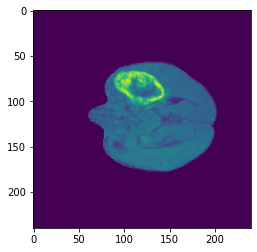

In [46]:

for i in range(len(grading_csv['id'])):
# for i in range(1,20):
    for s in path_HGG_2019:
      if grading_csv['id'][i] in s:
  
        print('@@@@@@@@@@@@@@@@@@@patient',i)
        if i != 210:
          #gt=sitk.ReadImage('/content/drive/My Drive/Colab Notebooks/Brats2019/MICCAI_BraTS_2019_Data_Training/HGG/'+brats19_survival['BraTS19ID'][i]+'/'+brats19_survival['BraTS19ID'][i]+'_seg.nii.gz');
          
          mask=sitk.ReadImage('/content/drive/MyDrive/MICCAI_BraTS_2019_Data_Training/Grading'+'/'+brats19_survival['id'][i]+'/'+brats19_survival['id'][i]+'_seg.nii');
          #mask=sitk.ReadImage('/content/drive/My Drive/Colab Notebooks/GTRsubmission'+'/'+brats19_validation['BraTS19ID'][i]+'.nii.gz');
          mask_arr = sitk.GetArrayFromImage(mask)
          swaped_mask=np.swapaxes(mask_arr,1,2)
          mask = sitk.GetImageFromArray(swaped_mask)

          image=sitk.ReadImage('/content/drive/MyDrive/MICCAI_BraTS_2019_Data_Training/Grading/'+brats19_survival['id'][i]+'/'+brats19_survival['id'][i]+'_t1ce.nii');
          #image=sitk.ReadImage('/content/drive/My Drive/Colab Notebooks/MICCAI_BraTS_2019_Data_Validation/'+brats19_validation['BraTS19ID'][i]+'/'+brats19_validation['BraTS19ID'][i]+'_'+m+'.nii');
          image_arr = sitk.GetArrayFromImage(image)
          swaped_image=np.swapaxes(image_arr,1,2)
          image = sitk.GetImageFromArray(swaped_image)
          plt.imshow(swaped_image[66,:,:])
          #
          # If enabled, resample image (resampled image is automatically cropped.
          #
          interpolator = settings.get('interpolator')
          resampledPixelSpacing = settings.get('resampledPixelSpacing')
          if interpolator is not None and resampledPixelSpacing is not None:
            image, mask = imageoperations.resampleImage(image, mask, **settings)

          bb, correctedMask = imageoperations.checkMask(image, mask)
          if correctedMask is not None:
            mask = correctedMask
          image, mask = imageoperations.cropToTumorMask(image, mask, bb)
          


          # #################################################################################################################################################
          # Show Shape features
          shapeFeatures = shape.RadiomicsShape(image, mask, **settings)
          shapeFeatures.enableAllFeatures()
          print('Calculating Shape features...')
          results = shapeFeatures.execute()
          for (key, val) in six.iteritems(results):
            key=mod+key
            print('i=',i,' ', key, ':', val)
            df[key][i]=val 
          
          firstOrderFeatures = firstorder.RadiomicsFirstOrder(image, mask, **settings)
          firstOrderFeatures.enableAllFeatures()
          results = firstOrderFeatures.execute()
          for (key, val) in six.iteritems(results):
            key=mod+key
            print('i=',i,'  ', key, ':', val)
            df[key][i]=val 
            
          
          # Show GLCM features
          glcmFeatures = glcm.RadiomicsGLCM(image, mask, **settings)
          glcmFeatures.enableAllFeatures()
          print('Calculating GLCM features...')
          results = glcmFeatures.execute()
          for (key, val) in six.iteritems(results):
            key=mod+key
            print('  ', key, ':', val)
            df[key][i]=val

          
          # Show GLRLM features
          glrlmFeatures = glrlm.RadiomicsGLRLM(image, mask, **settings)
          glrlmFeatures.enableAllFeatures()
          print('Calculating GLRLM features...')
          results = glrlmFeatures.execute()
          for (key, val) in six.iteritems(results):
            key=mod+key
            print('  ', key, ':', val)
            df[key][i]=val

          
          # Show GLSZM features
          glszmFeatures = glszm.RadiomicsGLSZM(image, mask, **settings)
          glszmFeatures.enableAllFeatures()
          print('Calculating GLSZM features...')
          results = glszmFeatures.execute()
          for (key, val) in six.iteritems(results):
            key=mod+key
            print('  ', key, ':', val)
            df[key][i]=val
          
          # Show GLDM features
          gldmFeatures = gldm.RadiomicsGLDM(image, mask, **settings)
          gldmFeatures.enableAllFeatures()
          print('Calculating GLDM features...')
          results = gldmFeatures.execute()
          for (key, val) in six.iteritems(results):
            key=mod+key
            print('  ', key, ':', val)
            df[key][i]=val 

          # Show NGTDM features
          ngtdmFeatures = ngtdm.RadiomicsNGTDM(image, mask, **settings)
          ngtdmFeatures.enableAllFeatures()
          results = ngtdmFeatures.execute()
          print('Calculated NGTDM features ')
          for (key, val) in six.iteritems(results):
              key=mod+key
              print('  ', key, ':', val)  
              df[key][i]=val
df
  


# **Save/Read CSV**

In [62]:
# df.to_csv('/content/drive/MyDrive/Colab Notebooks/grdaing_features.csv')
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/grdaing_features.csv')
df

,Unnamed: 0,id,label,t1ce_Elongation,t1ce_Flatness,t1ce_LeastAxisLength,t1ce_MajorAxisLength,t1ce_Maximum2DDiameterColumn,t1ce_Maximum2DDiameterRow,t1ce_Maximum2DDiameterSlice,t1ce_Maximum3DDiameter,t1ce_MeshVolume,t1ce_MinorAxisLength,t1ce_Sphericity,t1ce_SurfaceArea,t1ce_SurfaceVolumeRatio,t1ce_VoxelVolume,t1ce_10Percentile,t1ce_90Percentile,t1ce_Energy,t1ce_Entropy,t1ce_InterquartileRange,t1ce_Kurtosis,t1ce_Maximum,t1ce_MeanAbsoluteDeviation,t1ce_Mean,t1ce_Median,t1ce_Minimum,t1ce_Range,t1ce_RobustMeanAbsoluteDeviation,t1ce_RootMeanSquared,t1ce_Skewness,t1ce_TotalEnergy,t1ce_Uniformity,t1ce_Variance,t1ce_Autocorrelation,t1ce_ClusterProminence,t1ce_ClusterShade,t1ce_ClusterTendency,t1ce_Contrast,...,t1ce_LongRunHighGrayLevelEmphasis,t1ce_LongRunLowGrayLevelEmphasis,t1ce_LowGrayLevelRunEmphasis,t1ce_RunEntropy,t1ce_RunLengthNonUniformity,t1ce_RunLengthNonUniformityNormalized,t1ce_RunPercentage,t1ce_RunVariance,t1ce_ShortRunEmphasis,t1ce_ShortRunHighGrayLevelEmphasis,t1ce_ShortRunLowGrayLevelEmphasis,t1ce_HighGrayLevelZoneEmphasis,t1ce_LargeAreaEmphasis,t1ce_LargeAreaHighGrayLevelEmphasis,t1ce_LargeAreaLowGrayLevelEmphasis,t1ce_LowGrayLevelZoneEmphasis,t1ce_SizeZoneNonUniformity,t1ce_SizeZoneNonUniformityNormalized,t1ce_SmallAreaEmphasis,t1ce_SmallAreaHighGrayLevelEmphasis,t1ce_SmallAreaLowGrayLevelEmphasis,t1ce_ZoneEntropy,t1ce_ZonePercentage,t1ce_ZoneVariance,t1ce_DependenceEntropy,t1ce_DependenceNonUniformity,t1ce_DependenceNonUniformityNormalized,t1ce_DependenceVariance,t1ce_HighGrayLevelEmphasis,t1ce_LargeDependenceEmphasis,t1ce_LargeDependenceHighGrayLevelEmphasis,t1ce_LargeDependenceLowGrayLevelEmphasis,t1ce_LowGrayLevelEmphasis,t1ce_SmallDependenceEmphasis,t1ce_SmallDependenceHighGrayLevelEmphasis,t1ce_SmallDependenceLowGrayLevelEmphasis,t1ce_Busyness,t1ce_Coarseness,t1ce_Complexity,t1ce_Strength
0,0,BraTS19_2013_18_1,0,0.745087,0.677576,28.739611,42.415323,41.773197,48.166378,50.089919,50.289164,3674.708333,31.603123,0.163207,7056.032491,1.920161,4414.0,260.0,475.0,5.807507e+08,3.746690,114.0,3.435626,711.0,69.436652,352.185093,334.5,72.0,639.0,48.485883,362.726028,0.712834,5.807507e+08,0.091232,7535.831395,142.861144,3704.985066,126.959269,31.088345,0.060873,...,226.649889,0.011921,0.007970,4.271548,3288.216460,0.829456,0.896814,0.164734,0.927690,167.236636,0.007284,219.917490,2.014968e+02,2.157236e+04,1.948758,0.006822,817.105752,0.474785,0.716519,167.429183,0.004799,5.536830,0.389896,1.949187e+02,6.458717,703.317173,0.159338,9.357489,170.934300,22.920707,2680.304033,0.223124,0.008135,0.343876,76.109801,0.002371,1.300413,0.002038,470.753974,0.526158
1,1,BraTS19_2013_20_1,0,0.710841,0.460248,38.219209,83.040499,80.156098,63.702433,80.099938,86.307589,63556.625000,59.028580,0.205932,37399.665650,0.588446,64066.0,183.0,387.0,5.769508e+09,3.560505,136.0,1.933145,537.0,67.329989,289.838026,298.0,0.0,537.0,53.801425,300.092803,-0.079101,5.769508e+09,0.091610,6049.608875,143.956131,2307.430346,10.739749,35.424996,0.035289,...,339.543109,0.022066,0.008241,4.617139,30004.839372,0.621956,0.750528,0.553168,0.816238,136.995540,0.006494,210.956415,3.857489e+04,5.371906e+06,375.526225,0.007016,1488.440769,0.332687,0.597747,129.923876,0.004163,6.006011,0.069834,3.836984e+04,7.364904,4478.705991,0.069908,18.133244,156.497331,74.177629,9326.955140,0.796455,0.008662,0.081559,16.168646,0.000580,14.633816,0.000238,147.918820,0.040974
2,2,BraTS19_2013_14_1,0,0.880661,0.523184,26.644419,50.927387,59.304300,53.665631,59.135438,59.824744,20071.083333,44.849784,0.195332,18284.840613,0.911004,21122.0,317.0,510.0,3.759396e+09,3.688071,102.0,12.885111,1227.0,64.295957,412.327763,401.0,197.0,1030.0,42.367230,421.882498,1.985045,3.759396e+09,0.094484,7970.658266,89.550236,11723.377785,272.217470,28.823712,0.018588,...,171.555248,0.025458,0.013693,4.431703,13352.355572,0.748015,0.843885,0.269249,0.887857,110.453323,0.011807,190.913221,2.379034e+03,1.805782e+05,34.791490,0.009823,2074.398363,0.446684,0.695108,144.849406,0.006344,5.829287,0.219866,

In [63]:
df=df.drop([210])
# label=label.drop([210])
df=df.fillna(0)
df=df.drop(df.columns[0],axis=1)

label=df['label']

df= df.drop(['id','label'], axis = 1) 

df

,t1ce_Elongation,t1ce_Flatness,t1ce_LeastAxisLength,t1ce_MajorAxisLength,t1ce_Maximum2DDiameterColumn,t1ce_Maximum2DDiameterRow,t1ce_Maximum2DDiameterSlice,t1ce_Maximum3DDiameter,t1ce_MeshVolume,t1ce_MinorAxisLength,t1ce_Sphericity,t1ce_SurfaceArea,t1ce_SurfaceVolumeRatio,t1ce_VoxelVolume,t1ce_10Percentile,t1ce_90Percentile,t1ce_Energy,t1ce_Entropy,t1ce_InterquartileRange,t1ce_Kurtosis,t1ce_Maximum,t1ce_MeanAbsoluteDeviation,t1ce_Mean,t1ce_Median,t1ce_Minimum,t1ce_Range,t1ce_RobustMeanAbsoluteDeviation,t1ce_RootMeanSquared,t1ce_Skewness,t1ce_TotalEnergy,t1ce_Uniformity,t1ce_Variance,t1ce_Autocorrelation,t1ce_ClusterProminence,t1ce_ClusterShade,t1ce_ClusterTendency,t1ce_Contrast,t1ce_Correlation,t1ce_DifferenceAverage,t1ce_DifferenceEntropy,...,t1ce_LongRunHighGrayLevelEmphasis,t1ce_LongRunLowGrayLevelEmphasis,t1ce_LowGrayLevelRunEmphasis,t1ce_RunEntropy,t1ce_RunLengthNonUniformity,t1ce_RunLengthNonUniformityNormalized,t1ce_RunPercentage,t1ce_RunVariance,t1ce_ShortRunEmphasis,t1ce_ShortRunHighGrayLevelEmphasis,t1ce_ShortRunLowGrayLevelEmphasis,t1ce_HighGrayLevelZoneEmphasis,t1ce_LargeAreaEmphasis,t1ce_LargeAreaHighGrayLevelEmphasis,t1ce_LargeAreaLowGrayLevelEmphasis,t1ce_LowGrayLevelZoneEmphasis,t1ce_SizeZoneNonUniformity,t1ce_SizeZoneNonUniformityNormalized,t1ce_SmallAreaEmphasis,t1ce_SmallAreaHighGrayLevelEmphasis,t1ce_SmallAreaLowGrayLevelEmphasis,t1ce_ZoneEntropy,t1ce_ZonePercentage,t1ce_ZoneVariance,t1ce_DependenceEntropy,t1ce_DependenceNonUniformity,t1ce_DependenceNonUniformityNormalized,t1ce_DependenceVariance,t1ce_HighGrayLevelEmphasis,t1ce_LargeDependenceEmphasis,t1ce_LargeDependenceHighGrayLevelEmphasis,t1ce_LargeDependenceLowGrayLevelEmphasis,t1ce_LowGrayLevelEmphasis,t1ce_SmallDependenceEmphasis,t1ce_SmallDependenceHighGrayLevelEmphasis,t1ce_SmallDependenceLowGrayLevelEmphasis,t1ce_Busyness,t1ce_Coarseness,t1ce_Complexity,t1ce_Strength
0,0.745087,0.677576,28.739611,42.415323,41.773197,48.166378,50.089919,50.289164,3674.708333,31.603123,0.163207,7056.032491,1.920161,4414.0,260.0,475.0,5.807507e+08,3.746690,114.0,3.435626,711.0,69.436652,352.185093,334.5,72.0,639.0,48.485883,362.726028,0.712834,5.807507e+08,0.091232,7535.831395,142.861144,3704.985066,126.959269,31.088345,0.060873,0.472520,2.296602,2.844342,...,226.649889,0.011921,0.007970,4.271548,3288.216460,0.829456,0.896814,0.164734,0.927690,167.236636,0.007284,219.917490,2.014968e+02,2.157236e+04,1.948758,0.006822,817.105752,0.474785,0.716519,167.429183,0.004799,5.536830,0.389896,1.949187e+02,6.458717,703.317173,0.159338,9.357489,170.934300,22.920707,2680.304033,0.223124,0.008135,0.343876,76.109801,0.002371,1.300413,0.002038,470.753974,0.526158
1,0.710841,0.460248,38.219209,83.040499,80.156098,63.702433,80.099938,86.307589,63556.625000,59.028580,0.205932,37399.665650,0.588446,64066.0,183.0,387.0,5.769508e+09,3.560505,136.0,1.933145,537.0,67.329989,289.838026,298.0,0.0,537.0,53.801425,300.092803,-0.079101,5.769508e+09,0.091610,6049.608875,143.956131,2307.430346,10.739749,35.424996,0.035289,0.867970,1.132023,1.959653,...,339.543109,0.022066,0.008241,4.617139,30004.839372,0.621956,0.750528,0.553168,0.816238,136.995540,0.006494,210.956415,3.857489e+04,5.371906e+06,375.526225,0.007016,1488.440769,0.332687,0.597747,129.923876,0.004163,6.006011,0.069834,3.836984e+04,7.364904,4478.705991,0.069908,18.133244,156.497331,74.177629,9326.955140,0.796455,0.008662,0.081559,16.168646,0.000580,14.633816,0.000238,147.918820,0.040974
2,0.880661,0.523184,26.644419,50.927387,59.304300,53.665631,59.135438,59.824744,20071.083333,44.849784,0.195332,18284.840613,0.911004,21122.0,317.0,510.0,3.759396e+09,3.688071,102.0,12.885111,1227.0,64.295957,412.327763,401.0,197.0,1030.0,42.367230,421.882498,1.985045,3.759396e+09,0.094484,7970.658266,89.550236,11723.377785,272.217470,28.823712,0.018588,0.637235,1.769787,2.492076,...,171.555248,0.025458,0.013693,4.431703,13352.355572,0.748015,0.843885,0.269249,0.887857,110.453323,0.011807,190.913221,2.379034e+03,1.805782e+05,34.791490,0.009823,2074.39836

t1ce_Sphericity                        0.048072
t1ce_VoxelVolume                       0.036885
t1ce_MeshVolume                        0.034778
t1ce_DependenceNonUniformity           0.027555
t1ce_ZoneEntropy                       0.023840
t1ce_SurfaceVolumeRatio                0.019568
t1ce_LargeAreaHighGrayLevelEmphasis    0.019161
t1ce_RunLengthNonUniformity            0.018585
t1ce_Idn                               0.017604
t1ce_ZoneVariance                      0.017551
dtype: float64


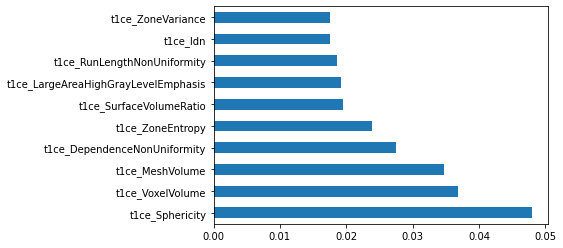

In [133]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
X = df  #independent columns
y = label  #target column i.e price range
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feat_importances.nlargest(10))
feat_importances.nlargest(10).plot(kind='barh')
# 't1ce_Sphericity','t1ce_MeshVolume','t1ce_ZoneEntropy','t1ce_VoxelVolume,'t1ce_RunLengthNonUniformity','t1ce_DependenceNonUniformity'
plt.show()


In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
selected_features=df[['t1ce_Sphericity','t1ce_MeshVolume','t1ce_ZoneEntropy','t1ce_VoxelVolume','t1ce_RunLengthNonUniformity','t1ce_DependenceNonUniformity']]

train_features, test_features, train_labels, test_labels = train_test_split(selected_features, label, test_size = 0.20, random_state = 20)
regressor=RandomForestClassifier(n_estimators=100,random_state=21)
regressor.fit(train_features, train_labels)
predictions = regressor.predict(test_features)
acc=accuracy_score(test_labels, predictions)

print(acc)
print(classification_report(test_labels, predictions))

0.9253731343283582
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.78      0.93      0.85        15

    accuracy                           0.93        67
   macro avg       0.88      0.93      0.90        67
weighted avg       0.93      0.93      0.93        67



In [ ]:
6   96   0.8955223880597015